<a href="https://colab.research.google.com/github/EjbejaranosAI/EmotionUnify/blob/main/Feature_extraction_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download andinstall libraries and dataset

In [ ]:
!pip install -q lazypredict
!pip install -q opencv-python
!pip install -q torch torchvision
!pip install -q transformers
!pip install -q timm
!pip install -q tqdm pydub
!pip install codecarbon
!pip install -q mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.8/179.8 kB 613.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.2 MB/s eta 0:00:00


In [ ]:
! codecarbon init


Welcome to CodeCarbon, here is your experiment id:
690b9941-d835-49c8-9d10-7c7b425fd1b1

CodeCarbon automatically added this id to your local config: ./.codecarbon.config



### Module to set the dataset

In [ ]:
"""
This module is to download multimodal datasets and store them in the dataset directory
"""
import os
import os.path
from os import path
import logging
import shutil
import subprocess
import tarfile


def download_meld_dataset():
    """
    Download MELD dataset and store it into the dataset directory

    """
    if path.exists("/content/dataset")== False:
      os.mkdir("/content/datasets")

    os.chdir('/content/datasets')
    try:
        # Add logging configuration
        logging.basicConfig(filename='download.log', level=logging.INFO)
        logging.info('Downloading MELD dataset')

        # Use wget to download the dataset
        try:
            subprocess.run(['wget', 'https://huggingface.co/datasets/declare-lab/MELD/resolve/main/MELD.Raw.tar.gz'])
        except:
            subprocess.run(['wget','http://web.eecs.umich.edu/~mihalcea/downloads/MELD.Raw.tar.gz'])

        # Extract the downloaded dataset
        subprocess.run(['tar', '-xvf', 'MELD.Raw.tar.gz'])

        # Remove the downloaded tar.gz file
        os.remove('MELD.Raw.tar.gz')

        # Rename the extracted directory to "MELD"
        os.rename('MELD.Raw', 'MELD')

        # Extract the inner tar files
        files = os.listdir("./MELD")
        files_to_uncompress = []
        for file in files:
            if file.endswith('.tar.gz'):
                print("tar.gz file found")
                files_to_uncompress.append(file)
        if len(files_to_uncompress) >0:
            for file in files_to_uncompress:
                # I want to extract the files in the same directory that was found it and later deleter the tar.gz files
                tar = tarfile.open("./MELD/"+file)
                tar.extractall("./MELD/")
                tar.close()
                os.remove("./MELD/"+file)

        else:
            print("No tar.gz files found")
    except:
        logging.error('Error in downloading MELD dataset')
        print('Error in downloading MELD dataset')


if __name__ == "__main__":
    download_meld_dataset()

tar.gz file found
tar.gz file found
tar.gz file found


# Reading dataset

In [ ]:
import os
import numpy as np
import pandas as pd

path_dataset = "/content/datasets/MELD"

# In[2]:
def load_data(path):
    csv_file_data = []
    files_to_uncompress = []
    files = os.listdir(path)
    print(files)
    # get the csv files from the files and read it
    for file in files:
        if file.endswith(".csv"):
            print(file)
            csv_file_data.append({file:pd.read_csv(path + '/' + file)})


    print(len(csv_file_data))



    return files, csv_file_data

files , csv_file_data = load_data(path_dataset)

['._output_repeated_splits_test', 'test_sent_emo.csv', 'output_repeated_splits_test', 'dev_splits_complete', 'train_sent_emo.csv', 'train_splits', '._train_splits', 'dev_sent_emo.csv', 'README.txt']
test_sent_emo.csv
train_sent_emo.csv
dev_sent_emo.csv
3


In [ ]:
train_df = csv_file_data[1]['train_sent_emo.csv']
dev_df = csv_file_data[2]['dev_sent_emo.csv']
test_df = csv_file_data[0]['test_sent_emo.csv']

In [ ]:
df_train = train_df
df_dev = dev_df
df_test = test_df
print(len(df_train))
df_train.head()

9989


Sr No.                                          Utterance          Speaker  \
0       1  also I was the point person on my companys tr...         Chandler   
1       2                   You mustve had your hands full.  The Interviewer   
2       3                            That I did. That I did.         Chandler   
3       4      So lets talk a little bit about your duties.  The Interviewer   
4       5                             My duties?  All right.         Chandler   

    Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  Episode  \
0   neutral   neutral            0             0       8       21   
1   neutral   neutral            0             1       8       21   
2   neutral   neutral            0             2       8       21   
3   neutral   neutral            0             3       8       21   
4  surprise  positive            0             4       8       21   

      StartTime       EndTime  
0  00:16:16,059  00:16:21,731  
1  00:16:21,940  00:16:23,442  
2  00:16:23,442  00:16:26,389  
3  00:16:26,820  00:16:29,572  
4  00:16:34,452  00:16:40,917

In [ ]:
# Define mapping dictionaries
emotion_mapping = {
    'neutral': [1, 0, 0, 0, 0, 0, 0],
    'surprise': [0, 1, 0, 0, 0, 0, 0],
    'fear': [0, 0, 1, 0, 0, 0, 0],
    'sadness': [0, 0, 0, 1, 0, 0, 0],
    'joy': [0, 0, 0, 0, 1, 0, 0],
    'disgust': [0, 0, 0, 0, 0, 1, 0],
    'anger': [0, 0, 0, 0, 0, 0, 1]
}

sentiment_mapping = {
    'neutral': [1, 0, 0],
    'positive': [0, 1, 0],
    'negative': [0, 0, 1]
}

In [ ]:
# Process the training, development, and test datasets
df_train['video_id'] = df_train.apply(lambda row: f'dia{row["Dialogue_ID"]}_utt{row["Utterance_ID"]}.mp4', axis=1)
df_dev['video_id'] = df_dev.apply(lambda row: f'dia{row["Dialogue_ID"]}_utt{row["Utterance_ID"]}.mp4', axis=1)
df_test['video_id'] = df_test.apply(lambda row: f'dia{row["Dialogue_ID"]}_utt{row["Utterance_ID"]}.mp4', axis=1)

df_train['Emotion_encoded'] = df_train['Emotion'].map(emotion_mapping)
df_train['Sentiment_encoded'] = df_train['Sentiment'].map(sentiment_mapping)
df_processed_train = df_train[['video_id', 'Utterance', 'Emotion_encoded', 'Sentiment_encoded']]

df_dev['Emotion_encoded'] = df_dev['Emotion'].map(emotion_mapping)
df_dev['Sentiment_encoded'] = df_dev['Sentiment'].map(sentiment_mapping)
df_processed_dev = df_dev[['video_id', 'Utterance', 'Emotion_encoded', 'Sentiment_encoded']]

df_test['Emotion_encoded'] = df_test['Emotion'].map(emotion_mapping)
df_test['Sentiment_encoded'] = df_test['Sentiment'].map(sentiment_mapping)
df_processed_test = df_test[['video_id', 'Utterance', 'Emotion_encoded', 'Sentiment_encoded']]

In [ ]:
df_processed_train

video_id                                          Utterance  \
0         dia0_utt0.mp4  also I was the point person on my companys tr...   
1         dia0_utt1.mp4                   You mustve had your hands full.   
2         dia0_utt2.mp4                            That I did. That I did.   
3         dia0_utt3.mp4      So lets talk a little bit about your duties.   
4         dia0_utt4.mp4                             My duties?  All right.   
...                 ...                                                ...   
9984  dia1038_utt13.mp4                                         You or me?   
9985  dia1038_utt14.mp4  I got it. Uh, Joey, women don't have Adam's ap...   
9986  dia1038_utt15.mp4               You guys are messing with me, right?   
9987  dia1038_utt16.mp4                                              Yeah.   
9988  dia1038_utt17.mp4  That was a good one. For a second there, I was...   

            Emotion_encoded Sentiment_encoded  
0     [1, 0, 0, 0, 0, 0, 0]         [1, 0, 0]  
1     [1, 0, 0, 0, 0, 0, 0]         [1, 0, 0]  
2     [1, 0, 0, 0, 0, 0, 0]         [1, 0, 0]  
3     [1, 0, 0, 0, 0, 0, 0]         [1, 0, 0]  
4     [0, 1, 0, 0, 0, 0, 0]         [0, 1, 0]  
...                     ...               ...  
9984  [1, 0, 0, 0, 0, 0, 0]         [1, 0, 0]  
9985  [1, 0, 0, 0, 0, 0, 0]         [1, 0, 0]  
9986  [0, 1, 0, 0, 0, 0, 0]         [0, 1, 0]  
9987  [1, 0, 0, 0, 0, 0, 0]         [1, 0, 0]  
9988  [0, 0, 0, 0, 1, 0, 0]         [0, 1, 0]  

[9989 rows x 4 columns]

# Feature extraction in text

In [ ]:
import configparser
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import pandas as pd
import time
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
from codecarbon import track_emissions
import pickle


model_name = "bert-base-uncased"
max_length = 128

@track_emissions()
class TextFeatureExtractor:
    def __init__(self, classification_type="Emotion"):
        config = configparser.ConfigParser()
        config.read('../config.ini')
        self.model_name = model_name
        self.max_length = max_length
        self.tokenizer = BertTokenizer.from_pretrained(self.model_name)
        self.model = BertModel.from_pretrained(self.model_name)
        self.classification_type = classification_type
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = self.model.to(self.device)

    def tokenize_utterances(self, utterances):
        input_ids = []
        attention_masks = []
        for utterance in tqdm(utterances, desc="Tokenizing Utterances"):
            tokens = self.tokenizer.encode(
                utterance,
                add_special_tokens=True,
                max_length=self.max_length,
                truncation=True,
                padding='max_length'
            )
            input_ids.append(tokens)
            attention_masks.append([1] * len(tokens))
        return torch.tensor(input_ids), torch.tensor(attention_masks)

    def mapping_emotion(self, df):
        emotion_mapping = {
            'neutral': [1, 0, 0, 0, 0, 0, 0],
            'surprise': [0, 1, 0, 0, 0, 0, 0],
            'fear': [0, 0, 1, 0, 0, 0, 0],
            'sadness': [0, 0, 0, 1, 0, 0, 0],
            'joy': [0, 0, 0, 0, 1, 0, 0],
            'disgust': [0, 0, 0, 0, 0, 1, 0],
            'anger': [0, 0, 0, 0, 0, 0, 1]
        }
        df['Emotion_encoded'] = df['Emotion'].map(emotion_mapping)
        return df

    def save_features_pickle(self, text_feature_dict, save_path):
        print(f"💾 Saving Extracted Features to {save_path}... 💾")
        with open(save_path, 'wb') as f:
            pickle.dump(text_feature_dict, f)


    def mapping_sentiment(self,df):
        sentiment_mapping = {
            'neutral': [1, 0, 0],
            'positive': [0, 1, 0],
            'negative': [0, 0, 1]
        }
        df['Sentiment_encoded'] = df['Sentiment'].map(sentiment_mapping)
        return df


    def extract_bert_features(self, file_path, batch_size=32):
        df = pd.read_csv(file_path)
        df['text_id'] = "dia" + df['Dialogue_ID'].astype(str) + '_utt' + df['Utterance_ID'].astype(str)  # Creating a unique text_id

        if self.classification_type == "Emotion":
            df = self.mapping_emotion(df)
        elif self.classification_type == "Sentiment":
            df = self.mapping_sentiment(df)

        utterances = df['Utterance'].tolist()
        input_ids, attention_masks = self.tokenize_utterances(utterances)
        input_ids, attention_masks = input_ids.to(self.device), attention_masks.to(self.device)

        dataset = TensorDataset(input_ids, attention_masks)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

        all_outputs = []

        with torch.no_grad():
            for batch in tqdm(dataloader, desc="Extracting Features"):
                input_ids_batch, attention_masks_batch = batch
                bert_outputs = self.model(input_ids_batch, attention_mask=attention_masks_batch)
                all_outputs.append(bert_outputs[0][:, 0, :].cpu().numpy())

        X = np.concatenate(all_outputs, axis=0)
        y = df[f"{self.classification_type}_encoded"].values.tolist()

        text_feature_dict = {}
        for idx, (features, label, text_id) in enumerate(zip(X, y, df['text_id'])):
            text_feature_dict[text_id] = {'features': features, 'label': label}

        return text_feature_dict

def save_emissions_to_csv(emissions_data, csv_path='emissions_data.csv'):
    emissions_data.to_csv(csv_path, index=False)
    print(f"Emissions data saved to {csv_path}")

def plot_emissions(emissions_data):
    plt.plot(emissions_data['Time'], emissions_data['Emissions'], marker='o')
    plt.title('Carbon Emissions Over Time')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Emissions (kg)')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    print("⏳ Starting Feature Extraction... ⏳")
    tracker = EmissionsTracker()
    emissions_data = pd.DataFrame(columns=["Time", "Emissions"])
    start_time = time.time()

    print("🚀 Initializing Text Feature Extraction for Emotion Classification... 🚀")
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    feature_extractor = TextFeatureExtractor("Sentiment")

    datasets = {
        'train': '/content/datasets/MELD/train_sent_emo.csv',
        'dev': '/content/datasets/MELD/dev_sent_emo.csv',
        'test': '/content/datasets/MELD/test_sent_emo.csv'
    }
    for split, path_csv in datasets.items():
        tracker.start()

        print(f"📂 Loading {split.upper()} CSV Data... 📂")
        print(f"🤖 Extracting BERT Features for {split.upper()} set... 🤖")
        text_feature_dict = feature_extractor.extract_bert_features(path_csv)
        save_path = f'/content/datasets/MELD/text_features/{split}_text_features.pkl'
        feature_extractor.save_features_pickle(text_feature_dict, save_path)

        print(f"🎉 {split.upper()} Feature Extraction Complete! 🎉")

        print(f"🔍 Inspecting the saved .npy file for {split.upper()} set... 🔍")
        loaded_features = np.load(save_path, allow_pickle=True)
        print(f"📊 Shape: {len(loaded_features)}")

        first_key = list(loaded_features.keys())[0]
        first_entry = loaded_features[first_key]['features']
        print(f"🔢 Data Type of a Single Entry: {first_entry.dtype}")
        print(f"📊 Shape of a Single Entry: {first_entry.shape}")
        print(f"📈 Min Value: {np.min(loaded_features)}")
        print(f"📉 Max Value: {np.max(loaded_features)}")
        print(f"📝 {split.upper()} File Inspection Complete 📝")
        emissions = tracker.stop()
        current_time = time.time() - start_time
        emissions_data = emissions_data.append({"Time": current_time, "Emissions": emissions}, ignore_index=True)
    # Guardar los datos de emisiones a un archivo CSV
    save_emissions_to_csv(emissions_data)
    # Graficar las emisiones
    plot_emissions(emissions_data)

    end_time = time.time()
    print(f"⌛ Feature Extraction completed in {end_time - start_time:.2f} seconds ⌛")

[codecarbon INFO @ 16:46:19] [setup] RAM Tracking...
[codecarbon INFO @ 16:46:19] [setup] GPU Tracking...
[codecarbon INFO @ 16:46:19] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 16:46:19] [setup] CPU Tracking...
[codecarbon WARNING @ 16:46:19] No CPU tracking mode found. Falling back on CPU constant mode.


⏳ Starting Feature Extraction... ⏳
🚀 Initializing Text Feature Extraction for Emotion Classification... 🚀


[codecarbon WARNING @ 16:46:21] We saw that you have a Intel(R) Xeon(R) CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:46:21] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 16:46:21] >>> Tracker's metadata:
[codecarbon INFO @ 16:46:21]   Platform system: Linux-5.15.120+-x86_64-with-glibc2.35
[codecarbon INFO @ 16:46:21]   Python version: 3.10.12
[codecarbon INFO @ 16:46:21]   CodeCarbon version: 2.3.1
[codecarbon INFO @ 16:46:21]   Available RAM : 12.678 GB
[codecarbon INFO @ 16:46:21]   CPU count: 2
[codecarbon INFO @ 16:46:21]   CPU model: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 16:46:21]   GPU count: 1
[codecarbon INFO @ 16:46:21]   GPU model: 1 x Tesla V100-SXM2-16GB
[codecarbon INFO @ 16:46:23] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 16:46:23] Energy consumed for RAM : 0.000003 kWh. RAM Power : 4.7543792724609375 W
[codecarbon INFO @ 16

📂 Loading TRAIN CSV Data... 📂
🤖 Extracting BERT Features for TRAIN set... 🤖


Extracting Features: 100%|██████████| 313/313 [00:20<00:00, 15.29it/s]


💾 Saving Extracted Features to /content/datasets/MELD/text_features/train_text_features.pkl... 💾
🎉 TRAIN Feature Extraction Complete! 🎉
🔍 Inspecting the saved .npy file for TRAIN set... 🔍
📊 Shape: 9989
🔢 Data Type of a Single Entry: float32
📊 Shape of a Single Entry: (768,)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Extracting Features: 100%|██████████| 35/35 [00:02<00:00, 15.39it/s]


💾 Saving Extracted Features to /content/datasets/MELD/text_features/dev_text_features.pkl... 💾
🎉 DEV Feature Extraction Complete! 🎉
🔍 Inspecting the saved .npy file for DEV set... 🔍
📊 Shape: 1109
🔢 Data Type of a Single Entry: float32
📊 Shape of a Single Entry: (768,)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Extracting Features: 100%|██████████| 82/82 [00:05<00:00, 15.42it/s]


💾 Saving Extracted Features to /content/datasets/MELD/text_features/test_text_features.pkl... 💾
🎉 TEST Feature Extraction Complete! 🎉
🔍 Inspecting the saved .npy file for TEST set... 🔍
📊 Shape: 2610
🔢 Data Type of a Single Entry: float32
📊 Shape of a Single Entry: (768,)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Text classifier

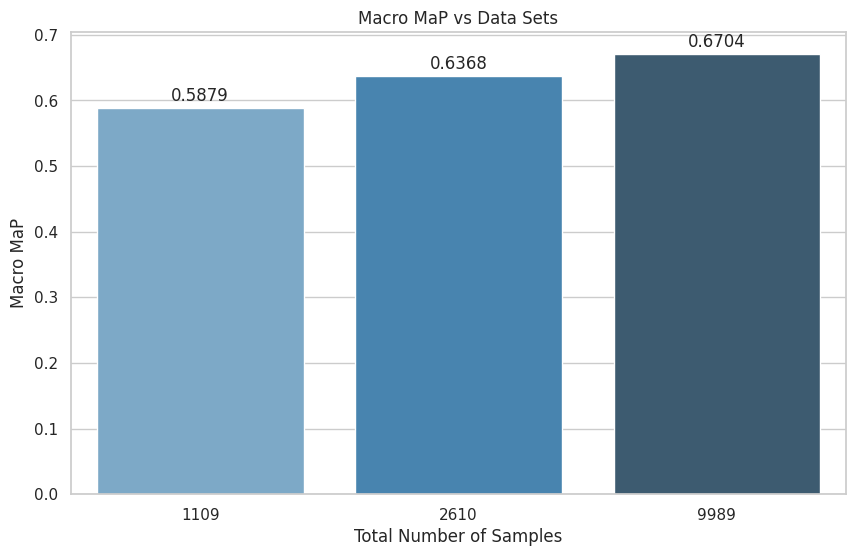

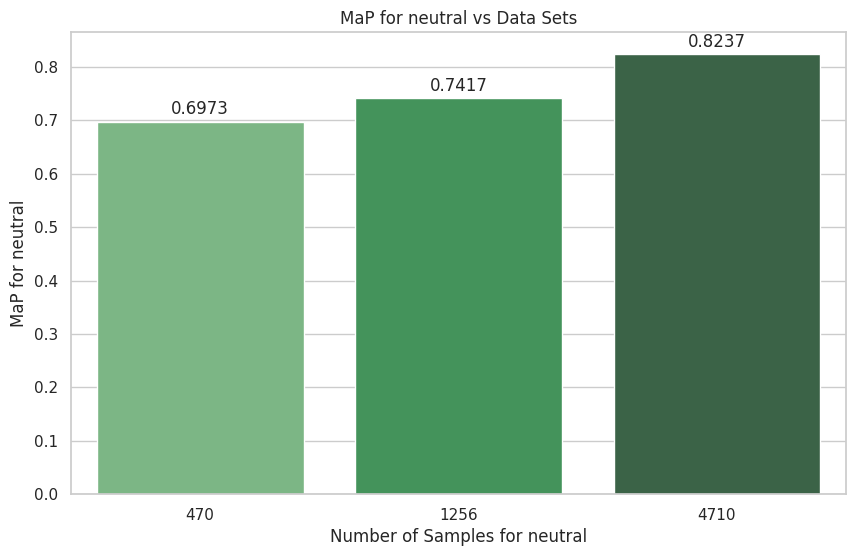

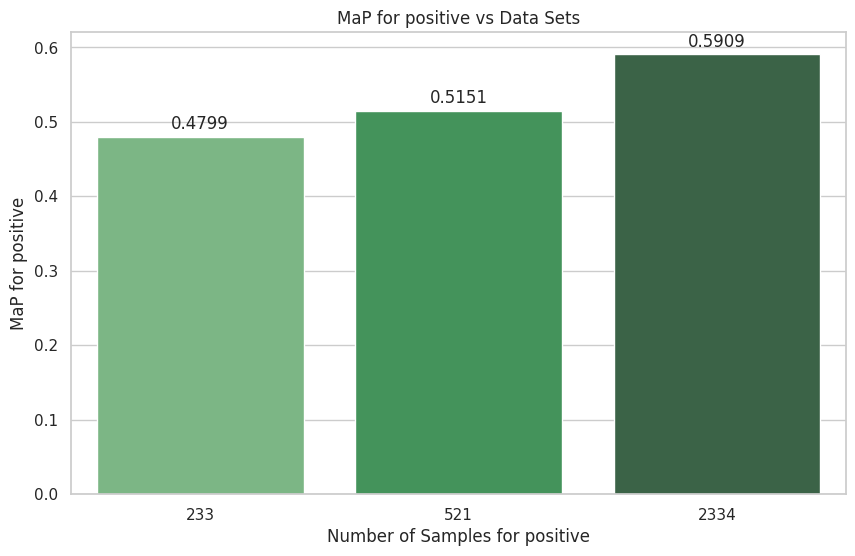

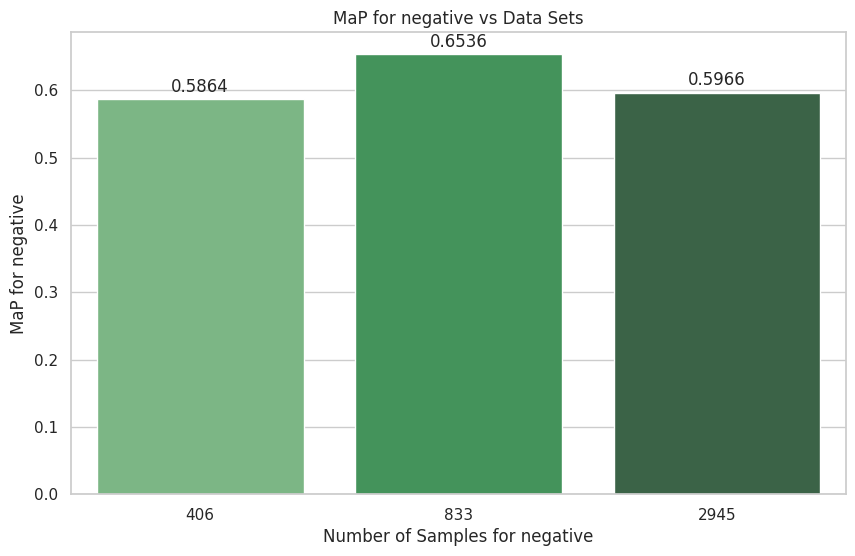

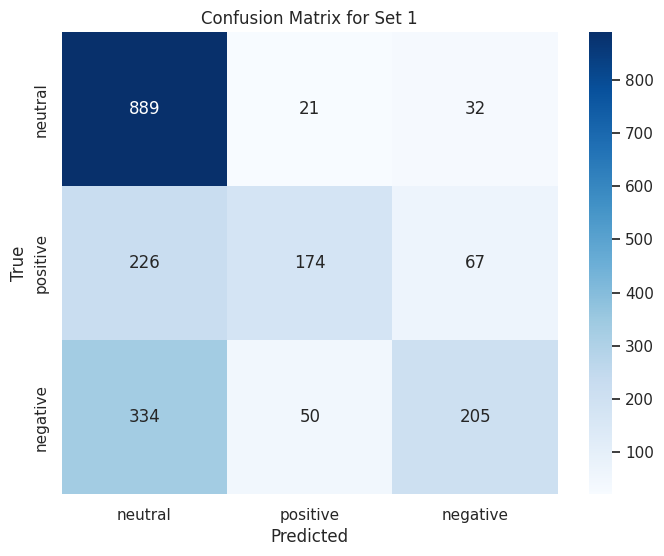

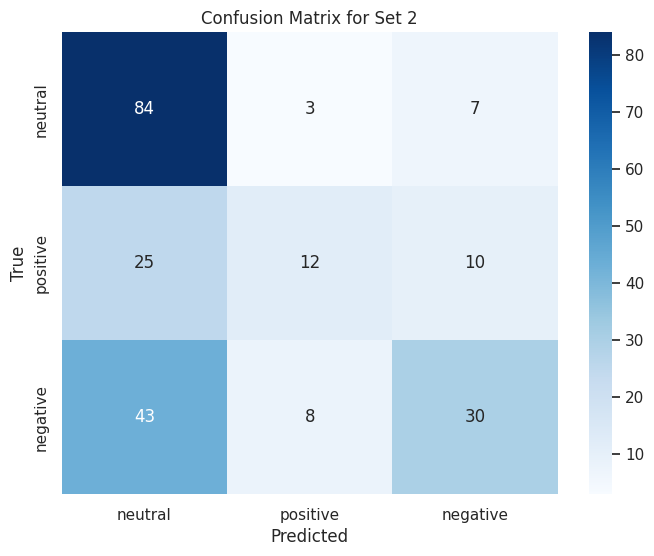

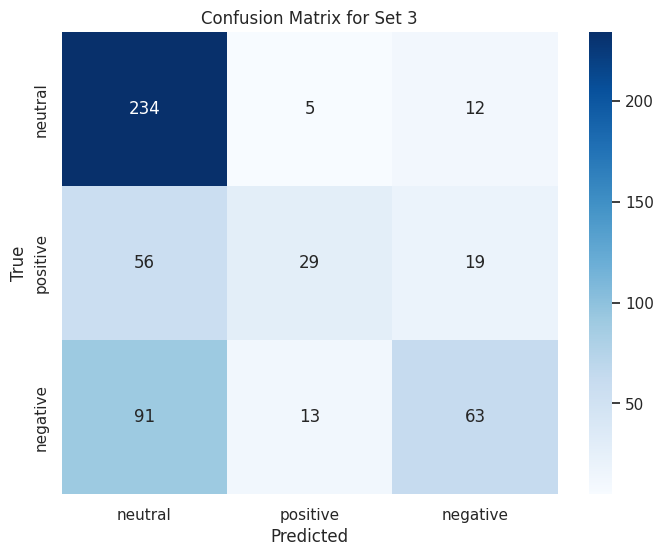

In [ ]:
from sklearn.metrics import average_precision_score, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

def train_and_evaluate_classifier(features_path, class_names, test_size=0.2, max_iter=5000, random_state=42):
    with open(features_path, 'rb') as f:
        features = pickle.load(f)
    X = np.array([x['features'] for x in features.values()])
    y = np.array([x['label'] for x in features.values()])
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, stratify=np.argmax(y, axis=1), random_state=random_state)
    classifier = OneVsRestClassifier(LogisticRegression(max_iter=max_iter, random_state=random_state))
    classifier.fit(X_train, y_train)
    y_score = classifier.decision_function(X_val)
    y_pred = classifier.predict(X_val)
    y_pred_single = np.argmax(y_pred, axis=1)
    y_val_single = np.argmax(y_val, axis=1)
    cm = confusion_matrix(y_val_single, y_pred_single)
    average_precision_macro = average_precision_score(y_val, y_score, average='macro')
    average_precision_each_class = average_precision_score(y_val, y_score, average=None)
    map_per_class = {class_name: score for class_name, score in zip(class_names, average_precision_each_class)}
    return average_precision_macro, map_per_class, len(X), cm

def count_samples_per_label(y, class_names):
    label_indices = np.argmax(y, axis=1)
    counts = {name: 0 for name in class_names}
    for i in label_indices:
        counts[class_names[i]] += 1
    return counts

macro_map_results = {}
class_map_results = {}
sample_count_results = {}
label_sample_count_results = {}
confusion_matrices = {}

sentiment_names = ['neutral', 'positive', 'negative']
sets_path = [
    "/content/datasets/MELD/text_features/train_text_features.pkl",
    "/content/datasets/MELD/text_features/dev_text_features.pkl",
    "/content/datasets/MELD/text_features/test_text_features.pkl"
]

for idx, set_file in enumerate(sets_path):
    map_val, map_per_class, sample_count, cm = train_and_evaluate_classifier(set_file, sentiment_names)
    set_name = f"Set {idx + 1}"
    with open(set_file, 'rb') as f:
        features = pickle.load(f)
    y = np.array([x['label'] for x in features.values()])
    label_sample_count = count_samples_per_label(y, sentiment_names)

    macro_map_results[set_name] = map_val
    class_map_results[set_name] = map_per_class
    sample_count_results[set_name] = sample_count
    label_sample_count_results[set_name] = label_sample_count
    confusion_matrices[set_name] = cm

# Sort and plot for Macro MaP
sorted_macro_map = {k: v for k, v in sorted(macro_map_results.items(), key=lambda item: item[1])}
sorted_sample_count = {k: sample_count_results[k] for k in sorted_macro_map.keys()}

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=list(sorted_macro_map.keys()), y=list(sorted_macro_map.values()), palette="Blues_d")
plt.xlabel(f'Total Number of Samples')
plt.ylabel('Macro MaP')
plt.title('Macro MaP vs Data Sets')

for idx, bar in enumerate(bars.patches):
    bars.annotate(format(bar.get_height(), '.4f'),
                  (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                  ha='center', va='center',
                  xytext=(0, 9),
                  textcoords='offset points')

plt.xticks(ticks=range(len(sorted_sample_count)), labels=[str(v) for v in sorted_sample_count.values()])
plt.show()

# Sort and plot for individual classes
for class_name in sentiment_names:
    sorted_class_map_values = {k: class_map_results[k][class_name] for k in sorted_macro_map.keys()}
    sorted_label_sample_count = {k: label_sample_count_results[k][class_name] for k in sorted_macro_map.keys()}

    plt.figure(figsize=(10, 6))
    bars = sns.barplot(x=list(sorted_class_map_values.keys()), y=list(sorted_class_map_values.values()), palette="Greens_d")
    plt.xlabel(f'Number of Samples for {class_name}')
    plt.ylabel(f'MaP for {class_name}')
    plt.title(f'MaP for {class_name} vs Data Sets')

    for idx, bar in enumerate(bars.patches):
        bars.annotate(format(bar.get_height(), '.4f'),
                      (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points')

    plt.xticks(ticks=range(len(sorted_label_sample_count)), labels=[str(v) for v in sorted_label_sample_count.values()])
    plt.show()

# Plot confusion matrices
for set_name, cm in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=sentiment_names, yticklabels=sentiment_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {set_name}')
    plt.show()



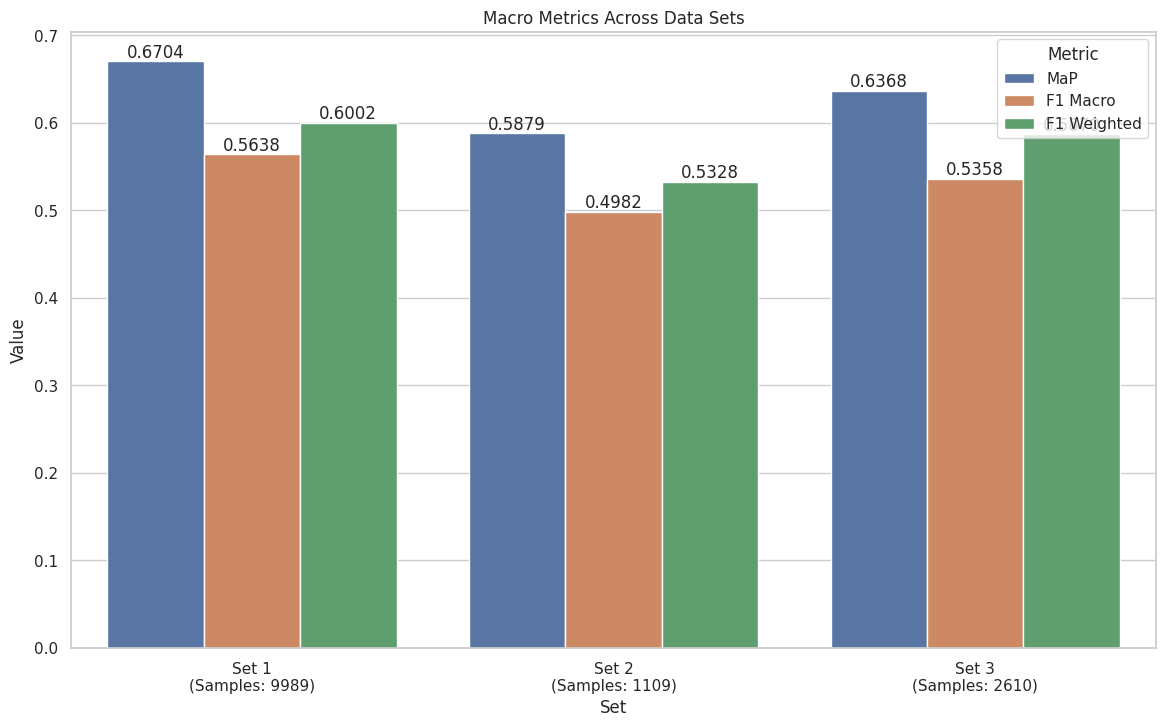

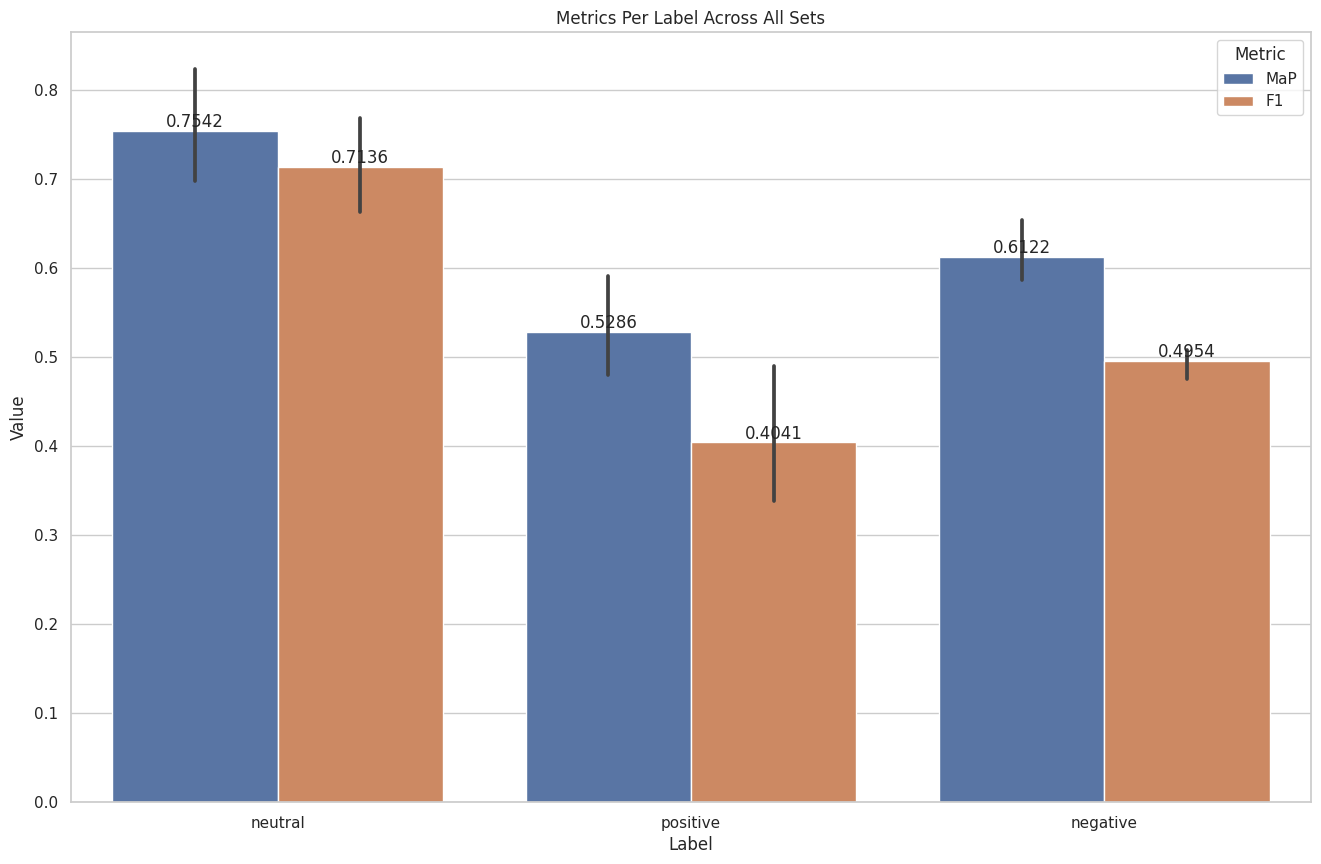

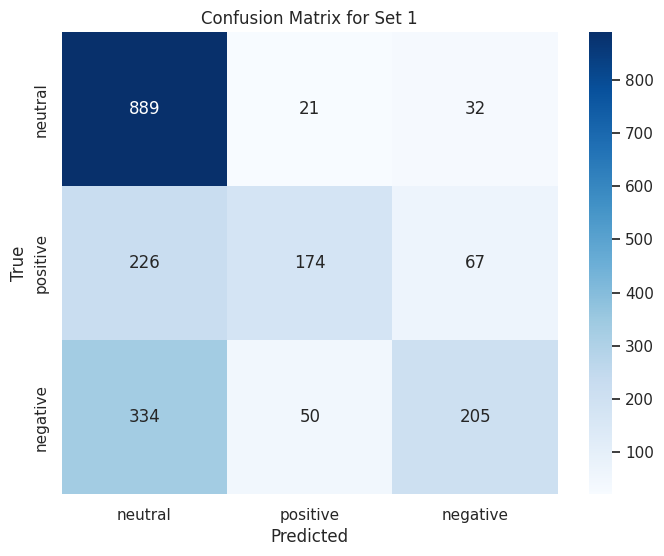

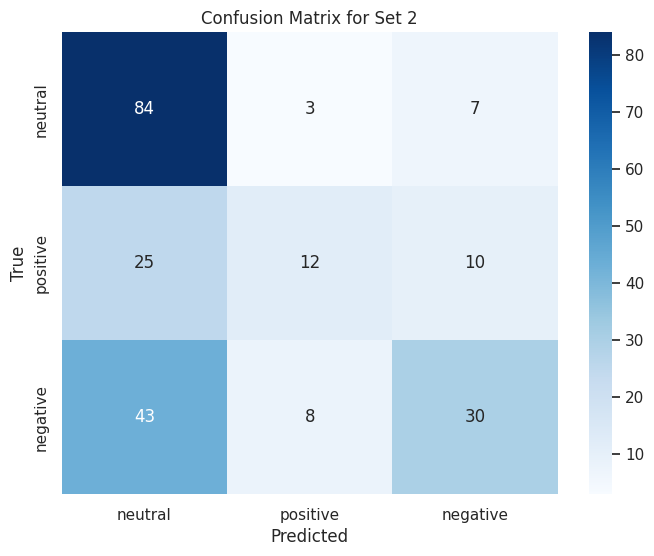

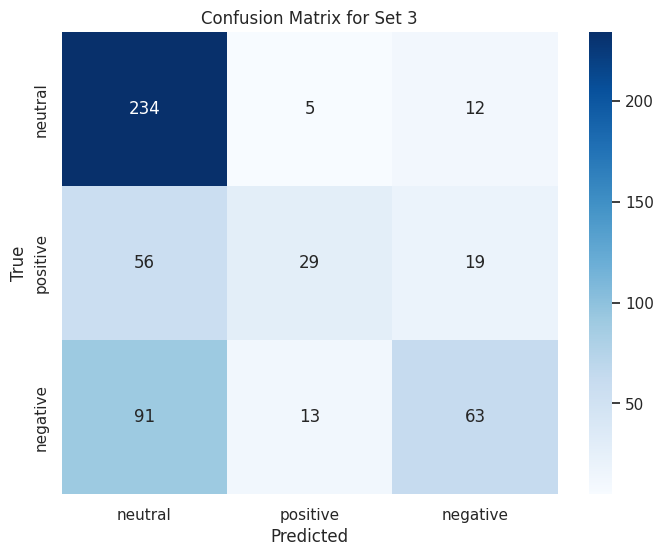

In [ ]:
from sklearn.metrics import average_precision_score, confusion_matrix, f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

def train_and_evaluate_classifier(features_path, class_names, test_size=0.2, max_iter=5000, random_state=42):
    with open(features_path, 'rb') as f:
        features = pickle.load(f)
    X = np.array([x['features'] for x in features.values()])
    y = np.array([x['label'] for x in features.values()])
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, stratify=np.argmax(y, axis=1), random_state=random_state)
    classifier = OneVsRestClassifier(LogisticRegression(max_iter=max_iter, random_state=random_state))
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_val)
    y_score = classifier.decision_function(X_val)
    y_pred_single = np.argmax(y_pred, axis=1)
    y_val_single = np.argmax(y_val, axis=1)
    cm = confusion_matrix(y_val_single, y_pred_single)
    map_val = average_precision_score(y_val, y_score, average='macro')
    f1_macro = f1_score(y_val_single, y_pred_single, average='macro')
    f1_weighted = f1_score(y_val_single, y_pred_single, average='weighted')
    map_per_label = average_precision_score(y_val, y_score, average=None)
    f1_per_label = f1_score(y_val, y_pred, average=None)
    return map_val, f1_macro, f1_weighted, map_per_label, f1_per_label, len(X), cm

# Initialize containers
results_macro = []
results_per_label = []
confusion_matrices = {}
sets_path = ["/content/datasets/MELD/text_features/train_text_features.pkl", "/content/datasets/MELD/text_features/dev_text_features.pkl", "/content/datasets/MELD/text_features/test_text_features.pkl"]
class_names = ['neutral', 'positive', 'negative']

# Evaluate classifier and collect metrics
for idx, set_file in enumerate(sets_path):
    map_val, f1_macro, f1_weighted, map_per_label, f1_per_label, sample_count, cm = train_and_evaluate_classifier(set_file, class_names)
    set_name = f"Set {idx + 1}"
    results_macro.append({
        'Set': set_name,
        'Sample Count': sample_count,
        'Metric': 'MaP',
        'Value': map_val
    })
    results_macro.append({
        'Set': set_name,
        'Sample Count': sample_count,
        'Metric': 'F1 Macro',
        'Value': f1_macro
    })
    results_macro.append({
        'Set': set_name,
        'Sample Count': sample_count,
        'Metric': 'F1 Weighted',
        'Value': f1_weighted
    })

    for label_idx, label_name in enumerate(class_names):
        results_per_label.append({
            'Set': set_name,
            'Label': label_name,
            'Metric': 'MaP',
            'Value': map_per_label[label_idx]
        })
        results_per_label.append({
            'Set': set_name,
            'Label': label_name,
            'Metric': 'F1',
            'Value': f1_per_label[label_idx]
        })

    confusion_matrices[set_name] = cm

# Plotting macro metrics
df_macro = pd.DataFrame(results_macro)
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.barplot(x='Set', y='Value', hue='Metric', data=df_macro)
plt.title('Macro Metrics Across Data Sets')

# Annotate bars with metric values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.4f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Annotate with sample count and update x-axis labels
new_labels = []
for idx, label in enumerate(df_macro['Set'].unique()):
    sample_count = df_macro[df_macro['Set'] == label]['Sample Count'].iloc[0]
    new_labels.append(f"{label}\n(Samples: {sample_count})")
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

plt.show()

# Plotting per-label metrics
df_per_label = pd.DataFrame(results_per_label)
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='Label', y='Value', hue='Metric', data=df_per_label)
plt.title('Metrics Per Label Across All Sets')

# Annotate bars with metric values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.4f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

# Plot confusion matrices
for set_name, cm in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {set_name}')
    plt.show()



In [ ]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# Read the Pickles
def read_pickle_file(file_path):
    with open(file_path, 'rb') as f:
        features = pickle.load(f)
    X = np.array([x['features'] for x in features.values()])
    y = np.array([x['label'] for x in features.values()])
    y_single = np.argmax(y, axis=1)  # Convert Labels to single integers for multiclass classification
    return X, y_single

# Read train, dev, and test data
X_train, y_train = read_pickle_file("/content/datasets/MELD/text_features/train_text_features.pkl")
X_dev, y_dev = read_pickle_file("/content/datasets/MELD/text_features/dev_text_features.pkl")
X_test, y_test = read_pickle_file("/content/datasets/MELD/text_features/test_text_features.pkl")

# Concatenate train and dev sets
X_train_full = np.concatenate((X_train, X_dev), axis=0)
y_train_full = np.concatenate((y_train, y_dev), axis=0)

# Lazy Predict
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_full, X_test, y_train_full, y_test)
print(models)


 97%|█████████▋| 28/29 [16:59<00:38, 38.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.291521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 11098, number of used features: 768
[LightGBM] [Info] Start training from score -0.761960
[LightGBM] [Info] Start training from score -1.464027
[LightGBM] [Info] Start training from score -1.197506


100%|██████████| 29/29 [17:48<00:00, 36.86s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LogisticRegression                 0.67               0.63    None      0.67   
LinearDiscriminantAnalysis         0.66               0.62    None      0.66   
RidgeClassifierCV                  0.67               0.61    None      0.66   
RidgeClassifier                    0.66               0.61    None      0.65   
CalibratedClassifierCV             0.66               0.59    None      0.64   
SVC                                0.65               0.58    None      0.63   
NuSVC                              0.66               0.58    None      0.63   
QuadraticDiscriminantAnalysis      0.65               0.58    None      0.63   
XGBClassifier                      0.64               0.57    None      0.62   
LGBMClassifier                     0.64               0.57    None      0.62   
LinearSVC                          0.63 

In [ ]:
models

Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LogisticRegression                 0.67               0.63    None      0.67   
LinearDiscriminantAnalysis         0.66               0.62    None      0.66   
RidgeClassifierCV                  0.67               0.61    None      0.66   
RidgeClassifier                    0.66               0.61    None      0.65   
CalibratedClassifierCV             0.66               0.59    None      0.64   
SVC                                0.65               0.58    None      0.63   
NuSVC                              0.66               0.58    None      0.63   
QuadraticDiscriminantAnalysis      0.65               0.58    None      0.63   
XGBClassifier                      0.64               0.57    None      0.62   
LGBMClassifier                     0.64               0.57    None      0.62   
LinearSVC                          0.63               0.56    None      0.62   
PassiveAggressiveClassifier        0.58               0.55    None      0.58   
ExtraTreesClassifier               0.62               0.54    None      0.59   
RandomForestClassifier             0.62               0.54    None      0.59   
Perceptron                         0.59               0.53    None      0.58   
AdaBoostClassifier                 0.60               0.53    None      0.58   
BaggingClassifier                  0.58               0.52    None      0.57   
SGDClassifier                      0.55               0.52    None      0.55   
KNeighborsClassifier               0.57               0.50    None      0.55   
DecisionTreeClassifier             0.50               0.47    None      0.50   
GaussianNB                         0.52               0.46    None      0.51   
NearestCentroid                    0.51               0.46    None      0.50   
ExtraTreeClassifier                0.49               0.46    None      0.49   
BernoulliNB                        0.50               0.45    None      0.49   
LabelPropagation                   0.52               0.39    None      0.40   
LabelSpreading                     0.52               0.39    None      0.40   
DummyClassifier                    0.48               0.33    None      0.31   

                               Time Taken  
Model                                      
LogisticRegression                   4.53  
LinearDiscriminantAnalysis           3.35  
RidgeClassifierCV                    4.11  
RidgeClassifier                      0.62  
CalibratedClassifierCV             356.12  
SVC                                 84.96  
NuSVC                               91.47  
QuadraticDiscriminantAnalysis        3.69  
XGBClassifier                       88.56  
LGBMClassifier                      49.90  
LinearSVC                           82.85  
PassiveAggressiveClassifier          2.57  
ExtraTreesClassifier                 6.96  
RandomForestClassifier              33.67  
Perceptron                           1.34  
AdaBoostClassifier                  72.89  
BaggingClassifier                  126.49  
SGDClassifier                        8.33  
KNeighborsClassifier                 1.91  
DecisionTreeClassifier              16.57  
GaussianNB                           0.39  
NearestCentroid                      0.36  
ExtraTreeClassifier                  0.48  
BernoulliNB                          0.80  
LabelPropagation                    11.82  
LabelSpreading                      13.32  
DummyClassifier                      0.39

In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(models, *['F1 Score'], **{})
chart

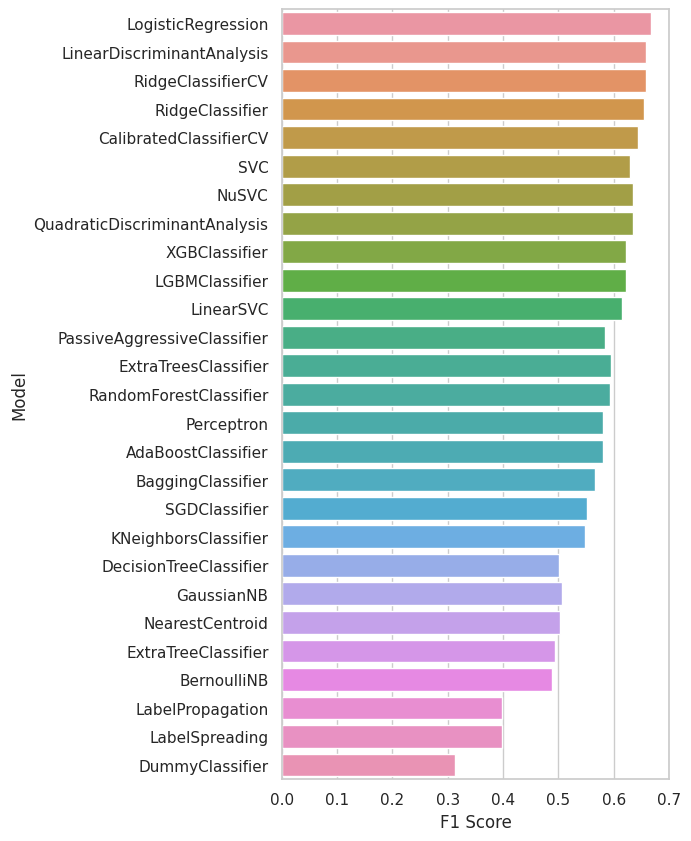

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="F1 Score", data=models)

### Classifiers only with train data

In [ ]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 97%|█████████▋| 28/29 [12:34<00:35, 35.52s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040925 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195839
[LightGBM] [Info] Number of data points in the train set: 9989, number of used features: 768
[LightGBM] [Info] Start training from score -0.751797
[LightGBM] [Info] Start training from score -1.453901
[LightGBM] [Info] Start training from score -1.221376


100%|██████████| 29/29 [12:45<00:00, 26.41s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LogisticRegression                 0.67               0.63    None      0.67   
LinearDiscriminantAnalysis         0.66               0.62    None      0.65   
RidgeClassifierCV                  0.67               0.62    None      0.66   
RidgeClassifier                    0.66               0.61    None      0.65   
LinearSVC                          0.64               0.60    None      0.63   
CalibratedClassifierCV             0.65               0.59    None      0.64   
SGDClassifier                      0.61               0.58    None      0.60   
XGBClassifier                      0.64               0.57    None      0.62   
SVC                                0.65               0.57    None      0.62   
NuSVC                              0.65               0.57    None      0.63   
QuadraticDiscriminantAnalysis      0.65 

In [ ]:
models

Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LogisticRegression                 0.67               0.63    None      0.67   
LinearDiscriminantAnalysis         0.66               0.62    None      0.65   
RidgeClassifierCV                  0.67               0.62    None      0.66   
RidgeClassifier                    0.66               0.61    None      0.65   
LinearSVC                          0.64               0.60    None      0.63   
CalibratedClassifierCV             0.65               0.59    None      0.64   
SGDClassifier                      0.61               0.58    None      0.60   
XGBClassifier                      0.64               0.57    None      0.62   
SVC                                0.65               0.57    None      0.62   
NuSVC                              0.65               0.57    None      0.63   
QuadraticDiscriminantAnalysis      0.65               0.57    None      0.63   
LGBMClassifier                     0.63               0.57    None      0.61   
Perceptron                         0.60               0.56    None      0.60   
RandomForestClassifier             0.63               0.55    None      0.60   
ExtraTreesClassifier               0.62               0.54    None      0.59   
AdaBoostClassifier                 0.58               0.52    None      0.56   
PassiveAggressiveClassifier        0.56               0.51    None      0.55   
BaggingClassifier                  0.57               0.51    None      0.56   
KNeighborsClassifier               0.57               0.50    None      0.55   
DecisionTreeClassifier             0.50               0.47    None      0.51   
NearestCentroid                    0.52               0.46    None      0.51   
GaussianNB                         0.52               0.46    None      0.51   
ExtraTreeClassifier                0.49               0.46    None      0.49   
BernoulliNB                        0.50               0.45    None      0.49   
LabelSpreading                     0.52               0.39    None      0.40   
LabelPropagation                   0.52               0.39    None      0.40   
DummyClassifier                    0.48               0.33    None      0.31   

                               Time Taken  
Model                                      
LogisticRegression                   1.84  
LinearDiscriminantAnalysis           2.19  
RidgeClassifierCV                    1.57  
RidgeClassifier                      0.70  
LinearSVC                           65.27  
CalibratedClassifierCV             261.63  
SGDClassifier                        7.53  
XGBClassifier                      104.50  
SVC                                 51.76  
NuSVC                               63.92  
QuadraticDiscriminantAnalysis        1.99  
LGBMClassifier                      11.15  
Perceptron                           1.44  
RandomForestClassifier              27.52  
ExtraTreesClassifier                 6.74  
AdaBoostClassifier                  49.92  
PassiveAggressiveClassifier          1.71  
BaggingClassifier                   79.03  
KNeighborsClassifier                 0.90  
DecisionTreeClassifier              12.87  
NearestCentroid                      0.55  
GaussianNB                           0.57  
ExtraTreeClassifier                  0.55  
BernoulliNB                          0.82  
LabelSpreading                       5.12  
LabelPropagation                     2.98  
DummyClassifier                      0.50

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(models, *['Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(models, *['Balanced Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(models, *['F1 Score'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(models, *['Time Taken'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(models, *['Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(models, *['Balanced Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(models, *['F1 Score'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(models, *['Time Taken'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(models, *[[['Accuracy', 'Balanced Accuracy'], ['Balanced Accuracy', 'F1 Score'], ['F1 Score', 'Time Taken']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(models, *['Time Taken', 'Accuracy', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(models, *['Time Taken', 'Balanced Accuracy', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(models, *['Time Taken', 'F1 Score', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(models, *['Time Taken', 'count()', None], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(models, *['Accuracy'], **{})
chart

# Feature extraction in audio

### Convert videos to audio

In [ ]:
import pandas as pd
from pydub import AudioSegment
import os
from tqdm import tqdm
import moviepy.editor as mp  # Import for alternative conversion method

def convert_videos_to_wav(input_folder, output_folder, csv_file_path, max_retries=3):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    df = pd.read_csv(csv_file_path)
    df['video_id'] = 'dia' + df['Dialogue_ID'].astype(str) + '_utt' + df['Utterance_ID'].astype(str)

    failed_conversions = []  # To keep track of failed conversions

    for video_id in tqdm(df['video_id']):
        mp4_filename = f"{video_id}.mp4"
        mp4_path = os.path.join(input_folder, mp4_filename)
        wav_path = os.path.join(output_folder, mp4_filename.replace(".mp4", ".wav"))

        retries = 5
        success = False

        while retries < max_retries and not success:
            try:
                if os.path.exists(mp4_path):  # Check if the video file exists
                    audio = AudioSegment.from_file(mp4_path, format="mp4")
                    audio.export(wav_path, format="wav")
                    print(f"Converted {mp4_filename} to {wav_path}.")
                    success = True
                else:
                    print(f"{mp4_path} does not exist. Skipping.")
                    failed_conversions.append(mp4_filename)
                    break  # No point in retrying if the file doesn't exist
            except Exception as e:
                print(f"Attempt {retries+1} failed to convert {mp4_filename} due to {e}. Retrying...")
                retries += 1

        # If all retries failed, try a different conversion method
        if not success:
            try:
                clip = mp.VideoFileClip(mp4_path)
                clip.audio.write_audiofile(wav_path, codec='pcm_s16le')
                print(f"Successfully converted {mp4_filename} to {wav_path} using an alternative method.")
            except Exception as e:
                print(f"Alternative method also failed to convert {mp4_filename} due to {e}.")
                failed_conversions.append(mp4_filename)

    print(f"Failed conversions: {failed_conversions}")

# Your existing code for specifying directories goes here


# Train
video_directory_train = "/content/datasets/MELD/train_splits"
csv_file_train = "/content/datasets/MELD/train_sent_emo.csv"
output_directory_train = "/content/datasets/MELD/train_splits_complete_wav"
convert_videos_to_wav(video_directory_train, output_directory_train, csv_file_train)

# Dev
video_directory_dev = "/content/datasets/MELD/dev_splits_complete"
csv_file_dev = "/content/datasets/MELD/dev_sent_emo.csv"
output_directory_dev = "/content/datasets/MELD/dev_splits_wav"
convert_videos_to_wav(video_directory_dev, output_directory_dev, csv_file_dev)

# Test
video_directory_test = "/content/datasets/MELD/output_repeated_splits_test"
csv_file_test = "/content/datasets/MELD/test_sent_emo.csv"
output_directory_test = "/content/datasets/MELD/test_splits_wav"
convert_videos_to_wav(video_directory_test, output_directory_test, csv_file_test)


  0%|          | 0/9989 [00:00<?, ?it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia0_utt0.wav



  0%|          | 1/9989 [00:00<45:36,  3.65it/s]

MoviePy - Done.
Successfully converted dia0_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia0_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia0_utt1.wav



  0%|          | 2/9989 [00:00<29:26,  5.65it/s]

MoviePy - Done.
Successfully converted dia0_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia0_utt1.wav using an alternative method.


  0%|          | 2/9989 [00:00<29:26,  5.65it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia0_utt2.wav



  0%|          | 3/9989 [00:00<24:58,  6.67it/s]

MoviePy - Done.
Successfully converted dia0_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia0_utt2.wav using an alternative method.


  0%|          | 3/9989 [00:00<24:58,  6.67it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia0_utt3.wav



  0%|          | 4/9989 [00:00<23:25,  7.10it/s]

MoviePy - Done.
Successfully converted dia0_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia0_utt3.wav using an alternative method.


  0%|          | 4/9989 [00:00<23:25,  7.10it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia0_utt4.wav



  0%|          | 5/9989 [00:00<24:21,  6.83it/s]

MoviePy - Done.
Successfully converted dia0_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia0_utt4.wav using an alternative method.


  0%|          | 5/9989 [00:00<24:21,  6.83it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia0_utt5.wav



  0%|          | 6/9989 [00:00<22:20,  7.45it/s]

MoviePy - Done.
Successfully converted dia0_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia0_utt5.wav using an alternative method.


  0%|          | 6/9989 [00:00<22:20,  7.45it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia0_utt6.wav



  0%|          | 7/9989 [00:01<22:10,  7.50it/s]

MoviePy - Done.
Successfully converted dia0_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia0_utt6.wav using an alternative method.


  0%|          | 7/9989 [00:01<22:10,  7.50it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia0_utt7.wav



  0%|          | 8/9989 [00:01<22:32,  7.38it/s]

MoviePy - Done.
Successfully converted dia0_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia0_utt7.wav using an alternative method.


  0%|          | 8/9989 [00:01<22:32,  7.38it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia0_utt8.wav



  0%|          | 9/9989 [00:01<21:02,  7.90it/s]

MoviePy - Done.
Successfully converted dia0_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia0_utt8.wav using an alternative method.


  0%|          | 9/9989 [00:01<21:02,  7.90it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia0_utt9.wav



  0%|          | 10/9989 [00:01<21:03,  7.90it/s]

MoviePy - Done.
Successfully converted dia0_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia0_utt9.wav using an alternative method.


  0%|          | 10/9989 [00:01<21:03,  7.90it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia0_utt10.wav



  0%|          | 11/9989 [00:01<20:22,  8.16it/s]

MoviePy - Done.
Successfully converted dia0_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia0_utt10.wav using an alternative method.


  0%|          | 11/9989 [00:01<20:22,  8.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia0_utt11.wav



  0%|          | 12/9989 [00:01<22:57,  7.24it/s]

MoviePy - Done.
Successfully converted dia0_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia0_utt11.wav using an alternative method.


  0%|          | 12/9989 [00:01<22:57,  7.24it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia0_utt12.wav



  0%|          | 13/9989 [00:01<28:17,  5.88it/s]

MoviePy - Done.
Successfully converted dia0_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia0_utt12.wav using an alternative method.


  0%|          | 13/9989 [00:02<28:17,  5.88it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia0_utt13.wav



  0%|          | 14/9989 [00:02<33:26,  4.97it/s]

MoviePy - Done.
Successfully converted dia0_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia0_utt13.wav using an alternative method.


  0%|          | 14/9989 [00:02<33:26,  4.97it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia1_utt0.wav



  0%|          | 15/9989 [00:02<33:24,  4.98it/s]

MoviePy - Done.
Successfully converted dia1_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia1_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia1_utt1.wav



  0%|          | 16/9989 [00:02<32:45,  5.07it/s]

MoviePy - Done.
Successfully converted dia1_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia1_utt1.wav using an alternative method.


  0%|          | 16/9989 [00:02<32:45,  5.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia1_utt2.wav



  0%|          | 17/9989 [00:02<37:22,  4.45it/s]

MoviePy - Done.
Successfully converted dia1_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia1_utt2.wav using an alternative method.


  0%|          | 17/9989 [00:03<37:22,  4.45it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia1_utt3.wav



  0%|          | 18/9989 [00:03<35:24,  4.69it/s]

MoviePy - Done.
Successfully converted dia1_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia1_utt3.wav using an alternative method.


  0%|          | 18/9989 [00:03<35:24,  4.69it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia1_utt4.wav



  0%|          | 19/9989 [00:03<32:24,  5.13it/s]

MoviePy - Done.
Successfully converted dia1_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia1_utt4.wav using an alternative method.


  0%|          | 19/9989 [00:03<32:24,  5.13it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia1_utt5.wav



chunk:   0%|          | 0/33 [00:00<?, ?it/s, now=None]
                                                 

MoviePy - Done.
Successfully converted dia1_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia1_utt5.wav using an alternative method.


  0%|          | 20/9989 [00:03<32:59,  5.04it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia1_utt8.wav



  0%|          | 21/9989 [00:03<34:23,  4.83it/s]

MoviePy - Done.
Successfully converted dia1_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia1_utt8.wav using an alternative method.


  0%|          | 21/9989 [00:03<34:23,  4.83it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia2_utt0.wav



  0%|          | 22/9989 [00:03<34:53,  4.76it/s]

MoviePy - Done.
Successfully converted dia2_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia2_utt0.wav using an alternative method.


  0%|          | 22/9989 [00:04<34:53,  4.76it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia2_utt1.wav



  0%|          | 23/9989 [00:04<33:40,  4.93it/s]

MoviePy - Done.
Successfully converted dia2_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia2_utt1.wav using an alternative method.


  0%|          | 23/9989 [00:04<33:40,  4.93it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia2_utt2.wav



  0%|          | 24/9989 [00:04<36:07,  4.60it/s]

MoviePy - Done.
Successfully converted dia2_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia2_utt2.wav using an alternative method.


  0%|          | 24/9989 [00:04<36:07,  4.60it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia2_utt3.wav



  0%|          | 25/9989 [00:04<35:01,  4.74it/s]

MoviePy - Done.
Successfully converted dia2_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia2_utt3.wav using an alternative method.


  0%|          | 25/9989 [00:04<35:01,  4.74it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia2_utt4.wav



  0%|          | 26/9989 [00:04<34:43,  4.78it/s]

MoviePy - Done.
Successfully converted dia2_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia2_utt4.wav using an alternative method.


  0%|          | 26/9989 [00:04<34:43,  4.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia2_utt5.wav



  0%|          | 27/9989 [00:04<37:08,  4.47it/s]

MoviePy - Done.
Successfully converted dia2_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia2_utt5.wav using an alternative method.


  0%|          | 27/9989 [00:05<37:08,  4.47it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia2_utt6.wav



  0%|          | 28/9989 [00:05<38:32,  4.31it/s]

MoviePy - Done.
Successfully converted dia2_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia2_utt6.wav using an alternative method.


  0%|          | 28/9989 [00:05<38:32,  4.31it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia2_utt7.wav



  0%|          | 29/9989 [00:05<41:20,  4.01it/s]

MoviePy - Done.
Successfully converted dia2_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia2_utt7.wav using an alternative method.


  0%|          | 29/9989 [00:05<41:20,  4.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia2_utt8.wav



  0%|          | 30/9989 [00:05<44:06,  3.76it/s]

MoviePy - Done.
Successfully converted dia2_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia2_utt8.wav using an alternative method.


  0%|          | 30/9989 [00:05<44:06,  3.76it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia2_utt9.wav



  0%|          | 31/9989 [00:06<41:45,  3.98it/s]

MoviePy - Done.
Successfully converted dia2_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia2_utt9.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia2_utt10.wav



  0%|          | 32/9989 [00:06<38:08,  4.35it/s]

MoviePy - Done.
Successfully converted dia2_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia2_utt10.wav using an alternative method.


  0%|          | 32/9989 [00:06<38:08,  4.35it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia2_utt11.wav



  0%|          | 33/9989 [00:06<36:05,  4.60it/s]

MoviePy - Done.
Successfully converted dia2_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia2_utt11.wav using an alternative method.


  0%|          | 33/9989 [00:06<36:05,  4.60it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia2_utt12.wav



  0%|          | 34/9989 [00:06<36:44,  4.52it/s]

MoviePy - Done.
Successfully converted dia2_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia2_utt12.wav using an alternative method.


  0%|          | 34/9989 [00:06<36:44,  4.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia3_utt0.wav



  0%|          | 35/9989 [00:06<36:26,  4.55it/s]

MoviePy - Done.
Successfully converted dia3_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia3_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia3_utt1.wav



  0%|          | 36/9989 [00:07<35:27,  4.68it/s]

MoviePy - Done.
Successfully converted dia3_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia3_utt1.wav using an alternative method.


  0%|          | 36/9989 [00:07<35:27,  4.68it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia3_utt2.wav



  0%|          | 37/9989 [00:07<32:43,  5.07it/s]

MoviePy - Done.
Successfully converted dia3_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia3_utt2.wav using an alternative method.


  0%|          | 37/9989 [00:07<32:43,  5.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia3_utt3.wav



  0%|          | 38/9989 [00:07<40:50,  4.06it/s]

MoviePy - Done.
Successfully converted dia3_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia3_utt3.wav using an alternative method.


  0%|          | 38/9989 [00:07<40:50,  4.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia3_utt4.wav



  0%|          | 39/9989 [00:07<43:44,  3.79it/s]

MoviePy - Done.
Successfully converted dia3_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia3_utt4.wav using an alternative method.


  0%|          | 39/9989 [00:08<43:44,  3.79it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia3_utt5.wav



  0%|          | 40/9989 [00:08<48:30,  3.42it/s]

MoviePy - Done.
Successfully converted dia3_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia3_utt5.wav using an alternative method.


  0%|          | 40/9989 [00:08<48:30,  3.42it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia3_utt6.wav



  0%|          | 41/9989 [00:08<56:04,  2.96it/s]

MoviePy - Done.
Successfully converted dia3_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia3_utt6.wav using an alternative method.


  0%|          | 41/9989 [00:08<56:04,  2.96it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia3_utt8.wav



  0%|          | 42/9989 [00:08<52:52,  3.14it/s]

MoviePy - Done.
Successfully converted dia3_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia3_utt8.wav using an alternative method.


  0%|          | 42/9989 [00:09<52:52,  3.14it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia3_utt9.wav



  0%|          | 43/9989 [00:09<55:14,  3.00it/s]

MoviePy - Done.
Successfully converted dia3_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia3_utt9.wav using an alternative method.


  0%|          | 43/9989 [00:09<55:14,  3.00it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia4_utt0.wav



  0%|          | 44/9989 [00:09<50:23,  3.29it/s]

MoviePy - Done.
Successfully converted dia4_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia4_utt0.wav using an alternative method.


  0%|          | 44/9989 [00:09<50:23,  3.29it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia4_utt1.wav



  0%|          | 45/9989 [00:09<47:23,  3.50it/s]

MoviePy - Done.
Successfully converted dia4_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia4_utt1.wav using an alternative method.


  0%|          | 45/9989 [00:10<47:23,  3.50it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia4_utt2.wav



  0%|          | 46/9989 [00:10<53:39,  3.09it/s]

MoviePy - Done.
Successfully converted dia4_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia4_utt2.wav using an alternative method.


  0%|          | 46/9989 [00:10<53:39,  3.09it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia4_utt3.wav



  0%|          | 47/9989 [00:10<1:02:13,  2.66it/s]

MoviePy - Done.
Successfully converted dia4_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia4_utt3.wav using an alternative method.


  0%|          | 47/9989 [00:10<1:02:13,  2.66it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia4_utt4.wav



  0%|          | 48/9989 [00:11<1:00:11,  2.75it/s]

MoviePy - Done.
Successfully converted dia4_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia4_utt4.wav using an alternative method.


  0%|          | 48/9989 [00:11<1:00:11,  2.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia4_utt5.wav



  0%|          | 49/9989 [00:11<54:45,  3.03it/s]  

MoviePy - Done.
Successfully converted dia4_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia4_utt5.wav using an alternative method.


  0%|          | 49/9989 [00:11<54:45,  3.03it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia4_utt6.wav



  1%|          | 50/9989 [00:11<54:31,  3.04it/s]

MoviePy - Done.
Successfully converted dia4_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia4_utt6.wav using an alternative method.


  1%|          | 50/9989 [00:11<54:31,  3.04it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia4_utt7.wav



  1%|          | 51/9989 [00:11<52:39,  3.15it/s]

MoviePy - Done.
Successfully converted dia4_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia4_utt7.wav using an alternative method.


  1%|          | 51/9989 [00:12<52:39,  3.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia4_utt8.wav



  1%|          | 52/9989 [00:12<1:03:47,  2.60it/s]

MoviePy - Done.
Successfully converted dia4_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia4_utt8.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia4_utt9.wav



  1%|          | 53/9989 [00:12<56:19,  2.94it/s]  

MoviePy - Done.
Successfully converted dia4_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia4_utt9.wav using an alternative method.


  1%|          | 53/9989 [00:13<56:19,  2.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia4_utt10.wav



  1%|          | 54/9989 [00:13<1:32:13,  1.80it/s]

MoviePy - Done.
Successfully converted dia4_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia4_utt10.wav using an alternative method.


  1%|          | 54/9989 [00:14<1:32:13,  1.80it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia4_utt11.wav



  1%|          | 55/9989 [00:15<2:13:29,  1.24it/s]

MoviePy - Done.
Successfully converted dia4_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia4_utt11.wav using an alternative method.


  1%|          | 55/9989 [00:15<2:13:29,  1.24it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia4_utt12.wav



  1%|          | 56/9989 [00:16<2:16:22,  1.21it/s]

MoviePy - Done.
Successfully converted dia4_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia4_utt12.wav using an alternative method.


  1%|          | 56/9989 [00:16<2:16:22,  1.21it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia4_utt13.wav



  1%|          | 57/9989 [00:16<2:19:23,  1.19it/s]

MoviePy - Done.
Successfully converted dia4_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia4_utt13.wav using an alternative method.


  1%|          | 57/9989 [00:17<2:19:23,  1.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia4_utt14.wav



  1%|          | 58/9989 [00:17<2:14:26,  1.23it/s]

MoviePy - Done.
Successfully converted dia4_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia4_utt14.wav using an alternative method.


  1%|          | 58/9989 [00:18<2:14:26,  1.23it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia5_utt0.wav



  1%|          | 59/9989 [00:18<2:18:45,  1.19it/s]

MoviePy - Done.
Successfully converted dia5_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia5_utt0.wav using an alternative method.


  1%|          | 59/9989 [00:18<2:18:45,  1.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia5_utt1.wav



  1%|          | 60/9989 [00:18<1:51:22,  1.49it/s]

MoviePy - Done.
Successfully converted dia5_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia5_utt1.wav using an alternative method.


  1%|          | 60/9989 [00:19<1:51:22,  1.49it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia5_utt2.wav



  1%|          | 61/9989 [00:19<1:44:27,  1.58it/s]

MoviePy - Done.
Successfully converted dia5_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia5_utt2.wav using an alternative method.


  1%|          | 61/9989 [00:19<1:44:27,  1.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia5_utt3.wav



  1%|          | 62/9989 [00:19<1:40:55,  1.64it/s]

MoviePy - Done.
Successfully converted dia5_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia5_utt3.wav using an alternative method.


  1%|          | 62/9989 [00:20<1:40:55,  1.64it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt0.wav



  1%|          | 63/9989 [00:20<1:26:05,  1.92it/s]

MoviePy - Done.
Successfully converted dia6_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt0.wav using an alternative method.


  1%|          | 63/9989 [00:20<1:26:05,  1.92it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt1.wav



  1%|          | 64/9989 [00:20<1:09:30,  2.38it/s]

MoviePy - Done.
Successfully converted dia6_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt1.wav using an alternative method.


  1%|          | 64/9989 [00:20<1:09:30,  2.38it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt2.wav



  1%|          | 65/9989 [00:20<1:03:19,  2.61it/s]

MoviePy - Done.
Successfully converted dia6_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt2.wav using an alternative method.


  1%|          | 65/9989 [00:20<1:03:19,  2.61it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt3.wav



  1%|          | 66/9989 [00:20<57:51,  2.86it/s]  

MoviePy - Done.
Successfully converted dia6_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt3.wav using an alternative method.


  1%|          | 66/9989 [00:21<57:51,  2.86it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt4.wav



  1%|          | 67/9989 [00:21<52:22,  3.16it/s]

MoviePy - Done.
Successfully converted dia6_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt4.wav using an alternative method.


  1%|          | 67/9989 [00:21<52:22,  3.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt5.wav



  1%|          | 68/9989 [00:21<47:55,  3.45it/s]

MoviePy - Done.
Successfully converted dia6_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt5.wav using an alternative method.


  1%|          | 68/9989 [00:21<47:55,  3.45it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt6.wav



  1%|          | 69/9989 [00:21<48:52,  3.38it/s]

MoviePy - Done.
Successfully converted dia6_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt6.wav using an alternative method.


  1%|          | 69/9989 [00:21<48:52,  3.38it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt7.wav



  1%|          | 70/9989 [00:22<50:30,  3.27it/s]

MoviePy - Done.
Successfully converted dia6_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt7.wav using an alternative method.


  1%|          | 70/9989 [00:22<50:30,  3.27it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt8.wav



  1%|          | 71/9989 [00:22<57:54,  2.85it/s]

MoviePy - Done.
Successfully converted dia6_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt8.wav using an alternative method.


  1%|          | 71/9989 [00:22<57:54,  2.85it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt9.wav



  1%|          | 72/9989 [00:22<52:21,  3.16it/s]

MoviePy - Done.
Successfully converted dia6_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt9.wav using an alternative method.


  1%|          | 72/9989 [00:22<52:21,  3.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt10.wav



  1%|          | 73/9989 [00:23<48:05,  3.44it/s]

MoviePy - Done.
Successfully converted dia6_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt10.wav using an alternative method.


  1%|          | 73/9989 [00:23<48:05,  3.44it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt11.wav



  1%|          | 74/9989 [00:23<47:59,  3.44it/s]

MoviePy - Done.
Successfully converted dia6_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt11.wav using an alternative method.


  1%|          | 74/9989 [00:23<47:59,  3.44it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt12.wav



  1%|          | 75/9989 [00:23<46:42,  3.54it/s]

MoviePy - Done.
Successfully converted dia6_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt12.wav using an alternative method.


  1%|          | 75/9989 [00:23<46:42,  3.54it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt13.wav



chunk:   0%|          | 0/22 [00:00<?, ?it/s, now=None]
                                                 

MoviePy - Done.
Successfully converted dia6_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt13.wav using an alternative method.


  1%|          | 76/9989 [00:23<46:00,  3.59it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt14.wav



  1%|          | 77/9989 [00:24<42:58,  3.84it/s]

MoviePy - Done.
Successfully converted dia6_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt14.wav using an alternative method.


  1%|          | 77/9989 [00:24<42:58,  3.84it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt15.wav



  1%|          | 78/9989 [00:24<40:37,  4.07it/s]

MoviePy - Done.
Successfully converted dia6_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt15.wav using an alternative method.


  1%|          | 78/9989 [00:24<40:37,  4.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt16.wav



  1%|          | 79/9989 [00:24<46:27,  3.55it/s]

MoviePy - Done.
Successfully converted dia6_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt16.wav using an alternative method.


  1%|          | 79/9989 [00:24<46:27,  3.55it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt17.wav



  1%|          | 80/9989 [00:24<44:32,  3.71it/s]

MoviePy - Done.
Successfully converted dia6_utt17.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt17.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt18.wav



  1%|          | 81/9989 [00:25<39:29,  4.18it/s]

MoviePy - Done.
Successfully converted dia6_utt18.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt18.wav using an alternative method.


  1%|          | 81/9989 [00:25<39:29,  4.18it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt19.wav



  1%|          | 82/9989 [00:25<38:20,  4.31it/s]

MoviePy - Done.
Successfully converted dia6_utt19.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt19.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt20.wav



  1%|          | 83/9989 [00:25<36:08,  4.57it/s]

MoviePy - Done.
Successfully converted dia6_utt20.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt20.wav using an alternative method.


  1%|          | 83/9989 [00:25<36:08,  4.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia6_utt21.wav



  1%|          | 84/9989 [00:25<37:51,  4.36it/s]

MoviePy - Done.
Successfully converted dia6_utt21.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia6_utt21.wav using an alternative method.


  1%|          | 84/9989 [00:25<37:51,  4.36it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia7_utt0.wav



  1%|          | 85/9989 [00:25<38:19,  4.31it/s]

MoviePy - Done.
Successfully converted dia7_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia7_utt0.wav using an alternative method.


  1%|          | 85/9989 [00:26<38:19,  4.31it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia7_utt1.wav



  1%|          | 86/9989 [00:26<37:25,  4.41it/s]

MoviePy - Done.
Successfully converted dia7_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia7_utt1.wav using an alternative method.


  1%|          | 86/9989 [00:26<37:25,  4.41it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia8_utt0.wav



  1%|          | 87/9989 [00:26<40:01,  4.12it/s]

MoviePy - Done.
Successfully converted dia8_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia8_utt0.wav using an alternative method.


  1%|          | 87/9989 [00:26<40:01,  4.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia8_utt1.wav



  1%|          | 88/9989 [00:26<43:42,  3.77it/s]

MoviePy - Done.
Successfully converted dia8_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia8_utt1.wav using an alternative method.


  1%|          | 88/9989 [00:26<43:42,  3.77it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia8_utt2.wav



  1%|          | 89/9989 [00:26<39:11,  4.21it/s]

MoviePy - Done.
Successfully converted dia8_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia8_utt2.wav using an alternative method.


  1%|          | 89/9989 [00:27<39:11,  4.21it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia8_utt3.wav



  1%|          | 90/9989 [00:27<39:56,  4.13it/s]

MoviePy - Done.
Successfully converted dia8_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia8_utt3.wav using an alternative method.


  1%|          | 90/9989 [00:27<39:56,  4.13it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia8_utt4.wav



  1%|          | 91/9989 [00:27<44:21,  3.72it/s]

MoviePy - Done.
Successfully converted dia8_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia8_utt4.wav using an alternative method.


  1%|          | 91/9989 [00:27<44:21,  3.72it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia8_utt5.wav



  1%|          | 92/9989 [00:27<44:25,  3.71it/s]

MoviePy - Done.
Successfully converted dia8_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia8_utt5.wav using an alternative method.


  1%|          | 92/9989 [00:27<44:25,  3.71it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia8_utt6.wav



  1%|          | 93/9989 [00:28<44:18,  3.72it/s]

MoviePy - Done.
Successfully converted dia8_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia8_utt6.wav using an alternative method.


  1%|          | 93/9989 [00:28<44:18,  3.72it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia9_utt0.wav



  1%|          | 94/9989 [00:28<42:31,  3.88it/s]

MoviePy - Done.
Successfully converted dia9_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia9_utt0.wav using an alternative method.


  1%|          | 94/9989 [00:28<42:31,  3.88it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia9_utt1.wav



  1%|          | 95/9989 [00:29<1:08:55,  2.39it/s]

MoviePy - Done.
Successfully converted dia9_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia9_utt1.wav using an alternative method.


  1%|          | 95/9989 [00:29<1:08:55,  2.39it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia9_utt2.wav



  1%|          | 96/9989 [00:29<1:14:12,  2.22it/s]

MoviePy - Done.
Successfully converted dia9_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia9_utt2.wav using an alternative method.


  1%|          | 96/9989 [00:30<1:14:12,  2.22it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia9_utt3.wav



  1%|          | 97/9989 [00:30<1:21:16,  2.03it/s]

MoviePy - Done.
Successfully converted dia9_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia9_utt3.wav using an alternative method.


  1%|          | 97/9989 [00:30<1:21:16,  2.03it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia9_utt4.wav



  1%|          | 98/9989 [00:30<1:19:03,  2.09it/s]

MoviePy - Done.
Successfully converted dia9_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia9_utt4.wav using an alternative method.


  1%|          | 98/9989 [00:30<1:19:03,  2.09it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia9_utt5.wav



  1%|          | 99/9989 [00:31<1:16:21,  2.16it/s]

MoviePy - Done.
Successfully converted dia9_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia9_utt5.wav using an alternative method.


  1%|          | 99/9989 [00:31<1:16:21,  2.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia9_utt6.wav



  1%|          | 100/9989 [00:31<1:22:44,  1.99it/s]

MoviePy - Done.
Successfully converted dia9_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia9_utt6.wav using an alternative method.


  1%|          | 100/9989 [00:31<1:22:44,  1.99it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia9_utt7.wav



  1%|          | 101/9989 [00:32<1:22:11,  2.01it/s]

MoviePy - Done.
Successfully converted dia9_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia9_utt7.wav using an alternative method.


  1%|          | 101/9989 [00:32<1:22:11,  2.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia9_utt8.wav



  1%|          | 102/9989 [00:32<1:16:10,  2.16it/s]

MoviePy - Done.
Successfully converted dia9_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia9_utt8.wav using an alternative method.


  1%|          | 102/9989 [00:32<1:16:10,  2.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia9_utt9.wav



  1%|          | 103/9989 [00:32<1:11:57,  2.29it/s]

MoviePy - Done.
Successfully converted dia9_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia9_utt9.wav using an alternative method.


  1%|          | 103/9989 [00:33<1:11:57,  2.29it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia9_utt10.wav



  1%|          | 104/9989 [00:33<1:19:01,  2.08it/s]

MoviePy - Done.
Successfully converted dia9_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia9_utt10.wav using an alternative method.


  1%|          | 104/9989 [00:33<1:19:01,  2.08it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia9_utt11.wav



  1%|          | 104/9989 [00:33<1:19:01,  2.08it/s]

MoviePy - Done.


  1%|          | 105/9989 [00:33<1:16:30,  2.15it/s]

Successfully converted dia9_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia9_utt11.wav using an alternative method.


  1%|          | 105/9989 [00:34<1:16:30,  2.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia9_utt12.wav



  1%|          | 106/9989 [00:34<1:14:25,  2.21it/s]

MoviePy - Done.
Successfully converted dia9_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia9_utt12.wav using an alternative method.


  1%|          | 106/9989 [00:34<1:14:25,  2.21it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia9_utt13.wav



  1%|          | 107/9989 [00:34<1:16:32,  2.15it/s]

MoviePy - Done.
Successfully converted dia9_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia9_utt13.wav using an alternative method.


  1%|          | 107/9989 [00:35<1:16:32,  2.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia10_utt0.wav



  1%|          | 108/9989 [00:35<1:11:00,  2.32it/s]

MoviePy - Done.
Successfully converted dia10_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia10_utt0.wav using an alternative method.


  1%|          | 108/9989 [00:35<1:11:00,  2.32it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia10_utt1.wav



  1%|          | 109/9989 [00:35<1:09:03,  2.38it/s]

MoviePy - Done.
Successfully converted dia10_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia10_utt1.wav using an alternative method.


  1%|          | 109/9989 [00:35<1:09:03,  2.38it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia10_utt2.wav



  1%|          | 110/9989 [00:35<1:03:43,  2.58it/s]

MoviePy - Done.
Successfully converted dia10_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia10_utt2.wav using an alternative method.


  1%|          | 110/9989 [00:36<1:03:43,  2.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia10_utt3.wav



  1%|          | 111/9989 [00:36<57:53,  2.84it/s]  

MoviePy - Done.
Successfully converted dia10_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia10_utt3.wav using an alternative method.


  1%|          | 111/9989 [00:36<57:53,  2.84it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia10_utt4.wav



  1%|          | 112/9989 [00:36<56:03,  2.94it/s]

MoviePy - Done.
Successfully converted dia10_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia10_utt4.wav using an alternative method.


  1%|          | 112/9989 [00:36<56:03,  2.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia10_utt5.wav



  1%|          | 113/9989 [00:36<55:53,  2.94it/s]

MoviePy - Done.
Successfully converted dia10_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia10_utt5.wav using an alternative method.


  1%|          | 113/9989 [00:36<55:53,  2.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia11_utt0.wav



  1%|          | 114/9989 [00:37<49:36,  3.32it/s]

MoviePy - Done.
Successfully converted dia11_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia11_utt0.wav using an alternative method.


  1%|          | 114/9989 [00:37<49:36,  3.32it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia11_utt1.wav



  1%|          | 115/9989 [00:37<50:05,  3.29it/s]

MoviePy - Done.
Successfully converted dia11_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia11_utt1.wav using an alternative method.


  1%|          | 115/9989 [00:37<50:05,  3.29it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia11_utt2.wav



  1%|          | 116/9989 [00:37<52:26,  3.14it/s]

MoviePy - Done.
Successfully converted dia11_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia11_utt2.wav using an alternative method.


  1%|          | 116/9989 [00:37<52:26,  3.14it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia11_utt3.wav



  1%|          | 117/9989 [00:38<55:56,  2.94it/s]

MoviePy - Done.
Successfully converted dia11_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia11_utt3.wav using an alternative method.


  1%|          | 117/9989 [00:38<55:56,  2.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia11_utt4.wav



  1%|          | 118/9989 [00:38<49:35,  3.32it/s]

MoviePy - Done.
Successfully converted dia11_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia11_utt4.wav using an alternative method.


  1%|          | 118/9989 [00:38<49:35,  3.32it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia11_utt5.wav



  1%|          | 119/9989 [00:38<46:50,  3.51it/s]

MoviePy - Done.
Successfully converted dia11_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia11_utt5.wav using an alternative method.


  1%|          | 119/9989 [00:38<46:50,  3.51it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia11_utt6.wav



chunk:   0%|          | 0/44 [00:00<?, ?it/s, now=None]
                                                  

MoviePy - Done.
Successfully converted dia11_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia11_utt6.wav using an alternative method.


  1%|          | 120/9989 [00:38<45:00,  3.66it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia11_utt7.wav



  1%|          | 121/9989 [00:38<41:11,  3.99it/s]

MoviePy - Done.
Successfully converted dia11_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia11_utt7.wav using an alternative method.


  1%|          | 121/9989 [00:39<41:11,  3.99it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia11_utt8.wav



  1%|          | 122/9989 [00:39<40:23,  4.07it/s]

MoviePy - Done.
Successfully converted dia11_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia11_utt8.wav using an alternative method.


  1%|          | 122/9989 [00:39<40:23,  4.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia11_utt9.wav



  1%|          | 123/9989 [00:39<41:50,  3.93it/s]

MoviePy - Done.
Successfully converted dia11_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia11_utt9.wav using an alternative method.


  1%|          | 123/9989 [00:39<41:50,  3.93it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia12_utt0.wav



  1%|          | 124/9989 [00:39<40:31,  4.06it/s]

MoviePy - Done.
Successfully converted dia12_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia12_utt0.wav using an alternative method.


  1%|          | 124/9989 [00:39<40:31,  4.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia12_utt1.wav



  1%|▏         | 125/9989 [00:40<46:18,  3.55it/s]

MoviePy - Done.
Successfully converted dia12_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia12_utt1.wav using an alternative method.


  1%|▏         | 125/9989 [00:40<46:18,  3.55it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia12_utt2.wav



  1%|▏         | 126/9989 [00:40<43:34,  3.77it/s]

MoviePy - Done.
Successfully converted dia12_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia12_utt2.wav using an alternative method.


  1%|▏         | 126/9989 [00:40<43:34,  3.77it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia12_utt3.wav



  1%|▏         | 127/9989 [00:40<41:47,  3.93it/s]

MoviePy - Done.
Successfully converted dia12_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia12_utt3.wav using an alternative method.


  1%|▏         | 127/9989 [00:40<41:47,  3.93it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia12_utt4.wav



  1%|▏         | 128/9989 [00:40<43:54,  3.74it/s]

MoviePy - Done.
Successfully converted dia12_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia12_utt4.wav using an alternative method.


  1%|▏         | 128/9989 [00:41<43:54,  3.74it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia12_utt5.wav



  1%|▏         | 129/9989 [00:41<44:10,  3.72it/s]

MoviePy - Done.
Successfully converted dia12_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia12_utt5.wav using an alternative method.


  1%|▏         | 129/9989 [00:41<44:10,  3.72it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia12_utt6.wav



  1%|▏         | 130/9989 [00:41<52:58,  3.10it/s]

MoviePy - Done.
Successfully converted dia12_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia12_utt6.wav using an alternative method.


  1%|▏         | 130/9989 [00:41<52:58,  3.10it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia12_utt7.wav



  1%|▏         | 131/9989 [00:41<50:32,  3.25it/s]

MoviePy - Done.
Successfully converted dia12_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia12_utt7.wav using an alternative method.


  1%|▏         | 131/9989 [00:41<50:32,  3.25it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia12_utt8.wav



  1%|▏         | 132/9989 [00:42<48:23,  3.40it/s]

MoviePy - Done.
Successfully converted dia12_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia12_utt8.wav using an alternative method.


  1%|▏         | 132/9989 [00:42<48:23,  3.40it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia12_utt9.wav



  1%|▏         | 133/9989 [00:42<53:18,  3.08it/s]

MoviePy - Done.
Successfully converted dia12_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia12_utt9.wav using an alternative method.


  1%|▏         | 133/9989 [00:42<53:18,  3.08it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia12_utt10.wav



  1%|▏         | 134/9989 [00:42<57:17,  2.87it/s]

MoviePy - Done.
Successfully converted dia12_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia12_utt10.wav using an alternative method.


  1%|▏         | 134/9989 [00:43<57:17,  2.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia12_utt11.wav



  1%|▏         | 135/9989 [00:43<56:37,  2.90it/s]

MoviePy - Done.
Successfully converted dia12_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia12_utt11.wav using an alternative method.


  1%|▏         | 135/9989 [00:43<56:37,  2.90it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia13_utt0.wav



  1%|▏         | 136/9989 [00:43<54:04,  3.04it/s]

MoviePy - Done.
Successfully converted dia13_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia13_utt0.wav using an alternative method.


  1%|▏         | 136/9989 [00:43<54:04,  3.04it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia13_utt1.wav



  1%|▏         | 137/9989 [00:44<58:41,  2.80it/s]

MoviePy - Done.
Successfully converted dia13_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia13_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia13_utt2.wav



  1%|▏         | 138/9989 [00:44<55:19,  2.97it/s]

MoviePy - Done.
Successfully converted dia13_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia13_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia13_utt3.wav



  1%|▏         | 139/9989 [00:44<46:56,  3.50it/s]

MoviePy - Done.
Successfully converted dia13_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia13_utt3.wav using an alternative method.


  1%|▏         | 139/9989 [00:44<46:56,  3.50it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia14_utt0.wav



  1%|▏         | 140/9989 [00:44<51:06,  3.21it/s]

MoviePy - Done.
Successfully converted dia14_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia14_utt0.wav using an alternative method.


  1%|▏         | 140/9989 [00:44<51:06,  3.21it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia14_utt1.wav



  1%|▏         | 141/9989 [00:44<43:10,  3.80it/s]

MoviePy - Done.
Successfully converted dia14_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia14_utt1.wav using an alternative method.


  1%|▏         | 141/9989 [00:45<43:10,  3.80it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia14_utt2.wav



  1%|▏         | 141/9989 [00:45<43:10,  3.80it/s]

MoviePy - Done.


  1%|▏         | 142/9989 [00:45<40:10,  4.09it/s]

Successfully converted dia14_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia14_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia14_utt3.wav



  1%|▏         | 143/9989 [00:45<34:42,  4.73it/s]

MoviePy - Done.
Successfully converted dia14_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia14_utt3.wav using an alternative method.


  1%|▏         | 143/9989 [00:45<34:42,  4.73it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia14_utt4.wav



  1%|▏         | 144/9989 [00:45<31:02,  5.29it/s]

MoviePy - Done.
Successfully converted dia14_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia14_utt4.wav using an alternative method.


  1%|▏         | 144/9989 [00:45<31:02,  5.29it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia14_utt5.wav



  1%|▏         | 145/9989 [00:45<31:29,  5.21it/s]

MoviePy - Done.
Successfully converted dia14_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia14_utt5.wav using an alternative method.


  1%|▏         | 145/9989 [00:45<31:29,  5.21it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt0.wav



  1%|▏         | 146/9989 [00:45<31:48,  5.16it/s]

MoviePy - Done.
Successfully converted dia15_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt0.wav using an alternative method.


  1%|▏         | 146/9989 [00:45<31:48,  5.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt1.wav



  1%|▏         | 147/9989 [00:46<32:32,  5.04it/s]

MoviePy - Done.
Successfully converted dia15_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt2.wav



  1%|▏         | 148/9989 [00:46<34:48,  4.71it/s]

MoviePy - Done.
Successfully converted dia15_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt3.wav



  1%|▏         | 149/9989 [00:46<35:03,  4.68it/s]

MoviePy - Done.
Successfully converted dia15_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt3.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt4.wav



  2%|▏         | 150/9989 [00:46<40:58,  4.00it/s]

MoviePy - Done.
Successfully converted dia15_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt4.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt5.wav



  2%|▏         | 151/9989 [00:47<42:23,  3.87it/s]

MoviePy - Done.
Successfully converted dia15_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt5.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt6.wav



  2%|▏         | 152/9989 [00:47<38:49,  4.22it/s]

MoviePy - Done.
Successfully converted dia15_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt6.wav using an alternative method.


  2%|▏         | 152/9989 [00:47<38:49,  4.22it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt7.wav



  2%|▏         | 153/9989 [00:47<37:24,  4.38it/s]

MoviePy - Done.
Successfully converted dia15_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt7.wav using an alternative method.


  2%|▏         | 153/9989 [00:47<37:24,  4.38it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt8.wav



  2%|▏         | 154/9989 [00:47<36:38,  4.47it/s]

MoviePy - Done.
Successfully converted dia15_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt8.wav using an alternative method.


  2%|▏         | 154/9989 [00:47<36:38,  4.47it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt9.wav



  2%|▏         | 155/9989 [00:48<35:38,  4.60it/s]

MoviePy - Done.
Successfully converted dia15_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt9.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt10.wav



  2%|▏         | 156/9989 [00:48<40:19,  4.06it/s]

MoviePy - Done.
Successfully converted dia15_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt10.wav using an alternative method.


  2%|▏         | 156/9989 [00:48<40:19,  4.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt11.wav



  2%|▏         | 157/9989 [00:48<43:41,  3.75it/s]

MoviePy - Done.
Successfully converted dia15_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt11.wav using an alternative method.


  2%|▏         | 157/9989 [00:48<43:41,  3.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt12.wav



  2%|▏         | 158/9989 [00:48<44:35,  3.67it/s]

MoviePy - Done.
Successfully converted dia15_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt12.wav using an alternative method.


  2%|▏         | 158/9989 [00:48<44:35,  3.67it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt13.wav



  2%|▏         | 159/9989 [00:49<43:22,  3.78it/s]

MoviePy - Done.
Successfully converted dia15_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt13.wav using an alternative method.


  2%|▏         | 159/9989 [00:49<43:22,  3.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt14.wav



  2%|▏         | 160/9989 [00:49<40:57,  4.00it/s]

MoviePy - Done.
Successfully converted dia15_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt14.wav using an alternative method.


  2%|▏         | 160/9989 [00:49<40:57,  4.00it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt15.wav



  2%|▏         | 161/9989 [00:49<41:47,  3.92it/s]

MoviePy - Done.
Successfully converted dia15_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt15.wav using an alternative method.


  2%|▏         | 161/9989 [00:49<41:47,  3.92it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt16.wav



  2%|▏         | 162/9989 [00:49<37:44,  4.34it/s]

MoviePy - Done.
Successfully converted dia15_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt16.wav using an alternative method.


  2%|▏         | 162/9989 [00:49<37:44,  4.34it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt17.wav



  2%|▏         | 163/9989 [00:49<35:41,  4.59it/s]

MoviePy - Done.
Successfully converted dia15_utt17.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt17.wav using an alternative method.


  2%|▏         | 163/9989 [00:50<35:41,  4.59it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt18.wav



  2%|▏         | 164/9989 [00:50<36:12,  4.52it/s]

MoviePy - Done.
Successfully converted dia15_utt18.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt18.wav using an alternative method.


  2%|▏         | 164/9989 [00:50<36:12,  4.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt19.wav



  2%|▏         | 165/9989 [00:50<36:10,  4.53it/s]

MoviePy - Done.
Successfully converted dia15_utt19.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt19.wav using an alternative method.


  2%|▏         | 165/9989 [00:50<36:10,  4.53it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt20.wav



  2%|▏         | 166/9989 [00:50<35:04,  4.67it/s]

MoviePy - Done.
Successfully converted dia15_utt20.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt20.wav using an alternative method.


  2%|▏         | 166/9989 [00:50<35:04,  4.67it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt21.wav



  2%|▏         | 167/9989 [00:50<36:48,  4.45it/s]

MoviePy - Done.
Successfully converted dia15_utt21.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt21.wav using an alternative method.


  2%|▏         | 167/9989 [00:50<36:48,  4.45it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia15_utt22.wav



  2%|▏         | 168/9989 [00:51<43:05,  3.80it/s]

MoviePy - Done.
Successfully converted dia15_utt22.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia15_utt22.wav using an alternative method.


  2%|▏         | 168/9989 [00:51<43:05,  3.80it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia16_utt0.wav



  2%|▏         | 169/9989 [00:51<38:47,  4.22it/s]

MoviePy - Done.
Successfully converted dia16_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia16_utt0.wav using an alternative method.


  2%|▏         | 169/9989 [00:51<38:47,  4.22it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia16_utt1.wav



  2%|▏         | 170/9989 [00:51<37:44,  4.34it/s]

MoviePy - Done.
Successfully converted dia16_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia16_utt1.wav using an alternative method.


  2%|▏         | 170/9989 [00:51<37:44,  4.34it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia16_utt2.wav



  2%|▏         | 171/9989 [00:51<36:20,  4.50it/s]

MoviePy - Done.
Successfully converted dia16_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia16_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia16_utt3.wav



  2%|▏         | 172/9989 [00:51<33:36,  4.87it/s]

MoviePy - Done.
Successfully converted dia16_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia16_utt3.wav using an alternative method.


  2%|▏         | 172/9989 [00:52<33:36,  4.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia16_utt4.wav



  2%|▏         | 173/9989 [00:52<35:16,  4.64it/s]

MoviePy - Done.
Successfully converted dia16_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia16_utt4.wav using an alternative method.


  2%|▏         | 173/9989 [00:52<35:16,  4.64it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia16_utt5.wav



  2%|▏         | 174/9989 [00:52<35:01,  4.67it/s]

MoviePy - Done.
Successfully converted dia16_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia16_utt5.wav using an alternative method.


  2%|▏         | 174/9989 [00:52<35:01,  4.67it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia17_utt0.wav



  2%|▏         | 175/9989 [00:52<36:00,  4.54it/s]

MoviePy - Done.
Successfully converted dia17_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia17_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia17_utt1.wav



  2%|▏         | 176/9989 [00:52<35:51,  4.56it/s]

MoviePy - Done.
Successfully converted dia17_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia17_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia17_utt2.wav



  2%|▏         | 177/9989 [00:53<36:43,  4.45it/s]

MoviePy - Done.
Successfully converted dia17_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia17_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia17_utt3.wav



  2%|▏         | 178/9989 [00:53<35:14,  4.64it/s]

MoviePy - Done.
Successfully converted dia17_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia17_utt3.wav using an alternative method.


  2%|▏         | 178/9989 [00:53<35:14,  4.64it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia17_utt4.wav



  2%|▏         | 179/9989 [00:53<36:26,  4.49it/s]

MoviePy - Done.
Successfully converted dia17_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia17_utt4.wav using an alternative method.


  2%|▏         | 179/9989 [00:53<36:26,  4.49it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia17_utt5.wav



chunk:   0%|          | 0/51 [00:00<?, ?it/s, now=None]


MoviePy - Done.
Successfully converted dia17_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia17_utt5.wav using an alternative method.


  2%|▏         | 180/9989 [00:53<36:11,  4.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia17_utt6.wav



  2%|▏         | 181/9989 [00:54<36:33,  4.47it/s]

MoviePy - Done.
Successfully converted dia17_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia17_utt6.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia17_utt7.wav



  2%|▏         | 182/9989 [00:54<37:28,  4.36it/s]

MoviePy - Done.
Successfully converted dia17_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia17_utt7.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia17_utt8.wav



  2%|▏         | 183/9989 [00:54<34:08,  4.79it/s]

MoviePy - Done.
Successfully converted dia17_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia17_utt8.wav using an alternative method.


  2%|▏         | 183/9989 [00:54<34:08,  4.79it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia17_utt9.wav



  2%|▏         | 184/9989 [00:54<33:33,  4.87it/s]

MoviePy - Done.
Successfully converted dia17_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia17_utt9.wav using an alternative method.


  2%|▏         | 184/9989 [00:54<33:33,  4.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia17_utt10.wav



  2%|▏         | 185/9989 [00:54<36:34,  4.47it/s]

MoviePy - Done.
Successfully converted dia17_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia17_utt10.wav using an alternative method.


  2%|▏         | 185/9989 [00:54<36:34,  4.47it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia18_utt0.wav



  2%|▏         | 186/9989 [00:54<34:15,  4.77it/s]

MoviePy - Done.
Successfully converted dia18_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia18_utt0.wav using an alternative method.


  2%|▏         | 186/9989 [00:55<34:15,  4.77it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia18_utt1.wav



  2%|▏         | 187/9989 [00:55<32:15,  5.06it/s]

MoviePy - Done.
Successfully converted dia18_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia18_utt1.wav using an alternative method.


  2%|▏         | 187/9989 [00:55<32:15,  5.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia18_utt2.wav



  2%|▏         | 188/9989 [00:55<29:49,  5.48it/s]

MoviePy - Done.
Successfully converted dia18_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia18_utt2.wav using an alternative method.


  2%|▏         | 188/9989 [00:55<29:49,  5.48it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia18_utt3.wav



  2%|▏         | 189/9989 [00:55<30:02,  5.44it/s]

MoviePy - Done.
Successfully converted dia18_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia18_utt3.wav using an alternative method.


  2%|▏         | 189/9989 [00:55<30:02,  5.44it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia18_utt4.wav



  2%|▏         | 190/9989 [00:55<28:44,  5.68it/s]

MoviePy - Done.
Successfully converted dia18_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia18_utt4.wav using an alternative method.


  2%|▏         | 190/9989 [00:55<28:44,  5.68it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia18_utt5.wav



  2%|▏         | 191/9989 [00:55<26:52,  6.08it/s]

MoviePy - Done.
Successfully converted dia18_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia18_utt5.wav using an alternative method.


  2%|▏         | 191/9989 [00:55<26:52,  6.08it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia18_utt6.wav



  2%|▏         | 192/9989 [00:55<26:03,  6.27it/s]

MoviePy - Done.
Successfully converted dia18_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia18_utt6.wav using an alternative method.


  2%|▏         | 192/9989 [00:55<26:03,  6.27it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia18_utt7.wav



  2%|▏         | 193/9989 [00:56<24:51,  6.57it/s]

MoviePy - Done.
Successfully converted dia18_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia18_utt7.wav using an alternative method.


  2%|▏         | 193/9989 [00:56<24:51,  6.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia18_utt8.wav



  2%|▏         | 194/9989 [00:56<27:01,  6.04it/s]

MoviePy - Done.
Successfully converted dia18_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia18_utt8.wav using an alternative method.


  2%|▏         | 194/9989 [00:56<27:01,  6.04it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia18_utt9.wav



  2%|▏         | 195/9989 [00:56<27:23,  5.96it/s]

MoviePy - Done.
Successfully converted dia18_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia18_utt9.wav using an alternative method.


  2%|▏         | 195/9989 [00:56<27:23,  5.96it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia18_utt10.wav



  2%|▏         | 196/9989 [00:56<27:47,  5.87it/s]

MoviePy - Done.
Successfully converted dia18_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia18_utt10.wav using an alternative method.


  2%|▏         | 196/9989 [00:56<27:47,  5.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia19_utt0.wav



  2%|▏         | 197/9989 [00:56<27:05,  6.02it/s]

MoviePy - Done.
Successfully converted dia19_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia19_utt0.wav using an alternative method.


  2%|▏         | 197/9989 [00:56<27:05,  6.02it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia19_utt1.wav



  2%|▏         | 197/9989 [00:56<27:05,  6.02it/s]

MoviePy - Done.
Successfully converted dia19_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia19_utt1.wav using an alternative method.


  2%|▏         | 197/9989 [00:56<27:05,  6.02it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia20_utt0.wav



  2%|▏         | 199/9989 [00:56<24:58,  6.53it/s]

MoviePy - Done.
Successfully converted dia20_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia20_utt0.wav using an alternative method.


  2%|▏         | 199/9989 [00:57<24:58,  6.53it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia20_utt1.wav



  2%|▏         | 200/9989 [00:57<25:25,  6.42it/s]

MoviePy - Done.
Successfully converted dia20_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia20_utt1.wav using an alternative method.


  2%|▏         | 200/9989 [00:57<25:25,  6.42it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia20_utt2.wav



  2%|▏         | 201/9989 [00:57<27:54,  5.85it/s]

MoviePy - Done.
Successfully converted dia20_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia20_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia20_utt3.wav



  2%|▏         | 202/9989 [00:57<27:30,  5.93it/s]

MoviePy - Done.
Successfully converted dia20_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia20_utt3.wav using an alternative method.


  2%|▏         | 202/9989 [00:57<27:30,  5.93it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia20_utt4.wav



  2%|▏         | 202/9989 [00:57<27:30,  5.93it/s]

MoviePy - Done.


  2%|▏         | 203/9989 [00:57<29:23,  5.55it/s]

Successfully converted dia20_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia20_utt4.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia20_utt5.wav



  2%|▏         | 204/9989 [00:57<27:57,  5.83it/s]

MoviePy - Done.
Successfully converted dia20_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia20_utt5.wav using an alternative method.


  2%|▏         | 204/9989 [00:58<27:57,  5.83it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia20_utt6.wav



  2%|▏         | 205/9989 [00:58<27:23,  5.95it/s]

MoviePy - Done.
Successfully converted dia20_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia20_utt6.wav using an alternative method.


  2%|▏         | 205/9989 [00:58<27:23,  5.95it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia20_utt7.wav



  2%|▏         | 206/9989 [00:58<27:38,  5.90it/s]

MoviePy - Done.
Successfully converted dia20_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia20_utt7.wav using an alternative method.


  2%|▏         | 206/9989 [00:58<27:38,  5.90it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia20_utt8.wav



  2%|▏         | 207/9989 [00:58<25:23,  6.42it/s]

MoviePy - Done.
Successfully converted dia20_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia20_utt8.wav using an alternative method.


  2%|▏         | 207/9989 [00:58<25:23,  6.42it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia20_utt9.wav



  2%|▏         | 208/9989 [00:58<26:19,  6.19it/s]

MoviePy - Done.
Successfully converted dia20_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia20_utt9.wav using an alternative method.


  2%|▏         | 208/9989 [00:58<26:19,  6.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia20_utt10.wav



  2%|▏         | 209/9989 [00:58<25:17,  6.44it/s]

MoviePy - Done.
Successfully converted dia20_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia20_utt10.wav using an alternative method.


  2%|▏         | 209/9989 [00:58<25:17,  6.44it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia20_utt11.wav



  2%|▏         | 210/9989 [00:58<25:28,  6.40it/s]

MoviePy - Done.
Successfully converted dia20_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia20_utt11.wav using an alternative method.


  2%|▏         | 210/9989 [00:58<25:28,  6.40it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia20_utt12.wav



  2%|▏         | 211/9989 [00:58<25:39,  6.35it/s]

MoviePy - Done.
Successfully converted dia20_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia20_utt12.wav using an alternative method.


  2%|▏         | 211/9989 [00:59<25:39,  6.35it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia20_utt13.wav



  2%|▏         | 212/9989 [00:59<23:04,  7.06it/s]

MoviePy - Done.
Successfully converted dia20_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia20_utt13.wav using an alternative method.


  2%|▏         | 212/9989 [00:59<23:04,  7.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia20_utt14.wav



  2%|▏         | 213/9989 [00:59<29:59,  5.43it/s]

MoviePy - Done.
Successfully converted dia20_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia20_utt14.wav using an alternative method.


  2%|▏         | 213/9989 [00:59<29:59,  5.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia20_utt15.wav



  2%|▏         | 214/9989 [00:59<31:44,  5.13it/s]

MoviePy - Done.
Successfully converted dia20_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia20_utt15.wav using an alternative method.


  2%|▏         | 214/9989 [00:59<31:44,  5.13it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia20_utt16.wav



  2%|▏         | 215/9989 [00:59<28:42,  5.68it/s]

MoviePy - Done.
Successfully converted dia20_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia20_utt16.wav using an alternative method.


  2%|▏         | 215/9989 [00:59<28:42,  5.68it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia21_utt0.wav



  2%|▏         | 216/9989 [00:59<29:10,  5.58it/s]

MoviePy - Done.
Successfully converted dia21_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia21_utt0.wav using an alternative method.


  2%|▏         | 216/9989 [01:00<29:10,  5.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia21_utt1.wav



  2%|▏         | 217/9989 [01:00<29:48,  5.47it/s]

MoviePy - Done.
Successfully converted dia21_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia21_utt1.wav using an alternative method.


  2%|▏         | 217/9989 [01:00<29:48,  5.47it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia21_utt2.wav



  2%|▏         | 217/9989 [01:00<29:48,  5.47it/s]

MoviePy - Done.


  2%|▏         | 218/9989 [01:00<30:32,  5.33it/s]

Successfully converted dia21_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia21_utt2.wav using an alternative method.


  2%|▏         | 218/9989 [01:00<30:32,  5.33it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia21_utt3.wav



  2%|▏         | 219/9989 [01:00<30:36,  5.32it/s]

MoviePy - Done.
Successfully converted dia21_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia21_utt3.wav using an alternative method.


  2%|▏         | 219/9989 [01:00<30:36,  5.32it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia21_utt4.wav



  2%|▏         | 220/9989 [01:00<32:39,  4.99it/s]

MoviePy - Done.
Successfully converted dia21_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia21_utt4.wav using an alternative method.


  2%|▏         | 220/9989 [01:00<32:39,  4.99it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia21_utt5.wav



  2%|▏         | 221/9989 [01:00<30:24,  5.35it/s]

MoviePy - Done.
Successfully converted dia21_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia21_utt5.wav using an alternative method.


  2%|▏         | 221/9989 [01:00<30:24,  5.35it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia21_utt6.wav



  2%|▏         | 221/9989 [01:01<30:24,  5.35it/s]

MoviePy - Done.


  2%|▏         | 222/9989 [01:01<29:09,  5.58it/s]

Successfully converted dia21_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia21_utt6.wav using an alternative method.


  2%|▏         | 222/9989 [01:01<29:09,  5.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia21_utt7.wav



  2%|▏         | 223/9989 [01:01<27:04,  6.01it/s]

MoviePy - Done.
Successfully converted dia21_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia21_utt7.wav using an alternative method.


  2%|▏         | 223/9989 [01:01<27:04,  6.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia21_utt8.wav



  2%|▏         | 224/9989 [01:01<30:41,  5.30it/s]

MoviePy - Done.
Successfully converted dia21_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia21_utt8.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia21_utt9.wav



  2%|▏         | 225/9989 [01:01<27:59,  5.81it/s]

MoviePy - Done.
Successfully converted dia21_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia21_utt9.wav using an alternative method.


  2%|▏         | 225/9989 [01:01<27:59,  5.81it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia21_utt10.wav



  2%|▏         | 226/9989 [01:01<29:26,  5.53it/s]

MoviePy - Done.
Successfully converted dia21_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia21_utt10.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia21_utt11.wav



  2%|▏         | 227/9989 [01:01<27:43,  5.87it/s]

MoviePy - Done.
Successfully converted dia21_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia21_utt11.wav using an alternative method.


  2%|▏         | 227/9989 [01:02<27:43,  5.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia21_utt12.wav



  2%|▏         | 228/9989 [01:02<26:54,  6.05it/s]

MoviePy - Done.
Successfully converted dia21_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia21_utt12.wav using an alternative method.


  2%|▏         | 228/9989 [01:02<26:54,  6.05it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia21_utt13.wav



  2%|▏         | 229/9989 [01:02<27:24,  5.94it/s]

MoviePy - Done.
Successfully converted dia21_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia21_utt13.wav using an alternative method.


  2%|▏         | 229/9989 [01:02<27:24,  5.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia22_utt0.wav



  2%|▏         | 230/9989 [01:02<28:21,  5.74it/s]

MoviePy - Done.
Successfully converted dia22_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia22_utt0.wav using an alternative method.


  2%|▏         | 230/9989 [01:02<28:21,  5.74it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia22_utt1.wav



  2%|▏         | 231/9989 [01:02<27:31,  5.91it/s]

MoviePy - Done.
Successfully converted dia22_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia22_utt1.wav using an alternative method.


  2%|▏         | 231/9989 [01:02<27:31,  5.91it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia22_utt2.wav



  2%|▏         | 232/9989 [01:02<28:35,  5.69it/s]

MoviePy - Done.
Successfully converted dia22_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia22_utt2.wav using an alternative method.


  2%|▏         | 232/9989 [01:02<28:35,  5.69it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia22_utt3.wav



  2%|▏         | 233/9989 [01:02<27:33,  5.90it/s]

MoviePy - Done.
Successfully converted dia22_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia22_utt3.wav using an alternative method.


  2%|▏         | 233/9989 [01:03<27:33,  5.90it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia23_utt0.wav



  2%|▏         | 234/9989 [01:03<29:56,  5.43it/s]

MoviePy - Done.
Successfully converted dia23_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia23_utt0.wav using an alternative method.


  2%|▏         | 234/9989 [01:03<29:56,  5.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia23_utt1.wav



  2%|▏         | 235/9989 [01:03<28:37,  5.68it/s]

MoviePy - Done.
Successfully converted dia23_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia23_utt1.wav using an alternative method.


  2%|▏         | 235/9989 [01:03<28:37,  5.68it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia23_utt2.wav



  2%|▏         | 236/9989 [01:03<32:35,  4.99it/s]

MoviePy - Done.
Successfully converted dia23_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia23_utt2.wav using an alternative method.


  2%|▏         | 236/9989 [01:03<32:35,  4.99it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia23_utt3.wav



  2%|▏         | 237/9989 [01:03<33:09,  4.90it/s]

MoviePy - Done.
Successfully converted dia23_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia23_utt3.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia23_utt4.wav



  2%|▏         | 238/9989 [01:04<34:46,  4.67it/s]

MoviePy - Done.
Successfully converted dia23_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia23_utt4.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia23_utt5.wav



  2%|▏         | 239/9989 [01:04<33:06,  4.91it/s]

MoviePy - Done.
Successfully converted dia23_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia23_utt5.wav using an alternative method.


  2%|▏         | 239/9989 [01:04<33:06,  4.91it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia23_utt6.wav



  2%|▏         | 240/9989 [01:04<33:19,  4.88it/s]

MoviePy - Done.
Successfully converted dia23_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia23_utt6.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia23_utt7.wav



  2%|▏         | 241/9989 [01:04<31:20,  5.18it/s]

MoviePy - Done.
Successfully converted dia23_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia23_utt7.wav using an alternative method.


  2%|▏         | 241/9989 [01:04<31:20,  5.18it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia23_utt8.wav



  2%|▏         | 242/9989 [01:04<35:28,  4.58it/s]

MoviePy - Done.
Successfully converted dia23_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia23_utt8.wav using an alternative method.


  2%|▏         | 242/9989 [01:04<35:28,  4.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia24_utt0.wav



  2%|▏         | 242/9989 [01:05<35:28,  4.58it/s]

MoviePy - Done.


  2%|▏         | 243/9989 [01:05<34:40,  4.68it/s]

Successfully converted dia24_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia24_utt0.wav using an alternative method.


  2%|▏         | 243/9989 [01:05<34:40,  4.68it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia24_utt1.wav



  2%|▏         | 244/9989 [01:05<36:21,  4.47it/s]

MoviePy - Done.
Successfully converted dia24_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia24_utt1.wav using an alternative method.


  2%|▏         | 244/9989 [01:05<36:21,  4.47it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia24_utt2.wav



  2%|▏         | 245/9989 [01:05<35:27,  4.58it/s]

MoviePy - Done.
Successfully converted dia24_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia24_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia24_utt3.wav



  2%|▏         | 246/9989 [01:05<32:57,  4.93it/s]

MoviePy - Done.
Successfully converted dia24_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia24_utt3.wav using an alternative method.


  2%|▏         | 246/9989 [01:05<32:57,  4.93it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia24_utt4.wav



  2%|▏         | 247/9989 [01:05<31:00,  5.24it/s]

MoviePy - Done.
Successfully converted dia24_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia24_utt4.wav using an alternative method.


  2%|▏         | 247/9989 [01:05<31:00,  5.24it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia24_utt5.wav



  2%|▏         | 248/9989 [01:06<32:11,  5.04it/s]

MoviePy - Done.
Successfully converted dia24_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia24_utt5.wav using an alternative method.


  2%|▏         | 248/9989 [01:06<32:11,  5.04it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia24_utt6.wav



  2%|▏         | 249/9989 [01:06<31:56,  5.08it/s]

MoviePy - Done.
Successfully converted dia24_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia24_utt6.wav using an alternative method.


  2%|▏         | 249/9989 [01:06<31:56,  5.08it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia24_utt7.wav



  3%|▎         | 250/9989 [01:06<32:33,  4.99it/s]

MoviePy - Done.
Successfully converted dia24_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia24_utt7.wav using an alternative method.


  3%|▎         | 250/9989 [01:06<32:33,  4.99it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia24_utt8.wav



  3%|▎         | 251/9989 [01:06<34:30,  4.70it/s]

MoviePy - Done.
Successfully converted dia24_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia24_utt8.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia25_utt0.wav



  3%|▎         | 252/9989 [01:06<32:01,  5.07it/s]

MoviePy - Done.
Successfully converted dia25_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia25_utt0.wav using an alternative method.


  3%|▎         | 252/9989 [01:06<32:01,  5.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia25_utt1.wav



  3%|▎         | 253/9989 [01:07<36:36,  4.43it/s]

MoviePy - Done.
Successfully converted dia25_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia25_utt1.wav using an alternative method.


  3%|▎         | 253/9989 [01:07<36:36,  4.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia25_utt2.wav



  3%|▎         | 254/9989 [01:07<39:24,  4.12it/s]

MoviePy - Done.
Successfully converted dia25_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia25_utt2.wav using an alternative method.


  3%|▎         | 254/9989 [01:07<39:24,  4.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia25_utt3.wav



  3%|▎         | 255/9989 [01:07<39:34,  4.10it/s]

MoviePy - Done.
Successfully converted dia25_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia25_utt3.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia25_utt4.wav



  3%|▎         | 256/9989 [01:07<34:41,  4.68it/s]

MoviePy - Done.
Successfully converted dia25_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia25_utt4.wav using an alternative method.


  3%|▎         | 256/9989 [01:07<34:41,  4.68it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia25_utt5.wav



  3%|▎         | 257/9989 [01:08<34:09,  4.75it/s]

MoviePy - Done.
Successfully converted dia25_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia25_utt5.wav using an alternative method.


  3%|▎         | 257/9989 [01:08<34:09,  4.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia25_utt6.wav



  3%|▎         | 258/9989 [01:08<38:25,  4.22it/s]

MoviePy - Done.
Successfully converted dia25_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia25_utt6.wav using an alternative method.


  3%|▎         | 258/9989 [01:08<38:25,  4.22it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia25_utt7.wav



  3%|▎         | 259/9989 [01:08<35:16,  4.60it/s]

MoviePy - Done.
Successfully converted dia25_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia25_utt7.wav using an alternative method.


  3%|▎         | 259/9989 [01:08<35:16,  4.60it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia25_utt8.wav



  3%|▎         | 260/9989 [01:08<32:25,  5.00it/s]

MoviePy - Done.
Successfully converted dia25_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia25_utt8.wav using an alternative method.


  3%|▎         | 260/9989 [01:08<32:25,  5.00it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia25_utt9.wav



  3%|▎         | 261/9989 [01:08<29:56,  5.42it/s]

MoviePy - Done.
Successfully converted dia25_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia25_utt9.wav using an alternative method.


  3%|▎         | 261/9989 [01:08<29:56,  5.42it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia25_utt10.wav



  3%|▎         | 262/9989 [01:08<30:11,  5.37it/s]

MoviePy - Done.
Successfully converted dia25_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia25_utt10.wav using an alternative method.


  3%|▎         | 262/9989 [01:09<30:11,  5.37it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia25_utt11.wav



  3%|▎         | 263/9989 [01:09<29:17,  5.54it/s]

MoviePy - Done.
Successfully converted dia25_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia25_utt11.wav using an alternative method.


  3%|▎         | 263/9989 [01:09<29:17,  5.54it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia25_utt12.wav



  3%|▎         | 264/9989 [01:09<30:53,  5.25it/s]

MoviePy - Done.
Successfully converted dia25_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia25_utt12.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia25_utt13.wav



  3%|▎         | 265/9989 [01:09<30:44,  5.27it/s]

MoviePy - Done.
Successfully converted dia25_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia25_utt13.wav using an alternative method.


  3%|▎         | 265/9989 [01:09<30:44,  5.27it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia26_utt0.wav



  3%|▎         | 266/9989 [01:09<34:06,  4.75it/s]

MoviePy - Done.
Successfully converted dia26_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia26_utt0.wav using an alternative method.


  3%|▎         | 266/9989 [01:10<34:06,  4.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia26_utt1.wav



  3%|▎         | 267/9989 [01:10<37:05,  4.37it/s]

MoviePy - Done.
Successfully converted dia26_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia26_utt1.wav using an alternative method.


  3%|▎         | 267/9989 [01:10<37:05,  4.37it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia26_utt2.wav



  3%|▎         | 268/9989 [01:10<37:13,  4.35it/s]

MoviePy - Done.
Successfully converted dia26_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia26_utt2.wav using an alternative method.


  3%|▎         | 268/9989 [01:10<37:13,  4.35it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia26_utt3.wav



  3%|▎         | 269/9989 [01:10<34:59,  4.63it/s]

MoviePy - Done.
Successfully converted dia26_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia26_utt3.wav using an alternative method.


  3%|▎         | 269/9989 [01:10<34:59,  4.63it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia26_utt4.wav



  3%|▎         | 270/9989 [01:11<47:33,  3.41it/s]

MoviePy - Done.
Successfully converted dia26_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia26_utt4.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia26_utt5.wav



  3%|▎         | 271/9989 [01:11<49:38,  3.26it/s]

MoviePy - Done.
Successfully converted dia26_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia26_utt5.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia26_utt6.wav



  3%|▎         | 272/9989 [01:11<45:42,  3.54it/s]

MoviePy - Done.
Successfully converted dia26_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia26_utt6.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia26_utt7.wav



  3%|▎         | 273/9989 [01:11<41:51,  3.87it/s]

MoviePy - Done.
Successfully converted dia26_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia26_utt7.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia26_utt8.wav



  3%|▎         | 274/9989 [01:12<39:42,  4.08it/s]

MoviePy - Done.
Successfully converted dia26_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia26_utt8.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia26_utt9.wav



  3%|▎         | 275/9989 [01:12<41:13,  3.93it/s]

MoviePy - Done.
Successfully converted dia26_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia26_utt9.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia26_utt10.wav



  3%|▎         | 276/9989 [01:12<38:31,  4.20it/s]

MoviePy - Done.
Successfully converted dia26_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia26_utt10.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia26_utt11.wav



  3%|▎         | 277/9989 [01:12<40:23,  4.01it/s]

MoviePy - Done.
Successfully converted dia26_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia26_utt11.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia26_utt12.wav



  3%|▎         | 278/9989 [01:13<39:33,  4.09it/s]

MoviePy - Done.
Successfully converted dia26_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia26_utt12.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia26_utt13.wav



  3%|▎         | 279/9989 [01:13<39:23,  4.11it/s]

MoviePy - Done.
Successfully converted dia26_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia26_utt13.wav using an alternative method.


  3%|▎         | 279/9989 [01:13<39:23,  4.11it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia27_utt0.wav



  3%|▎         | 280/9989 [01:13<43:40,  3.71it/s]

MoviePy - Done.
Successfully converted dia27_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia27_utt0.wav using an alternative method.


  3%|▎         | 280/9989 [01:13<43:40,  3.71it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia27_utt1.wav



  3%|▎         | 281/9989 [01:13<44:25,  3.64it/s]

MoviePy - Done.
Successfully converted dia27_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia27_utt1.wav using an alternative method.


  3%|▎         | 281/9989 [01:13<44:25,  3.64it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia28_utt0.wav



  3%|▎         | 282/9989 [01:14<41:47,  3.87it/s]

MoviePy - Done.
Successfully converted dia28_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia28_utt0.wav using an alternative method.


  3%|▎         | 282/9989 [01:14<41:47,  3.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia28_utt1.wav



  3%|▎         | 283/9989 [01:14<38:54,  4.16it/s]

MoviePy - Done.
Successfully converted dia28_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia28_utt1.wav using an alternative method.


  3%|▎         | 283/9989 [01:14<38:54,  4.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia28_utt2.wav



  3%|▎         | 284/9989 [01:14<35:05,  4.61it/s]

MoviePy - Done.
Successfully converted dia28_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia28_utt2.wav using an alternative method.


  3%|▎         | 284/9989 [01:14<35:05,  4.61it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia28_utt3.wav



  3%|▎         | 285/9989 [01:14<34:58,  4.62it/s]

MoviePy - Done.
Successfully converted dia28_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia28_utt3.wav using an alternative method.


  3%|▎         | 285/9989 [01:14<34:58,  4.62it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia28_utt4.wav



  3%|▎         | 286/9989 [01:14<38:55,  4.15it/s]

MoviePy - Done.
Successfully converted dia28_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia28_utt4.wav using an alternative method.


  3%|▎         | 286/9989 [01:15<38:55,  4.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia28_utt5.wav



  3%|▎         | 287/9989 [01:15<44:03,  3.67it/s]

MoviePy - Done.
Successfully converted dia28_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia28_utt5.wav using an alternative method.


  3%|▎         | 287/9989 [01:15<44:03,  3.67it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia28_utt6.wav



  3%|▎         | 288/9989 [01:15<42:44,  3.78it/s]

MoviePy - Done.
Successfully converted dia28_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia28_utt6.wav using an alternative method.


  3%|▎         | 288/9989 [01:15<42:44,  3.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia28_utt7.wav



  3%|▎         | 289/9989 [01:15<39:07,  4.13it/s]

MoviePy - Done.
Successfully converted dia28_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia28_utt7.wav using an alternative method.


  3%|▎         | 289/9989 [01:15<39:07,  4.13it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia29_utt0.wav



  3%|▎         | 290/9989 [01:15<40:09,  4.03it/s]

MoviePy - Done.
Successfully converted dia29_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia29_utt0.wav using an alternative method.


  3%|▎         | 290/9989 [01:16<40:09,  4.03it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia29_utt1.wav



  3%|▎         | 291/9989 [01:16<38:03,  4.25it/s]

MoviePy - Done.
Successfully converted dia29_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia29_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia29_utt2.wav



  3%|▎         | 292/9989 [01:16<34:44,  4.65it/s]

MoviePy - Done.
Successfully converted dia29_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia29_utt2.wav using an alternative method.


  3%|▎         | 292/9989 [01:16<34:44,  4.65it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia29_utt3.wav



  3%|▎         | 293/9989 [01:16<31:17,  5.16it/s]

MoviePy - Done.
Successfully converted dia29_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia29_utt3.wav using an alternative method.


  3%|▎         | 293/9989 [01:16<31:17,  5.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia29_utt4.wav



  3%|▎         | 294/9989 [01:16<29:55,  5.40it/s]

MoviePy - Done.
Successfully converted dia29_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia29_utt4.wav using an alternative method.


  3%|▎         | 294/9989 [01:16<29:55,  5.40it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia29_utt6.wav



  3%|▎         | 295/9989 [01:16<28:55,  5.59it/s]

MoviePy - Done.
Successfully converted dia29_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia29_utt6.wav using an alternative method.


  3%|▎         | 295/9989 [01:16<28:55,  5.59it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia29_utt7.wav



  3%|▎         | 296/9989 [01:16<28:29,  5.67it/s]

MoviePy - Done.
Successfully converted dia29_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia29_utt7.wav using an alternative method.


  3%|▎         | 296/9989 [01:17<28:29,  5.67it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia29_utt8.wav



  3%|▎         | 297/9989 [01:17<29:32,  5.47it/s]

MoviePy - Done.
Successfully converted dia29_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia29_utt8.wav using an alternative method.


  3%|▎         | 297/9989 [01:17<29:32,  5.47it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia29_utt9.wav



  3%|▎         | 298/9989 [01:17<29:24,  5.49it/s]

MoviePy - Done.
Successfully converted dia29_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia29_utt9.wav using an alternative method.


  3%|▎         | 298/9989 [01:17<29:24,  5.49it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia29_utt10.wav



  3%|▎         | 299/9989 [01:17<30:43,  5.26it/s]

MoviePy - Done.
Successfully converted dia29_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia29_utt10.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia29_utt11.wav



  3%|▎         | 300/9989 [01:17<31:30,  5.12it/s]

MoviePy - Done.
Successfully converted dia29_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia29_utt11.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia29_utt12.wav



  3%|▎         | 301/9989 [01:17<29:55,  5.40it/s]

MoviePy - Done.
Successfully converted dia29_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia29_utt12.wav using an alternative method.


  3%|▎         | 301/9989 [01:18<29:55,  5.40it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia29_utt13.wav



  3%|▎         | 302/9989 [01:18<32:31,  4.96it/s]

MoviePy - Done.
Successfully converted dia29_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia29_utt13.wav using an alternative method.


  3%|▎         | 302/9989 [01:18<32:31,  4.96it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia30_utt0.wav



  3%|▎         | 303/9989 [01:18<31:04,  5.19it/s]

MoviePy - Done.
Successfully converted dia30_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia30_utt0.wav using an alternative method.


  3%|▎         | 303/9989 [01:18<31:04,  5.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia30_utt1.wav



  3%|▎         | 304/9989 [01:18<33:03,  4.88it/s]

MoviePy - Done.
Successfully converted dia30_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia30_utt1.wav using an alternative method.


  3%|▎         | 304/9989 [01:18<33:03,  4.88it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia30_utt2.wav



  3%|▎         | 305/9989 [01:18<31:33,  5.12it/s]

MoviePy - Done.
Successfully converted dia30_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia30_utt2.wav using an alternative method.


  3%|▎         | 305/9989 [01:18<31:33,  5.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia30_utt3.wav



  3%|▎         | 306/9989 [01:18<29:51,  5.41it/s]

MoviePy - Done.
Successfully converted dia30_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia30_utt3.wav using an alternative method.


  3%|▎         | 306/9989 [01:19<29:51,  5.41it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia30_utt4.wav



  3%|▎         | 307/9989 [01:19<31:46,  5.08it/s]

MoviePy - Done.
Successfully converted dia30_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia30_utt4.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia30_utt5.wav



  3%|▎         | 308/9989 [01:19<28:37,  5.64it/s]

MoviePy - Done.
Successfully converted dia30_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia30_utt5.wav using an alternative method.


  3%|▎         | 308/9989 [01:19<28:37,  5.64it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia30_utt6.wav



  3%|▎         | 309/9989 [01:19<28:08,  5.73it/s]

MoviePy - Done.
Successfully converted dia30_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia30_utt6.wav using an alternative method.


  3%|▎         | 309/9989 [01:19<28:08,  5.73it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia30_utt7.wav



  3%|▎         | 310/9989 [01:19<33:14,  4.85it/s]

MoviePy - Done.
Successfully converted dia30_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia30_utt7.wav using an alternative method.


  3%|▎         | 310/9989 [01:19<33:14,  4.85it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia30_utt8.wav



  3%|▎         | 311/9989 [01:20<35:10,  4.59it/s]

MoviePy - Done.
Successfully converted dia30_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia30_utt8.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia30_utt9.wav



  3%|▎         | 312/9989 [01:20<32:46,  4.92it/s]

MoviePy - Done.
Successfully converted dia30_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia30_utt9.wav using an alternative method.


  3%|▎         | 312/9989 [01:20<32:46,  4.92it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia30_utt10.wav



  3%|▎         | 313/9989 [01:20<33:55,  4.75it/s]

MoviePy - Done.
Successfully converted dia30_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia30_utt10.wav using an alternative method.


  3%|▎         | 313/9989 [01:20<33:55,  4.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia30_utt11.wav



  3%|▎         | 314/9989 [01:20<34:48,  4.63it/s]

MoviePy - Done.
Successfully converted dia30_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia30_utt11.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia30_utt12.wav



  3%|▎         | 315/9989 [01:20<31:19,  5.15it/s]

MoviePy - Done.
Successfully converted dia30_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia30_utt12.wav using an alternative method.


  3%|▎         | 315/9989 [01:20<31:19,  5.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia30_utt13.wav



  3%|▎         | 316/9989 [01:20<30:23,  5.31it/s]

MoviePy - Done.
Successfully converted dia30_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia30_utt13.wav using an alternative method.


  3%|▎         | 316/9989 [01:21<30:23,  5.31it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia30_utt14.wav



  3%|▎         | 317/9989 [01:21<32:03,  5.03it/s]

MoviePy - Done.
Successfully converted dia30_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia30_utt14.wav using an alternative method.


  3%|▎         | 317/9989 [01:21<32:03,  5.03it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia30_utt15.wav



  3%|▎         | 318/9989 [01:21<30:43,  5.25it/s]

MoviePy - Done.
Successfully converted dia30_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia30_utt15.wav using an alternative method.


  3%|▎         | 318/9989 [01:21<30:43,  5.25it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia31_utt0.wav



  3%|▎         | 318/9989 [01:21<30:43,  5.25it/s]

MoviePy - Done.


  3%|▎         | 319/9989 [01:21<31:12,  5.16it/s]

Successfully converted dia31_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia31_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia31_utt1.wav



  3%|▎         | 320/9989 [01:21<30:32,  5.28it/s]

MoviePy - Done.
Successfully converted dia31_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia31_utt1.wav using an alternative method.


  3%|▎         | 320/9989 [01:21<30:32,  5.28it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia31_utt2.wav



  3%|▎         | 321/9989 [01:21<35:19,  4.56it/s]

MoviePy - Done.
Successfully converted dia31_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia31_utt2.wav using an alternative method.


  3%|▎         | 321/9989 [01:22<35:19,  4.56it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia31_utt3.wav



  3%|▎         | 322/9989 [01:22<35:09,  4.58it/s]

MoviePy - Done.
Successfully converted dia31_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia31_utt3.wav using an alternative method.


  3%|▎         | 322/9989 [01:22<35:09,  4.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia32_utt0.wav



  3%|▎         | 323/9989 [01:22<32:29,  4.96it/s]

MoviePy - Done.
Successfully converted dia32_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia32_utt0.wav using an alternative method.


  3%|▎         | 323/9989 [01:22<32:29,  4.96it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia32_utt1.wav



  3%|▎         | 324/9989 [01:22<38:01,  4.24it/s]

MoviePy - Done.
Successfully converted dia32_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia32_utt1.wav using an alternative method.


  3%|▎         | 324/9989 [01:22<38:01,  4.24it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia32_utt2.wav



  3%|▎         | 325/9989 [01:22<34:16,  4.70it/s]

MoviePy - Done.
Successfully converted dia32_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia32_utt2.wav using an alternative method.


  3%|▎         | 325/9989 [01:22<34:16,  4.70it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia32_utt3.wav



  3%|▎         | 326/9989 [01:22<33:33,  4.80it/s]

MoviePy - Done.
Successfully converted dia32_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia32_utt3.wav using an alternative method.


  3%|▎         | 326/9989 [01:23<33:33,  4.80it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia32_utt4.wav



  3%|▎         | 326/9989 [01:23<33:33,  4.80it/s]

MoviePy - Done.


  3%|▎         | 327/9989 [01:23<33:10,  4.85it/s]

Successfully converted dia32_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia32_utt4.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia32_utt5.wav



  3%|▎         | 328/9989 [01:23<29:24,  5.47it/s]

MoviePy - Done.
Successfully converted dia32_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia32_utt5.wav using an alternative method.


  3%|▎         | 328/9989 [01:23<29:24,  5.47it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia32_utt6.wav



  3%|▎         | 329/9989 [01:23<28:52,  5.57it/s]

MoviePy - Done.
Successfully converted dia32_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia32_utt6.wav using an alternative method.


  3%|▎         | 329/9989 [01:23<28:52,  5.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia32_utt7.wav



  3%|▎         | 330/9989 [01:23<27:33,  5.84it/s]

MoviePy - Done.
Successfully converted dia32_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia32_utt7.wav using an alternative method.


  3%|▎         | 330/9989 [01:23<27:33,  5.84it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia32_utt8.wav



  3%|▎         | 331/9989 [01:23<27:40,  5.82it/s]

MoviePy - Done.
Successfully converted dia32_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia32_utt8.wav using an alternative method.


  3%|▎         | 331/9989 [01:23<27:40,  5.82it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia32_utt9.wav



  3%|▎         | 332/9989 [01:23<27:22,  5.88it/s]

MoviePy - Done.
Successfully converted dia32_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia32_utt9.wav using an alternative method.


  3%|▎         | 332/9989 [01:24<27:22,  5.88it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia32_utt10.wav



  3%|▎         | 333/9989 [01:24<28:39,  5.62it/s]

MoviePy - Done.
Successfully converted dia32_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia32_utt10.wav using an alternative method.


  3%|▎         | 333/9989 [01:24<28:39,  5.62it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia32_utt11.wav



  3%|▎         | 334/9989 [01:24<35:18,  4.56it/s]

MoviePy - Done.
Successfully converted dia32_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia32_utt11.wav using an alternative method.


  3%|▎         | 334/9989 [01:24<35:18,  4.56it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia32_utt12.wav



  3%|▎         | 335/9989 [01:24<45:43,  3.52it/s]

MoviePy - Done.
Successfully converted dia32_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia32_utt12.wav using an alternative method.


  3%|▎         | 335/9989 [01:25<45:43,  3.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia32_utt13.wav



  3%|▎         | 336/9989 [01:25<46:53,  3.43it/s]

MoviePy - Done.
Successfully converted dia32_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia32_utt13.wav using an alternative method.


  3%|▎         | 336/9989 [01:25<46:53,  3.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia32_utt14.wav



  3%|▎         | 337/9989 [01:25<51:36,  3.12it/s]

MoviePy - Done.
Successfully converted dia32_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia32_utt14.wav using an alternative method.


  3%|▎         | 337/9989 [01:25<51:36,  3.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia32_utt15.wav



  3%|▎         | 338/9989 [01:26<1:00:30,  2.66it/s]

MoviePy - Done.
Successfully converted dia32_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia32_utt15.wav using an alternative method.


  3%|▎         | 338/9989 [01:26<1:00:30,  2.66it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia32_utt16.wav



  3%|▎         | 339/9989 [01:26<57:49,  2.78it/s]  

MoviePy - Done.
Successfully converted dia32_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia32_utt16.wav using an alternative method.


  3%|▎         | 339/9989 [01:26<57:49,  2.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia32_utt17.wav



  3%|▎         | 340/9989 [01:26<1:00:48,  2.64it/s]

MoviePy - Done.
Successfully converted dia32_utt17.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia32_utt17.wav using an alternative method.


  3%|▎         | 340/9989 [01:27<1:00:48,  2.64it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia32_utt18.wav



  3%|▎         | 341/9989 [01:27<1:00:00,  2.68it/s]

MoviePy - Done.
Successfully converted dia32_utt18.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia32_utt18.wav using an alternative method.


  3%|▎         | 341/9989 [01:27<1:00:00,  2.68it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia33_utt0.wav



  3%|▎         | 342/9989 [01:27<1:05:56,  2.44it/s]

MoviePy - Done.
Successfully converted dia33_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia33_utt0.wav using an alternative method.


  3%|▎         | 342/9989 [01:28<1:05:56,  2.44it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia33_utt1.wav



  3%|▎         | 343/9989 [01:28<1:08:46,  2.34it/s]

MoviePy - Done.
Successfully converted dia33_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia33_utt1.wav using an alternative method.


  3%|▎         | 343/9989 [01:28<1:08:46,  2.34it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia33_utt2.wav



  3%|▎         | 344/9989 [01:28<1:05:53,  2.44it/s]

MoviePy - Done.
Successfully converted dia33_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia33_utt2.wav using an alternative method.


  3%|▎         | 344/9989 [01:28<1:05:53,  2.44it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia33_utt3.wav



  3%|▎         | 345/9989 [01:29<1:14:42,  2.15it/s]

MoviePy - Done.
Successfully converted dia33_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia33_utt3.wav using an alternative method.


  3%|▎         | 345/9989 [01:29<1:14:42,  2.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia33_utt4.wav



  3%|▎         | 346/9989 [01:29<1:10:06,  2.29it/s]

MoviePy - Done.
Successfully converted dia33_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia33_utt4.wav using an alternative method.


  3%|▎         | 346/9989 [01:29<1:10:06,  2.29it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia33_utt5.wav



  3%|▎         | 347/9989 [01:29<1:07:33,  2.38it/s]

MoviePy - Done.
Successfully converted dia33_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia33_utt5.wav using an alternative method.


  3%|▎         | 347/9989 [01:30<1:07:33,  2.38it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia33_utt6.wav



  3%|▎         | 348/9989 [01:30<1:03:50,  2.52it/s]

MoviePy - Done.
Successfully converted dia33_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia33_utt6.wav using an alternative method.


  3%|▎         | 348/9989 [01:30<1:03:50,  2.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia33_utt7.wav



  3%|▎         | 349/9989 [01:30<1:03:39,  2.52it/s]

MoviePy - Done.
Successfully converted dia33_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia33_utt7.wav using an alternative method.


  3%|▎         | 349/9989 [01:31<1:03:39,  2.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia33_utt8.wav



  4%|▎         | 350/9989 [01:31<1:08:08,  2.36it/s]

MoviePy - Done.
Successfully converted dia33_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia33_utt8.wav using an alternative method.


  4%|▎         | 350/9989 [01:31<1:08:08,  2.36it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia33_utt9.wav



  4%|▎         | 351/9989 [01:31<1:18:19,  2.05it/s]

MoviePy - Done.
Successfully converted dia33_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia33_utt9.wav using an alternative method.


  4%|▎         | 351/9989 [01:32<1:18:19,  2.05it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia33_utt10.wav



  4%|▎         | 352/9989 [01:32<1:23:23,  1.93it/s]

MoviePy - Done.
Successfully converted dia33_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia33_utt10.wav using an alternative method.


  4%|▎         | 352/9989 [01:32<1:23:23,  1.93it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia34_utt0.wav



  4%|▎         | 353/9989 [01:32<1:16:41,  2.09it/s]

MoviePy - Done.
Successfully converted dia34_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia34_utt0.wav using an alternative method.


  4%|▎         | 353/9989 [01:32<1:16:41,  2.09it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia34_utt1.wav



  4%|▎         | 354/9989 [01:33<1:09:55,  2.30it/s]

MoviePy - Done.
Successfully converted dia34_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia34_utt1.wav using an alternative method.


  4%|▎         | 354/9989 [01:33<1:09:55,  2.30it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia34_utt2.wav



  4%|▎         | 355/9989 [01:33<1:06:21,  2.42it/s]

MoviePy - Done.
Successfully converted dia34_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia34_utt2.wav using an alternative method.


  4%|▎         | 355/9989 [01:33<1:06:21,  2.42it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia34_utt3.wav



  4%|▎         | 356/9989 [01:33<56:19,  2.85it/s]  

MoviePy - Done.
Successfully converted dia34_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia34_utt3.wav using an alternative method.


  4%|▎         | 356/9989 [01:33<56:19,  2.85it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia34_utt4.wav



  4%|▎         | 357/9989 [01:33<49:50,  3.22it/s]

MoviePy - Done.
Successfully converted dia34_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia34_utt4.wav using an alternative method.


  4%|▎         | 357/9989 [01:34<49:50,  3.22it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia34_utt5.wav



  4%|▎         | 358/9989 [01:34<46:08,  3.48it/s]

MoviePy - Done.
Successfully converted dia34_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia34_utt5.wav using an alternative method.


  4%|▎         | 358/9989 [01:34<46:08,  3.48it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia34_utt6.wav



  4%|▎         | 359/9989 [01:34<41:59,  3.82it/s]

MoviePy - Done.
Successfully converted dia34_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia34_utt6.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia34_utt7.wav



  4%|▎         | 360/9989 [01:34<38:44,  4.14it/s]

MoviePy - Done.
Successfully converted dia34_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia34_utt7.wav using an alternative method.


  4%|▎         | 360/9989 [01:34<38:44,  4.14it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia34_utt8.wav



  4%|▎         | 361/9989 [01:34<38:16,  4.19it/s]

MoviePy - Done.
Successfully converted dia34_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia34_utt8.wav using an alternative method.


  4%|▎         | 361/9989 [01:34<38:16,  4.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia34_utt9.wav



  4%|▎         | 362/9989 [01:34<36:36,  4.38it/s]

MoviePy - Done.
Successfully converted dia34_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia34_utt9.wav using an alternative method.


  4%|▎         | 362/9989 [01:35<36:36,  4.38it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia34_utt10.wav



  4%|▎         | 363/9989 [01:35<38:16,  4.19it/s]

MoviePy - Done.
Successfully converted dia34_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia34_utt10.wav using an alternative method.


  4%|▎         | 363/9989 [01:35<38:16,  4.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia34_utt11.wav



  4%|▎         | 364/9989 [01:35<36:08,  4.44it/s]

MoviePy - Done.
Successfully converted dia34_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia34_utt11.wav using an alternative method.


  4%|▎         | 364/9989 [01:35<36:08,  4.44it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia34_utt12.wav



  4%|▎         | 365/9989 [01:35<32:51,  4.88it/s]

MoviePy - Done.
Successfully converted dia34_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia34_utt12.wav using an alternative method.


  4%|▎         | 365/9989 [01:35<32:51,  4.88it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia34_utt13.wav



  4%|▎         | 366/9989 [01:35<36:13,  4.43it/s]

MoviePy - Done.
Successfully converted dia34_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia34_utt13.wav using an alternative method.


  4%|▎         | 366/9989 [01:36<36:13,  4.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia35_utt0.wav



  4%|▎         | 367/9989 [01:36<35:45,  4.49it/s]

MoviePy - Done.
Successfully converted dia35_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia35_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia35_utt1.wav



  4%|▎         | 368/9989 [01:36<35:05,  4.57it/s]

MoviePy - Done.
Successfully converted dia35_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia35_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia35_utt2.wav



  4%|▎         | 369/9989 [01:36<32:40,  4.91it/s]

MoviePy - Done.
Successfully converted dia35_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia35_utt2.wav using an alternative method.


  4%|▎         | 369/9989 [01:36<32:40,  4.91it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia35_utt3.wav



  4%|▎         | 370/9989 [01:36<32:13,  4.98it/s]

MoviePy - Done.
Successfully converted dia35_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia35_utt3.wav using an alternative method.


  4%|▎         | 370/9989 [01:36<32:13,  4.98it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia35_utt4.wav



  4%|▎         | 371/9989 [01:36<35:26,  4.52it/s]

MoviePy - Done.
Successfully converted dia35_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia35_utt4.wav using an alternative method.


  4%|▎         | 371/9989 [01:37<35:26,  4.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia35_utt5.wav



  4%|▎         | 372/9989 [01:37<37:17,  4.30it/s]

MoviePy - Done.
Successfully converted dia35_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia35_utt5.wav using an alternative method.


  4%|▎         | 372/9989 [01:37<37:17,  4.30it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia36_utt0.wav



  4%|▎         | 373/9989 [01:37<35:04,  4.57it/s]

MoviePy - Done.
Successfully converted dia36_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia36_utt0.wav using an alternative method.


  4%|▎         | 373/9989 [01:37<35:04,  4.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia36_utt1.wav



  4%|▎         | 374/9989 [01:37<35:13,  4.55it/s]

MoviePy - Done.
Successfully converted dia36_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia36_utt1.wav using an alternative method.


  4%|▎         | 374/9989 [01:37<35:13,  4.55it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia36_utt2.wav



  4%|▍         | 375/9989 [01:37<33:32,  4.78it/s]

MoviePy - Done.
Successfully converted dia36_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia36_utt2.wav using an alternative method.


  4%|▍         | 375/9989 [01:37<33:32,  4.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia36_utt3.wav



  4%|▍         | 375/9989 [01:37<33:32,  4.78it/s]

MoviePy - Done.


  4%|▍         | 376/9989 [01:38<33:09,  4.83it/s]

Successfully converted dia36_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia36_utt3.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia36_utt4.wav



  4%|▍         | 377/9989 [01:38<30:28,  5.26it/s]

MoviePy - Done.
Successfully converted dia36_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia36_utt4.wav using an alternative method.


  4%|▍         | 377/9989 [01:38<30:28,  5.26it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia36_utt5.wav



  4%|▍         | 378/9989 [01:38<30:03,  5.33it/s]

MoviePy - Done.
Successfully converted dia36_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia36_utt5.wav using an alternative method.


  4%|▍         | 378/9989 [01:38<30:03,  5.33it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia37_utt0.wav



  4%|▍         | 379/9989 [01:38<30:50,  5.19it/s]

MoviePy - Done.
Successfully converted dia37_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia37_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia37_utt1.wav



  4%|▍         | 380/9989 [01:38<29:20,  5.46it/s]

MoviePy - Done.
Successfully converted dia37_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia37_utt1.wav using an alternative method.


  4%|▍         | 380/9989 [01:38<29:20,  5.46it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia37_utt2.wav



  4%|▍         | 381/9989 [01:38<31:03,  5.16it/s]

MoviePy - Done.
Successfully converted dia37_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia37_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia37_utt3.wav



  4%|▍         | 382/9989 [01:39<30:01,  5.33it/s]

MoviePy - Done.
Successfully converted dia37_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia37_utt3.wav using an alternative method.


  4%|▍         | 382/9989 [01:39<30:01,  5.33it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia38_utt0.wav



  4%|▍         | 383/9989 [01:39<28:48,  5.56it/s]

MoviePy - Done.
Successfully converted dia38_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia38_utt0.wav using an alternative method.


  4%|▍         | 383/9989 [01:39<28:48,  5.56it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia38_utt1.wav



  4%|▍         | 384/9989 [01:39<27:16,  5.87it/s]

MoviePy - Done.
Successfully converted dia38_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia38_utt1.wav using an alternative method.


  4%|▍         | 384/9989 [01:39<27:16,  5.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia38_utt2.wav



  4%|▍         | 385/9989 [01:39<28:39,  5.59it/s]

MoviePy - Done.
Successfully converted dia38_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia38_utt2.wav using an alternative method.


  4%|▍         | 385/9989 [01:39<28:39,  5.59it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia38_utt3.wav



  4%|▍         | 386/9989 [01:39<28:45,  5.57it/s]

MoviePy - Done.
Successfully converted dia38_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia38_utt3.wav using an alternative method.


  4%|▍         | 386/9989 [01:39<28:45,  5.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia38_utt4.wav



  4%|▍         | 387/9989 [01:39<28:22,  5.64it/s]

MoviePy - Done.
Successfully converted dia38_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia38_utt4.wav using an alternative method.


  4%|▍         | 387/9989 [01:40<28:22,  5.64it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia38_utt5.wav



  4%|▍         | 388/9989 [01:40<28:49,  5.55it/s]

MoviePy - Done.
Successfully converted dia38_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia38_utt5.wav using an alternative method.


  4%|▍         | 388/9989 [01:40<28:49,  5.55it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia38_utt6.wav



  4%|▍         | 389/9989 [01:40<31:10,  5.13it/s]

MoviePy - Done.
Successfully converted dia38_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia38_utt6.wav using an alternative method.


  4%|▍         | 389/9989 [01:40<31:10,  5.13it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia38_utt7.wav



  4%|▍         | 390/9989 [01:40<29:49,  5.36it/s]

MoviePy - Done.
Successfully converted dia38_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia38_utt7.wav using an alternative method.


  4%|▍         | 390/9989 [01:40<29:49,  5.36it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia38_utt8.wav



  4%|▍         | 391/9989 [01:40<29:59,  5.33it/s]

MoviePy - Done.
Successfully converted dia38_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia38_utt8.wav using an alternative method.


  4%|▍         | 391/9989 [01:40<29:59,  5.33it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia38_utt9.wav



  4%|▍         | 392/9989 [01:40<30:08,  5.31it/s]

MoviePy - Done.
Successfully converted dia38_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia38_utt9.wav using an alternative method.


  4%|▍         | 392/9989 [01:40<30:08,  5.31it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia38_utt10.wav



  4%|▍         | 393/9989 [01:41<28:41,  5.57it/s]

MoviePy - Done.
Successfully converted dia38_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia38_utt10.wav using an alternative method.


  4%|▍         | 393/9989 [01:41<28:41,  5.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia38_utt11.wav



  4%|▍         | 394/9989 [01:41<27:53,  5.73it/s]

MoviePy - Done.
Successfully converted dia38_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia38_utt11.wav using an alternative method.


  4%|▍         | 394/9989 [01:41<27:53,  5.73it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia39_utt0.wav



  4%|▍         | 395/9989 [01:41<27:51,  5.74it/s]

MoviePy - Done.
Successfully converted dia39_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia39_utt0.wav using an alternative method.


  4%|▍         | 395/9989 [01:41<27:51,  5.74it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia39_utt1.wav



  4%|▍         | 396/9989 [01:41<26:28,  6.04it/s]

MoviePy - Done.
Successfully converted dia39_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia39_utt1.wav using an alternative method.


  4%|▍         | 396/9989 [01:41<26:28,  6.04it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia39_utt2.wav



  4%|▍         | 396/9989 [01:41<26:28,  6.04it/s]

MoviePy - Done.


  4%|▍         | 397/9989 [01:41<26:29,  6.03it/s]

Successfully converted dia39_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia39_utt2.wav using an alternative method.


  4%|▍         | 397/9989 [01:41<26:29,  6.03it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia39_utt3.wav



  4%|▍         | 398/9989 [01:41<28:50,  5.54it/s]

MoviePy - Done.
Successfully converted dia39_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia39_utt3.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia39_utt4.wav



  4%|▍         | 399/9989 [01:42<28:23,  5.63it/s]

MoviePy - Done.
Successfully converted dia39_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia39_utt4.wav using an alternative method.


  4%|▍         | 399/9989 [01:42<28:23,  5.63it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia39_utt5.wav



  4%|▍         | 400/9989 [01:42<28:29,  5.61it/s]

MoviePy - Done.
Successfully converted dia39_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia39_utt5.wav using an alternative method.


  4%|▍         | 400/9989 [01:42<28:29,  5.61it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia39_utt6.wav



  4%|▍         | 401/9989 [01:42<28:28,  5.61it/s]

MoviePy - Done.
Successfully converted dia39_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia39_utt6.wav using an alternative method.


  4%|▍         | 401/9989 [01:42<28:28,  5.61it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia39_utt7.wav



  4%|▍         | 402/9989 [01:42<32:15,  4.95it/s]

MoviePy - Done.
Successfully converted dia39_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia39_utt7.wav using an alternative method.


  4%|▍         | 402/9989 [01:42<32:15,  4.95it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia39_utt8.wav



  4%|▍         | 403/9989 [01:42<31:00,  5.15it/s]

MoviePy - Done.
Successfully converted dia39_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia39_utt8.wav using an alternative method.


  4%|▍         | 403/9989 [01:42<31:00,  5.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia39_utt9.wav



  4%|▍         | 404/9989 [01:43<33:54,  4.71it/s]

MoviePy - Done.
Successfully converted dia39_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia39_utt9.wav using an alternative method.


  4%|▍         | 404/9989 [01:43<33:54,  4.71it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia39_utt10.wav



  4%|▍         | 405/9989 [01:43<32:43,  4.88it/s]

MoviePy - Done.
Successfully converted dia39_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia39_utt10.wav using an alternative method.


  4%|▍         | 405/9989 [01:43<32:43,  4.88it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia39_utt11.wav



  4%|▍         | 406/9989 [01:43<33:10,  4.81it/s]

MoviePy - Done.
Successfully converted dia39_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia39_utt11.wav using an alternative method.


  4%|▍         | 406/9989 [01:43<33:10,  4.81it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia39_utt12.wav



  4%|▍         | 407/9989 [01:43<30:51,  5.18it/s]

MoviePy - Done.
Successfully converted dia39_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia39_utt12.wav using an alternative method.


  4%|▍         | 407/9989 [01:43<30:51,  5.18it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia39_utt13.wav



  4%|▍         | 408/9989 [01:43<30:55,  5.16it/s]

MoviePy - Done.
Successfully converted dia39_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia39_utt13.wav using an alternative method.


  4%|▍         | 408/9989 [01:43<30:55,  5.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia39_utt14.wav



  4%|▍         | 409/9989 [01:44<31:51,  5.01it/s]

MoviePy - Done.
Successfully converted dia39_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia39_utt14.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia39_utt15.wav



  4%|▍         | 410/9989 [01:44<36:45,  4.34it/s]

MoviePy - Done.
Successfully converted dia39_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia39_utt15.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia39_utt16.wav



  4%|▍         | 411/9989 [01:44<39:01,  4.09it/s]

MoviePy - Done.
Successfully converted dia39_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia39_utt16.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia39_utt17.wav



  4%|▍         | 412/9989 [01:44<34:44,  4.60it/s]

MoviePy - Done.
Successfully converted dia39_utt17.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia39_utt17.wav using an alternative method.


  4%|▍         | 412/9989 [01:44<34:44,  4.60it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia39_utt18.wav



  4%|▍         | 413/9989 [01:44<31:24,  5.08it/s]

MoviePy - Done.
Successfully converted dia39_utt18.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia39_utt18.wav using an alternative method.


  4%|▍         | 413/9989 [01:45<31:24,  5.08it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia40_utt0.wav



  4%|▍         | 414/9989 [01:45<32:17,  4.94it/s]

MoviePy - Done.
Successfully converted dia40_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia40_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia40_utt1.wav



  4%|▍         | 415/9989 [01:45<31:46,  5.02it/s]

MoviePy - Done.
Successfully converted dia40_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia40_utt1.wav using an alternative method.


  4%|▍         | 415/9989 [01:45<31:46,  5.02it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia40_utt2.wav



  4%|▍         | 416/9989 [01:45<30:45,  5.19it/s]

MoviePy - Done.
Successfully converted dia40_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia40_utt2.wav using an alternative method.


  4%|▍         | 416/9989 [01:45<30:45,  5.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia40_utt3.wav



  4%|▍         | 417/9989 [01:45<30:01,  5.31it/s]

MoviePy - Done.
Successfully converted dia40_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia40_utt3.wav using an alternative method.


  4%|▍         | 417/9989 [01:45<30:01,  5.31it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia40_utt4.wav



  4%|▍         | 418/9989 [01:45<29:21,  5.43it/s]

MoviePy - Done.
Successfully converted dia40_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia40_utt4.wav using an alternative method.


  4%|▍         | 418/9989 [01:45<29:21,  5.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia40_utt5.wav



  4%|▍         | 419/9989 [01:46<30:45,  5.19it/s]

MoviePy - Done.
Successfully converted dia40_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia40_utt5.wav using an alternative method.


  4%|▍         | 419/9989 [01:46<30:45,  5.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia40_utt6.wav



  4%|▍         | 420/9989 [01:46<29:55,  5.33it/s]

MoviePy - Done.
Successfully converted dia40_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia40_utt6.wav using an alternative method.


  4%|▍         | 420/9989 [01:46<29:55,  5.33it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia40_utt7.wav



  4%|▍         | 421/9989 [01:46<30:58,  5.15it/s]

MoviePy - Done.
Successfully converted dia40_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia40_utt7.wav using an alternative method.


  4%|▍         | 421/9989 [01:46<30:58,  5.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia40_utt8.wav



  4%|▍         | 422/9989 [01:46<35:43,  4.46it/s]

MoviePy - Done.
Successfully converted dia40_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia40_utt8.wav using an alternative method.


  4%|▍         | 422/9989 [01:46<35:43,  4.46it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia40_utt9.wav



  4%|▍         | 423/9989 [01:46<33:33,  4.75it/s]

MoviePy - Done.
Successfully converted dia40_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia40_utt9.wav using an alternative method.


  4%|▍         | 423/9989 [01:47<33:33,  4.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia40_utt10.wav



  4%|▍         | 424/9989 [01:47<34:32,  4.61it/s]

MoviePy - Done.
Successfully converted dia40_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia40_utt10.wav using an alternative method.


  4%|▍         | 424/9989 [01:47<34:32,  4.61it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia40_utt11.wav



  4%|▍         | 425/9989 [01:47<35:18,  4.51it/s]

MoviePy - Done.
Successfully converted dia40_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia40_utt11.wav using an alternative method.


  4%|▍         | 425/9989 [01:47<35:18,  4.51it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia40_utt12.wav



  4%|▍         | 426/9989 [01:47<34:43,  4.59it/s]

MoviePy - Done.
Successfully converted dia40_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia40_utt12.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia40_utt13.wav



  4%|▍         | 427/9989 [01:47<33:30,  4.76it/s]

MoviePy - Done.
Successfully converted dia40_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia40_utt13.wav using an alternative method.


  4%|▍         | 427/9989 [01:47<33:30,  4.76it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia40_utt14.wav



  4%|▍         | 428/9989 [01:48<33:32,  4.75it/s]

MoviePy - Done.
Successfully converted dia40_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia40_utt14.wav using an alternative method.


  4%|▍         | 428/9989 [01:48<33:32,  4.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia41_utt0.wav



  4%|▍         | 429/9989 [01:48<39:10,  4.07it/s]

MoviePy - Done.
Successfully converted dia41_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia41_utt0.wav using an alternative method.


  4%|▍         | 429/9989 [01:48<39:10,  4.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia41_utt1.wav



  4%|▍         | 430/9989 [01:48<42:21,  3.76it/s]

MoviePy - Done.
Successfully converted dia41_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia41_utt1.wav using an alternative method.


  4%|▍         | 430/9989 [01:48<42:21,  3.76it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia41_utt2.wav



  4%|▍         | 431/9989 [01:48<39:29,  4.03it/s]

MoviePy - Done.
Successfully converted dia41_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia41_utt2.wav using an alternative method.


  4%|▍         | 431/9989 [01:49<39:29,  4.03it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia41_utt3.wav



  4%|▍         | 432/9989 [01:49<40:03,  3.98it/s]

MoviePy - Done.
Successfully converted dia41_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia41_utt3.wav using an alternative method.


  4%|▍         | 432/9989 [01:49<40:03,  3.98it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia41_utt4.wav



  4%|▍         | 433/9989 [01:49<42:33,  3.74it/s]

MoviePy - Done.
Successfully converted dia41_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia41_utt4.wav using an alternative method.


  4%|▍         | 433/9989 [01:49<42:33,  3.74it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia41_utt5.wav



  4%|▍         | 434/9989 [01:49<37:37,  4.23it/s]

MoviePy - Done.
Successfully converted dia41_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia41_utt5.wav using an alternative method.


  4%|▍         | 434/9989 [01:49<37:37,  4.23it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia41_utt6.wav



  4%|▍         | 435/9989 [01:49<38:52,  4.10it/s]

MoviePy - Done.
Successfully converted dia41_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia41_utt6.wav using an alternative method.


  4%|▍         | 435/9989 [01:50<38:52,  4.10it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia41_utt7.wav



  4%|▍         | 436/9989 [01:50<44:45,  3.56it/s]

MoviePy - Done.
Successfully converted dia41_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia41_utt7.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia41_utt8.wav



  4%|▍         | 437/9989 [01:50<38:58,  4.08it/s]

MoviePy - Done.
Successfully converted dia41_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia41_utt8.wav using an alternative method.


  4%|▍         | 437/9989 [01:50<38:58,  4.08it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia41_utt9.wav



  4%|▍         | 438/9989 [01:50<37:54,  4.20it/s]

MoviePy - Done.
Successfully converted dia41_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia41_utt9.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia41_utt10.wav



  4%|▍         | 439/9989 [01:50<34:30,  4.61it/s]

MoviePy - Done.
Successfully converted dia41_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia41_utt10.wav using an alternative method.


  4%|▍         | 439/9989 [01:50<34:30,  4.61it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia41_utt11.wav



  4%|▍         | 440/9989 [01:51<37:18,  4.27it/s]

MoviePy - Done.
Successfully converted dia41_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia41_utt11.wav using an alternative method.


  4%|▍         | 440/9989 [01:51<37:18,  4.27it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia41_utt12.wav



  4%|▍         | 441/9989 [01:51<36:07,  4.41it/s]

MoviePy - Done.
Successfully converted dia41_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia41_utt12.wav using an alternative method.


  4%|▍         | 441/9989 [01:51<36:07,  4.41it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia41_utt13.wav



  4%|▍         | 442/9989 [01:51<50:31,  3.15it/s]

MoviePy - Done.
Successfully converted dia41_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia41_utt13.wav using an alternative method.


  4%|▍         | 442/9989 [01:52<50:31,  3.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia41_utt14.wav



  4%|▍         | 443/9989 [01:52<55:46,  2.85it/s]

MoviePy - Done.
Successfully converted dia41_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia41_utt14.wav using an alternative method.


  4%|▍         | 443/9989 [01:52<55:46,  2.85it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia41_utt15.wav



  4%|▍         | 444/9989 [01:52<53:26,  2.98it/s]

MoviePy - Done.
Successfully converted dia41_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia41_utt15.wav using an alternative method.


  4%|▍         | 444/9989 [01:52<53:26,  2.98it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia42_utt0.wav



  4%|▍         | 445/9989 [01:52<59:22,  2.68it/s]

MoviePy - Done.
Successfully converted dia42_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia42_utt0.wav using an alternative method.


  4%|▍         | 445/9989 [01:53<59:22,  2.68it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia42_utt1.wav



  4%|▍         | 446/9989 [01:53<1:22:40,  1.92it/s]

MoviePy - Done.
Successfully converted dia42_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia42_utt1.wav using an alternative method.


  4%|▍         | 446/9989 [01:54<1:22:40,  1.92it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia43_utt0.wav



  4%|▍         | 447/9989 [01:54<1:18:54,  2.02it/s]

MoviePy - Done.
Successfully converted dia43_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia43_utt0.wav using an alternative method.


  4%|▍         | 447/9989 [01:54<1:18:54,  2.02it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia43_utt1.wav



  4%|▍         | 448/9989 [01:54<1:17:07,  2.06it/s]

MoviePy - Done.
Successfully converted dia43_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia43_utt1.wav using an alternative method.


  4%|▍         | 448/9989 [01:55<1:17:07,  2.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia43_utt2.wav



  4%|▍         | 449/9989 [01:55<1:14:36,  2.13it/s]

MoviePy - Done.
Successfully converted dia43_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia43_utt2.wav using an alternative method.


  4%|▍         | 449/9989 [01:55<1:14:36,  2.13it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia43_utt3.wav



  5%|▍         | 450/9989 [01:55<1:12:18,  2.20it/s]

MoviePy - Done.
Successfully converted dia43_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia43_utt3.wav using an alternative method.


  5%|▍         | 450/9989 [01:55<1:12:18,  2.20it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia43_utt4.wav



  5%|▍         | 451/9989 [01:55<1:09:23,  2.29it/s]

MoviePy - Done.
Successfully converted dia43_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia43_utt4.wav using an alternative method.


  5%|▍         | 451/9989 [01:56<1:09:23,  2.29it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia43_utt5.wav



  5%|▍         | 452/9989 [01:56<1:05:34,  2.42it/s]

MoviePy - Done.
Successfully converted dia43_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia43_utt5.wav using an alternative method.


  5%|▍         | 452/9989 [01:56<1:05:34,  2.42it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia43_utt6.wav



  5%|▍         | 453/9989 [01:56<1:03:54,  2.49it/s]

MoviePy - Done.
Successfully converted dia43_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia43_utt6.wav using an alternative method.


  5%|▍         | 453/9989 [01:57<1:03:54,  2.49it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia44_utt0.wav



  5%|▍         | 454/9989 [01:57<1:13:42,  2.16it/s]

MoviePy - Done.
Successfully converted dia44_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia44_utt0.wav using an alternative method.


  5%|▍         | 454/9989 [01:57<1:13:42,  2.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia44_utt1.wav



  5%|▍         | 455/9989 [01:57<1:04:06,  2.48it/s]

MoviePy - Done.
Successfully converted dia44_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia44_utt1.wav using an alternative method.


  5%|▍         | 455/9989 [01:57<1:04:06,  2.48it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia44_utt2.wav



  5%|▍         | 456/9989 [01:57<1:02:15,  2.55it/s]

MoviePy - Done.
Successfully converted dia44_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia44_utt2.wav using an alternative method.


  5%|▍         | 456/9989 [01:58<1:02:15,  2.55it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia45_utt0.wav



  5%|▍         | 457/9989 [01:58<59:01,  2.69it/s]  

MoviePy - Done.
Successfully converted dia45_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia45_utt0.wav using an alternative method.


  5%|▍         | 457/9989 [01:58<59:01,  2.69it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia45_utt1.wav



  5%|▍         | 458/9989 [01:58<1:07:33,  2.35it/s]

MoviePy - Done.
Successfully converted dia45_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia45_utt1.wav using an alternative method.


  5%|▍         | 458/9989 [01:59<1:07:33,  2.35it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia45_utt2.wav



  5%|▍         | 459/9989 [01:59<1:17:06,  2.06it/s]

MoviePy - Done.
Successfully converted dia45_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia45_utt2.wav using an alternative method.


  5%|▍         | 459/9989 [01:59<1:17:06,  2.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia45_utt3.wav



  5%|▍         | 460/9989 [01:59<1:16:08,  2.09it/s]

MoviePy - Done.
Successfully converted dia45_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia45_utt3.wav using an alternative method.


  5%|▍         | 460/9989 [02:00<1:16:08,  2.09it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia45_utt4.wav



  5%|▍         | 461/9989 [02:00<1:15:44,  2.10it/s]

MoviePy - Done.
Successfully converted dia45_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia45_utt4.wav using an alternative method.


  5%|▍         | 461/9989 [02:00<1:15:44,  2.10it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia46_utt0.wav



  5%|▍         | 462/9989 [02:00<1:12:32,  2.19it/s]

MoviePy - Done.
Successfully converted dia46_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia46_utt0.wav using an alternative method.


  5%|▍         | 462/9989 [02:01<1:12:32,  2.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia46_utt1.wav



  5%|▍         | 463/9989 [02:01<1:08:26,  2.32it/s]

MoviePy - Done.
Successfully converted dia46_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia46_utt1.wav using an alternative method.


  5%|▍         | 463/9989 [02:01<1:08:26,  2.32it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia46_utt2.wav



  5%|▍         | 464/9989 [02:01<1:08:08,  2.33it/s]

MoviePy - Done.
Successfully converted dia46_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia46_utt2.wav using an alternative method.


  5%|▍         | 464/9989 [02:01<1:08:08,  2.33it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia46_utt3.wav



  5%|▍         | 465/9989 [02:02<1:11:20,  2.23it/s]

MoviePy - Done.
Successfully converted dia46_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia46_utt3.wav using an alternative method.


  5%|▍         | 465/9989 [02:02<1:11:20,  2.23it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia46_utt4.wav



  5%|▍         | 466/9989 [02:02<1:07:12,  2.36it/s]

MoviePy - Done.
Successfully converted dia46_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia46_utt4.wav using an alternative method.


  5%|▍         | 466/9989 [02:02<1:07:12,  2.36it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia46_utt5.wav



  5%|▍         | 467/9989 [02:02<1:06:05,  2.40it/s]

MoviePy - Done.
Successfully converted dia46_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia46_utt5.wav using an alternative method.


  5%|▍         | 467/9989 [02:03<1:06:05,  2.40it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia46_utt6.wav



  5%|▍         | 468/9989 [02:03<1:10:44,  2.24it/s]

MoviePy - Done.
Successfully converted dia46_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia46_utt6.wav using an alternative method.


  5%|▍         | 468/9989 [02:03<1:10:44,  2.24it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia46_utt7.wav



  5%|▍         | 469/9989 [02:04<1:19:26,  2.00it/s]

MoviePy - Done.
Successfully converted dia46_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia46_utt7.wav using an alternative method.


  5%|▍         | 469/9989 [02:04<1:19:26,  2.00it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia46_utt8.wav



  5%|▍         | 470/9989 [02:04<1:17:06,  2.06it/s]

MoviePy - Done.
Successfully converted dia46_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia46_utt8.wav using an alternative method.


  5%|▍         | 470/9989 [02:04<1:17:06,  2.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia46_utt9.wav



  5%|▍         | 471/9989 [02:04<1:14:43,  2.12it/s]

MoviePy - Done.
Successfully converted dia46_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia46_utt9.wav using an alternative method.


  5%|▍         | 471/9989 [02:05<1:14:43,  2.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia46_utt10.wav



  5%|▍         | 472/9989 [02:05<1:01:23,  2.58it/s]

MoviePy - Done.
Successfully converted dia46_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia46_utt10.wav using an alternative method.


  5%|▍         | 472/9989 [02:05<1:01:23,  2.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia46_utt11.wav



  5%|▍         | 473/9989 [02:05<59:48,  2.65it/s]  

MoviePy - Done.
Successfully converted dia46_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia46_utt11.wav using an alternative method.


  5%|▍         | 473/9989 [02:05<59:48,  2.65it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia46_utt12.wav



  5%|▍         | 474/9989 [02:06<1:18:37,  2.02it/s]

MoviePy - Done.
Successfully converted dia46_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia46_utt12.wav using an alternative method.


  5%|▍         | 474/9989 [02:06<1:18:37,  2.02it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia46_utt13.wav



  5%|▍         | 475/9989 [02:07<1:46:16,  1.49it/s]

MoviePy - Done.
Successfully converted dia46_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia46_utt13.wav using an alternative method.


  5%|▍         | 475/9989 [02:07<1:46:16,  1.49it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia46_utt14.wav



  5%|▍         | 476/9989 [02:07<1:38:56,  1.60it/s]

MoviePy - Done.
Successfully converted dia46_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia46_utt14.wav using an alternative method.


  5%|▍         | 476/9989 [02:08<1:38:56,  1.60it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia47_utt0.wav



  5%|▍         | 477/9989 [02:08<1:33:15,  1.70it/s]

MoviePy - Done.
Successfully converted dia47_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia47_utt0.wav using an alternative method.


  5%|▍         | 477/9989 [02:08<1:33:15,  1.70it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia47_utt1.wav



  5%|▍         | 478/9989 [02:08<1:22:51,  1.91it/s]

MoviePy - Done.
Successfully converted dia47_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia47_utt1.wav using an alternative method.


  5%|▍         | 478/9989 [02:09<1:22:51,  1.91it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia47_utt2.wav



  5%|▍         | 479/9989 [02:09<1:17:41,  2.04it/s]

MoviePy - Done.
Successfully converted dia47_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia47_utt2.wav using an alternative method.


  5%|▍         | 479/9989 [02:09<1:17:41,  2.04it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia47_utt3.wav



  5%|▍         | 480/9989 [02:09<1:10:08,  2.26it/s]

MoviePy - Done.
Successfully converted dia47_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia47_utt3.wav using an alternative method.


  5%|▍         | 480/9989 [02:09<1:10:08,  2.26it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia47_utt4.wav



  5%|▍         | 481/9989 [02:09<1:06:39,  2.38it/s]

MoviePy - Done.
Successfully converted dia47_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia47_utt4.wav using an alternative method.


  5%|▍         | 481/9989 [02:10<1:06:39,  2.38it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia47_utt5.wav



  5%|▍         | 482/9989 [02:10<1:05:29,  2.42it/s]

MoviePy - Done.
Successfully converted dia47_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia47_utt5.wav using an alternative method.


  5%|▍         | 482/9989 [02:10<1:05:29,  2.42it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia47_utt6.wav



  5%|▍         | 483/9989 [02:10<1:00:23,  2.62it/s]

MoviePy - Done.
Successfully converted dia47_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia47_utt6.wav using an alternative method.


  5%|▍         | 483/9989 [02:10<1:00:23,  2.62it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia47_utt7.wav



  5%|▍         | 484/9989 [02:10<57:14,  2.77it/s]  

MoviePy - Done.
Successfully converted dia47_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia47_utt7.wav using an alternative method.


  5%|▍         | 484/9989 [02:11<57:14,  2.77it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia47_utt8.wav



  5%|▍         | 485/9989 [02:11<56:59,  2.78it/s]

MoviePy - Done.
Successfully converted dia47_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia47_utt8.wav using an alternative method.


  5%|▍         | 485/9989 [02:11<56:59,  2.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia47_utt9.wav



  5%|▍         | 486/9989 [02:11<1:08:06,  2.33it/s]

MoviePy - Done.
Successfully converted dia47_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia47_utt9.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia47_utt11.wav



  5%|▍         | 487/9989 [02:12<1:01:06,  2.59it/s]

MoviePy - Done.
Successfully converted dia47_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia47_utt11.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia47_utt12.wav



  5%|▍         | 488/9989 [02:12<57:33,  2.75it/s]  

MoviePy - Done.
Successfully converted dia47_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia47_utt12.wav using an alternative method.


  5%|▍         | 488/9989 [02:12<57:33,  2.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia47_utt13.wav



  5%|▍         | 489/9989 [02:12<1:06:17,  2.39it/s]

MoviePy - Done.
Successfully converted dia47_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia47_utt13.wav using an alternative method.


  5%|▍         | 489/9989 [02:13<1:06:17,  2.39it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia47_utt14.wav



  5%|▍         | 490/9989 [02:13<1:04:42,  2.45it/s]

MoviePy - Done.
Successfully converted dia47_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia47_utt14.wav using an alternative method.


  5%|▍         | 490/9989 [02:13<1:04:42,  2.45it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia47_utt15.wav



  5%|▍         | 491/9989 [02:13<1:05:42,  2.41it/s]

MoviePy - Done.
Successfully converted dia47_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia47_utt15.wav using an alternative method.


  5%|▍         | 491/9989 [02:13<1:05:42,  2.41it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia47_utt16.wav



  5%|▍         | 492/9989 [02:14<1:01:10,  2.59it/s]

MoviePy - Done.
Successfully converted dia47_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia47_utt16.wav using an alternative method.


  5%|▍         | 492/9989 [02:14<1:01:10,  2.59it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia47_utt17.wav



  5%|▍         | 493/9989 [02:14<59:51,  2.64it/s]  

MoviePy - Done.
Successfully converted dia47_utt17.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia47_utt17.wav using an alternative method.


  5%|▍         | 493/9989 [02:14<59:51,  2.64it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia48_utt0.wav



  5%|▍         | 494/9989 [02:14<56:13,  2.81it/s]

MoviePy - Done.
Successfully converted dia48_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia48_utt0.wav using an alternative method.


  5%|▍         | 494/9989 [02:14<56:13,  2.81it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt0.wav



  5%|▍         | 495/9989 [02:14<53:28,  2.96it/s]

MoviePy - Done.
Successfully converted dia49_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt0.wav using an alternative method.


  5%|▍         | 495/9989 [02:15<53:28,  2.96it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt1.wav



  5%|▍         | 496/9989 [02:15<58:35,  2.70it/s]

MoviePy - Done.
Successfully converted dia49_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt1.wav using an alternative method.


  5%|▍         | 496/9989 [02:15<58:35,  2.70it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt2.wav



  5%|▍         | 497/9989 [02:15<1:02:01,  2.55it/s]

MoviePy - Done.
Successfully converted dia49_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt2.wav using an alternative method.


  5%|▍         | 497/9989 [02:16<1:02:01,  2.55it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt3.wav



  5%|▍         | 498/9989 [02:16<1:04:47,  2.44it/s]

MoviePy - Done.
Successfully converted dia49_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt3.wav using an alternative method.


  5%|▍         | 498/9989 [02:16<1:04:47,  2.44it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt4.wav



  5%|▍         | 499/9989 [02:16<1:00:21,  2.62it/s]

MoviePy - Done.
Successfully converted dia49_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt4.wav using an alternative method.


  5%|▍         | 499/9989 [02:16<1:00:21,  2.62it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt5.wav



  5%|▌         | 500/9989 [02:16<58:33,  2.70it/s]  

MoviePy - Done.
Successfully converted dia49_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt5.wav using an alternative method.


  5%|▌         | 500/9989 [02:17<58:33,  2.70it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt6.wav



  5%|▌         | 501/9989 [02:17<58:34,  2.70it/s]

MoviePy - Done.
Successfully converted dia49_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt6.wav using an alternative method.


  5%|▌         | 501/9989 [02:17<58:34,  2.70it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt7.wav



  5%|▌         | 502/9989 [02:17<57:54,  2.73it/s]

MoviePy - Done.
Successfully converted dia49_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt7.wav using an alternative method.


  5%|▌         | 502/9989 [02:17<57:54,  2.73it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt8.wav



  5%|▌         | 503/9989 [02:18<1:04:03,  2.47it/s]

MoviePy - Done.
Successfully converted dia49_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt8.wav using an alternative method.


  5%|▌         | 503/9989 [02:18<1:04:03,  2.47it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt9.wav



  5%|▌         | 504/9989 [02:18<59:42,  2.65it/s]  

MoviePy - Done.
Successfully converted dia49_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt9.wav using an alternative method.


  5%|▌         | 504/9989 [02:18<59:42,  2.65it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt10.wav



  5%|▌         | 505/9989 [02:18<52:10,  3.03it/s]

MoviePy - Done.
Successfully converted dia49_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt10.wav using an alternative method.


  5%|▌         | 505/9989 [02:18<52:10,  3.03it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt11.wav



  5%|▌         | 506/9989 [02:19<50:17,  3.14it/s]

MoviePy - Done.
Successfully converted dia49_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt11.wav using an alternative method.


  5%|▌         | 506/9989 [02:19<50:17,  3.14it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt12.wav



  5%|▌         | 507/9989 [02:19<45:19,  3.49it/s]

MoviePy - Done.
Successfully converted dia49_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt12.wav using an alternative method.


  5%|▌         | 507/9989 [02:19<45:19,  3.49it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt13.wav



  5%|▌         | 508/9989 [02:19<42:14,  3.74it/s]

MoviePy - Done.
Successfully converted dia49_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt13.wav using an alternative method.


  5%|▌         | 508/9989 [02:19<42:14,  3.74it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt14.wav



  5%|▌         | 509/9989 [02:19<40:24,  3.91it/s]

MoviePy - Done.
Successfully converted dia49_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt14.wav using an alternative method.


  5%|▌         | 509/9989 [02:19<40:24,  3.91it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt15.wav



  5%|▌         | 510/9989 [02:20<38:31,  4.10it/s]

MoviePy - Done.
Successfully converted dia49_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt15.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt16.wav



  5%|▌         | 511/9989 [02:20<33:01,  4.78it/s]

MoviePy - Done.
Successfully converted dia49_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt16.wav using an alternative method.


  5%|▌         | 511/9989 [02:20<33:01,  4.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt17.wav



  5%|▌         | 512/9989 [02:20<34:56,  4.52it/s]

MoviePy - Done.
Successfully converted dia49_utt17.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt17.wav using an alternative method.


  5%|▌         | 512/9989 [02:20<34:56,  4.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt18.wav



  5%|▌         | 513/9989 [02:20<36:50,  4.29it/s]

MoviePy - Done.
Successfully converted dia49_utt18.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt18.wav using an alternative method.


  5%|▌         | 513/9989 [02:20<36:50,  4.29it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt19.wav



  5%|▌         | 514/9989 [02:20<35:47,  4.41it/s]

MoviePy - Done.
Successfully converted dia49_utt19.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt19.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt20.wav



  5%|▌         | 515/9989 [02:20<32:17,  4.89it/s]

MoviePy - Done.
Successfully converted dia49_utt20.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt20.wav using an alternative method.


  5%|▌         | 515/9989 [02:21<32:17,  4.89it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia49_utt21.wav



  5%|▌         | 516/9989 [02:21<31:46,  4.97it/s]

MoviePy - Done.
Successfully converted dia49_utt21.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia49_utt21.wav using an alternative method.


  5%|▌         | 516/9989 [02:21<31:46,  4.97it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia50_utt0.wav



  5%|▌         | 517/9989 [02:21<32:02,  4.93it/s]

MoviePy - Done.
Successfully converted dia50_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia50_utt0.wav using an alternative method.


  5%|▌         | 517/9989 [02:21<32:02,  4.93it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia50_utt1.wav



  5%|▌         | 518/9989 [02:21<34:37,  4.56it/s]

MoviePy - Done.
Successfully converted dia50_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia50_utt1.wav using an alternative method.


  5%|▌         | 518/9989 [02:21<34:37,  4.56it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia50_utt2.wav



  5%|▌         | 519/9989 [02:21<37:10,  4.25it/s]

MoviePy - Done.
Successfully converted dia50_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia50_utt2.wav using an alternative method.


  5%|▌         | 519/9989 [02:21<37:10,  4.25it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia50_utt3.wav



  5%|▌         | 520/9989 [02:22<33:56,  4.65it/s]

MoviePy - Done.
Successfully converted dia50_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia50_utt3.wav using an alternative method.


  5%|▌         | 520/9989 [02:22<33:56,  4.65it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia50_utt4.wav



  5%|▌         | 521/9989 [02:22<37:06,  4.25it/s]

MoviePy - Done.
Successfully converted dia50_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia50_utt4.wav using an alternative method.


MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia50_utt5.wav


  5%|▌         | 522/9989 [02:22<39:10,  4.03it/s]

MoviePy - Done.
Successfully converted dia50_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia50_utt5.wav using an alternative method.


  5%|▌         | 522/9989 [02:22<39:10,  4.03it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia50_utt6.wav



  5%|▌         | 523/9989 [02:22<37:29,  4.21it/s]

MoviePy - Done.
Successfully converted dia50_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia50_utt6.wav using an alternative method.


  5%|▌         | 523/9989 [02:22<37:29,  4.21it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia50_utt7.wav



  5%|▌         | 524/9989 [02:23<38:10,  4.13it/s]

MoviePy - Done.
Successfully converted dia50_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia50_utt7.wav using an alternative method.


  5%|▌         | 524/9989 [02:23<38:10,  4.13it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia50_utt8.wav



  5%|▌         | 525/9989 [02:23<37:37,  4.19it/s]

MoviePy - Done.
Successfully converted dia50_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia50_utt8.wav using an alternative method.


  5%|▌         | 525/9989 [02:23<37:37,  4.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia50_utt9.wav



  5%|▌         | 525/9989 [02:23<37:37,  4.19it/s]

MoviePy - Done.


  5%|▌         | 526/9989 [02:23<35:49,  4.40it/s]

Successfully converted dia50_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia50_utt9.wav using an alternative method.


  5%|▌         | 526/9989 [02:23<35:49,  4.40it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia50_utt10.wav



  5%|▌         | 527/9989 [02:23<35:45,  4.41it/s]

MoviePy - Done.
Successfully converted dia50_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia50_utt10.wav using an alternative method.


  5%|▌         | 527/9989 [02:23<35:45,  4.41it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia50_utt11.wav



  5%|▌         | 528/9989 [02:23<33:31,  4.70it/s]

MoviePy - Done.
Successfully converted dia50_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia50_utt11.wav using an alternative method.


  5%|▌         | 528/9989 [02:24<33:31,  4.70it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia50_utt12.wav



  5%|▌         | 529/9989 [02:24<33:45,  4.67it/s]

MoviePy - Done.
Successfully converted dia50_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia50_utt12.wav using an alternative method.


  5%|▌         | 529/9989 [02:24<33:45,  4.67it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia50_utt13.wav



  5%|▌         | 530/9989 [02:24<34:54,  4.52it/s]

MoviePy - Done.
Successfully converted dia50_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia50_utt13.wav using an alternative method.


  5%|▌         | 530/9989 [02:24<34:54,  4.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia50_utt14.wav



  5%|▌         | 531/9989 [02:24<33:42,  4.68it/s]

MoviePy - Done.
Successfully converted dia50_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia50_utt14.wav using an alternative method.


  5%|▌         | 531/9989 [02:24<33:42,  4.68it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia50_utt15.wav



  5%|▌         | 532/9989 [02:24<33:08,  4.76it/s]

MoviePy - Done.
Successfully converted dia50_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia50_utt15.wav using an alternative method.


  5%|▌         | 532/9989 [02:24<33:08,  4.76it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia50_utt16.wav



  5%|▌         | 533/9989 [02:24<34:33,  4.56it/s]

MoviePy - Done.
Successfully converted dia50_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia50_utt16.wav using an alternative method.


  5%|▌         | 533/9989 [02:25<34:33,  4.56it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia51_utt0.wav



  5%|▌         | 534/9989 [02:25<37:34,  4.19it/s]

MoviePy - Done.
Successfully converted dia51_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia51_utt0.wav using an alternative method.


  5%|▌         | 534/9989 [02:25<37:34,  4.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia51_utt1.wav



  5%|▌         | 535/9989 [02:25<40:55,  3.85it/s]

MoviePy - Done.
Successfully converted dia51_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia51_utt1.wav using an alternative method.


MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia51_utt2.wav

  5%|▌         | 535/9989 [02:25<40:55,  3.85it/s]


  5%|▌         | 536/9989 [02:25<41:41,  3.78it/s]

MoviePy - Done.
Successfully converted dia51_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia51_utt2.wav using an alternative method.


  5%|▌         | 536/9989 [02:26<41:41,  3.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia51_utt3.wav



  5%|▌         | 537/9989 [02:26<45:33,  3.46it/s]

MoviePy - Done.
Successfully converted dia51_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia51_utt3.wav using an alternative method.


  5%|▌         | 537/9989 [02:26<45:33,  3.46it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia51_utt4.wav



  5%|▌         | 538/9989 [02:26<42:37,  3.70it/s]

MoviePy - Done.
Successfully converted dia51_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia51_utt4.wav using an alternative method.


  5%|▌         | 538/9989 [02:26<42:37,  3.70it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia51_utt5.wav



  5%|▌         | 539/9989 [02:26<42:33,  3.70it/s]

MoviePy - Done.
Successfully converted dia51_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia51_utt5.wav using an alternative method.


  5%|▌         | 539/9989 [02:26<42:33,  3.70it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia51_utt6.wav



  5%|▌         | 540/9989 [02:26<43:15,  3.64it/s]

MoviePy - Done.
Successfully converted dia51_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia51_utt6.wav using an alternative method.


  5%|▌         | 540/9989 [02:27<43:15,  3.64it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia51_utt7.wav



  5%|▌         | 541/9989 [02:27<40:56,  3.85it/s]

MoviePy - Done.
Successfully converted dia51_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia51_utt7.wav using an alternative method.


  5%|▌         | 541/9989 [02:27<40:56,  3.85it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia51_utt8.wav



  5%|▌         | 542/9989 [02:27<41:10,  3.82it/s]

MoviePy - Done.
Successfully converted dia51_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia51_utt8.wav using an alternative method.


  5%|▌         | 542/9989 [02:27<41:10,  3.82it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia51_utt9.wav



  5%|▌         | 543/9989 [02:27<40:30,  3.89it/s]

MoviePy - Done.
Successfully converted dia51_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia51_utt9.wav using an alternative method.


  5%|▌         | 543/9989 [02:27<40:30,  3.89it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia51_utt10.wav



  5%|▌         | 544/9989 [02:27<39:27,  3.99it/s]

MoviePy - Done.
Successfully converted dia51_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia51_utt10.wav using an alternative method.


  5%|▌         | 544/9989 [02:28<39:27,  3.99it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia52_utt0.wav



  5%|▌         | 545/9989 [02:28<36:34,  4.30it/s]

MoviePy - Done.
Successfully converted dia52_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia52_utt0.wav using an alternative method.


  5%|▌         | 545/9989 [02:28<36:34,  4.30it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia52_utt1.wav



  5%|▌         | 546/9989 [02:28<33:53,  4.64it/s]

MoviePy - Done.
Successfully converted dia52_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia52_utt1.wav using an alternative method.


  5%|▌         | 546/9989 [02:28<33:53,  4.64it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia52_utt2.wav



  5%|▌         | 547/9989 [02:28<32:48,  4.80it/s]

MoviePy - Done.
Successfully converted dia52_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia52_utt2.wav using an alternative method.


  5%|▌         | 547/9989 [02:28<32:48,  4.80it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia52_utt3.wav



  5%|▌         | 548/9989 [02:28<33:06,  4.75it/s]

MoviePy - Done.
Successfully converted dia52_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia52_utt3.wav using an alternative method.


  5%|▌         | 548/9989 [02:28<33:06,  4.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia52_utt4.wav



  5%|▌         | 549/9989 [02:29<42:18,  3.72it/s]

MoviePy - Done.
Successfully converted dia52_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia52_utt4.wav using an alternative method.


  5%|▌         | 549/9989 [02:29<42:18,  3.72it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia52_utt5.wav



  6%|▌         | 550/9989 [02:29<46:10,  3.41it/s]

MoviePy - Done.
Successfully converted dia52_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia52_utt5.wav using an alternative method.


  6%|▌         | 550/9989 [02:29<46:10,  3.41it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia52_utt6.wav



  6%|▌         | 551/9989 [02:29<45:05,  3.49it/s]

MoviePy - Done.
Successfully converted dia52_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia52_utt6.wav using an alternative method.


  6%|▌         | 551/9989 [02:29<45:05,  3.49it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia52_utt7.wav



  6%|▌         | 552/9989 [02:29<40:53,  3.85it/s]

MoviePy - Done.
Successfully converted dia52_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia52_utt7.wav using an alternative method.


  6%|▌         | 552/9989 [02:30<40:53,  3.85it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia52_utt8.wav



  6%|▌         | 553/9989 [02:30<39:56,  3.94it/s]

MoviePy - Done.
Successfully converted dia52_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia52_utt8.wav using an alternative method.


  6%|▌         | 553/9989 [02:30<39:56,  3.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia52_utt9.wav



  6%|▌         | 554/9989 [02:30<38:53,  4.04it/s]

MoviePy - Done.
Successfully converted dia52_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia52_utt9.wav using an alternative method.


  6%|▌         | 554/9989 [02:30<38:53,  4.04it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia52_utt10.wav



  6%|▌         | 555/9989 [02:30<42:46,  3.68it/s]

MoviePy - Done.
Successfully converted dia52_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia52_utt10.wav using an alternative method.


  6%|▌         | 555/9989 [02:30<42:46,  3.68it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia52_utt11.wav



  6%|▌         | 556/9989 [02:30<41:01,  3.83it/s]

MoviePy - Done.
Successfully converted dia52_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia52_utt11.wav using an alternative method.


  6%|▌         | 556/9989 [02:31<41:01,  3.83it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia53_utt0.wav



  6%|▌         | 557/9989 [02:31<40:34,  3.87it/s]

MoviePy - Done.
Successfully converted dia53_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia53_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia53_utt1.wav



  6%|▌         | 558/9989 [02:31<36:58,  4.25it/s]

MoviePy - Done.
Successfully converted dia53_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia53_utt1.wav using an alternative method.


  6%|▌         | 558/9989 [02:31<36:58,  4.25it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia53_utt2.wav



  6%|▌         | 559/9989 [02:31<36:14,  4.34it/s]

MoviePy - Done.
Successfully converted dia53_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia53_utt2.wav using an alternative method.


  6%|▌         | 559/9989 [02:31<36:14,  4.34it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia53_utt3.wav



  6%|▌         | 560/9989 [02:31<36:09,  4.35it/s]

MoviePy - Done.
Successfully converted dia53_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia53_utt3.wav using an alternative method.


  6%|▌         | 560/9989 [02:32<36:09,  4.35it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia53_utt4.wav



  6%|▌         | 561/9989 [02:32<37:53,  4.15it/s]

MoviePy - Done.
Successfully converted dia53_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia53_utt4.wav using an alternative method.


  6%|▌         | 561/9989 [02:32<37:53,  4.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia53_utt5.wav



  6%|▌         | 562/9989 [02:32<35:41,  4.40it/s]

MoviePy - Done.
Successfully converted dia53_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia53_utt5.wav using an alternative method.


  6%|▌         | 562/9989 [02:32<35:41,  4.40it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia53_utt6.wav



  6%|▌         | 563/9989 [02:32<38:44,  4.05it/s]

MoviePy - Done.
Successfully converted dia53_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia53_utt6.wav using an alternative method.


  6%|▌         | 563/9989 [02:32<38:44,  4.05it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia53_utt7.wav



  6%|▌         | 564/9989 [02:32<44:23,  3.54it/s]

MoviePy - Done.
Successfully converted dia53_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia53_utt7.wav using an alternative method.


  6%|▌         | 564/9989 [02:33<44:23,  3.54it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia53_utt8.wav



  6%|▌         | 565/9989 [02:33<46:24,  3.38it/s]

MoviePy - Done.
Successfully converted dia53_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia53_utt8.wav using an alternative method.


  6%|▌         | 565/9989 [02:33<46:24,  3.38it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt0.wav



  6%|▌         | 566/9989 [02:33<47:28,  3.31it/s]

MoviePy - Done.
Successfully converted dia54_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt0.wav using an alternative method.


  6%|▌         | 566/9989 [02:33<47:28,  3.31it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt1.wav



  6%|▌         | 567/9989 [02:34<44:09,  3.56it/s]

MoviePy - Done.
Successfully converted dia54_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt2.wav



  6%|▌         | 568/9989 [02:34<43:25,  3.62it/s]

MoviePy - Done.
Successfully converted dia54_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt3.wav



  6%|▌         | 569/9989 [02:34<38:25,  4.09it/s]

MoviePy - Done.
Successfully converted dia54_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt3.wav using an alternative method.


  6%|▌         | 569/9989 [02:34<38:25,  4.09it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt4.wav



  6%|▌         | 570/9989 [02:34<35:15,  4.45it/s]

MoviePy - Done.
Successfully converted dia54_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt4.wav using an alternative method.


  6%|▌         | 570/9989 [02:34<35:15,  4.45it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt5.wav



  6%|▌         | 571/9989 [02:34<33:09,  4.73it/s]

MoviePy - Done.
Successfully converted dia54_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt5.wav using an alternative method.


  6%|▌         | 571/9989 [02:34<33:09,  4.73it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt6.wav



  6%|▌         | 572/9989 [02:34<36:05,  4.35it/s]

MoviePy - Done.
Successfully converted dia54_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt6.wav using an alternative method.


  6%|▌         | 572/9989 [02:35<36:05,  4.35it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt7.wav



  6%|▌         | 573/9989 [02:35<35:35,  4.41it/s]

MoviePy - Done.
Successfully converted dia54_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt7.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt8.wav



  6%|▌         | 574/9989 [02:35<32:03,  4.90it/s]

MoviePy - Done.
Successfully converted dia54_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt8.wav using an alternative method.


  6%|▌         | 574/9989 [02:35<32:03,  4.90it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt9.wav



  6%|▌         | 575/9989 [02:35<30:12,  5.20it/s]

MoviePy - Done.
Successfully converted dia54_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt9.wav using an alternative method.


  6%|▌         | 575/9989 [02:35<30:12,  5.20it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt10.wav



  6%|▌         | 576/9989 [02:35<29:01,  5.41it/s]

MoviePy - Done.
Successfully converted dia54_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt10.wav using an alternative method.


  6%|▌         | 576/9989 [02:35<29:01,  5.41it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt11.wav



  6%|▌         | 577/9989 [02:35<27:07,  5.78it/s]

MoviePy - Done.
Successfully converted dia54_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt11.wav using an alternative method.


  6%|▌         | 577/9989 [02:35<27:07,  5.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt12.wav



  6%|▌         | 578/9989 [02:35<27:08,  5.78it/s]

MoviePy - Done.
Successfully converted dia54_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt12.wav using an alternative method.


  6%|▌         | 578/9989 [02:36<27:08,  5.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt13.wav



  6%|▌         | 579/9989 [02:36<26:25,  5.93it/s]

MoviePy - Done.
Successfully converted dia54_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt13.wav using an alternative method.


  6%|▌         | 579/9989 [02:36<26:25,  5.93it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt14.wav



  6%|▌         | 580/9989 [02:36<27:10,  5.77it/s]

MoviePy - Done.
Successfully converted dia54_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt14.wav using an alternative method.


  6%|▌         | 580/9989 [02:36<27:10,  5.77it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt15.wav



  6%|▌         | 581/9989 [02:36<27:22,  5.73it/s]

MoviePy - Done.
Successfully converted dia54_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt15.wav using an alternative method.


  6%|▌         | 581/9989 [02:36<27:22,  5.73it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt16.wav



  6%|▌         | 582/9989 [02:36<26:37,  5.89it/s]

MoviePy - Done.
Successfully converted dia54_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt16.wav using an alternative method.


  6%|▌         | 582/9989 [02:36<26:37,  5.89it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt17.wav



  6%|▌         | 583/9989 [02:36<27:16,  5.75it/s]

MoviePy - Done.
Successfully converted dia54_utt17.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt17.wav using an alternative method.


  6%|▌         | 583/9989 [02:36<27:16,  5.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt18.wav



  6%|▌         | 584/9989 [02:37<35:58,  4.36it/s]

MoviePy - Done.
Successfully converted dia54_utt18.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt18.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt19.wav



  6%|▌         | 585/9989 [02:37<34:29,  4.54it/s]

MoviePy - Done.
Successfully converted dia54_utt19.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt19.wav using an alternative method.


  6%|▌         | 585/9989 [02:37<34:29,  4.54it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt20.wav



  6%|▌         | 586/9989 [02:37<36:05,  4.34it/s]

MoviePy - Done.
Successfully converted dia54_utt20.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt20.wav using an alternative method.


  6%|▌         | 586/9989 [02:37<36:05,  4.34it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt21.wav



  6%|▌         | 587/9989 [02:37<36:49,  4.25it/s]

MoviePy - Done.
Successfully converted dia54_utt21.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt21.wav using an alternative method.


  6%|▌         | 587/9989 [02:38<36:49,  4.25it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt22.wav



  6%|▌         | 588/9989 [02:38<35:43,  4.39it/s]

MoviePy - Done.
Successfully converted dia54_utt22.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt22.wav using an alternative method.


  6%|▌         | 588/9989 [02:38<35:43,  4.39it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia54_utt23.wav



  6%|▌         | 589/9989 [02:38<35:37,  4.40it/s]

MoviePy - Done.
Successfully converted dia54_utt23.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia54_utt23.wav using an alternative method.


  6%|▌         | 589/9989 [02:38<35:37,  4.40it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia55_utt0.wav



  6%|▌         | 590/9989 [02:38<41:11,  3.80it/s]

MoviePy - Done.
Successfully converted dia55_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia55_utt0.wav using an alternative method.


  6%|▌         | 590/9989 [02:38<41:11,  3.80it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia55_utt1.wav



  6%|▌         | 591/9989 [02:38<38:05,  4.11it/s]

MoviePy - Done.
Successfully converted dia55_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia55_utt1.wav using an alternative method.


  6%|▌         | 591/9989 [02:38<38:05,  4.11it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia55_utt2.wav



  6%|▌         | 592/9989 [02:39<37:39,  4.16it/s]

MoviePy - Done.
Successfully converted dia55_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia55_utt2.wav using an alternative method.


  6%|▌         | 592/9989 [02:39<37:39,  4.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia55_utt3.wav



  6%|▌         | 593/9989 [02:39<37:13,  4.21it/s]

MoviePy - Done.
Successfully converted dia55_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia55_utt3.wav using an alternative method.


  6%|▌         | 593/9989 [02:39<37:13,  4.21it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia55_utt4.wav



  6%|▌         | 594/9989 [02:39<34:49,  4.50it/s]

MoviePy - Done.
Successfully converted dia55_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia55_utt4.wav using an alternative method.


  6%|▌         | 594/9989 [02:39<34:49,  4.50it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia55_utt5.wav



  6%|▌         | 595/9989 [02:39<32:58,  4.75it/s]

MoviePy - Done.
Successfully converted dia55_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia55_utt5.wav using an alternative method.


  6%|▌         | 595/9989 [02:39<32:58,  4.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia55_utt6.wav



  6%|▌         | 596/9989 [02:40<40:19,  3.88it/s]

MoviePy - Done.
Successfully converted dia55_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia55_utt6.wav using an alternative method.


  6%|▌         | 596/9989 [02:40<40:19,  3.88it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia55_utt7.wav



  6%|▌         | 597/9989 [02:40<39:09,  4.00it/s]

MoviePy - Done.
Successfully converted dia55_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia55_utt7.wav using an alternative method.


  6%|▌         | 597/9989 [02:40<39:09,  4.00it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia55_utt8.wav



  6%|▌         | 598/9989 [02:40<37:48,  4.14it/s]

MoviePy - Done.
Successfully converted dia55_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia55_utt8.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia55_utt9.wav



  6%|▌         | 599/9989 [02:40<34:27,  4.54it/s]

MoviePy - Done.
Successfully converted dia55_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia55_utt9.wav using an alternative method.


  6%|▌         | 599/9989 [02:40<34:27,  4.54it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia55_utt10.wav



  6%|▌         | 600/9989 [02:41<33:41,  4.64it/s]

MoviePy - Done.
Successfully converted dia55_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia55_utt10.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia55_utt11.wav



  6%|▌         | 601/9989 [02:41<31:48,  4.92it/s]

MoviePy - Done.
Successfully converted dia55_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia55_utt11.wav using an alternative method.


  6%|▌         | 601/9989 [02:41<31:48,  4.92it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia55_utt12.wav



  6%|▌         | 602/9989 [02:41<31:07,  5.03it/s]

MoviePy - Done.
Successfully converted dia55_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia55_utt12.wav using an alternative method.


  6%|▌         | 602/9989 [02:41<31:07,  5.03it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia55_utt13.wav



  6%|▌         | 603/9989 [02:41<28:57,  5.40it/s]

MoviePy - Done.
Successfully converted dia55_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia55_utt13.wav using an alternative method.


  6%|▌         | 603/9989 [02:41<28:57,  5.40it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia55_utt14.wav



  6%|▌         | 604/9989 [02:41<30:18,  5.16it/s]

MoviePy - Done.
Successfully converted dia55_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia55_utt14.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia55_utt15.wav



  6%|▌         | 605/9989 [02:42<31:42,  4.93it/s]

MoviePy - Done.
Successfully converted dia55_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia55_utt15.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia55_utt16.wav



  6%|▌         | 606/9989 [02:42<34:31,  4.53it/s]

MoviePy - Done.
Successfully converted dia55_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia55_utt16.wav using an alternative method.


  6%|▌         | 606/9989 [02:42<34:31,  4.53it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia56_utt0.wav



  6%|▌         | 607/9989 [02:42<41:41,  3.75it/s]

MoviePy - Done.
Successfully converted dia56_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia56_utt0.wav using an alternative method.


  6%|▌         | 607/9989 [02:42<41:41,  3.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia56_utt1.wav



  6%|▌         | 608/9989 [02:42<45:01,  3.47it/s]

MoviePy - Done.
Successfully converted dia56_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia56_utt1.wav using an alternative method.


  6%|▌         | 608/9989 [02:42<45:01,  3.47it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia56_utt2.wav



  6%|▌         | 609/9989 [02:43<46:53,  3.33it/s]

MoviePy - Done.
Successfully converted dia56_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia56_utt2.wav using an alternative method.


  6%|▌         | 609/9989 [02:43<46:53,  3.33it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia56_utt3.wav



  6%|▌         | 610/9989 [02:43<44:56,  3.48it/s]

MoviePy - Done.
Successfully converted dia56_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia56_utt3.wav using an alternative method.


  6%|▌         | 610/9989 [02:43<44:56,  3.48it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia56_utt4.wav



  6%|▌         | 611/9989 [02:43<44:04,  3.55it/s]

MoviePy - Done.
Successfully converted dia56_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia56_utt4.wav using an alternative method.


  6%|▌         | 611/9989 [02:43<44:04,  3.55it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia56_utt5.wav



  6%|▌         | 612/9989 [02:43<42:46,  3.65it/s]

MoviePy - Done.
Successfully converted dia56_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia56_utt5.wav using an alternative method.


  6%|▌         | 612/9989 [02:44<42:46,  3.65it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia56_utt6.wav



  6%|▌         | 613/9989 [02:44<49:11,  3.18it/s]

MoviePy - Done.
Successfully converted dia56_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia56_utt6.wav using an alternative method.


  6%|▌         | 613/9989 [02:44<49:11,  3.18it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia57_utt1.wav



  6%|▌         | 614/9989 [02:44<43:27,  3.60it/s]

MoviePy - Done.
Successfully converted dia57_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia57_utt1.wav using an alternative method.


  6%|▌         | 614/9989 [02:44<43:27,  3.60it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia57_utt2.wav



  6%|▌         | 615/9989 [02:44<46:39,  3.35it/s]

MoviePy - Done.
Successfully converted dia57_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia57_utt2.wav using an alternative method.


  6%|▌         | 615/9989 [02:45<46:39,  3.35it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia57_utt3.wav



  6%|▌         | 616/9989 [02:45<47:11,  3.31it/s]

MoviePy - Done.
Successfully converted dia57_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia57_utt3.wav using an alternative method.


  6%|▌         | 616/9989 [02:45<47:11,  3.31it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia58_utt0.wav



  6%|▌         | 617/9989 [02:45<46:17,  3.37it/s]

MoviePy - Done.
Successfully converted dia58_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia58_utt0.wav using an alternative method.


  6%|▌         | 617/9989 [02:45<46:17,  3.37it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia58_utt1.wav



  6%|▌         | 618/9989 [02:45<41:12,  3.79it/s]

MoviePy - Done.
Successfully converted dia58_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia58_utt1.wav using an alternative method.


  6%|▌         | 618/9989 [02:45<41:12,  3.79it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia58_utt2.wav



  6%|▌         | 619/9989 [02:45<39:49,  3.92it/s]

MoviePy - Done.
Successfully converted dia58_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia58_utt2.wav using an alternative method.


  6%|▌         | 619/9989 [02:46<39:49,  3.92it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia58_utt3.wav



  6%|▌         | 620/9989 [02:46<38:20,  4.07it/s]

MoviePy - Done.
Successfully converted dia58_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia58_utt3.wav using an alternative method.


  6%|▌         | 620/9989 [02:46<38:20,  4.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia58_utt4.wav



  6%|▌         | 621/9989 [02:46<39:54,  3.91it/s]

MoviePy - Done.
Successfully converted dia58_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia58_utt4.wav using an alternative method.


  6%|▌         | 621/9989 [02:46<39:54,  3.91it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia58_utt5.wav



  6%|▌         | 622/9989 [02:46<35:54,  4.35it/s]

MoviePy - Done.
Successfully converted dia58_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia58_utt5.wav using an alternative method.


  6%|▌         | 622/9989 [02:46<35:54,  4.35it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia58_utt6.wav



  6%|▌         | 623/9989 [02:46<36:48,  4.24it/s]

MoviePy - Done.
Successfully converted dia58_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia58_utt6.wav using an alternative method.


  6%|▌         | 623/9989 [02:46<36:48,  4.24it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia58_utt7.wav



  6%|▌         | 624/9989 [02:47<36:10,  4.31it/s]

MoviePy - Done.
Successfully converted dia58_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia58_utt7.wav using an alternative method.


  6%|▌         | 624/9989 [02:47<36:10,  4.31it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia58_utt8.wav



  6%|▋         | 625/9989 [02:47<35:19,  4.42it/s]

MoviePy - Done.
Successfully converted dia58_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia58_utt8.wav using an alternative method.


  6%|▋         | 625/9989 [02:47<35:19,  4.42it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia58_utt9.wav



  6%|▋         | 626/9989 [02:47<37:31,  4.16it/s]

MoviePy - Done.
Successfully converted dia58_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia58_utt9.wav using an alternative method.


  6%|▋         | 626/9989 [02:47<37:31,  4.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia59_utt0.wav



  6%|▋         | 627/9989 [02:48<50:11,  3.11it/s]

MoviePy - Done.
Successfully converted dia59_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia59_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia59_utt1.wav



  6%|▋         | 628/9989 [02:48<43:07,  3.62it/s]

MoviePy - Done.
Successfully converted dia59_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia59_utt1.wav using an alternative method.


  6%|▋         | 628/9989 [02:48<43:07,  3.62it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia59_utt2.wav



  6%|▋         | 629/9989 [02:48<41:08,  3.79it/s]

MoviePy - Done.
Successfully converted dia59_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia59_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia59_utt3.wav



  6%|▋         | 630/9989 [02:48<36:53,  4.23it/s]

MoviePy - Done.
Successfully converted dia59_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia59_utt3.wav using an alternative method.


  6%|▋         | 630/9989 [02:48<36:53,  4.23it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia59_utt4.wav



  6%|▋         | 631/9989 [02:48<34:59,  4.46it/s]

MoviePy - Done.
Successfully converted dia59_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia59_utt4.wav using an alternative method.


  6%|▋         | 631/9989 [02:48<34:59,  4.46it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia59_utt5.wav



  6%|▋         | 632/9989 [02:49<33:59,  4.59it/s]

MoviePy - Done.
Successfully converted dia59_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia59_utt5.wav using an alternative method.


  6%|▋         | 632/9989 [02:49<33:59,  4.59it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia59_utt6.wav



  6%|▋         | 633/9989 [02:49<34:32,  4.51it/s]

MoviePy - Done.
Successfully converted dia59_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia59_utt6.wav using an alternative method.


  6%|▋         | 633/9989 [02:49<34:32,  4.51it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia59_utt7.wav



  6%|▋         | 634/9989 [02:49<35:25,  4.40it/s]

MoviePy - Done.
Successfully converted dia59_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia59_utt7.wav using an alternative method.


  6%|▋         | 634/9989 [02:49<35:25,  4.40it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia59_utt8.wav



  6%|▋         | 635/9989 [02:49<34:25,  4.53it/s]

MoviePy - Done.
Successfully converted dia59_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia59_utt8.wav using an alternative method.


  6%|▋         | 635/9989 [02:49<34:25,  4.53it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia59_utt9.wav



  6%|▋         | 636/9989 [02:49<37:02,  4.21it/s]

MoviePy - Done.
Successfully converted dia59_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia59_utt9.wav using an alternative method.


  6%|▋         | 636/9989 [02:50<37:02,  4.21it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia61_utt0.wav



  6%|▋         | 637/9989 [02:50<39:13,  3.97it/s]

MoviePy - Done.
Successfully converted dia61_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia61_utt0.wav using an alternative method.


  6%|▋         | 637/9989 [02:50<39:13,  3.97it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia61_utt1.wav



  6%|▋         | 638/9989 [02:50<37:15,  4.18it/s]

MoviePy - Done.
Successfully converted dia61_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia61_utt1.wav using an alternative method.


  6%|▋         | 638/9989 [02:50<37:15,  4.18it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia61_utt2.wav



  6%|▋         | 639/9989 [02:50<36:31,  4.27it/s]

MoviePy - Done.
Successfully converted dia61_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia61_utt2.wav using an alternative method.


  6%|▋         | 639/9989 [02:50<36:31,  4.27it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia61_utt3.wav



  6%|▋         | 640/9989 [02:50<37:50,  4.12it/s]

MoviePy - Done.
Successfully converted dia61_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia61_utt3.wav using an alternative method.


  6%|▋         | 640/9989 [02:51<37:50,  4.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia61_utt4.wav



  6%|▋         | 641/9989 [02:51<43:41,  3.57it/s]

MoviePy - Done.
Successfully converted dia61_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia61_utt4.wav using an alternative method.


  6%|▋         | 641/9989 [02:51<43:41,  3.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia61_utt5.wav



  6%|▋         | 642/9989 [02:51<41:20,  3.77it/s]

MoviePy - Done.
Successfully converted dia61_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia61_utt5.wav using an alternative method.


  6%|▋         | 642/9989 [02:51<41:20,  3.77it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia61_utt6.wav



  6%|▋         | 643/9989 [02:51<41:03,  3.79it/s]

MoviePy - Done.
Successfully converted dia61_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia61_utt6.wav using an alternative method.


  6%|▋         | 643/9989 [02:52<41:03,  3.79it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia61_utt7.wav



  6%|▋         | 644/9989 [02:52<41:25,  3.76it/s]

MoviePy - Done.
Successfully converted dia61_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia61_utt7.wav using an alternative method.


  6%|▋         | 644/9989 [02:52<41:25,  3.76it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia61_utt8.wav



  6%|▋         | 645/9989 [02:52<45:12,  3.44it/s]

MoviePy - Done.
Successfully converted dia61_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia61_utt8.wav using an alternative method.


  6%|▋         | 645/9989 [02:52<45:12,  3.44it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia62_utt0.wav



  6%|▋         | 646/9989 [02:52<42:14,  3.69it/s]

MoviePy - Done.
Successfully converted dia62_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia62_utt0.wav using an alternative method.


  6%|▋         | 646/9989 [02:52<42:14,  3.69it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia62_utt1.wav



  6%|▋         | 647/9989 [02:52<39:31,  3.94it/s]

MoviePy - Done.
Successfully converted dia62_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia62_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia62_utt2.wav



  6%|▋         | 648/9989 [02:53<35:37,  4.37it/s]

MoviePy - Done.
Successfully converted dia62_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia62_utt2.wav using an alternative method.


  6%|▋         | 648/9989 [02:53<35:37,  4.37it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia62_utt3.wav



  6%|▋         | 649/9989 [02:53<33:41,  4.62it/s]

MoviePy - Done.
Successfully converted dia62_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia62_utt3.wav using an alternative method.


  6%|▋         | 649/9989 [02:53<33:41,  4.62it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia62_utt5.wav



  7%|▋         | 650/9989 [02:53<31:19,  4.97it/s]

MoviePy - Done.
Successfully converted dia62_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia62_utt5.wav using an alternative method.


  7%|▋         | 650/9989 [02:53<31:19,  4.97it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia62_utt6.wav



  7%|▋         | 651/9989 [02:53<30:45,  5.06it/s]

MoviePy - Done.
Successfully converted dia62_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia62_utt6.wav using an alternative method.


  7%|▋         | 651/9989 [02:53<30:45,  5.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia62_utt7.wav



  7%|▋         | 652/9989 [02:53<31:35,  4.92it/s]

MoviePy - Done.
Successfully converted dia62_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia62_utt7.wav using an alternative method.


  7%|▋         | 652/9989 [02:53<31:35,  4.92it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia62_utt8.wav



chunk:   0%|          | 0/48 [00:00<?, ?it/s, now=None]
                                                  

MoviePy - Done.
Successfully converted dia62_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia62_utt8.wav using an alternative method.


  7%|▋         | 653/9989 [02:54<32:01,  4.86it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia62_utt9.wav



  7%|▋         | 654/9989 [02:54<34:52,  4.46it/s]

MoviePy - Done.
Successfully converted dia62_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia62_utt9.wav using an alternative method.


  7%|▋         | 654/9989 [02:54<34:52,  4.46it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia62_utt10.wav



  7%|▋         | 655/9989 [02:54<33:43,  4.61it/s]

MoviePy - Done.
Successfully converted dia62_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia62_utt10.wav using an alternative method.


  7%|▋         | 655/9989 [02:54<33:43,  4.61it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia62_utt11.wav



  7%|▋         | 656/9989 [02:54<35:01,  4.44it/s]

MoviePy - Done.
Successfully converted dia62_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia62_utt11.wav using an alternative method.


  7%|▋         | 656/9989 [02:54<35:01,  4.44it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia63_utt0.wav



  7%|▋         | 657/9989 [02:54<34:21,  4.53it/s]

MoviePy - Done.
Successfully converted dia63_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia63_utt0.wav using an alternative method.


  7%|▋         | 657/9989 [02:55<34:21,  4.53it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia63_utt1.wav



  7%|▋         | 658/9989 [02:55<41:46,  3.72it/s]

MoviePy - Done.
Successfully converted dia63_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia63_utt1.wav using an alternative method.


  7%|▋         | 658/9989 [02:55<41:46,  3.72it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia63_utt2.wav



  7%|▋         | 659/9989 [02:55<42:10,  3.69it/s]

MoviePy - Done.
Successfully converted dia63_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia63_utt2.wav using an alternative method.


  7%|▋         | 659/9989 [02:55<42:10,  3.69it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia63_utt3.wav



  7%|▋         | 660/9989 [02:55<45:51,  3.39it/s]

MoviePy - Done.
Successfully converted dia63_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia63_utt3.wav using an alternative method.


  7%|▋         | 660/9989 [02:56<45:51,  3.39it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia63_utt4.wav



  7%|▋         | 661/9989 [02:56<47:06,  3.30it/s]

MoviePy - Done.
Successfully converted dia63_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia63_utt4.wav using an alternative method.


  7%|▋         | 661/9989 [02:56<47:06,  3.30it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia63_utt5.wav



  7%|▋         | 662/9989 [02:56<43:37,  3.56it/s]

MoviePy - Done.
Successfully converted dia63_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia63_utt5.wav using an alternative method.


  7%|▋         | 662/9989 [02:56<43:37,  3.56it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia63_utt6.wav



  7%|▋         | 663/9989 [02:56<40:56,  3.80it/s]

MoviePy - Done.
Successfully converted dia63_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia63_utt6.wav using an alternative method.


  7%|▋         | 663/9989 [02:56<40:56,  3.80it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia63_utt7.wav



  7%|▋         | 664/9989 [02:56<41:25,  3.75it/s]

MoviePy - Done.
Successfully converted dia63_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia63_utt7.wav using an alternative method.


  7%|▋         | 664/9989 [02:57<41:25,  3.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia64_utt0.wav



  7%|▋         | 665/9989 [02:57<41:31,  3.74it/s]

MoviePy - Done.
Successfully converted dia64_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia64_utt0.wav using an alternative method.


  7%|▋         | 665/9989 [02:57<41:31,  3.74it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia64_utt1.wav



  7%|▋         | 666/9989 [02:57<40:34,  3.83it/s]

MoviePy - Done.
Successfully converted dia64_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia64_utt1.wav using an alternative method.


  7%|▋         | 666/9989 [02:57<40:34,  3.83it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia64_utt2.wav



  7%|▋         | 667/9989 [02:57<38:46,  4.01it/s]

MoviePy - Done.
Successfully converted dia64_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia64_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia64_utt3.wav



  7%|▋         | 668/9989 [02:57<33:59,  4.57it/s]

MoviePy - Done.
Successfully converted dia64_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia64_utt3.wav using an alternative method.


  7%|▋         | 668/9989 [02:58<33:59,  4.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia64_utt4.wav



  7%|▋         | 669/9989 [02:58<42:15,  3.68it/s]

MoviePy - Done.
Successfully converted dia64_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia64_utt4.wav using an alternative method.


  7%|▋         | 669/9989 [02:58<42:15,  3.68it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia64_utt5.wav



  7%|▋         | 670/9989 [02:58<38:27,  4.04it/s]

MoviePy - Done.
Successfully converted dia64_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia64_utt5.wav using an alternative method.


  7%|▋         | 670/9989 [02:58<38:27,  4.04it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia64_utt6.wav



  7%|▋         | 671/9989 [02:58<36:58,  4.20it/s]

MoviePy - Done.
Successfully converted dia64_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia64_utt6.wav using an alternative method.


  7%|▋         | 671/9989 [02:58<36:58,  4.20it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia64_utt7.wav



  7%|▋         | 672/9989 [02:58<39:22,  3.94it/s]

MoviePy - Done.
Successfully converted dia64_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia64_utt7.wav using an alternative method.


  7%|▋         | 672/9989 [02:59<39:22,  3.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia64_utt8.wav



  7%|▋         | 673/9989 [02:59<37:40,  4.12it/s]

MoviePy - Done.
Successfully converted dia64_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia64_utt8.wav using an alternative method.


  7%|▋         | 673/9989 [02:59<37:40,  4.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia64_utt9.wav



  7%|▋         | 674/9989 [02:59<38:42,  4.01it/s]

MoviePy - Done.
Successfully converted dia64_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia64_utt9.wav using an alternative method.


  7%|▋         | 674/9989 [02:59<38:42,  4.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia64_utt10.wav



  7%|▋         | 675/9989 [02:59<41:32,  3.74it/s]

MoviePy - Done.
Successfully converted dia64_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia64_utt10.wav using an alternative method.


  7%|▋         | 675/9989 [02:59<41:32,  3.74it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia64_utt11.wav



  7%|▋         | 676/9989 [03:00<43:19,  3.58it/s]

MoviePy - Done.
Successfully converted dia64_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia64_utt11.wav using an alternative method.


  7%|▋         | 676/9989 [03:00<43:19,  3.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia64_utt12.wav



  7%|▋         | 677/9989 [03:00<45:48,  3.39it/s]

MoviePy - Done.
Successfully converted dia64_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia64_utt12.wav using an alternative method.


  7%|▋         | 677/9989 [03:00<45:48,  3.39it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia65_utt0.wav



  7%|▋         | 678/9989 [03:01<58:12,  2.67it/s]

MoviePy - Done.
Successfully converted dia65_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia65_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia65_utt1.wav



  7%|▋         | 679/9989 [03:01<49:45,  3.12it/s]

MoviePy - Done.
Successfully converted dia65_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia65_utt1.wav using an alternative method.


  7%|▋         | 679/9989 [03:01<49:45,  3.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia65_utt2.wav



  7%|▋         | 680/9989 [03:01<42:49,  3.62it/s]

MoviePy - Done.
Successfully converted dia65_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia65_utt2.wav using an alternative method.


  7%|▋         | 680/9989 [03:01<42:49,  3.62it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia65_utt3.wav



  7%|▋         | 681/9989 [03:01<51:22,  3.02it/s]

MoviePy - Done.
Successfully converted dia65_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia65_utt3.wav using an alternative method.


  7%|▋         | 681/9989 [03:01<51:22,  3.02it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia66_utt1.wav



  7%|▋         | 682/9989 [03:02<49:31,  3.13it/s]

MoviePy - Done.
Successfully converted dia66_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia66_utt1.wav using an alternative method.


  7%|▋         | 682/9989 [03:02<49:31,  3.13it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia66_utt2.wav



  7%|▋         | 683/9989 [03:02<52:48,  2.94it/s]

MoviePy - Done.
Successfully converted dia66_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia66_utt2.wav using an alternative method.


  7%|▋         | 683/9989 [03:02<52:48,  2.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia66_utt3.wav



  7%|▋         | 684/9989 [03:02<48:00,  3.23it/s]

MoviePy - Done.
Successfully converted dia66_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia66_utt3.wav using an alternative method.


  7%|▋         | 684/9989 [03:02<48:00,  3.23it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia66_utt4.wav



  7%|▋         | 685/9989 [03:02<42:34,  3.64it/s]

MoviePy - Done.
Successfully converted dia66_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia66_utt4.wav using an alternative method.


  7%|▋         | 685/9989 [03:03<42:34,  3.64it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia66_utt5.wav



  7%|▋         | 686/9989 [03:03<37:03,  4.18it/s]

MoviePy - Done.
Successfully converted dia66_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia66_utt5.wav using an alternative method.


  7%|▋         | 686/9989 [03:03<37:03,  4.18it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia66_utt6.wav



  7%|▋         | 687/9989 [03:03<36:59,  4.19it/s]

MoviePy - Done.
Successfully converted dia66_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia66_utt6.wav using an alternative method.


  7%|▋         | 687/9989 [03:03<36:59,  4.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia66_utt7.wav



  7%|▋         | 688/9989 [03:03<35:58,  4.31it/s]

MoviePy - Done.
Successfully converted dia66_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia66_utt7.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia66_utt8.wav



  7%|▋         | 689/9989 [03:03<34:56,  4.44it/s]

MoviePy - Done.
Successfully converted dia66_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia66_utt8.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia66_utt9.wav



  7%|▋         | 690/9989 [03:03<33:26,  4.63it/s]

MoviePy - Done.
Successfully converted dia66_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia66_utt9.wav using an alternative method.


  7%|▋         | 690/9989 [03:04<33:26,  4.63it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia66_utt10.wav



  7%|▋         | 691/9989 [03:04<35:59,  4.31it/s]

MoviePy - Done.
Successfully converted dia66_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia66_utt10.wav using an alternative method.


  7%|▋         | 691/9989 [03:04<35:59,  4.31it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia66_utt11.wav



  7%|▋         | 692/9989 [03:04<34:19,  4.51it/s]

MoviePy - Done.
Successfully converted dia66_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia66_utt11.wav using an alternative method.


  7%|▋         | 692/9989 [03:04<34:19,  4.51it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia66_utt12.wav



  7%|▋         | 693/9989 [03:04<33:06,  4.68it/s]

MoviePy - Done.
Successfully converted dia66_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia66_utt12.wav using an alternative method.


  7%|▋         | 693/9989 [03:04<33:06,  4.68it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia67_utt0.wav



  7%|▋         | 694/9989 [03:04<39:06,  3.96it/s]

MoviePy - Done.
Successfully converted dia67_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia67_utt0.wav using an alternative method.


  7%|▋         | 694/9989 [03:05<39:06,  3.96it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia67_utt1.wav



  7%|▋         | 695/9989 [03:05<46:56,  3.30it/s]

MoviePy - Done.
Successfully converted dia67_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia67_utt1.wav using an alternative method.


  7%|▋         | 695/9989 [03:05<46:56,  3.30it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia67_utt2.wav



  7%|▋         | 696/9989 [03:06<1:05:05,  2.38it/s]

MoviePy - Done.
Successfully converted dia67_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia67_utt2.wav using an alternative method.


  7%|▋         | 696/9989 [03:06<1:05:05,  2.38it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia67_utt3.wav



  7%|▋         | 697/9989 [03:06<1:00:31,  2.56it/s]

MoviePy - Done.
Successfully converted dia67_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia67_utt3.wav using an alternative method.


  7%|▋         | 697/9989 [03:06<1:00:31,  2.56it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia67_utt5.wav



  7%|▋         | 698/9989 [03:06<1:03:06,  2.45it/s]

MoviePy - Done.
Successfully converted dia67_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia67_utt5.wav using an alternative method.


  7%|▋         | 698/9989 [03:07<1:03:06,  2.45it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia67_utt6.wav



  7%|▋         | 699/9989 [03:07<1:03:52,  2.42it/s]

MoviePy - Done.
Successfully converted dia67_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia67_utt6.wav using an alternative method.


  7%|▋         | 699/9989 [03:07<1:03:52,  2.42it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia67_utt7.wav



  7%|▋         | 700/9989 [03:07<1:10:45,  2.19it/s]

MoviePy - Done.
Successfully converted dia67_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia67_utt7.wav using an alternative method.


  7%|▋         | 700/9989 [03:08<1:10:45,  2.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia67_utt8.wav



  7%|▋         | 701/9989 [03:08<1:14:45,  2.07it/s]

MoviePy - Done.
Successfully converted dia67_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia67_utt8.wav using an alternative method.


  7%|▋         | 701/9989 [03:08<1:14:45,  2.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia67_utt9.wav



  7%|▋         | 702/9989 [03:08<1:12:50,  2.13it/s]

MoviePy - Done.
Successfully converted dia67_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia67_utt9.wav using an alternative method.


  7%|▋         | 702/9989 [03:09<1:12:50,  2.13it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia67_utt10.wav



  7%|▋         | 703/9989 [03:09<1:14:14,  2.08it/s]

MoviePy - Done.
Successfully converted dia67_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia67_utt10.wav using an alternative method.


  7%|▋         | 703/9989 [03:09<1:14:14,  2.08it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia67_utt11.wav



  7%|▋         | 704/9989 [03:09<1:11:17,  2.17it/s]

MoviePy - Done.
Successfully converted dia67_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia67_utt11.wav using an alternative method.


  7%|▋         | 704/9989 [03:10<1:11:17,  2.17it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia67_utt12.wav



  7%|▋         | 705/9989 [03:10<1:12:49,  2.12it/s]

MoviePy - Done.
Successfully converted dia67_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia67_utt12.wav using an alternative method.


  7%|▋         | 705/9989 [03:10<1:12:49,  2.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia67_utt13.wav



  7%|▋         | 706/9989 [03:10<1:15:46,  2.04it/s]

MoviePy - Done.
Successfully converted dia67_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia67_utt13.wav using an alternative method.


  7%|▋         | 706/9989 [03:11<1:15:46,  2.04it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia67_utt14.wav



  7%|▋         | 707/9989 [03:11<1:18:40,  1.97it/s]

MoviePy - Done.
Successfully converted dia67_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia67_utt14.wav using an alternative method.


  7%|▋         | 707/9989 [03:11<1:18:40,  1.97it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia67_utt15.wav



  7%|▋         | 708/9989 [03:12<1:33:36,  1.65it/s]

MoviePy - Done.
Successfully converted dia67_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia67_utt15.wav using an alternative method.


  7%|▋         | 708/9989 [03:12<1:33:36,  1.65it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia68_utt0.wav



  7%|▋         | 709/9989 [03:13<1:48:16,  1.43it/s]

MoviePy - Done.
Successfully converted dia68_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia68_utt0.wav using an alternative method.


  7%|▋         | 709/9989 [03:13<1:48:16,  1.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia68_utt1.wav



  7%|▋         | 710/9989 [03:13<1:40:56,  1.53it/s]

MoviePy - Done.
Successfully converted dia68_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia68_utt1.wav using an alternative method.


  7%|▋         | 710/9989 [03:14<1:40:56,  1.53it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia68_utt2.wav



  7%|▋         | 711/9989 [03:14<1:40:39,  1.54it/s]

MoviePy - Done.
Successfully converted dia68_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia68_utt2.wav using an alternative method.


  7%|▋         | 711/9989 [03:14<1:40:39,  1.54it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia68_utt3.wav



  7%|▋         | 712/9989 [03:15<1:49:47,  1.41it/s]

MoviePy - Done.
Successfully converted dia68_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia68_utt3.wav using an alternative method.


  7%|▋         | 712/9989 [03:15<1:49:47,  1.41it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia69_utt0.wav



  7%|▋         | 713/9989 [03:15<1:53:32,  1.36it/s]

MoviePy - Done.
Successfully converted dia69_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia69_utt0.wav using an alternative method.


  7%|▋         | 713/9989 [03:16<1:53:32,  1.36it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia69_utt1.wav



  7%|▋         | 714/9989 [03:16<1:46:48,  1.45it/s]

MoviePy - Done.
Successfully converted dia69_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia69_utt1.wav using an alternative method.


  7%|▋         | 714/9989 [03:16<1:46:48,  1.45it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia69_utt2.wav



  7%|▋         | 715/9989 [03:17<1:46:56,  1.45it/s]

MoviePy - Done.
Successfully converted dia69_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia69_utt2.wav using an alternative method.


  7%|▋         | 715/9989 [03:17<1:46:56,  1.45it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia69_utt3.wav



  7%|▋         | 716/9989 [03:17<1:34:02,  1.64it/s]

MoviePy - Done.
Successfully converted dia69_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia69_utt3.wav using an alternative method.


  7%|▋         | 716/9989 [03:17<1:34:02,  1.64it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia69_utt4.wav



  7%|▋         | 717/9989 [03:17<1:20:29,  1.92it/s]

MoviePy - Done.
Successfully converted dia69_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia69_utt4.wav using an alternative method.


  7%|▋         | 717/9989 [03:18<1:20:29,  1.92it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia69_utt5.wav



  7%|▋         | 718/9989 [03:18<1:18:41,  1.96it/s]

MoviePy - Done.
Successfully converted dia69_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia69_utt5.wav using an alternative method.


  7%|▋         | 718/9989 [03:18<1:18:41,  1.96it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia69_utt6.wav



  7%|▋         | 719/9989 [03:18<1:09:15,  2.23it/s]

MoviePy - Done.
Successfully converted dia69_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia69_utt6.wav using an alternative method.


  7%|▋         | 719/9989 [03:18<1:09:15,  2.23it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia70_utt0.wav



  7%|▋         | 720/9989 [03:19<1:08:59,  2.24it/s]

MoviePy - Done.
Successfully converted dia70_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia70_utt0.wav using an alternative method.


  7%|▋         | 720/9989 [03:19<1:08:59,  2.24it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia70_utt1.wav



  7%|▋         | 721/9989 [03:19<1:03:40,  2.43it/s]

MoviePy - Done.
Successfully converted dia70_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia70_utt1.wav using an alternative method.


  7%|▋         | 721/9989 [03:19<1:03:40,  2.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia70_utt2.wav



  7%|▋         | 722/9989 [03:19<59:26,  2.60it/s]  

MoviePy - Done.
Successfully converted dia70_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia70_utt2.wav using an alternative method.


  7%|▋         | 722/9989 [03:20<59:26,  2.60it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia70_utt3.wav



  7%|▋         | 723/9989 [03:20<1:02:24,  2.47it/s]

MoviePy - Done.
Successfully converted dia70_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia70_utt3.wav using an alternative method.


  7%|▋         | 723/9989 [03:20<1:02:24,  2.47it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia70_utt4.wav



  7%|▋         | 724/9989 [03:20<1:04:46,  2.38it/s]

MoviePy - Done.
Successfully converted dia70_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia70_utt4.wav using an alternative method.


  7%|▋         | 724/9989 [03:20<1:04:46,  2.38it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia70_utt5.wav



  7%|▋         | 725/9989 [03:20<1:01:09,  2.52it/s]

MoviePy - Done.
Successfully converted dia70_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia70_utt5.wav using an alternative method.


  7%|▋         | 725/9989 [03:21<1:01:09,  2.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia70_utt6.wav



  7%|▋         | 726/9989 [03:21<1:05:34,  2.35it/s]

MoviePy - Done.
Successfully converted dia70_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia70_utt6.wav using an alternative method.


  7%|▋         | 726/9989 [03:21<1:05:34,  2.35it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia70_utt7.wav



  7%|▋         | 727/9989 [03:21<1:02:35,  2.47it/s]

MoviePy - Done.
Successfully converted dia70_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia70_utt7.wav using an alternative method.


  7%|▋         | 727/9989 [03:22<1:02:35,  2.47it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia70_utt8.wav



  7%|▋         | 728/9989 [03:22<59:57,  2.57it/s]  

MoviePy - Done.
Successfully converted dia70_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia70_utt8.wav using an alternative method.


  7%|▋         | 728/9989 [03:22<59:57,  2.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia71_utt0.wav



  7%|▋         | 729/9989 [03:22<56:34,  2.73it/s]

MoviePy - Done.
Successfully converted dia71_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia71_utt0.wav using an alternative method.


  7%|▋         | 729/9989 [03:22<56:34,  2.73it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia71_utt1.wav



  7%|▋         | 730/9989 [03:22<55:13,  2.79it/s]

MoviePy - Done.
Successfully converted dia71_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia71_utt1.wav using an alternative method.


  7%|▋         | 730/9989 [03:23<55:13,  2.79it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia72_utt0.wav



  7%|▋         | 731/9989 [03:23<54:16,  2.84it/s]

MoviePy - Done.
Successfully converted dia72_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia72_utt0.wav using an alternative method.


  7%|▋         | 731/9989 [03:23<54:16,  2.84it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia72_utt1.wav



  7%|▋         | 732/9989 [03:23<56:31,  2.73it/s]

MoviePy - Done.
Successfully converted dia72_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia72_utt1.wav using an alternative method.


  7%|▋         | 732/9989 [03:23<56:31,  2.73it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia72_utt2.wav



  7%|▋         | 733/9989 [03:24<1:00:47,  2.54it/s]

MoviePy - Done.
Successfully converted dia72_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia72_utt2.wav using an alternative method.


  7%|▋         | 733/9989 [03:24<1:00:47,  2.54it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia72_utt3.wav



  7%|▋         | 734/9989 [03:24<58:14,  2.65it/s]  

MoviePy - Done.
Successfully converted dia72_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia72_utt3.wav using an alternative method.


  7%|▋         | 734/9989 [03:24<58:14,  2.65it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia72_utt4.wav



  7%|▋         | 735/9989 [03:24<57:48,  2.67it/s]

MoviePy - Done.
Successfully converted dia72_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia72_utt4.wav using an alternative method.


  7%|▋         | 735/9989 [03:25<57:48,  2.67it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia72_utt5.wav



  7%|▋         | 736/9989 [03:25<55:27,  2.78it/s]

MoviePy - Done.
Successfully converted dia72_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia72_utt5.wav using an alternative method.


  7%|▋         | 736/9989 [03:25<55:27,  2.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia72_utt6.wav



  7%|▋         | 737/9989 [03:25<53:42,  2.87it/s]

MoviePy - Done.
Successfully converted dia72_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia72_utt6.wav using an alternative method.


  7%|▋         | 737/9989 [03:25<53:42,  2.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia72_utt7.wav



  7%|▋         | 738/9989 [03:25<59:46,  2.58it/s]

MoviePy - Done.
Successfully converted dia72_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia72_utt7.wav using an alternative method.


  7%|▋         | 738/9989 [03:26<59:46,  2.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia73_utt0.wav



  7%|▋         | 739/9989 [03:26<57:14,  2.69it/s]

MoviePy - Done.
Successfully converted dia73_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia73_utt0.wav using an alternative method.


  7%|▋         | 739/9989 [03:26<57:14,  2.69it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia73_utt1.wav



  7%|▋         | 740/9989 [03:26<51:09,  3.01it/s]

MoviePy - Done.
Successfully converted dia73_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia73_utt1.wav using an alternative method.


  7%|▋         | 740/9989 [03:26<51:09,  3.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia73_utt2.wav



  7%|▋         | 741/9989 [03:26<56:14,  2.74it/s]

MoviePy - Done.
Successfully converted dia73_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia73_utt2.wav using an alternative method.


  7%|▋         | 741/9989 [03:27<56:14,  2.74it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia73_utt3.wav



  7%|▋         | 742/9989 [03:27<54:44,  2.82it/s]

MoviePy - Done.
Successfully converted dia73_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia73_utt3.wav using an alternative method.


  7%|▋         | 742/9989 [03:27<54:44,  2.82it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia73_utt4.wav



  7%|▋         | 743/9989 [03:27<49:19,  3.12it/s]

MoviePy - Done.
Successfully converted dia73_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia73_utt4.wav using an alternative method.


  7%|▋         | 743/9989 [03:27<49:19,  3.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia73_utt5.wav



  7%|▋         | 744/9989 [03:27<48:47,  3.16it/s]

MoviePy - Done.
Successfully converted dia73_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia73_utt5.wav using an alternative method.


  7%|▋         | 744/9989 [03:28<48:47,  3.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia73_utt6.wav



  7%|▋         | 745/9989 [03:28<1:10:19,  2.19it/s]

MoviePy - Done.
Successfully converted dia73_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia73_utt6.wav using an alternative method.


  7%|▋         | 745/9989 [03:29<1:10:19,  2.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia73_utt7.wav



  7%|▋         | 746/9989 [03:29<1:29:55,  1.71it/s]

MoviePy - Done.
Successfully converted dia73_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia73_utt7.wav using an alternative method.


  7%|▋         | 746/9989 [03:29<1:29:55,  1.71it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia73_utt8.wav



  7%|▋         | 747/9989 [03:30<1:29:13,  1.73it/s]

MoviePy - Done.
Successfully converted dia73_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia73_utt8.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia73_utt9.wav



  7%|▋         | 748/9989 [03:30<1:13:39,  2.09it/s]

MoviePy - Done.
Successfully converted dia73_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia73_utt9.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia73_utt10.wav



  7%|▋         | 749/9989 [03:30<1:01:05,  2.52it/s]

MoviePy - Done.
Successfully converted dia73_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia73_utt10.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia73_utt11.wav



  8%|▊         | 750/9989 [03:30<51:05,  3.01it/s]  

MoviePy - Done.
Successfully converted dia73_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia73_utt11.wav using an alternative method.


  8%|▊         | 750/9989 [03:30<51:05,  3.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia74_utt0.wav



  8%|▊         | 751/9989 [03:30<46:14,  3.33it/s]

MoviePy - Done.
Successfully converted dia74_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia74_utt0.wav using an alternative method.


  8%|▊         | 751/9989 [03:30<46:14,  3.33it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia74_utt1.wav



  8%|▊         | 752/9989 [03:31<40:42,  3.78it/s]

MoviePy - Done.
Successfully converted dia74_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia74_utt1.wav using an alternative method.


  8%|▊         | 752/9989 [03:31<40:42,  3.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia74_utt2.wav



  8%|▊         | 753/9989 [03:31<39:22,  3.91it/s]

MoviePy - Done.
Successfully converted dia74_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia74_utt2.wav using an alternative method.


  8%|▊         | 753/9989 [03:31<39:22,  3.91it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia74_utt3.wav



  8%|▊         | 754/9989 [03:31<38:20,  4.01it/s]

MoviePy - Done.
Successfully converted dia74_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia74_utt3.wav using an alternative method.


  8%|▊         | 754/9989 [03:31<38:20,  4.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia74_utt4.wav



  8%|▊         | 755/9989 [03:31<39:17,  3.92it/s]

MoviePy - Done.
Successfully converted dia74_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia74_utt4.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia74_utt5.wav



  8%|▊         | 756/9989 [03:31<35:35,  4.32it/s]

MoviePy - Done.
Successfully converted dia74_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia74_utt5.wav using an alternative method.


  8%|▊         | 756/9989 [03:32<35:35,  4.32it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia74_utt6.wav



  8%|▊         | 757/9989 [03:32<36:29,  4.22it/s]

MoviePy - Done.
Successfully converted dia74_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia74_utt6.wav using an alternative method.


  8%|▊         | 757/9989 [03:32<36:29,  4.22it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia75_utt0.wav



  8%|▊         | 758/9989 [03:32<34:47,  4.42it/s]

MoviePy - Done.
Successfully converted dia75_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia75_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia76_utt0.wav



  8%|▊         | 759/9989 [03:32<32:31,  4.73it/s]

MoviePy - Done.
Successfully converted dia76_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia76_utt0.wav using an alternative method.


  8%|▊         | 759/9989 [03:32<32:31,  4.73it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia76_utt1.wav



  8%|▊         | 760/9989 [03:32<35:47,  4.30it/s]

MoviePy - Done.
Successfully converted dia76_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia76_utt1.wav using an alternative method.


  8%|▊         | 760/9989 [03:33<35:47,  4.30it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia76_utt2.wav



  8%|▊         | 761/9989 [03:33<38:28,  4.00it/s]

MoviePy - Done.
Successfully converted dia76_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia76_utt2.wav using an alternative method.


  8%|▊         | 761/9989 [03:33<38:28,  4.00it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia76_utt3.wav



  8%|▊         | 762/9989 [03:33<40:44,  3.78it/s]

MoviePy - Done.
Successfully converted dia76_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia76_utt3.wav using an alternative method.


  8%|▊         | 762/9989 [03:33<40:44,  3.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia76_utt4.wav



  8%|▊         | 763/9989 [03:33<39:28,  3.89it/s]

MoviePy - Done.
Successfully converted dia76_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia76_utt4.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia76_utt5.wav



  8%|▊         | 764/9989 [03:33<34:23,  4.47it/s]

MoviePy - Done.
Successfully converted dia76_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia76_utt5.wav using an alternative method.


  8%|▊         | 764/9989 [03:33<34:23,  4.47it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia76_utt6.wav



  8%|▊         | 765/9989 [03:34<33:15,  4.62it/s]

MoviePy - Done.
Successfully converted dia76_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia76_utt6.wav using an alternative method.


  8%|▊         | 765/9989 [03:34<33:15,  4.62it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia76_utt7.wav



  8%|▊         | 766/9989 [03:34<34:27,  4.46it/s]

MoviePy - Done.
Successfully converted dia76_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia76_utt7.wav using an alternative method.


  8%|▊         | 766/9989 [03:34<34:27,  4.46it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia77_utt0.wav



  8%|▊         | 767/9989 [03:34<32:44,  4.69it/s]

MoviePy - Done.
Successfully converted dia77_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia77_utt0.wav using an alternative method.


  8%|▊         | 767/9989 [03:34<32:44,  4.69it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia77_utt1.wav



  8%|▊         | 768/9989 [03:34<31:17,  4.91it/s]

MoviePy - Done.
Successfully converted dia77_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia77_utt1.wav using an alternative method.


  8%|▊         | 768/9989 [03:34<31:17,  4.91it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia77_utt2.wav



  8%|▊         | 769/9989 [03:34<31:24,  4.89it/s]

MoviePy - Done.
Successfully converted dia77_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia77_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia77_utt3.wav



  8%|▊         | 770/9989 [03:35<29:55,  5.14it/s]

MoviePy - Done.
Successfully converted dia77_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia77_utt3.wav using an alternative method.


  8%|▊         | 770/9989 [03:35<29:55,  5.14it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia77_utt4.wav



  8%|▊         | 771/9989 [03:35<29:49,  5.15it/s]

MoviePy - Done.
Successfully converted dia77_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia77_utt4.wav using an alternative method.


  8%|▊         | 771/9989 [03:35<29:49,  5.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia78_utt0.wav



  8%|▊         | 772/9989 [03:35<29:28,  5.21it/s]

MoviePy - Done.
Successfully converted dia78_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia78_utt0.wav using an alternative method.


  8%|▊         | 772/9989 [03:35<29:28,  5.21it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia78_utt1.wav



  8%|▊         | 773/9989 [03:35<31:25,  4.89it/s]

MoviePy - Done.
Successfully converted dia78_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia78_utt1.wav using an alternative method.


  8%|▊         | 773/9989 [03:35<31:25,  4.89it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia78_utt2.wav



  8%|▊         | 774/9989 [03:35<34:25,  4.46it/s]

MoviePy - Done.
Successfully converted dia78_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia78_utt2.wav using an alternative method.


  8%|▊         | 774/9989 [03:36<34:25,  4.46it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia78_utt3.wav



  8%|▊         | 775/9989 [03:36<35:43,  4.30it/s]

MoviePy - Done.
Successfully converted dia78_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia78_utt3.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia78_utt4.wav



  8%|▊         | 776/9989 [03:36<33:27,  4.59it/s]

MoviePy - Done.
Successfully converted dia78_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia78_utt4.wav using an alternative method.


  8%|▊         | 776/9989 [03:36<33:27,  4.59it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia78_utt5.wav



  8%|▊         | 777/9989 [03:36<41:53,  3.66it/s]

MoviePy - Done.
Successfully converted dia78_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia78_utt5.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia79_utt0.wav



  8%|▊         | 778/9989 [03:37<40:41,  3.77it/s]

MoviePy - Done.
Successfully converted dia79_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia79_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia79_utt1.wav



  8%|▊         | 779/9989 [03:37<37:32,  4.09it/s]

MoviePy - Done.
Successfully converted dia79_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia79_utt1.wav using an alternative method.


  8%|▊         | 779/9989 [03:37<37:32,  4.09it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia79_utt2.wav



  8%|▊         | 780/9989 [03:37<38:33,  3.98it/s]

MoviePy - Done.
Successfully converted dia79_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia79_utt2.wav using an alternative method.


  8%|▊         | 780/9989 [03:37<38:33,  3.98it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia79_utt3.wav



  8%|▊         | 781/9989 [03:37<34:57,  4.39it/s]

MoviePy - Done.
Successfully converted dia79_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia79_utt3.wav using an alternative method.


  8%|▊         | 781/9989 [03:37<34:57,  4.39it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia79_utt4.wav



  8%|▊         | 782/9989 [03:37<34:00,  4.51it/s]

MoviePy - Done.
Successfully converted dia79_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia79_utt4.wav using an alternative method.


  8%|▊         | 782/9989 [03:38<34:00,  4.51it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia79_utt5.wav



  8%|▊         | 783/9989 [03:38<35:18,  4.35it/s]

MoviePy - Done.
Successfully converted dia79_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia79_utt5.wav using an alternative method.


  8%|▊         | 783/9989 [03:38<35:18,  4.35it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia79_utt6.wav



  8%|▊         | 784/9989 [03:38<34:49,  4.41it/s]

MoviePy - Done.
Successfully converted dia79_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia79_utt6.wav using an alternative method.


  8%|▊         | 784/9989 [03:38<34:49,  4.41it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia79_utt7.wav



  8%|▊         | 785/9989 [03:38<34:12,  4.48it/s]

MoviePy - Done.
Successfully converted dia79_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia79_utt7.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia80_utt0.wav



  8%|▊         | 786/9989 [03:38<33:36,  4.56it/s]

MoviePy - Done.
Successfully converted dia80_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia80_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia80_utt1.wav



  8%|▊         | 787/9989 [03:39<37:00,  4.14it/s]

MoviePy - Done.
Successfully converted dia80_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia80_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia80_utt2.wav



  8%|▊         | 788/9989 [03:39<40:03,  3.83it/s]

MoviePy - Done.
Successfully converted dia80_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia80_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia80_utt3.wav



  8%|▊         | 789/9989 [03:39<39:54,  3.84it/s]

MoviePy - Done.
Successfully converted dia80_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia80_utt3.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia80_utt4.wav



  8%|▊         | 790/9989 [03:39<39:21,  3.90it/s]

MoviePy - Done.
Successfully converted dia80_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia80_utt4.wav using an alternative method.


  8%|▊         | 790/9989 [03:41<39:21,  3.90it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia80_utt5.wav



  8%|▊         | 791/9989 [03:41<1:35:38,  1.60it/s]

MoviePy - Done.
Successfully converted dia80_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia80_utt5.wav using an alternative method.


  8%|▊         | 791/9989 [03:41<1:35:38,  1.60it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia81_utt0.wav



  8%|▊         | 792/9989 [03:41<1:22:07,  1.87it/s]

MoviePy - Done.
Successfully converted dia81_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia81_utt0.wav using an alternative method.


  8%|▊         | 792/9989 [03:42<1:22:07,  1.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia81_utt1.wav



  8%|▊         | 793/9989 [03:42<1:34:18,  1.63it/s]

MoviePy - Done.
Successfully converted dia81_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia81_utt1.wav using an alternative method.


  8%|▊         | 793/9989 [03:42<1:34:18,  1.63it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia81_utt2.wav



  8%|▊         | 794/9989 [03:42<1:23:54,  1.83it/s]

MoviePy - Done.
Successfully converted dia81_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia81_utt2.wav using an alternative method.


  8%|▊         | 794/9989 [03:43<1:23:54,  1.83it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia81_utt3.wav



  8%|▊         | 795/9989 [03:43<1:14:13,  2.06it/s]

MoviePy - Done.
Successfully converted dia81_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia81_utt3.wav using an alternative method.


  8%|▊         | 795/9989 [03:43<1:14:13,  2.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia81_utt4.wav



  8%|▊         | 796/9989 [03:43<1:06:21,  2.31it/s]

MoviePy - Done.
Successfully converted dia81_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia81_utt4.wav using an alternative method.


  8%|▊         | 796/9989 [03:43<1:06:21,  2.31it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia81_utt5.wav



  8%|▊         | 797/9989 [03:43<53:19,  2.87it/s]  

MoviePy - Done.
Successfully converted dia81_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia81_utt5.wav using an alternative method.


  8%|▊         | 797/9989 [03:43<53:19,  2.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia81_utt6.wav



  8%|▊         | 798/9989 [03:43<45:06,  3.40it/s]

MoviePy - Done.
Successfully converted dia81_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia81_utt6.wav using an alternative method.


  8%|▊         | 798/9989 [03:43<45:06,  3.40it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia81_utt7.wav



  8%|▊         | 799/9989 [03:43<36:56,  4.15it/s]

MoviePy - Done.
Successfully converted dia81_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia81_utt7.wav using an alternative method.


  8%|▊         | 799/9989 [03:44<36:56,  4.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia81_utt8.wav



  8%|▊         | 800/9989 [03:44<36:41,  4.17it/s]

MoviePy - Done.
Successfully converted dia81_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia81_utt8.wav using an alternative method.


  8%|▊         | 800/9989 [03:44<36:41,  4.17it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia81_utt9.wav



  8%|▊         | 801/9989 [03:44<33:56,  4.51it/s]

MoviePy - Done.
Successfully converted dia81_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia81_utt9.wav using an alternative method.


  8%|▊         | 801/9989 [03:44<33:56,  4.51it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia81_utt10.wav



  8%|▊         | 802/9989 [03:44<33:03,  4.63it/s]

MoviePy - Done.
Successfully converted dia81_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia81_utt10.wav using an alternative method.


  8%|▊         | 802/9989 [03:44<33:03,  4.63it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia81_utt11.wav



  8%|▊         | 803/9989 [03:44<35:07,  4.36it/s]

MoviePy - Done.
Successfully converted dia81_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia81_utt11.wav using an alternative method.


  8%|▊         | 803/9989 [03:45<35:07,  4.36it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia81_utt12.wav



  8%|▊         | 804/9989 [03:45<38:23,  3.99it/s]

MoviePy - Done.
Successfully converted dia81_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia81_utt12.wav using an alternative method.


  8%|▊         | 804/9989 [03:45<38:23,  3.99it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia81_utt13.wav



  8%|▊         | 805/9989 [03:45<43:24,  3.53it/s]

MoviePy - Done.
Successfully converted dia81_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia81_utt13.wav using an alternative method.


  8%|▊         | 805/9989 [03:45<43:24,  3.53it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia81_utt14.wav



  8%|▊         | 806/9989 [03:45<54:02,  2.83it/s]

MoviePy - Done.
Successfully converted dia81_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia81_utt14.wav using an alternative method.


  8%|▊         | 806/9989 [03:46<54:02,  2.83it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia81_utt15.wav



chunk:   0%|          | 0/68 [00:00<?, ?it/s, now=None]
                                                  

MoviePy - Done.
Successfully converted dia81_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia81_utt15.wav using an alternative method.


  8%|▊         | 807/9989 [03:46<56:02,  2.73it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia81_utt16.wav



  8%|▊         | 808/9989 [03:46<50:42,  3.02it/s]

MoviePy - Done.
Successfully converted dia81_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia81_utt16.wav using an alternative method.


  8%|▊         | 808/9989 [03:46<50:42,  3.02it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia82_utt0.wav



  8%|▊         | 809/9989 [03:46<50:11,  3.05it/s]

MoviePy - Done.
Successfully converted dia82_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia82_utt0.wav using an alternative method.


  8%|▊         | 809/9989 [03:47<50:11,  3.05it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia82_utt1.wav



  8%|▊         | 810/9989 [03:47<55:37,  2.75it/s]

MoviePy - Done.
Successfully converted dia82_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia82_utt1.wav using an alternative method.


  8%|▊         | 810/9989 [03:47<55:37,  2.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia82_utt2.wav



  8%|▊         | 811/9989 [03:47<56:27,  2.71it/s]

MoviePy - Done.
Successfully converted dia82_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia82_utt2.wav using an alternative method.


  8%|▊         | 811/9989 [03:48<56:27,  2.71it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia82_utt3.wav



  8%|▊         | 812/9989 [03:48<59:22,  2.58it/s]

MoviePy - Done.
Successfully converted dia82_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia82_utt3.wav using an alternative method.


  8%|▊         | 812/9989 [03:48<59:22,  2.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia82_utt4.wav



  8%|▊         | 813/9989 [03:48<1:09:44,  2.19it/s]

MoviePy - Done.
Successfully converted dia82_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia82_utt4.wav using an alternative method.


  8%|▊         | 813/9989 [03:49<1:09:44,  2.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia82_utt5.wav



  8%|▊         | 814/9989 [03:49<1:10:43,  2.16it/s]

MoviePy - Done.
Successfully converted dia82_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia82_utt5.wav using an alternative method.


  8%|▊         | 814/9989 [03:49<1:10:43,  2.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia82_utt6.wav



  8%|▊         | 815/9989 [03:49<1:13:54,  2.07it/s]

MoviePy - Done.
Successfully converted dia82_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia82_utt6.wav using an alternative method.


  8%|▊         | 815/9989 [03:50<1:13:54,  2.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia82_utt7.wav



  8%|▊         | 816/9989 [03:50<1:13:14,  2.09it/s]

MoviePy - Done.
Successfully converted dia82_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia82_utt7.wav using an alternative method.


  8%|▊         | 816/9989 [03:50<1:13:14,  2.09it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia82_utt9.wav



  8%|▊         | 816/9989 [03:50<1:13:14,  2.09it/s]

MoviePy - Done.


  8%|▊         | 817/9989 [03:50<1:22:58,  1.84it/s]

Successfully converted dia82_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia82_utt9.wav using an alternative method.


  8%|▊         | 817/9989 [03:51<1:22:58,  1.84it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia82_utt10.wav



  8%|▊         | 817/9989 [03:51<1:22:58,  1.84it/s]

MoviePy - Done.


  8%|▊         | 818/9989 [03:51<1:23:40,  1.83it/s]

Successfully converted dia82_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia82_utt10.wav using an alternative method.


  8%|▊         | 818/9989 [03:51<1:23:40,  1.83it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia82_utt11.wav



  8%|▊         | 819/9989 [03:52<1:22:07,  1.86it/s]

MoviePy - Done.
Successfully converted dia82_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia82_utt11.wav using an alternative method.


  8%|▊         | 819/9989 [03:52<1:22:07,  1.86it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia83_utt0.wav



  8%|▊         | 820/9989 [03:52<1:23:34,  1.83it/s]

MoviePy - Done.
Successfully converted dia83_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia83_utt0.wav using an alternative method.


  8%|▊         | 820/9989 [03:52<1:23:34,  1.83it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia83_utt1.wav



  8%|▊         | 821/9989 [03:53<1:17:08,  1.98it/s]

MoviePy - Done.
Successfully converted dia83_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia83_utt1.wav using an alternative method.


  8%|▊         | 821/9989 [03:53<1:17:08,  1.98it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia83_utt2.wav



  8%|▊         | 822/9989 [03:53<1:10:40,  2.16it/s]

MoviePy - Done.
Successfully converted dia83_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia83_utt2.wav using an alternative method.


  8%|▊         | 822/9989 [03:53<1:10:40,  2.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia83_utt3.wav



  8%|▊         | 823/9989 [03:53<1:10:04,  2.18it/s]

MoviePy - Done.
Successfully converted dia83_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia83_utt3.wav using an alternative method.


  8%|▊         | 823/9989 [03:54<1:10:04,  2.18it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia84_utt0.wav



  8%|▊         | 824/9989 [03:54<1:20:29,  1.90it/s]

MoviePy - Done.
Successfully converted dia84_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia84_utt0.wav using an alternative method.


  8%|▊         | 824/9989 [03:55<1:20:29,  1.90it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia84_utt1.wav



  8%|▊         | 825/9989 [03:55<1:26:43,  1.76it/s]

MoviePy - Done.
Successfully converted dia84_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia84_utt1.wav using an alternative method.


  8%|▊         | 825/9989 [03:55<1:26:43,  1.76it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia84_utt2.wav



  8%|▊         | 826/9989 [03:55<1:21:46,  1.87it/s]

MoviePy - Done.
Successfully converted dia84_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia84_utt2.wav using an alternative method.


  8%|▊         | 826/9989 [03:56<1:21:46,  1.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia84_utt3.wav



  8%|▊         | 827/9989 [03:56<1:23:08,  1.84it/s]

MoviePy - Done.
Successfully converted dia84_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia84_utt3.wav using an alternative method.


  8%|▊         | 827/9989 [03:56<1:23:08,  1.84it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia84_utt4.wav



  8%|▊         | 828/9989 [03:57<1:41:27,  1.50it/s]

MoviePy - Done.
Successfully converted dia84_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia84_utt4.wav using an alternative method.


  8%|▊         | 828/9989 [03:57<1:41:27,  1.50it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia84_utt5.wav



  8%|▊         | 829/9989 [03:57<1:37:04,  1.57it/s]

MoviePy - Done.
Successfully converted dia84_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia84_utt5.wav using an alternative method.


  8%|▊         | 829/9989 [03:58<1:37:04,  1.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia84_utt6.wav



  8%|▊         | 830/9989 [03:58<1:39:01,  1.54it/s]

MoviePy - Done.
Successfully converted dia84_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia84_utt6.wav using an alternative method.


  8%|▊         | 830/9989 [03:58<1:39:01,  1.54it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia85_utt0.wav



  8%|▊         | 831/9989 [03:58<1:28:01,  1.73it/s]

MoviePy - Done.
Successfully converted dia85_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia85_utt0.wav using an alternative method.


  8%|▊         | 831/9989 [03:59<1:28:01,  1.73it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia85_utt1.wav



  8%|▊         | 832/9989 [03:59<1:24:19,  1.81it/s]

MoviePy - Done.
Successfully converted dia85_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia85_utt1.wav using an alternative method.


  8%|▊         | 832/9989 [03:59<1:24:19,  1.81it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia85_utt2.wav



  8%|▊         | 833/9989 [03:59<1:22:50,  1.84it/s]

MoviePy - Done.
Successfully converted dia85_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia85_utt2.wav using an alternative method.


  8%|▊         | 833/9989 [04:00<1:22:50,  1.84it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia85_utt3.wav



  8%|▊         | 834/9989 [04:00<1:17:53,  1.96it/s]

MoviePy - Done.
Successfully converted dia85_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia85_utt3.wav using an alternative method.


  8%|▊         | 834/9989 [04:00<1:17:53,  1.96it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia85_utt4.wav



  8%|▊         | 835/9989 [04:01<1:28:12,  1.73it/s]

MoviePy - Done.
Successfully converted dia85_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia85_utt4.wav using an alternative method.


  8%|▊         | 835/9989 [04:01<1:28:12,  1.73it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia86_utt0.wav



  8%|▊         | 836/9989 [04:01<1:22:13,  1.86it/s]

MoviePy - Done.
Successfully converted dia86_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia86_utt0.wav using an alternative method.


  8%|▊         | 836/9989 [04:01<1:22:13,  1.86it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia86_utt1.wav



  8%|▊         | 837/9989 [04:01<1:17:54,  1.96it/s]

MoviePy - Done.
Successfully converted dia86_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia86_utt1.wav using an alternative method.


  8%|▊         | 837/9989 [04:02<1:17:54,  1.96it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia86_utt2.wav



  8%|▊         | 838/9989 [04:02<1:12:57,  2.09it/s]

MoviePy - Done.
Successfully converted dia86_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia86_utt2.wav using an alternative method.


  8%|▊         | 838/9989 [04:02<1:12:57,  2.09it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia86_utt3.wav



  8%|▊         | 839/9989 [04:02<1:13:06,  2.09it/s]

MoviePy - Done.
Successfully converted dia86_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia86_utt3.wav using an alternative method.


  8%|▊         | 839/9989 [04:03<1:13:06,  2.09it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia86_utt4.wav



  8%|▊         | 840/9989 [04:03<1:04:27,  2.37it/s]

MoviePy - Done.
Successfully converted dia86_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia86_utt4.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia86_utt5.wav



  8%|▊         | 841/9989 [04:03<53:43,  2.84it/s]  

MoviePy - Done.
Successfully converted dia86_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia86_utt5.wav using an alternative method.


  8%|▊         | 841/9989 [04:03<53:43,  2.84it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia86_utt6.wav



  8%|▊         | 842/9989 [04:03<48:51,  3.12it/s]

MoviePy - Done.
Successfully converted dia86_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia86_utt6.wav using an alternative method.


  8%|▊         | 842/9989 [04:03<48:51,  3.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia86_utt7.wav



  8%|▊         | 843/9989 [04:03<43:16,  3.52it/s]

MoviePy - Done.
Successfully converted dia86_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia86_utt7.wav using an alternative method.


  8%|▊         | 843/9989 [04:03<43:16,  3.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia86_utt8.wav



  8%|▊         | 844/9989 [04:03<41:40,  3.66it/s]

MoviePy - Done.
Successfully converted dia86_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia86_utt8.wav using an alternative method.


  8%|▊         | 844/9989 [04:04<41:40,  3.66it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia86_utt9.wav



  8%|▊         | 845/9989 [04:04<41:55,  3.64it/s]

MoviePy - Done.
Successfully converted dia86_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia86_utt9.wav using an alternative method.


  8%|▊         | 845/9989 [04:04<41:55,  3.64it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia86_utt10.wav



  8%|▊         | 846/9989 [04:04<46:07,  3.30it/s]

MoviePy - Done.
Successfully converted dia86_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia86_utt10.wav using an alternative method.


  8%|▊         | 846/9989 [04:04<46:07,  3.30it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia87_utt0.wav



  8%|▊         | 847/9989 [04:04<43:13,  3.52it/s]

MoviePy - Done.
Successfully converted dia87_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia87_utt0.wav using an alternative method.


  8%|▊         | 847/9989 [04:05<43:13,  3.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia87_utt1.wav



  8%|▊         | 848/9989 [04:05<39:10,  3.89it/s]

MoviePy - Done.
Successfully converted dia87_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia87_utt1.wav using an alternative method.


  8%|▊         | 848/9989 [04:05<39:10,  3.89it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia87_utt2.wav



chunk:   0%|          | 0/36 [00:00<?, ?it/s, now=None]


MoviePy - Done.
Successfully converted dia87_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia87_utt2.wav using an alternative method.


  8%|▊         | 849/9989 [04:05<38:22,  3.97it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia87_utt3.wav



  9%|▊         | 850/9989 [04:05<35:17,  4.32it/s]

MoviePy - Done.
Successfully converted dia87_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia87_utt3.wav using an alternative method.


  9%|▊         | 850/9989 [04:05<35:17,  4.32it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia87_utt4.wav



  9%|▊         | 851/9989 [04:05<37:42,  4.04it/s]

MoviePy - Done.
Successfully converted dia87_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia87_utt4.wav using an alternative method.


  9%|▊         | 851/9989 [04:05<37:42,  4.04it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia87_utt5.wav



  9%|▊         | 852/9989 [04:05<35:58,  4.23it/s]

MoviePy - Done.
Successfully converted dia87_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia87_utt5.wav using an alternative method.


  9%|▊         | 852/9989 [04:06<35:58,  4.23it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia87_utt6.wav



  9%|▊         | 853/9989 [04:06<36:55,  4.12it/s]

MoviePy - Done.
Successfully converted dia87_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia87_utt6.wav using an alternative method.


  9%|▊         | 853/9989 [04:06<36:55,  4.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia87_utt7.wav



  9%|▊         | 854/9989 [04:06<36:56,  4.12it/s]

MoviePy - Done.
Successfully converted dia87_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia87_utt7.wav using an alternative method.


  9%|▊         | 854/9989 [04:06<36:56,  4.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia87_utt8.wav



  9%|▊         | 855/9989 [04:06<38:42,  3.93it/s]

MoviePy - Done.
Successfully converted dia87_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia87_utt8.wav using an alternative method.


  9%|▊         | 855/9989 [04:06<38:42,  3.93it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia87_utt9.wav



  9%|▊         | 856/9989 [04:07<40:38,  3.75it/s]

MoviePy - Done.
Successfully converted dia87_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia87_utt9.wav using an alternative method.


  9%|▊         | 856/9989 [04:07<40:38,  3.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia88_utt0.wav



  9%|▊         | 857/9989 [04:07<38:41,  3.93it/s]

MoviePy - Done.
Successfully converted dia88_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia88_utt0.wav using an alternative method.


  9%|▊         | 857/9989 [04:07<38:41,  3.93it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia88_utt1.wav



  9%|▊         | 858/9989 [04:07<38:11,  3.99it/s]

MoviePy - Done.
Successfully converted dia88_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia88_utt1.wav using an alternative method.


  9%|▊         | 858/9989 [04:07<38:11,  3.99it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia88_utt2.wav



  9%|▊         | 859/9989 [04:07<35:26,  4.29it/s]

MoviePy - Done.
Successfully converted dia88_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia88_utt2.wav using an alternative method.


  9%|▊         | 859/9989 [04:07<35:26,  4.29it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia88_utt3.wav



  9%|▊         | 860/9989 [04:07<38:56,  3.91it/s]

MoviePy - Done.
Successfully converted dia88_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia88_utt3.wav using an alternative method.


  9%|▊         | 860/9989 [04:08<38:56,  3.91it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia89_utt0.wav



  9%|▊         | 861/9989 [04:08<39:23,  3.86it/s]

MoviePy - Done.
Successfully converted dia89_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia89_utt0.wav using an alternative method.


  9%|▊         | 861/9989 [04:08<39:23,  3.86it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia89_utt1.wav



  9%|▊         | 862/9989 [04:08<36:53,  4.12it/s]

MoviePy - Done.
Successfully converted dia89_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia89_utt1.wav using an alternative method.


  9%|▊         | 862/9989 [04:08<36:53,  4.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia89_utt2.wav



  9%|▊         | 863/9989 [04:08<35:50,  4.24it/s]

MoviePy - Done.
Successfully converted dia89_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia89_utt2.wav using an alternative method.


  9%|▊         | 863/9989 [04:08<35:50,  4.24it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia89_utt4.wav



  9%|▊         | 864/9989 [04:08<38:02,  4.00it/s]

MoviePy - Done.
Successfully converted dia89_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia89_utt4.wav using an alternative method.


  9%|▊         | 864/9989 [04:09<38:02,  4.00it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia89_utt5.wav



  9%|▊         | 865/9989 [04:09<38:19,  3.97it/s]

MoviePy - Done.
Successfully converted dia89_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia89_utt5.wav using an alternative method.


  9%|▊         | 865/9989 [04:09<38:19,  3.97it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia89_utt6.wav



  9%|▊         | 866/9989 [04:09<43:06,  3.53it/s]

MoviePy - Done.
Successfully converted dia89_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia89_utt6.wav using an alternative method.


  9%|▊         | 866/9989 [04:09<43:06,  3.53it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia89_utt7.wav



  9%|▊         | 867/9989 [04:09<39:58,  3.80it/s]

MoviePy - Done.
Successfully converted dia89_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia89_utt7.wav using an alternative method.


  9%|▊         | 867/9989 [04:09<39:58,  3.80it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia89_utt8.wav



  9%|▊         | 868/9989 [04:10<39:25,  3.86it/s]

MoviePy - Done.
Successfully converted dia89_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia89_utt8.wav using an alternative method.


  9%|▊         | 868/9989 [04:10<39:25,  3.86it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia89_utt9.wav



  9%|▊         | 869/9989 [04:10<38:33,  3.94it/s]

MoviePy - Done.
Successfully converted dia89_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia89_utt9.wav using an alternative method.


  9%|▊         | 869/9989 [04:10<38:33,  3.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia89_utt10.wav



  9%|▊         | 870/9989 [04:10<37:34,  4.04it/s]

MoviePy - Done.
Successfully converted dia89_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia89_utt10.wav using an alternative method.


  9%|▊         | 870/9989 [04:10<37:34,  4.04it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia89_utt11.wav



  9%|▊         | 871/9989 [04:10<34:48,  4.37it/s]

MoviePy - Done.
Successfully converted dia89_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia89_utt11.wav using an alternative method.


  9%|▊         | 871/9989 [04:10<34:48,  4.37it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia89_utt12.wav



  9%|▊         | 872/9989 [04:10<35:00,  4.34it/s]

MoviePy - Done.
Successfully converted dia89_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia89_utt12.wav using an alternative method.


  9%|▊         | 872/9989 [04:11<35:00,  4.34it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia89_utt15.wav



  9%|▊         | 873/9989 [04:11<36:46,  4.13it/s]

MoviePy - Done.
Successfully converted dia89_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia89_utt15.wav using an alternative method.


  9%|▊         | 873/9989 [04:11<36:46,  4.13it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia89_utt16.wav



  9%|▊         | 874/9989 [04:11<37:17,  4.07it/s]

MoviePy - Done.
Successfully converted dia89_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia89_utt16.wav using an alternative method.


  9%|▊         | 874/9989 [04:11<37:17,  4.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia90_utt0.wav



  9%|▉         | 875/9989 [04:11<36:03,  4.21it/s]

MoviePy - Done.
Successfully converted dia90_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia90_utt0.wav using an alternative method.


  9%|▉         | 875/9989 [04:11<36:03,  4.21it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia91_utt0.wav



  9%|▉         | 876/9989 [04:12<40:22,  3.76it/s]

MoviePy - Done.
Successfully converted dia91_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia91_utt0.wav using an alternative method.


  9%|▉         | 876/9989 [04:12<40:22,  3.76it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia92_utt0.wav



  9%|▉         | 877/9989 [04:12<36:48,  4.13it/s]

MoviePy - Done.
Successfully converted dia92_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia92_utt0.wav using an alternative method.


  9%|▉         | 877/9989 [04:12<36:48,  4.13it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia92_utt1.wav



  9%|▉         | 878/9989 [04:12<36:55,  4.11it/s]

MoviePy - Done.
Successfully converted dia92_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia92_utt1.wav using an alternative method.


  9%|▉         | 878/9989 [04:12<36:55,  4.11it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia93_utt0.wav



  9%|▉         | 879/9989 [04:12<44:23,  3.42it/s]

MoviePy - Done.
Successfully converted dia93_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia93_utt0.wav using an alternative method.


  9%|▉         | 879/9989 [04:13<44:23,  3.42it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia93_utt1.wav



  9%|▉         | 880/9989 [04:13<41:20,  3.67it/s]

MoviePy - Done.
Successfully converted dia93_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia93_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia93_utt2.wav



  9%|▉         | 881/9989 [04:13<37:06,  4.09it/s]

MoviePy - Done.
Successfully converted dia93_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia93_utt2.wav using an alternative method.


  9%|▉         | 881/9989 [04:13<37:06,  4.09it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia93_utt3.wav



  9%|▉         | 882/9989 [04:13<37:52,  4.01it/s]

MoviePy - Done.
Successfully converted dia93_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia93_utt3.wav using an alternative method.


  9%|▉         | 882/9989 [04:13<37:52,  4.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia93_utt4.wav



  9%|▉         | 883/9989 [04:13<40:27,  3.75it/s]

MoviePy - Done.
Successfully converted dia93_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia93_utt4.wav using an alternative method.


  9%|▉         | 883/9989 [04:13<40:27,  3.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia93_utt5.wav



  9%|▉         | 884/9989 [04:14<37:37,  4.03it/s]

MoviePy - Done.
Successfully converted dia93_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia93_utt5.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia93_utt6.wav



  9%|▉         | 885/9989 [04:14<35:03,  4.33it/s]

MoviePy - Done.
Successfully converted dia93_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia93_utt6.wav using an alternative method.


  9%|▉         | 885/9989 [04:14<35:03,  4.33it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia93_utt7.wav



  9%|▉         | 886/9989 [04:14<32:55,  4.61it/s]

MoviePy - Done.
Successfully converted dia93_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia93_utt7.wav using an alternative method.


  9%|▉         | 886/9989 [04:14<32:55,  4.61it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia94_utt0.wav



  9%|▉         | 887/9989 [04:14<30:43,  4.94it/s]

MoviePy - Done.
Successfully converted dia94_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia94_utt0.wav using an alternative method.


  9%|▉         | 887/9989 [04:14<30:43,  4.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia94_utt1.wav



  9%|▉         | 888/9989 [04:14<29:57,  5.06it/s]

MoviePy - Done.
Successfully converted dia94_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia94_utt1.wav using an alternative method.


  9%|▉         | 888/9989 [04:14<29:57,  5.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia94_utt2.wav



  9%|▉         | 889/9989 [04:14<28:52,  5.25it/s]

MoviePy - Done.
Successfully converted dia94_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia94_utt2.wav using an alternative method.


  9%|▉         | 889/9989 [04:15<28:52,  5.25it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia94_utt3.wav



  9%|▉         | 890/9989 [04:15<27:45,  5.46it/s]

MoviePy - Done.
Successfully converted dia94_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia94_utt3.wav using an alternative method.


  9%|▉         | 890/9989 [04:15<27:45,  5.46it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia94_utt4.wav



  9%|▉         | 891/9989 [04:15<29:12,  5.19it/s]

MoviePy - Done.
Successfully converted dia94_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia94_utt4.wav using an alternative method.


  9%|▉         | 891/9989 [04:15<29:12,  5.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia94_utt5.wav



  9%|▉         | 892/9989 [04:15<28:56,  5.24it/s]

MoviePy - Done.
Successfully converted dia94_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia94_utt5.wav using an alternative method.


  9%|▉         | 892/9989 [04:15<28:56,  5.24it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia94_utt6.wav



  9%|▉         | 893/9989 [04:15<29:32,  5.13it/s]

MoviePy - Done.
Successfully converted dia94_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia94_utt6.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia94_utt7.wav



  9%|▉         | 894/9989 [04:15<28:10,  5.38it/s]

MoviePy - Done.
Successfully converted dia94_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia94_utt7.wav using an alternative method.


  9%|▉         | 894/9989 [04:16<28:10,  5.38it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia94_utt8.wav



  9%|▉         | 895/9989 [04:16<28:17,  5.36it/s]

MoviePy - Done.
Successfully converted dia94_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia94_utt8.wav using an alternative method.


  9%|▉         | 895/9989 [04:16<28:17,  5.36it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia94_utt9.wav



  9%|▉         | 896/9989 [04:16<28:46,  5.27it/s]

MoviePy - Done.
Successfully converted dia94_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia94_utt9.wav using an alternative method.


  9%|▉         | 896/9989 [04:16<28:46,  5.27it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia94_utt10.wav



  9%|▉         | 897/9989 [04:16<28:21,  5.34it/s]

MoviePy - Done.
Successfully converted dia94_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia94_utt10.wav using an alternative method.


  9%|▉         | 897/9989 [04:16<28:21,  5.34it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia94_utt11.wav



  9%|▉         | 898/9989 [04:16<27:45,  5.46it/s]

MoviePy - Done.
Successfully converted dia94_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia94_utt11.wav using an alternative method.


  9%|▉         | 898/9989 [04:16<27:45,  5.46it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia94_utt12.wav



  9%|▉         | 899/9989 [04:16<30:19,  5.00it/s]

MoviePy - Done.
Successfully converted dia94_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia94_utt12.wav using an alternative method.


  9%|▉         | 899/9989 [04:16<30:19,  5.00it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia94_utt13.wav



  9%|▉         | 900/9989 [04:17<29:20,  5.16it/s]

MoviePy - Done.
Successfully converted dia94_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia94_utt13.wav using an alternative method.


  9%|▉         | 900/9989 [04:17<29:20,  5.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia94_utt14.wav



  9%|▉         | 901/9989 [04:17<27:35,  5.49it/s]

MoviePy - Done.
Successfully converted dia94_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia94_utt14.wav using an alternative method.


  9%|▉         | 901/9989 [04:17<27:35,  5.49it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia94_utt15.wav



  9%|▉         | 902/9989 [04:17<27:07,  5.58it/s]

MoviePy - Done.
Successfully converted dia94_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia94_utt15.wav using an alternative method.


  9%|▉         | 902/9989 [04:17<27:07,  5.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia95_utt0.wav



  9%|▉         | 903/9989 [04:17<28:00,  5.41it/s]

MoviePy - Done.
Successfully converted dia95_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia95_utt0.wav using an alternative method.


  9%|▉         | 903/9989 [04:17<28:00,  5.41it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia95_utt1.wav



  9%|▉         | 904/9989 [04:17<27:20,  5.54it/s]

MoviePy - Done.
Successfully converted dia95_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia95_utt1.wav using an alternative method.


  9%|▉         | 904/9989 [04:17<27:20,  5.54it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia95_utt2.wav



  9%|▉         | 905/9989 [04:17<27:19,  5.54it/s]

MoviePy - Done.
Successfully converted dia95_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia95_utt2.wav using an alternative method.


  9%|▉         | 905/9989 [04:18<27:19,  5.54it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia95_utt3.wav



  9%|▉         | 906/9989 [04:18<27:38,  5.48it/s]

MoviePy - Done.
Successfully converted dia95_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia95_utt3.wav using an alternative method.


  9%|▉         | 906/9989 [04:18<27:38,  5.48it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia95_utt4.wav



  9%|▉         | 907/9989 [04:18<27:20,  5.54it/s]

MoviePy - Done.
Successfully converted dia95_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia95_utt4.wav using an alternative method.


  9%|▉         | 907/9989 [04:18<27:20,  5.54it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia95_utt5.wav



  9%|▉         | 908/9989 [04:18<25:36,  5.91it/s]

MoviePy - Done.
Successfully converted dia95_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia95_utt5.wav using an alternative method.


  9%|▉         | 908/9989 [04:18<25:36,  5.91it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia95_utt6.wav



  9%|▉         | 909/9989 [04:18<25:20,  5.97it/s]

MoviePy - Done.
Successfully converted dia95_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia95_utt6.wav using an alternative method.


  9%|▉         | 909/9989 [04:18<25:20,  5.97it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia95_utt7.wav



  9%|▉         | 910/9989 [04:18<25:20,  5.97it/s]

MoviePy - Done.
Successfully converted dia95_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia95_utt7.wav using an alternative method.


  9%|▉         | 910/9989 [04:18<25:20,  5.97it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia95_utt8.wav



  9%|▉         | 911/9989 [04:18<26:06,  5.79it/s]

MoviePy - Done.
Successfully converted dia95_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia95_utt8.wav using an alternative method.


  9%|▉         | 911/9989 [04:19<26:06,  5.79it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia95_utt9.wav



  9%|▉         | 912/9989 [04:19<26:41,  5.67it/s]

MoviePy - Done.
Successfully converted dia95_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia95_utt9.wav using an alternative method.


  9%|▉         | 912/9989 [04:19<26:41,  5.67it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia95_utt10.wav



  9%|▉         | 913/9989 [04:19<26:45,  5.65it/s]

MoviePy - Done.
Successfully converted dia95_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia95_utt10.wav using an alternative method.


  9%|▉         | 913/9989 [04:19<26:45,  5.65it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia95_utt11.wav



  9%|▉         | 914/9989 [04:19<23:31,  6.43it/s]

MoviePy - Done.
Successfully converted dia95_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia95_utt11.wav using an alternative method.


  9%|▉         | 914/9989 [04:19<23:31,  6.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia95_utt12.wav



  9%|▉         | 915/9989 [04:19<23:58,  6.31it/s]

MoviePy - Done.
Successfully converted dia95_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia95_utt12.wav using an alternative method.


  9%|▉         | 915/9989 [04:19<23:58,  6.31it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia95_utt13.wav



  9%|▉         | 916/9989 [04:19<27:18,  5.54it/s]

MoviePy - Done.
Successfully converted dia95_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia95_utt13.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia95_utt14.wav



  9%|▉         | 917/9989 [04:20<32:01,  4.72it/s]

MoviePy - Done.
Successfully converted dia95_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia95_utt14.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia95_utt15.wav



  9%|▉         | 918/9989 [04:20<30:53,  4.89it/s]

MoviePy - Done.
Successfully converted dia95_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia95_utt15.wav using an alternative method.


  9%|▉         | 918/9989 [04:20<30:53,  4.89it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia95_utt16.wav



  9%|▉         | 919/9989 [04:20<28:39,  5.27it/s]

MoviePy - Done.
Successfully converted dia95_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia95_utt16.wav using an alternative method.


  9%|▉         | 919/9989 [04:20<28:39,  5.27it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia95_utt17.wav



  9%|▉         | 920/9989 [04:20<31:22,  4.82it/s]

MoviePy - Done.
Successfully converted dia95_utt17.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia95_utt17.wav using an alternative method.


  9%|▉         | 920/9989 [04:20<31:22,  4.82it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia96_utt0.wav



  9%|▉         | 921/9989 [04:21<31:06,  4.86it/s]

MoviePy - Done.
Successfully converted dia96_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia96_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia96_utt1.wav



  9%|▉         | 922/9989 [04:21<30:36,  4.94it/s]

MoviePy - Done.
Successfully converted dia96_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia96_utt1.wav using an alternative method.


  9%|▉         | 922/9989 [04:21<30:36,  4.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia96_utt2.wav



  9%|▉         | 923/9989 [04:21<29:56,  5.05it/s]

MoviePy - Done.
Successfully converted dia96_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia96_utt2.wav using an alternative method.


  9%|▉         | 923/9989 [04:21<29:56,  5.05it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia96_utt3.wav



  9%|▉         | 924/9989 [04:21<29:17,  5.16it/s]

MoviePy - Done.
Successfully converted dia96_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia96_utt3.wav using an alternative method.


  9%|▉         | 924/9989 [04:21<29:17,  5.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia96_utt4.wav



  9%|▉         | 925/9989 [04:21<28:33,  5.29it/s]

MoviePy - Done.
Successfully converted dia96_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia96_utt4.wav using an alternative method.


  9%|▉         | 925/9989 [04:21<28:33,  5.29it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia97_utt0.wav



  9%|▉         | 926/9989 [04:21<30:52,  4.89it/s]

MoviePy - Done.
Successfully converted dia97_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia97_utt0.wav using an alternative method.


  9%|▉         | 926/9989 [04:22<30:52,  4.89it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia97_utt1.wav



  9%|▉         | 927/9989 [04:22<32:13,  4.69it/s]

MoviePy - Done.
Successfully converted dia97_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia97_utt1.wav using an alternative method.


  9%|▉         | 927/9989 [04:22<32:13,  4.69it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia97_utt2.wav



  9%|▉         | 928/9989 [04:22<32:54,  4.59it/s]

MoviePy - Done.
Successfully converted dia97_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia97_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia97_utt3.wav



  9%|▉         | 929/9989 [04:22<31:35,  4.78it/s]

MoviePy - Done.
Successfully converted dia97_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia97_utt3.wav using an alternative method.


  9%|▉         | 929/9989 [04:22<31:35,  4.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia98_utt1.wav



  9%|▉         | 930/9989 [04:22<31:33,  4.78it/s]

MoviePy - Done.
Successfully converted dia98_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia98_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia99_utt0.wav



  9%|▉         | 931/9989 [04:22<28:34,  5.28it/s]

MoviePy - Done.
Successfully converted dia99_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia99_utt0.wav using an alternative method.


  9%|▉         | 931/9989 [04:22<28:34,  5.28it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia99_utt1.wav



  9%|▉         | 932/9989 [04:23<27:03,  5.58it/s]

MoviePy - Done.
Successfully converted dia99_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia99_utt1.wav using an alternative method.


  9%|▉         | 932/9989 [04:23<27:03,  5.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia99_utt2.wav



  9%|▉         | 933/9989 [04:23<30:10,  5.00it/s]

MoviePy - Done.
Successfully converted dia99_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia99_utt2.wav using an alternative method.


  9%|▉         | 933/9989 [04:23<30:10,  5.00it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia99_utt3.wav



  9%|▉         | 934/9989 [04:23<30:55,  4.88it/s]

MoviePy - Done.
Successfully converted dia99_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia99_utt3.wav using an alternative method.


  9%|▉         | 934/9989 [04:23<30:55,  4.88it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia99_utt4.wav



  9%|▉         | 935/9989 [04:23<37:06,  4.07it/s]

MoviePy - Done.
Successfully converted dia99_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia99_utt4.wav using an alternative method.


  9%|▉         | 935/9989 [04:23<37:06,  4.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia99_utt5.wav



  9%|▉         | 936/9989 [04:23<33:29,  4.51it/s]

MoviePy - Done.
Successfully converted dia99_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia99_utt5.wav using an alternative method.


  9%|▉         | 936/9989 [04:24<33:29,  4.51it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia99_utt6.wav



  9%|▉         | 937/9989 [04:24<38:57,  3.87it/s]

MoviePy - Done.
Successfully converted dia99_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia99_utt6.wav using an alternative method.


  9%|▉         | 937/9989 [04:24<38:57,  3.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia99_utt7.wav



  9%|▉         | 938/9989 [04:24<37:44,  4.00it/s]

MoviePy - Done.
Successfully converted dia99_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia99_utt7.wav using an alternative method.


  9%|▉         | 938/9989 [04:24<37:44,  4.00it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia99_utt8.wav



  9%|▉         | 939/9989 [04:24<37:54,  3.98it/s]

MoviePy - Done.
Successfully converted dia99_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia99_utt8.wav using an alternative method.


  9%|▉         | 939/9989 [04:25<37:54,  3.98it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia99_utt9.wav



  9%|▉         | 940/9989 [04:25<39:24,  3.83it/s]

MoviePy - Done.
Successfully converted dia99_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia99_utt9.wav using an alternative method.


  9%|▉         | 940/9989 [04:25<39:24,  3.83it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia99_utt10.wav



  9%|▉         | 941/9989 [04:25<37:22,  4.04it/s]

MoviePy - Done.
Successfully converted dia99_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia99_utt10.wav using an alternative method.


  9%|▉         | 941/9989 [04:25<37:22,  4.04it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia99_utt11.wav



  9%|▉         | 942/9989 [04:25<35:28,  4.25it/s]

MoviePy - Done.
Successfully converted dia99_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia99_utt11.wav using an alternative method.


  9%|▉         | 942/9989 [04:25<35:28,  4.25it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia99_utt12.wav



  9%|▉         | 943/9989 [04:25<34:24,  4.38it/s]

MoviePy - Done.
Successfully converted dia99_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia99_utt12.wav using an alternative method.


  9%|▉         | 943/9989 [04:25<34:24,  4.38it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia99_utt13.wav



  9%|▉         | 944/9989 [04:26<34:51,  4.32it/s]

MoviePy - Done.
Successfully converted dia99_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia99_utt13.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia99_utt14.wav



  9%|▉         | 945/9989 [04:26<32:47,  4.60it/s]

MoviePy - Done.
Successfully converted dia99_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia99_utt14.wav using an alternative method.


  9%|▉         | 945/9989 [04:26<32:47,  4.60it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia99_utt15.wav



  9%|▉         | 946/9989 [04:26<31:29,  4.79it/s]

MoviePy - Done.
Successfully converted dia99_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia99_utt15.wav using an alternative method.


  9%|▉         | 946/9989 [04:26<31:29,  4.79it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia99_utt16.wav



  9%|▉         | 947/9989 [04:26<32:03,  4.70it/s]

MoviePy - Done.
Successfully converted dia99_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia99_utt16.wav using an alternative method.


  9%|▉         | 947/9989 [04:26<32:03,  4.70it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia99_utt17.wav



  9%|▉         | 948/9989 [04:26<31:59,  4.71it/s]

MoviePy - Done.
Successfully converted dia99_utt17.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia99_utt17.wav using an alternative method.


  9%|▉         | 948/9989 [04:26<31:59,  4.71it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia99_utt18.wav



 10%|▉         | 949/9989 [04:27<34:03,  4.42it/s]

MoviePy - Done.
Successfully converted dia99_utt18.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia99_utt18.wav using an alternative method.


 10%|▉         | 949/9989 [04:27<34:03,  4.42it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia100_utt0.wav



 10%|▉         | 950/9989 [04:27<34:28,  4.37it/s]

MoviePy - Done.
Successfully converted dia100_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia100_utt0.wav using an alternative method.


 10%|▉         | 950/9989 [04:27<34:28,  4.37it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia100_utt1.wav



 10%|▉         | 951/9989 [04:27<34:52,  4.32it/s]

MoviePy - Done.
Successfully converted dia100_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia100_utt1.wav using an alternative method.


 10%|▉         | 951/9989 [04:27<34:52,  4.32it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia100_utt2.wav



 10%|▉         | 952/9989 [04:27<37:57,  3.97it/s]

MoviePy - Done.
Successfully converted dia100_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia100_utt2.wav using an alternative method.


 10%|▉         | 952/9989 [04:27<37:57,  3.97it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia100_utt3.wav



 10%|▉         | 953/9989 [04:28<36:29,  4.13it/s]

MoviePy - Done.
Successfully converted dia100_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia100_utt3.wav using an alternative method.


 10%|▉         | 953/9989 [04:28<36:29,  4.13it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia100_utt4.wav



 10%|▉         | 954/9989 [04:28<39:46,  3.79it/s]

MoviePy - Done.
Successfully converted dia100_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia100_utt4.wav using an alternative method.


 10%|▉         | 954/9989 [04:28<39:46,  3.79it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia100_utt5.wav



 10%|▉         | 955/9989 [04:28<36:36,  4.11it/s]

MoviePy - Done.
Successfully converted dia100_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia100_utt5.wav using an alternative method.


 10%|▉         | 955/9989 [04:28<36:36,  4.11it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia100_utt6.wav



 10%|▉         | 956/9989 [04:28<33:49,  4.45it/s]

MoviePy - Done.
Successfully converted dia100_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia100_utt6.wav using an alternative method.


 10%|▉         | 956/9989 [04:28<33:49,  4.45it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia100_utt7.wav



 10%|▉         | 957/9989 [04:28<32:11,  4.68it/s]

MoviePy - Done.
Successfully converted dia100_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia100_utt7.wav using an alternative method.


 10%|▉         | 957/9989 [04:29<32:11,  4.68it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia101_utt0.wav



 10%|▉         | 958/9989 [04:29<31:16,  4.81it/s]

MoviePy - Done.
Successfully converted dia101_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia101_utt0.wav using an alternative method.


 10%|▉         | 958/9989 [04:29<31:16,  4.81it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia101_utt1.wav



 10%|▉         | 959/9989 [04:29<32:06,  4.69it/s]

MoviePy - Done.
Successfully converted dia101_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia101_utt1.wav using an alternative method.


 10%|▉         | 959/9989 [04:29<32:06,  4.69it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia102_utt0.wav



 10%|▉         | 960/9989 [04:29<36:16,  4.15it/s]

MoviePy - Done.
Successfully converted dia102_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia102_utt0.wav using an alternative method.


 10%|▉         | 960/9989 [04:29<36:16,  4.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia102_utt1.wav



 10%|▉         | 961/9989 [04:29<35:23,  4.25it/s]

MoviePy - Done.
Successfully converted dia102_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia102_utt1.wav using an alternative method.


 10%|▉         | 961/9989 [04:30<35:23,  4.25it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia102_utt2.wav



 10%|▉         | 962/9989 [04:30<36:11,  4.16it/s]

MoviePy - Done.
Successfully converted dia102_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia102_utt2.wav using an alternative method.


 10%|▉         | 962/9989 [04:30<36:11,  4.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia103_utt0.wav



 10%|▉         | 963/9989 [04:30<37:35,  4.00it/s]

MoviePy - Done.
Successfully converted dia103_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia103_utt0.wav using an alternative method.


 10%|▉         | 963/9989 [04:30<37:35,  4.00it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia103_utt1.wav



 10%|▉         | 964/9989 [04:30<43:58,  3.42it/s]

MoviePy - Done.
Successfully converted dia103_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia103_utt1.wav using an alternative method.


 10%|▉         | 964/9989 [04:30<43:58,  3.42it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia103_utt2.wav



 10%|▉         | 965/9989 [04:31<42:18,  3.55it/s]

MoviePy - Done.
Successfully converted dia103_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia103_utt2.wav using an alternative method.


 10%|▉         | 965/9989 [04:31<42:18,  3.55it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia103_utt3.wav



 10%|▉         | 966/9989 [04:31<39:05,  3.85it/s]

MoviePy - Done.
Successfully converted dia103_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia103_utt3.wav using an alternative method.


 10%|▉         | 966/9989 [04:31<39:05,  3.85it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia103_utt4.wav



 10%|▉         | 967/9989 [04:31<38:37,  3.89it/s]

MoviePy - Done.
Successfully converted dia103_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia103_utt4.wav using an alternative method.


 10%|▉         | 967/9989 [04:31<38:37,  3.89it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia103_utt5.wav



 10%|▉         | 968/9989 [04:31<41:20,  3.64it/s]

MoviePy - Done.
Successfully converted dia103_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia103_utt5.wav using an alternative method.


 10%|▉         | 968/9989 [04:31<41:20,  3.64it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia103_utt6.wav



 10%|▉         | 969/9989 [04:32<37:45,  3.98it/s]

MoviePy - Done.
Successfully converted dia103_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia103_utt6.wav using an alternative method.


 10%|▉         | 969/9989 [04:32<37:45,  3.98it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia103_utt7.wav



 10%|▉         | 970/9989 [04:32<42:05,  3.57it/s]

MoviePy - Done.
Successfully converted dia103_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia103_utt7.wav using an alternative method.


 10%|▉         | 970/9989 [04:32<42:05,  3.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia104_utt0.wav



 10%|▉         | 971/9989 [04:32<41:45,  3.60it/s]

MoviePy - Done.
Successfully converted dia104_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia104_utt0.wav using an alternative method.


 10%|▉         | 971/9989 [04:32<41:45,  3.60it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia104_utt1.wav



 10%|▉         | 972/9989 [04:32<39:11,  3.83it/s]

MoviePy - Done.
Successfully converted dia104_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia104_utt1.wav using an alternative method.


 10%|▉         | 972/9989 [04:33<39:11,  3.83it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia105_utt0.wav



 10%|▉         | 973/9989 [04:33<36:53,  4.07it/s]

MoviePy - Done.
Successfully converted dia105_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia105_utt0.wav using an alternative method.


 10%|▉         | 973/9989 [04:33<36:53,  4.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia105_utt1.wav



 10%|▉         | 974/9989 [04:33<36:04,  4.17it/s]

MoviePy - Done.
Successfully converted dia105_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia105_utt1.wav using an alternative method.


 10%|▉         | 974/9989 [04:33<36:04,  4.17it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia106_utt0.wav



 10%|▉         | 975/9989 [04:33<36:39,  4.10it/s]

MoviePy - Done.
Successfully converted dia106_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia106_utt0.wav using an alternative method.


 10%|▉         | 975/9989 [04:33<36:39,  4.10it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia106_utt1.wav



 10%|▉         | 976/9989 [04:33<35:32,  4.23it/s]

MoviePy - Done.
Successfully converted dia106_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia106_utt1.wav using an alternative method.


 10%|▉         | 976/9989 [04:33<35:32,  4.23it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia106_utt2.wav



 10%|▉         | 977/9989 [04:34<38:33,  3.90it/s]

MoviePy - Done.
Successfully converted dia106_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia106_utt2.wav using an alternative method.


 10%|▉         | 977/9989 [04:34<38:33,  3.90it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia106_utt3.wav



 10%|▉         | 978/9989 [04:34<36:31,  4.11it/s]

MoviePy - Done.
Successfully converted dia106_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia106_utt3.wav using an alternative method.


 10%|▉         | 978/9989 [04:34<36:31,  4.11it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia106_utt4.wav



 10%|▉         | 979/9989 [04:34<34:09,  4.40it/s]

MoviePy - Done.
Successfully converted dia106_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia106_utt4.wav using an alternative method.


 10%|▉         | 979/9989 [04:34<34:09,  4.40it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia106_utt5.wav



 10%|▉         | 980/9989 [04:34<35:08,  4.27it/s]

MoviePy - Done.
Successfully converted dia106_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia106_utt5.wav using an alternative method.


 10%|▉         | 980/9989 [04:34<35:08,  4.27it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia107_utt0.wav



 10%|▉         | 981/9989 [04:34<34:59,  4.29it/s]

MoviePy - Done.
Successfully converted dia107_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia107_utt0.wav using an alternative method.


 10%|▉         | 981/9989 [04:35<34:59,  4.29it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia107_utt1.wav



 10%|▉         | 982/9989 [04:35<35:59,  4.17it/s]

MoviePy - Done.
Successfully converted dia107_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia107_utt1.wav using an alternative method.


 10%|▉         | 982/9989 [04:35<35:59,  4.17it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia107_utt2.wav



 10%|▉         | 983/9989 [04:35<34:48,  4.31it/s]

MoviePy - Done.
Successfully converted dia107_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia107_utt2.wav using an alternative method.


 10%|▉         | 983/9989 [04:35<34:48,  4.31it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia107_utt4.wav



 10%|▉         | 984/9989 [04:35<35:20,  4.25it/s]

MoviePy - Done.
Successfully converted dia107_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia107_utt4.wav using an alternative method.


 10%|▉         | 984/9989 [04:35<35:20,  4.25it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia107_utt5.wav



 10%|▉         | 985/9989 [04:35<38:28,  3.90it/s]

MoviePy - Done.
Successfully converted dia107_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia107_utt5.wav using an alternative method.


 10%|▉         | 985/9989 [04:36<38:28,  3.90it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia107_utt6.wav



 10%|▉         | 986/9989 [04:36<40:01,  3.75it/s]

MoviePy - Done.
Successfully converted dia107_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia107_utt6.wav using an alternative method.


 10%|▉         | 986/9989 [04:36<40:01,  3.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia107_utt7.wav



 10%|▉         | 987/9989 [04:36<36:01,  4.16it/s]

MoviePy - Done.
Successfully converted dia107_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia107_utt7.wav using an alternative method.


 10%|▉         | 987/9989 [04:36<36:01,  4.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia107_utt8.wav



 10%|▉         | 988/9989 [04:36<34:09,  4.39it/s]

MoviePy - Done.
Successfully converted dia107_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia107_utt8.wav using an alternative method.


 10%|▉         | 988/9989 [04:36<34:09,  4.39it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia107_utt9.wav



 10%|▉         | 989/9989 [04:36<34:54,  4.30it/s]

MoviePy - Done.
Successfully converted dia107_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia107_utt9.wav using an alternative method.


 10%|▉         | 989/9989 [04:37<34:54,  4.30it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia107_utt10.wav



 10%|▉         | 990/9989 [04:37<39:32,  3.79it/s]

MoviePy - Done.
Successfully converted dia107_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia107_utt10.wav using an alternative method.


 10%|▉         | 990/9989 [04:37<39:32,  3.79it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia108_utt0.wav



 10%|▉         | 991/9989 [04:37<38:26,  3.90it/s]

MoviePy - Done.
Successfully converted dia108_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia108_utt0.wav using an alternative method.


 10%|▉         | 991/9989 [04:37<38:26,  3.90it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia108_utt1.wav



 10%|▉         | 992/9989 [04:37<35:49,  4.19it/s]

MoviePy - Done.
Successfully converted dia108_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia108_utt1.wav using an alternative method.


 10%|▉         | 992/9989 [04:37<35:49,  4.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia108_utt2.wav



 10%|▉         | 993/9989 [04:37<33:07,  4.53it/s]

MoviePy - Done.
Successfully converted dia108_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia108_utt2.wav using an alternative method.


 10%|▉         | 993/9989 [04:37<33:07,  4.53it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia108_utt3.wav



 10%|▉         | 994/9989 [04:38<31:34,  4.75it/s]

MoviePy - Done.
Successfully converted dia108_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia108_utt3.wav using an alternative method.


 10%|▉         | 994/9989 [04:38<31:34,  4.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia108_utt4.wav



 10%|▉         | 995/9989 [04:38<29:22,  5.10it/s]

MoviePy - Done.
Successfully converted dia108_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia108_utt4.wav using an alternative method.


 10%|▉         | 995/9989 [04:38<29:22,  5.10it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia108_utt5.wav



 10%|▉         | 996/9989 [04:38<29:26,  5.09it/s]

MoviePy - Done.
Successfully converted dia108_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia108_utt5.wav using an alternative method.


 10%|▉         | 996/9989 [04:38<29:26,  5.09it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia108_utt6.wav



 10%|▉         | 997/9989 [04:38<32:50,  4.56it/s]

MoviePy - Done.
Successfully converted dia108_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia108_utt6.wav using an alternative method.


 10%|▉         | 997/9989 [04:38<32:50,  4.56it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt0.wav



 10%|▉         | 998/9989 [04:38<32:16,  4.64it/s]

MoviePy - Done.
Successfully converted dia109_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt1.wav



 10%|█         | 999/9989 [04:39<30:39,  4.89it/s]

MoviePy - Done.
Successfully converted dia109_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt1.wav using an alternative method.


 10%|█         | 999/9989 [04:39<30:39,  4.89it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt3.wav



 10%|█         | 1000/9989 [04:39<29:50,  5.02it/s]

MoviePy - Done.
Successfully converted dia109_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt3.wav using an alternative method.


 10%|█         | 1000/9989 [04:39<29:50,  5.02it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt4.wav



 10%|█         | 1001/9989 [04:39<30:37,  4.89it/s]

MoviePy - Done.
Successfully converted dia109_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt4.wav using an alternative method.


 10%|█         | 1001/9989 [04:39<30:37,  4.89it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt5.wav



 10%|█         | 1002/9989 [04:39<32:12,  4.65it/s]

MoviePy - Done.
Successfully converted dia109_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt5.wav using an alternative method.


 10%|█         | 1002/9989 [04:39<32:12,  4.65it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt6.wav



 10%|█         | 1003/9989 [04:40<39:02,  3.84it/s]

MoviePy - Done.
Successfully converted dia109_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt6.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt7.wav



 10%|█         | 1004/9989 [04:40<36:15,  4.13it/s]

MoviePy - Done.
Successfully converted dia109_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt7.wav using an alternative method.


 10%|█         | 1004/9989 [04:40<36:15,  4.13it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt8.wav



 10%|█         | 1005/9989 [04:40<34:03,  4.40it/s]

MoviePy - Done.
Successfully converted dia109_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt8.wav using an alternative method.


 10%|█         | 1005/9989 [04:40<34:03,  4.40it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt9.wav



 10%|█         | 1006/9989 [04:40<33:46,  4.43it/s]

MoviePy - Done.
Successfully converted dia109_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt9.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt10.wav



 10%|█         | 1007/9989 [04:40<31:23,  4.77it/s]

MoviePy - Done.
Successfully converted dia109_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt10.wav using an alternative method.


 10%|█         | 1007/9989 [04:40<31:23,  4.77it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt11.wav



 10%|█         | 1008/9989 [04:41<30:50,  4.85it/s]

MoviePy - Done.
Successfully converted dia109_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt11.wav using an alternative method.


 10%|█         | 1008/9989 [04:41<30:50,  4.85it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt12.wav



 10%|█         | 1009/9989 [04:41<29:52,  5.01it/s]

MoviePy - Done.
Successfully converted dia109_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt12.wav using an alternative method.


 10%|█         | 1009/9989 [04:41<29:52,  5.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt13.wav



 10%|█         | 1010/9989 [04:41<33:46,  4.43it/s]

MoviePy - Done.
Successfully converted dia109_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt13.wav using an alternative method.


 10%|█         | 1010/9989 [04:41<33:46,  4.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt14.wav



 10%|█         | 1011/9989 [04:41<30:48,  4.86it/s]

MoviePy - Done.
Successfully converted dia109_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt14.wav using an alternative method.


 10%|█         | 1011/9989 [04:41<30:48,  4.86it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt15.wav



 10%|█         | 1012/9989 [04:41<28:32,  5.24it/s]

MoviePy - Done.
Successfully converted dia109_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt15.wav using an alternative method.


 10%|█         | 1012/9989 [04:41<28:32,  5.24it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt16.wav



 10%|█         | 1012/9989 [04:41<28:32,  5.24it/s]

MoviePy - Done.


 10%|█         | 1013/9989 [04:41<27:09,  5.51it/s]

Successfully converted dia109_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt16.wav using an alternative method.


 10%|█         | 1013/9989 [04:42<27:09,  5.51it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt17.wav



chunk:   0%|          | 0/98 [00:00<?, ?it/s, now=None]


MoviePy - Done.
Successfully converted dia109_utt17.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt17.wav using an alternative method.


 10%|█         | 1014/9989 [04:42<28:36,  5.23it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt18.wav



 10%|█         | 1015/9989 [04:42<28:16,  5.29it/s]

MoviePy - Done.
Successfully converted dia109_utt18.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt18.wav using an alternative method.


 10%|█         | 1015/9989 [04:42<28:16,  5.29it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt19.wav



 10%|█         | 1016/9989 [04:42<27:02,  5.53it/s]

MoviePy - Done.
Successfully converted dia109_utt19.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt19.wav using an alternative method.


 10%|█         | 1016/9989 [04:42<27:02,  5.53it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt20.wav



 10%|█         | 1017/9989 [04:42<26:15,  5.70it/s]

MoviePy - Done.
Successfully converted dia109_utt20.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt20.wav using an alternative method.


 10%|█         | 1017/9989 [04:42<26:15,  5.70it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia109_utt21.wav



 10%|█         | 1018/9989 [04:42<30:35,  4.89it/s]

MoviePy - Done.
Successfully converted dia109_utt21.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia109_utt21.wav using an alternative method.


 10%|█         | 1018/9989 [04:43<30:35,  4.89it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia110_utt0.wav



 10%|█         | 1019/9989 [04:43<29:44,  5.03it/s]

MoviePy - Done.
Successfully converted dia110_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia110_utt0.wav using an alternative method.


 10%|█         | 1019/9989 [04:43<29:44,  5.03it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia110_utt1.wav



 10%|█         | 1020/9989 [04:43<27:55,  5.35it/s]

MoviePy - Done.
Successfully converted dia110_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia110_utt1.wav using an alternative method.


 10%|█         | 1020/9989 [04:43<27:55,  5.35it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia110_utt2.wav



 10%|█         | 1021/9989 [04:43<29:08,  5.13it/s]

MoviePy - Done.
Successfully converted dia110_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia110_utt2.wav using an alternative method.


 10%|█         | 1021/9989 [04:43<29:08,  5.13it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia110_utt3.wav



 10%|█         | 1022/9989 [04:43<29:03,  5.14it/s]

MoviePy - Done.
Successfully converted dia110_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia110_utt3.wav using an alternative method.


 10%|█         | 1022/9989 [04:43<29:03,  5.14it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia110_utt4.wav



 10%|█         | 1023/9989 [04:43<26:46,  5.58it/s]

MoviePy - Done.
Successfully converted dia110_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia110_utt4.wav using an alternative method.


 10%|█         | 1023/9989 [04:43<26:46,  5.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia110_utt5.wav



 10%|█         | 1024/9989 [04:44<26:38,  5.61it/s]

MoviePy - Done.
Successfully converted dia110_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia110_utt5.wav using an alternative method.


 10%|█         | 1024/9989 [04:44<26:38,  5.61it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia111_utt0.wav



 10%|█         | 1025/9989 [04:44<26:13,  5.70it/s]

MoviePy - Done.
Successfully converted dia111_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia111_utt0.wav using an alternative method.


 10%|█         | 1025/9989 [04:44<26:13,  5.70it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia111_utt1.wav



 10%|█         | 1026/9989 [04:44<24:55,  5.99it/s]

MoviePy - Done.
Successfully converted dia111_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia111_utt1.wav using an alternative method.


 10%|█         | 1026/9989 [04:44<24:55,  5.99it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia111_utt2.wav



 10%|█         | 1027/9989 [04:44<24:26,  6.11it/s]

MoviePy - Done.
Successfully converted dia111_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia111_utt2.wav using an alternative method.


 10%|█         | 1027/9989 [04:44<24:26,  6.11it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia111_utt3.wav



 10%|█         | 1028/9989 [04:44<27:44,  5.38it/s]

MoviePy - Done.
Successfully converted dia111_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia111_utt3.wav using an alternative method.


 10%|█         | 1028/9989 [04:44<27:44,  5.38it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia111_utt4.wav



 10%|█         | 1029/9989 [04:44<29:31,  5.06it/s]

MoviePy - Done.
Successfully converted dia111_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia111_utt4.wav using an alternative method.


 10%|█         | 1029/9989 [04:45<29:31,  5.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia111_utt5.wav



 10%|█         | 1030/9989 [04:45<32:20,  4.62it/s]

MoviePy - Done.
Successfully converted dia111_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia111_utt5.wav using an alternative method.


 10%|█         | 1030/9989 [04:45<32:20,  4.62it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia111_utt6.wav



 10%|█         | 1031/9989 [04:45<30:59,  4.82it/s]

MoviePy - Done.
Successfully converted dia111_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia111_utt6.wav using an alternative method.


 10%|█         | 1031/9989 [04:45<30:59,  4.82it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia111_utt7.wav



 10%|█         | 1032/9989 [04:45<30:36,  4.88it/s]

MoviePy - Done.
Successfully converted dia111_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia111_utt7.wav using an alternative method.


 10%|█         | 1032/9989 [04:45<30:36,  4.88it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia111_utt8.wav



 10%|█         | 1033/9989 [04:45<31:42,  4.71it/s]

MoviePy - Done.
Successfully converted dia111_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia111_utt8.wav using an alternative method.


 10%|█         | 1033/9989 [04:45<31:42,  4.71it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia111_utt9.wav



 10%|█         | 1034/9989 [04:46<30:38,  4.87it/s]

MoviePy - Done.
Successfully converted dia111_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia111_utt9.wav using an alternative method.


 10%|█         | 1034/9989 [04:46<30:38,  4.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia111_utt10.wav



 10%|█         | 1035/9989 [04:46<29:08,  5.12it/s]

MoviePy - Done.
Successfully converted dia111_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia111_utt10.wav using an alternative method.


 10%|█         | 1035/9989 [04:46<29:08,  5.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia111_utt11.wav



 10%|█         | 1035/9989 [04:46<29:08,  5.12it/s]

MoviePy - Done.


 10%|█         | 1036/9989 [04:46<29:29,  5.06it/s]

Successfully converted dia111_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia111_utt11.wav using an alternative method.


 10%|█         | 1036/9989 [04:46<29:29,  5.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia111_utt12.wav



 10%|█         | 1037/9989 [04:46<33:56,  4.40it/s]

MoviePy - Done.
Successfully converted dia111_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia111_utt12.wav using an alternative method.


 10%|█         | 1037/9989 [04:46<33:56,  4.40it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia111_utt13.wav



 10%|█         | 1038/9989 [04:46<35:34,  4.19it/s]

MoviePy - Done.
Successfully converted dia111_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia111_utt13.wav using an alternative method.


 10%|█         | 1038/9989 [04:47<35:34,  4.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia111_utt14.wav



 10%|█         | 1039/9989 [04:47<49:56,  2.99it/s]

MoviePy - Done.
Successfully converted dia111_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia111_utt14.wav using an alternative method.


 10%|█         | 1039/9989 [04:47<49:56,  2.99it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia111_utt15.wav



 10%|█         | 1040/9989 [04:47<48:49,  3.05it/s]

MoviePy - Done.
Successfully converted dia111_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia111_utt15.wav using an alternative method.


 10%|█         | 1040/9989 [04:48<48:49,  3.05it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia111_utt16.wav



 10%|█         | 1041/9989 [04:48<44:46,  3.33it/s]

MoviePy - Done.
Successfully converted dia111_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia111_utt16.wav using an alternative method.


 10%|█         | 1041/9989 [04:48<44:46,  3.33it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia111_utt17.wav



 10%|█         | 1042/9989 [04:48<48:30,  3.07it/s]

MoviePy - Done.
Successfully converted dia111_utt17.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia111_utt17.wav using an alternative method.


 10%|█         | 1042/9989 [04:48<48:30,  3.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia112_utt0.wav



 10%|█         | 1043/9989 [04:48<43:18,  3.44it/s]

MoviePy - Done.
Successfully converted dia112_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia112_utt0.wav using an alternative method.


 10%|█         | 1043/9989 [04:48<43:18,  3.44it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia112_utt1.wav



 10%|█         | 1044/9989 [04:48<40:01,  3.73it/s]

MoviePy - Done.
Successfully converted dia112_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia112_utt1.wav using an alternative method.


 10%|█         | 1044/9989 [04:49<40:01,  3.73it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia112_utt2.wav



 10%|█         | 1045/9989 [04:49<38:10,  3.90it/s]

MoviePy - Done.
Successfully converted dia112_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia112_utt2.wav using an alternative method.


 10%|█         | 1045/9989 [04:49<38:10,  3.90it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia112_utt3.wav



 10%|█         | 1046/9989 [04:49<38:46,  3.84it/s]

MoviePy - Done.
Successfully converted dia112_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia112_utt3.wav using an alternative method.


 10%|█         | 1046/9989 [04:49<38:46,  3.84it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia112_utt4.wav



 10%|█         | 1047/9989 [04:49<43:42,  3.41it/s]

MoviePy - Done.
Successfully converted dia112_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia112_utt4.wav using an alternative method.


 10%|█         | 1047/9989 [04:49<43:42,  3.41it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia113_utt0.wav



 10%|█         | 1048/9989 [04:50<42:02,  3.54it/s]

MoviePy - Done.
Successfully converted dia113_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia113_utt0.wav using an alternative method.


 10%|█         | 1048/9989 [04:50<42:02,  3.54it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia113_utt1.wav



 11%|█         | 1049/9989 [04:50<38:54,  3.83it/s]

MoviePy - Done.
Successfully converted dia113_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia113_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia113_utt2.wav



 11%|█         | 1050/9989 [04:50<40:55,  3.64it/s]

MoviePy - Done.
Successfully converted dia113_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia113_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia113_utt3.wav



 11%|█         | 1051/9989 [04:50<37:53,  3.93it/s]

MoviePy - Done.
Successfully converted dia113_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia113_utt3.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia113_utt4.wav



 11%|█         | 1052/9989 [04:51<36:38,  4.07it/s]

MoviePy - Done.
Successfully converted dia113_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia113_utt4.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia113_utt5.wav



 11%|█         | 1053/9989 [04:51<39:31,  3.77it/s]

MoviePy - Done.
Successfully converted dia113_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia113_utt5.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia113_utt6.wav



 11%|█         | 1054/9989 [04:51<39:11,  3.80it/s]

MoviePy - Done.
Successfully converted dia113_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia113_utt6.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia113_utt7.wav



 11%|█         | 1055/9989 [04:51<38:52,  3.83it/s]

MoviePy - Done.
Successfully converted dia113_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia113_utt7.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia113_utt8.wav



 11%|█         | 1056/9989 [04:51<35:50,  4.15it/s]

MoviePy - Done.
Successfully converted dia113_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia113_utt8.wav using an alternative method.


 11%|█         | 1056/9989 [04:52<35:50,  4.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia113_utt9.wav



 11%|█         | 1057/9989 [04:52<37:52,  3.93it/s]

MoviePy - Done.
Successfully converted dia113_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia113_utt9.wav using an alternative method.


 11%|█         | 1057/9989 [04:52<37:52,  3.93it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia113_utt10.wav



 11%|█         | 1058/9989 [04:52<39:19,  3.79it/s]

MoviePy - Done.
Successfully converted dia113_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia113_utt10.wav using an alternative method.


 11%|█         | 1058/9989 [04:52<39:19,  3.79it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia114_utt0.wav



 11%|█         | 1059/9989 [04:52<38:20,  3.88it/s]

MoviePy - Done.
Successfully converted dia114_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia114_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia114_utt1.wav



 11%|█         | 1060/9989 [04:53<36:40,  4.06it/s]

MoviePy - Done.
Successfully converted dia114_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia114_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia114_utt2.wav



 11%|█         | 1061/9989 [04:53<36:09,  4.12it/s]

MoviePy - Done.
Successfully converted dia114_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia114_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia114_utt3.wav



 11%|█         | 1062/9989 [04:53<33:31,  4.44it/s]

MoviePy - Done.
Successfully converted dia114_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia114_utt3.wav using an alternative method.


 11%|█         | 1062/9989 [04:53<33:31,  4.44it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia114_utt4.wav



 11%|█         | 1063/9989 [04:53<35:34,  4.18it/s]

MoviePy - Done.
Successfully converted dia114_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia114_utt4.wav using an alternative method.


 11%|█         | 1063/9989 [04:53<35:34,  4.18it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia115_utt0.wav



 11%|█         | 1064/9989 [04:53<35:23,  4.20it/s]

MoviePy - Done.
Successfully converted dia115_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia115_utt0.wav using an alternative method.


 11%|█         | 1064/9989 [04:54<35:23,  4.20it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia115_utt1.wav



 11%|█         | 1065/9989 [04:54<39:04,  3.81it/s]

MoviePy - Done.
Successfully converted dia115_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia115_utt1.wav using an alternative method.


 11%|█         | 1065/9989 [04:54<39:04,  3.81it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia115_utt2.wav



 11%|█         | 1066/9989 [04:54<47:53,  3.11it/s]

MoviePy - Done.
Successfully converted dia115_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia115_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia115_utt3.wav



 11%|█         | 1067/9989 [04:55<43:18,  3.43it/s]

MoviePy - Done.
Successfully converted dia115_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia115_utt3.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia115_utt4.wav



 11%|█         | 1068/9989 [04:55<37:57,  3.92it/s]

MoviePy - Done.
Successfully converted dia115_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia115_utt4.wav using an alternative method.


 11%|█         | 1068/9989 [04:55<37:57,  3.92it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia115_utt5.wav



 11%|█         | 1069/9989 [04:55<34:24,  4.32it/s]

MoviePy - Done.
Successfully converted dia115_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia115_utt5.wav using an alternative method.


 11%|█         | 1069/9989 [04:55<34:24,  4.32it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia115_utt6.wav



 11%|█         | 1070/9989 [04:55<36:15,  4.10it/s]

MoviePy - Done.
Successfully converted dia115_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia115_utt6.wav using an alternative method.


 11%|█         | 1070/9989 [04:55<36:15,  4.10it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia115_utt7.wav



 11%|█         | 1071/9989 [04:55<36:31,  4.07it/s]

MoviePy - Done.
Successfully converted dia115_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia115_utt7.wav using an alternative method.


 11%|█         | 1071/9989 [04:55<36:31,  4.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia116_utt0.wav



 11%|█         | 1072/9989 [04:56<35:33,  4.18it/s]

MoviePy - Done.
Successfully converted dia116_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia116_utt0.wav using an alternative method.


 11%|█         | 1072/9989 [04:56<35:33,  4.18it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia116_utt1.wav



 11%|█         | 1073/9989 [04:56<38:06,  3.90it/s]

MoviePy - Done.
Successfully converted dia116_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia116_utt1.wav using an alternative method.


 11%|█         | 1073/9989 [04:56<38:06,  3.90it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia116_utt2.wav



 11%|█         | 1074/9989 [04:56<37:19,  3.98it/s]

MoviePy - Done.
Successfully converted dia116_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia116_utt2.wav using an alternative method.


 11%|█         | 1074/9989 [04:56<37:19,  3.98it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia116_utt3.wav



 11%|█         | 1075/9989 [04:56<41:00,  3.62it/s]

MoviePy - Done.
Successfully converted dia116_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia116_utt3.wav using an alternative method.


 11%|█         | 1075/9989 [04:57<41:00,  3.62it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia116_utt4.wav



 11%|█         | 1076/9989 [04:57<39:01,  3.81it/s]

MoviePy - Done.
Successfully converted dia116_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia116_utt4.wav using an alternative method.


 11%|█         | 1076/9989 [04:57<39:01,  3.81it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia116_utt5.wav



 11%|█         | 1077/9989 [04:57<44:40,  3.33it/s]

MoviePy - Done.
Successfully converted dia116_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia116_utt5.wav using an alternative method.


 11%|█         | 1077/9989 [04:57<44:40,  3.33it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia116_utt6.wav



 11%|█         | 1078/9989 [04:57<45:19,  3.28it/s]

MoviePy - Done.
Successfully converted dia116_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia116_utt6.wav using an alternative method.


 11%|█         | 1078/9989 [04:58<45:19,  3.28it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia116_utt7.wav



 11%|█         | 1079/9989 [04:58<48:19,  3.07it/s]

MoviePy - Done.
Successfully converted dia116_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia116_utt7.wav using an alternative method.


 11%|█         | 1079/9989 [04:58<48:19,  3.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia117_utt0.wav



 11%|█         | 1080/9989 [04:58<44:36,  3.33it/s]

MoviePy - Done.
Successfully converted dia117_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia117_utt0.wav using an alternative method.


 11%|█         | 1080/9989 [04:58<44:36,  3.33it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia117_utt1.wav



 11%|█         | 1080/9989 [04:58<44:36,  3.33it/s]

MoviePy - Done.


 11%|█         | 1081/9989 [04:58<40:00,  3.71it/s]

Successfully converted dia117_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia117_utt1.wav using an alternative method.


 11%|█         | 1081/9989 [04:58<40:00,  3.71it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia117_utt2.wav



 11%|█         | 1082/9989 [04:58<39:51,  3.72it/s]

MoviePy - Done.
Successfully converted dia117_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia117_utt2.wav using an alternative method.


 11%|█         | 1082/9989 [04:59<39:51,  3.72it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia117_utt3.wav



 11%|█         | 1083/9989 [04:59<39:07,  3.79it/s]

MoviePy - Done.
Successfully converted dia117_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia117_utt3.wav using an alternative method.


 11%|█         | 1083/9989 [04:59<39:07,  3.79it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia118_utt0.wav



 11%|█         | 1084/9989 [04:59<39:19,  3.77it/s]

MoviePy - Done.
Successfully converted dia118_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia118_utt0.wav using an alternative method.


 11%|█         | 1084/9989 [04:59<39:19,  3.77it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia118_utt1.wav



 11%|█         | 1085/9989 [04:59<38:50,  3.82it/s]

MoviePy - Done.
Successfully converted dia118_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia118_utt1.wav using an alternative method.


 11%|█         | 1085/9989 [04:59<38:50,  3.82it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia118_utt2.wav



 11%|█         | 1086/9989 [05:00<39:20,  3.77it/s]

MoviePy - Done.
Successfully converted dia118_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia118_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia118_utt3.wav



 11%|█         | 1087/9989 [05:00<35:20,  4.20it/s]

MoviePy - Done.
Successfully converted dia118_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia118_utt3.wav using an alternative method.


 11%|█         | 1087/9989 [05:00<35:20,  4.20it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia118_utt4.wav



 11%|█         | 1088/9989 [05:00<36:43,  4.04it/s]

MoviePy - Done.
Successfully converted dia118_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia118_utt4.wav using an alternative method.


 11%|█         | 1088/9989 [05:00<36:43,  4.04it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia118_utt5.wav



 11%|█         | 1089/9989 [05:00<36:59,  4.01it/s]

MoviePy - Done.
Successfully converted dia118_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia118_utt5.wav using an alternative method.


 11%|█         | 1089/9989 [05:00<36:59,  4.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia119_utt0.wav



 11%|█         | 1090/9989 [05:00<34:57,  4.24it/s]

MoviePy - Done.
Successfully converted dia119_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia119_utt0.wav using an alternative method.


 11%|█         | 1090/9989 [05:01<34:57,  4.24it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia119_utt1.wav



 11%|█         | 1091/9989 [05:01<36:01,  4.12it/s]

MoviePy - Done.
Successfully converted dia119_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia119_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia119_utt2.wav



 11%|█         | 1092/9989 [05:01<32:26,  4.57it/s]

MoviePy - Done.
Successfully converted dia119_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia119_utt2.wav using an alternative method.


 11%|█         | 1092/9989 [05:01<32:26,  4.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia119_utt3.wav



 11%|█         | 1093/9989 [05:01<33:17,  4.45it/s]

MoviePy - Done.
Successfully converted dia119_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia119_utt3.wav using an alternative method.


 11%|█         | 1093/9989 [05:01<33:17,  4.45it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia119_utt4.wav



 11%|█         | 1094/9989 [05:01<36:56,  4.01it/s]

MoviePy - Done.
Successfully converted dia119_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia119_utt4.wav using an alternative method.


 11%|█         | 1094/9989 [05:02<36:56,  4.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia119_utt5.wav



 11%|█         | 1095/9989 [05:02<37:11,  3.99it/s]

MoviePy - Done.
Successfully converted dia119_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia119_utt5.wav using an alternative method.


 11%|█         | 1095/9989 [05:02<37:11,  3.99it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia119_utt6.wav



 11%|█         | 1096/9989 [05:02<38:53,  3.81it/s]

MoviePy - Done.
Successfully converted dia119_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia119_utt6.wav using an alternative method.


 11%|█         | 1096/9989 [05:02<38:53,  3.81it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia119_utt7.wav



 11%|█         | 1097/9989 [05:02<43:00,  3.45it/s]

MoviePy - Done.
Successfully converted dia119_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia119_utt7.wav using an alternative method.


 11%|█         | 1097/9989 [05:02<43:00,  3.45it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia119_utt8.wav



 11%|█         | 1098/9989 [05:02<41:30,  3.57it/s]

MoviePy - Done.
Successfully converted dia119_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia119_utt8.wav using an alternative method.


 11%|█         | 1098/9989 [05:03<41:30,  3.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia119_utt9.wav



 11%|█         | 1099/9989 [05:03<39:20,  3.77it/s]

MoviePy - Done.
Successfully converted dia119_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia119_utt9.wav using an alternative method.


 11%|█         | 1099/9989 [05:03<39:20,  3.77it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia119_utt10.wav



 11%|█         | 1100/9989 [05:03<39:17,  3.77it/s]

MoviePy - Done.
Successfully converted dia119_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia119_utt10.wav using an alternative method.


 11%|█         | 1100/9989 [05:03<39:17,  3.77it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia119_utt11.wav



 11%|█         | 1101/9989 [05:03<35:47,  4.14it/s]

MoviePy - Done.
Successfully converted dia119_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia119_utt11.wav using an alternative method.


 11%|█         | 1101/9989 [05:03<35:47,  4.14it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia119_utt12.wav



 11%|█         | 1102/9989 [05:03<38:41,  3.83it/s]

MoviePy - Done.
Successfully converted dia119_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia119_utt12.wav using an alternative method.


 11%|█         | 1102/9989 [05:04<38:41,  3.83it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia120_utt0.wav



 11%|█         | 1103/9989 [05:04<41:38,  3.56it/s]

MoviePy - Done.
Successfully converted dia120_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia120_utt0.wav using an alternative method.


 11%|█         | 1103/9989 [05:04<41:38,  3.56it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia120_utt1.wav



 11%|█         | 1104/9989 [05:04<44:42,  3.31it/s]

MoviePy - Done.
Successfully converted dia120_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia120_utt1.wav using an alternative method.


 11%|█         | 1104/9989 [05:04<44:42,  3.31it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia120_utt2.wav



 11%|█         | 1105/9989 [05:04<41:53,  3.53it/s]

MoviePy - Done.
Successfully converted dia120_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia120_utt2.wav using an alternative method.


 11%|█         | 1105/9989 [05:05<41:53,  3.53it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia120_utt3.wav



 11%|█         | 1106/9989 [05:05<39:45,  3.72it/s]

MoviePy - Done.
Successfully converted dia120_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia120_utt3.wav using an alternative method.


 11%|█         | 1106/9989 [05:05<39:45,  3.72it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia120_utt4.wav



 11%|█         | 1107/9989 [05:05<39:05,  3.79it/s]

MoviePy - Done.
Successfully converted dia120_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia120_utt4.wav using an alternative method.


 11%|█         | 1107/9989 [05:05<39:05,  3.79it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia120_utt7.wav



 11%|█         | 1108/9989 [05:05<37:00,  4.00it/s]

MoviePy - Done.
Successfully converted dia120_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia120_utt7.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia120_utt8.wav



 11%|█         | 1109/9989 [05:05<33:31,  4.41it/s]

MoviePy - Done.
Successfully converted dia120_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia120_utt8.wav using an alternative method.


 11%|█         | 1109/9989 [05:05<33:31,  4.41it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia120_utt9.wav



 11%|█         | 1110/9989 [05:05<30:54,  4.79it/s]

MoviePy - Done.
Successfully converted dia120_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia120_utt9.wav using an alternative method.


 11%|█         | 1110/9989 [05:06<30:54,  4.79it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia120_utt10.wav



 11%|█         | 1111/9989 [05:06<35:14,  4.20it/s]

MoviePy - Done.
Successfully converted dia120_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia120_utt10.wav using an alternative method.


 11%|█         | 1111/9989 [05:06<35:14,  4.20it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia120_utt11.wav



 11%|█         | 1112/9989 [05:06<32:40,  4.53it/s]

MoviePy - Done.
Successfully converted dia120_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia120_utt11.wav using an alternative method.


 11%|█         | 1112/9989 [05:06<32:40,  4.53it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia120_utt12.wav



 11%|█         | 1113/9989 [05:06<30:33,  4.84it/s]

MoviePy - Done.
Successfully converted dia120_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia120_utt12.wav using an alternative method.


 11%|█         | 1113/9989 [05:06<30:33,  4.84it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia120_utt13.wav



 11%|█         | 1114/9989 [05:06<29:28,  5.02it/s]

MoviePy - Done.
Successfully converted dia120_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia120_utt13.wav using an alternative method.


 11%|█         | 1114/9989 [05:06<29:28,  5.02it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia120_utt14.wav



 11%|█         | 1115/9989 [05:06<28:57,  5.11it/s]

MoviePy - Done.
Successfully converted dia120_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia120_utt14.wav using an alternative method.


 11%|█         | 1115/9989 [05:07<28:57,  5.11it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia120_utt15.wav



 11%|█         | 1116/9989 [05:07<28:58,  5.10it/s]

MoviePy - Done.
Successfully converted dia120_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia120_utt15.wav using an alternative method.


 11%|█         | 1116/9989 [05:07<28:58,  5.10it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia121_utt0.wav



 11%|█         | 1117/9989 [05:07<33:24,  4.43it/s]

MoviePy - Done.
Successfully converted dia121_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia121_utt0.wav using an alternative method.


 11%|█         | 1117/9989 [05:07<33:24,  4.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia121_utt1.wav



 11%|█         | 1118/9989 [05:07<30:26,  4.86it/s]

MoviePy - Done.
Successfully converted dia121_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia121_utt1.wav using an alternative method.


 11%|█         | 1118/9989 [05:07<30:26,  4.86it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia121_utt2.wav



 11%|█         | 1119/9989 [05:07<35:35,  4.15it/s]

MoviePy - Done.
Successfully converted dia121_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia121_utt2.wav using an alternative method.


 11%|█         | 1119/9989 [05:08<35:35,  4.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia121_utt4.wav



 11%|█         | 1120/9989 [05:08<39:56,  3.70it/s]

MoviePy - Done.
Successfully converted dia121_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia121_utt4.wav using an alternative method.


 11%|█         | 1120/9989 [05:08<39:56,  3.70it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia121_utt5.wav



 11%|█         | 1121/9989 [05:08<40:28,  3.65it/s]

MoviePy - Done.
Successfully converted dia121_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia121_utt5.wav using an alternative method.


 11%|█         | 1121/9989 [05:08<40:28,  3.65it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia121_utt6.wav



 11%|█         | 1122/9989 [05:08<37:31,  3.94it/s]

MoviePy - Done.
Successfully converted dia121_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia121_utt6.wav using an alternative method.


 11%|█         | 1122/9989 [05:08<37:31,  3.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia121_utt7.wav



 11%|█         | 1123/9989 [05:09<37:14,  3.97it/s]

MoviePy - Done.
Successfully converted dia121_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia121_utt7.wav using an alternative method.


 11%|█         | 1123/9989 [05:09<37:14,  3.97it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia122_utt0.wav



 11%|█▏        | 1124/9989 [05:09<42:53,  3.45it/s]

MoviePy - Done.
Successfully converted dia122_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia122_utt0.wav using an alternative method.


 11%|█▏        | 1124/9989 [05:09<42:53,  3.45it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia122_utt1.wav



 11%|█▏        | 1125/9989 [05:09<41:45,  3.54it/s]

MoviePy - Done.
Successfully converted dia122_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia122_utt1.wav using an alternative method.


 11%|█▏        | 1125/9989 [05:09<41:45,  3.54it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia122_utt2.wav



 11%|█▏        | 1126/9989 [05:09<42:14,  3.50it/s]

MoviePy - Done.
Successfully converted dia122_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia122_utt2.wav using an alternative method.


 11%|█▏        | 1126/9989 [05:10<42:14,  3.50it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia122_utt3.wav



 11%|█▏        | 1127/9989 [05:10<40:31,  3.64it/s]

MoviePy - Done.
Successfully converted dia122_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia122_utt3.wav using an alternative method.


 11%|█▏        | 1127/9989 [05:10<40:31,  3.64it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia122_utt4.wav



 11%|█▏        | 1128/9989 [05:10<40:17,  3.67it/s]

MoviePy - Done.
Successfully converted dia122_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia122_utt4.wav using an alternative method.


 11%|█▏        | 1128/9989 [05:10<40:17,  3.67it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia122_utt5.wav



 11%|█▏        | 1129/9989 [05:10<38:22,  3.85it/s]

MoviePy - Done.
Successfully converted dia122_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia122_utt5.wav using an alternative method.


 11%|█▏        | 1129/9989 [05:10<38:22,  3.85it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia122_utt6.wav



 11%|█▏        | 1130/9989 [05:10<38:11,  3.87it/s]

MoviePy - Done.
Successfully converted dia122_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia122_utt6.wav using an alternative method.


 11%|█▏        | 1130/9989 [05:11<38:11,  3.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia122_utt7.wav



 11%|█▏        | 1131/9989 [05:11<39:22,  3.75it/s]

MoviePy - Done.
Successfully converted dia122_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia122_utt7.wav using an alternative method.


 11%|█▏        | 1131/9989 [05:11<39:22,  3.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia122_utt8.wav



 11%|█▏        | 1132/9989 [05:11<35:41,  4.14it/s]

MoviePy - Done.
Successfully converted dia122_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia122_utt8.wav using an alternative method.


 11%|█▏        | 1132/9989 [05:11<35:41,  4.14it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia122_utt9.wav



 11%|█▏        | 1133/9989 [05:11<36:18,  4.06it/s]

MoviePy - Done.
Successfully converted dia122_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia122_utt9.wav using an alternative method.


 11%|█▏        | 1133/9989 [05:11<36:18,  4.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia122_utt10.wav



 11%|█▏        | 1134/9989 [05:12<41:19,  3.57it/s]

MoviePy - Done.
Successfully converted dia122_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia122_utt10.wav using an alternative method.


 11%|█▏        | 1134/9989 [05:12<41:19,  3.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia122_utt11.wav



 11%|█▏        | 1135/9989 [05:12<41:26,  3.56it/s]

MoviePy - Done.
Successfully converted dia122_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia122_utt11.wav using an alternative method.


 11%|█▏        | 1135/9989 [05:12<41:26,  3.56it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia122_utt12.wav



 11%|█▏        | 1136/9989 [05:12<36:18,  4.06it/s]

MoviePy - Done.
Successfully converted dia122_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia122_utt12.wav using an alternative method.


 11%|█▏        | 1136/9989 [05:12<36:18,  4.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia122_utt13.wav



 11%|█▏        | 1137/9989 [05:12<42:10,  3.50it/s]

MoviePy - Done.
Successfully converted dia122_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia122_utt13.wav using an alternative method.


 11%|█▏        | 1137/9989 [05:13<42:10,  3.50it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia122_utt14.wav



 11%|█▏        | 1138/9989 [05:13<42:29,  3.47it/s]

MoviePy - Done.
Successfully converted dia122_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia122_utt14.wav using an alternative method.


 11%|█▏        | 1138/9989 [05:13<42:29,  3.47it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia122_utt15.wav



 11%|█▏        | 1139/9989 [05:13<41:11,  3.58it/s]

MoviePy - Done.
Successfully converted dia122_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia122_utt15.wav using an alternative method.


 11%|█▏        | 1139/9989 [05:13<41:11,  3.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia123_utt0.wav



 11%|█▏        | 1140/9989 [05:13<39:08,  3.77it/s]

MoviePy - Done.
Successfully converted dia123_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia123_utt0.wav using an alternative method.


 11%|█▏        | 1140/9989 [05:13<39:08,  3.77it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia123_utt1.wav



 11%|█▏        | 1141/9989 [05:14<45:48,  3.22it/s]

MoviePy - Done.
Successfully converted dia123_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia123_utt1.wav using an alternative method.


 11%|█▏        | 1141/9989 [05:14<45:48,  3.22it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia123_utt2.wav



 11%|█▏        | 1142/9989 [05:14<56:41,  2.60it/s]

MoviePy - Done.
Successfully converted dia123_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia123_utt2.wav using an alternative method.


 11%|█▏        | 1142/9989 [05:15<56:41,  2.60it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia123_utt3.wav



 11%|█▏        | 1143/9989 [05:15<1:10:38,  2.09it/s]

MoviePy - Done.
Successfully converted dia123_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia123_utt3.wav using an alternative method.


 11%|█▏        | 1143/9989 [05:15<1:10:38,  2.09it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia123_utt4.wav



 11%|█▏        | 1144/9989 [05:15<1:16:46,  1.92it/s]

MoviePy - Done.
Successfully converted dia123_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia123_utt4.wav using an alternative method.


 11%|█▏        | 1144/9989 [05:16<1:16:46,  1.92it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia123_utt5.wav



 11%|█▏        | 1145/9989 [05:16<1:14:10,  1.99it/s]

MoviePy - Done.
Successfully converted dia123_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia123_utt5.wav using an alternative method.


 11%|█▏        | 1145/9989 [05:16<1:14:10,  1.99it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia123_utt6.wav



 11%|█▏        | 1146/9989 [05:16<1:02:23,  2.36it/s]

MoviePy - Done.
Successfully converted dia123_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia123_utt6.wav using an alternative method.


 11%|█▏        | 1146/9989 [05:16<1:02:23,  2.36it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia123_utt7.wav



 11%|█▏        | 1147/9989 [05:16<52:19,  2.82it/s]  

MoviePy - Done.
Successfully converted dia123_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia123_utt7.wav using an alternative method.


 11%|█▏        | 1147/9989 [05:17<52:19,  2.82it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia123_utt8.wav



 11%|█▏        | 1148/9989 [05:17<48:54,  3.01it/s]

MoviePy - Done.
Successfully converted dia123_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia123_utt8.wav using an alternative method.


 11%|█▏        | 1148/9989 [05:17<48:54,  3.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia123_utt9.wav



 12%|█▏        | 1149/9989 [05:17<43:50,  3.36it/s]

MoviePy - Done.
Successfully converted dia123_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia123_utt9.wav using an alternative method.


 12%|█▏        | 1149/9989 [05:17<43:50,  3.36it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia123_utt10.wav



 12%|█▏        | 1150/9989 [05:17<42:25,  3.47it/s]

MoviePy - Done.
Successfully converted dia123_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia123_utt10.wav using an alternative method.


 12%|█▏        | 1150/9989 [05:17<42:25,  3.47it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia124_utt0.wav



 12%|█▏        | 1151/9989 [05:17<44:51,  3.28it/s]

MoviePy - Done.
Successfully converted dia124_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia124_utt0.wav using an alternative method.


 12%|█▏        | 1151/9989 [05:18<44:51,  3.28it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia124_utt1.wav



 12%|█▏        | 1152/9989 [05:18<41:09,  3.58it/s]

MoviePy - Done.
Successfully converted dia124_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia124_utt1.wav using an alternative method.


 12%|█▏        | 1152/9989 [05:18<41:09,  3.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia124_utt2.wav



 12%|█▏        | 1153/9989 [05:18<38:35,  3.82it/s]

MoviePy - Done.
Successfully converted dia124_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia124_utt2.wav using an alternative method.


 12%|█▏        | 1153/9989 [05:18<38:35,  3.82it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia124_utt3.wav



 12%|█▏        | 1154/9989 [05:18<37:05,  3.97it/s]

MoviePy - Done.
Successfully converted dia124_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia124_utt3.wav using an alternative method.


 12%|█▏        | 1154/9989 [05:18<37:05,  3.97it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia124_utt4.wav



 12%|█▏        | 1155/9989 [05:18<39:38,  3.71it/s]

MoviePy - Done.
Successfully converted dia124_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia124_utt4.wav using an alternative method.


 12%|█▏        | 1155/9989 [05:19<39:38,  3.71it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia124_utt5.wav



 12%|█▏        | 1156/9989 [05:19<39:39,  3.71it/s]

MoviePy - Done.
Successfully converted dia124_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia124_utt5.wav using an alternative method.


 12%|█▏        | 1156/9989 [05:19<39:39,  3.71it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia124_utt6.wav



 12%|█▏        | 1157/9989 [05:19<39:10,  3.76it/s]

MoviePy - Done.
Successfully converted dia124_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia124_utt6.wav using an alternative method.


 12%|█▏        | 1157/9989 [05:19<39:10,  3.76it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia124_utt7.wav



 12%|█▏        | 1158/9989 [05:19<41:00,  3.59it/s]

MoviePy - Done.
Successfully converted dia124_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia124_utt7.wav using an alternative method.


 12%|█▏        | 1158/9989 [05:20<41:00,  3.59it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia124_utt8.wav



 12%|█▏        | 1159/9989 [05:20<45:53,  3.21it/s]

MoviePy - Done.
Successfully converted dia124_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia124_utt8.wav using an alternative method.


 12%|█▏        | 1159/9989 [05:20<45:53,  3.21it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia124_utt9.wav



 12%|█▏        | 1160/9989 [05:20<42:50,  3.43it/s]

MoviePy - Done.
Successfully converted dia124_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia124_utt9.wav using an alternative method.


 12%|█▏        | 1160/9989 [05:20<42:50,  3.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia124_utt10.wav



 12%|█▏        | 1161/9989 [05:20<40:10,  3.66it/s]

MoviePy - Done.
Successfully converted dia124_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia124_utt10.wav using an alternative method.


 12%|█▏        | 1161/9989 [05:20<40:10,  3.66it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia124_utt11.wav



 12%|█▏        | 1162/9989 [05:20<41:02,  3.58it/s]

MoviePy - Done.
Successfully converted dia124_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia124_utt11.wav using an alternative method.


 12%|█▏        | 1162/9989 [05:21<41:02,  3.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia125_utt0.wav



 12%|█▏        | 1163/9989 [05:21<38:18,  3.84it/s]

MoviePy - Done.
Successfully converted dia125_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia125_utt0.wav using an alternative method.


 12%|█▏        | 1163/9989 [05:21<38:18,  3.84it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia125_utt1.wav



 12%|█▏        | 1164/9989 [05:21<38:46,  3.79it/s]

MoviePy - Done.
Successfully converted dia125_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia125_utt1.wav using an alternative method.


 12%|█▏        | 1164/9989 [05:21<38:46,  3.79it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia125_utt2.wav



 12%|█▏        | 1166/9989 [05:21<32:58,  4.46it/s]

MoviePy - Done.
Successfully converted dia125_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia125_utt2.wav using an alternative method.
Alternative method also failed to convert dia125_utt3.mp4 due to MoviePy error: failed to read the duration of file /content/datasets/MELD/train_splits/dia125_utt3.mp4.
Here are the file infos returned by ffmpeg:

ffmpeg version 4.2.2-static https://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gmp --enable-libgme --enable-gray --enable-libaom --enable-libfribidi --enable-libass --enable-libvmaf --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librubberband --enable-libsoxr --enable-libspeex 

 12%|█▏        | 1166/9989 [05:21<32:58,  4.46it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia125_utt4.wav



 12%|█▏        | 1167/9989 [05:22<33:09,  4.43it/s]

MoviePy - Done.
Successfully converted dia125_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia125_utt4.wav using an alternative method.


 12%|█▏        | 1167/9989 [05:22<33:09,  4.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia125_utt5.wav



 12%|█▏        | 1168/9989 [05:22<31:46,  4.63it/s]

MoviePy - Done.
Successfully converted dia125_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia125_utt5.wav using an alternative method.


 12%|█▏        | 1168/9989 [05:22<31:46,  4.63it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia125_utt6.wav



 12%|█▏        | 1169/9989 [05:22<37:13,  3.95it/s]

MoviePy - Done.
Successfully converted dia125_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia125_utt6.wav using an alternative method.


 12%|█▏        | 1169/9989 [05:22<37:13,  3.95it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia125_utt7.wav



 12%|█▏        | 1170/9989 [05:22<35:23,  4.15it/s]

MoviePy - Done.
Successfully converted dia125_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia125_utt7.wav using an alternative method.


 12%|█▏        | 1170/9989 [05:22<35:23,  4.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia125_utt8.wav



 12%|█▏        | 1171/9989 [05:23<34:49,  4.22it/s]

MoviePy - Done.
Successfully converted dia125_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia125_utt8.wav using an alternative method.


 12%|█▏        | 1171/9989 [05:23<34:49,  4.22it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia126_utt0.wav



 12%|█▏        | 1172/9989 [05:23<44:07,  3.33it/s]

MoviePy - Done.
Successfully converted dia126_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia126_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia126_utt1.wav



 12%|█▏        | 1173/9989 [05:23<41:54,  3.51it/s]

MoviePy - Done.
Successfully converted dia126_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia126_utt1.wav using an alternative method.


 12%|█▏        | 1173/9989 [05:23<41:54,  3.51it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia126_utt2.wav



 12%|█▏        | 1174/9989 [05:24<45:34,  3.22it/s]

MoviePy - Done.
Successfully converted dia126_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia126_utt2.wav using an alternative method.


 12%|█▏        | 1174/9989 [05:24<45:34,  3.22it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia126_utt3.wav



 12%|█▏        | 1175/9989 [05:24<40:29,  3.63it/s]

MoviePy - Done.
Successfully converted dia126_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia126_utt3.wav using an alternative method.


 12%|█▏        | 1175/9989 [05:24<40:29,  3.63it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia126_utt4.wav



 12%|█▏        | 1176/9989 [05:24<40:36,  3.62it/s]

MoviePy - Done.
Successfully converted dia126_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia126_utt4.wav using an alternative method.


 12%|█▏        | 1176/9989 [05:24<40:36,  3.62it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia126_utt5.wav



 12%|█▏        | 1177/9989 [05:24<43:20,  3.39it/s]

MoviePy - Done.
Successfully converted dia126_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia126_utt5.wav using an alternative method.


 12%|█▏        | 1177/9989 [05:25<43:20,  3.39it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia126_utt6.wav



 12%|█▏        | 1178/9989 [05:25<41:51,  3.51it/s]

MoviePy - Done.
Successfully converted dia126_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia126_utt6.wav using an alternative method.


 12%|█▏        | 1178/9989 [05:25<41:51,  3.51it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia126_utt7.wav



 12%|█▏        | 1179/9989 [05:25<40:14,  3.65it/s]

MoviePy - Done.
Successfully converted dia126_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia126_utt7.wav using an alternative method.


 12%|█▏        | 1179/9989 [05:25<40:14,  3.65it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia126_utt8.wav



 12%|█▏        | 1180/9989 [05:25<39:13,  3.74it/s]

MoviePy - Done.
Successfully converted dia126_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia126_utt8.wav using an alternative method.


 12%|█▏        | 1180/9989 [05:25<39:13,  3.74it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia126_utt9.wav



 12%|█▏        | 1181/9989 [05:25<39:44,  3.69it/s]

MoviePy - Done.
Successfully converted dia126_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia126_utt9.wav using an alternative method.


 12%|█▏        | 1181/9989 [05:26<39:44,  3.69it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia126_utt10.wav



 12%|█▏        | 1182/9989 [05:26<38:40,  3.80it/s]

MoviePy - Done.
Successfully converted dia126_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia126_utt10.wav using an alternative method.


 12%|█▏        | 1182/9989 [05:26<38:40,  3.80it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia126_utt11.wav



 12%|█▏        | 1183/9989 [05:26<38:27,  3.82it/s]

MoviePy - Done.
Successfully converted dia126_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia126_utt11.wav using an alternative method.


 12%|█▏        | 1183/9989 [05:26<38:27,  3.82it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia126_utt12.wav



 12%|█▏        | 1184/9989 [05:27<53:01,  2.77it/s]

MoviePy - Done.
Successfully converted dia126_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia126_utt12.wav using an alternative method.


 12%|█▏        | 1184/9989 [05:27<53:01,  2.77it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia127_utt0.wav



 12%|█▏        | 1185/9989 [05:27<1:08:14,  2.15it/s]

MoviePy - Done.
Successfully converted dia127_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia127_utt0.wav using an alternative method.


 12%|█▏        | 1185/9989 [05:27<1:08:14,  2.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia127_utt1.wav



 12%|█▏        | 1186/9989 [05:28<1:02:37,  2.34it/s]

MoviePy - Done.
Successfully converted dia127_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia127_utt1.wav using an alternative method.


 12%|█▏        | 1186/9989 [05:28<1:02:37,  2.34it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia127_utt2.wav



 12%|█▏        | 1187/9989 [05:28<52:15,  2.81it/s]  

MoviePy - Done.
Successfully converted dia127_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia127_utt2.wav using an alternative method.


 12%|█▏        | 1187/9989 [05:28<52:15,  2.81it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia127_utt3.wav



 12%|█▏        | 1188/9989 [05:28<47:44,  3.07it/s]

MoviePy - Done.
Successfully converted dia127_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia127_utt3.wav using an alternative method.


 12%|█▏        | 1188/9989 [05:28<47:44,  3.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia127_utt4.wav



 12%|█▏        | 1189/9989 [05:28<50:50,  2.88it/s]

MoviePy - Done.
Successfully converted dia127_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia127_utt4.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia128_utt0.wav



 12%|█▏        | 1190/9989 [05:29<41:14,  3.56it/s]

MoviePy - Done.
Successfully converted dia128_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia128_utt0.wav using an alternative method.


 12%|█▏        | 1190/9989 [05:29<41:14,  3.56it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia128_utt1.wav



 12%|█▏        | 1191/9989 [05:29<35:52,  4.09it/s]

MoviePy - Done.
Successfully converted dia128_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia128_utt1.wav using an alternative method.


 12%|█▏        | 1191/9989 [05:29<35:52,  4.09it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia128_utt2.wav



 12%|█▏        | 1192/9989 [05:29<38:00,  3.86it/s]

MoviePy - Done.
Successfully converted dia128_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia128_utt2.wav using an alternative method.


 12%|█▏        | 1192/9989 [05:29<38:00,  3.86it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia128_utt3.wav



 12%|█▏        | 1193/9989 [05:29<34:47,  4.21it/s]

MoviePy - Done.
Successfully converted dia128_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia128_utt3.wav using an alternative method.


 12%|█▏        | 1193/9989 [05:29<34:47,  4.21it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia128_utt4.wav



 12%|█▏        | 1194/9989 [05:29<33:55,  4.32it/s]

MoviePy - Done.
Successfully converted dia128_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia128_utt4.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia128_utt5.wav



chunk:   0%|          | 0/32 [00:00<?, ?it/s, now=None]


MoviePy - Done.
Successfully converted dia128_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia128_utt5.wav using an alternative method.


 12%|█▏        | 1195/9989 [05:30<28:52,  5.08it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia128_utt6.wav



 12%|█▏        | 1196/9989 [05:30<26:25,  5.55it/s]

MoviePy - Done.
Successfully converted dia128_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia128_utt6.wav using an alternative method.


 12%|█▏        | 1196/9989 [05:30<26:25,  5.55it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia128_utt7.wav



 12%|█▏        | 1197/9989 [05:30<30:10,  4.86it/s]

MoviePy - Done.
Successfully converted dia128_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia128_utt7.wav using an alternative method.


 12%|█▏        | 1197/9989 [05:30<30:10,  4.86it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia128_utt8.wav



 12%|█▏        | 1198/9989 [05:30<28:05,  5.22it/s]

MoviePy - Done.
Successfully converted dia128_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia128_utt8.wav using an alternative method.


 12%|█▏        | 1198/9989 [05:30<28:05,  5.22it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia128_utt9.wav



 12%|█▏        | 1199/9989 [05:30<29:16,  5.01it/s]

MoviePy - Done.
Successfully converted dia128_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia128_utt9.wav using an alternative method.


 12%|█▏        | 1199/9989 [05:30<29:16,  5.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia129_utt0.wav



 12%|█▏        | 1200/9989 [05:31<30:29,  4.81it/s]

MoviePy - Done.
Successfully converted dia129_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia129_utt0.wav using an alternative method.


 12%|█▏        | 1200/9989 [05:31<30:29,  4.81it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia129_utt1.wav



 12%|█▏        | 1201/9989 [05:31<37:49,  3.87it/s]

MoviePy - Done.
Successfully converted dia129_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia129_utt1.wav using an alternative method.


 12%|█▏        | 1201/9989 [05:31<37:49,  3.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia129_utt2.wav



 12%|█▏        | 1202/9989 [05:31<36:05,  4.06it/s]

MoviePy - Done.
Successfully converted dia129_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia129_utt2.wav using an alternative method.


 12%|█▏        | 1202/9989 [05:31<36:05,  4.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia129_utt3.wav



 12%|█▏        | 1203/9989 [05:31<39:36,  3.70it/s]

MoviePy - Done.
Successfully converted dia129_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia129_utt3.wav using an alternative method.


 12%|█▏        | 1203/9989 [05:32<39:36,  3.70it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia129_utt4.wav



 12%|█▏        | 1204/9989 [05:32<37:45,  3.88it/s]

MoviePy - Done.
Successfully converted dia129_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia129_utt4.wav using an alternative method.


 12%|█▏        | 1204/9989 [05:32<37:45,  3.88it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia129_utt5.wav



 12%|█▏        | 1205/9989 [05:32<34:56,  4.19it/s]

MoviePy - Done.
Successfully converted dia129_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia129_utt5.wav using an alternative method.


 12%|█▏        | 1205/9989 [05:32<34:56,  4.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia129_utt6.wav



 12%|█▏        | 1206/9989 [05:32<31:03,  4.71it/s]

MoviePy - Done.
Successfully converted dia129_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia129_utt6.wav using an alternative method.


 12%|█▏        | 1206/9989 [05:32<31:03,  4.71it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia129_utt7.wav



 12%|█▏        | 1207/9989 [05:32<29:54,  4.89it/s]

MoviePy - Done.
Successfully converted dia129_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia129_utt7.wav using an alternative method.


 12%|█▏        | 1207/9989 [05:32<29:54,  4.89it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia129_utt8.wav



 12%|█▏        | 1208/9989 [05:32<28:39,  5.11it/s]

MoviePy - Done.
Successfully converted dia129_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia129_utt8.wav using an alternative method.


 12%|█▏        | 1208/9989 [05:33<28:39,  5.11it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia129_utt9.wav



 12%|█▏        | 1209/9989 [05:33<27:24,  5.34it/s]

MoviePy - Done.
Successfully converted dia129_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia129_utt9.wav using an alternative method.


 12%|█▏        | 1209/9989 [05:33<27:24,  5.34it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia129_utt10.wav



 12%|█▏        | 1210/9989 [05:33<28:20,  5.16it/s]

MoviePy - Done.
Successfully converted dia129_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia129_utt10.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia129_utt11.wav



 12%|█▏        | 1211/9989 [05:33<28:02,  5.22it/s]

MoviePy - Done.
Successfully converted dia129_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia129_utt11.wav using an alternative method.


 12%|█▏        | 1211/9989 [05:33<28:02,  5.22it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia129_utt12.wav



 12%|█▏        | 1212/9989 [05:33<25:02,  5.84it/s]

MoviePy - Done.
Successfully converted dia129_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia129_utt12.wav using an alternative method.


 12%|█▏        | 1212/9989 [05:33<25:02,  5.84it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia129_utt13.wav



 12%|█▏        | 1213/9989 [05:33<25:08,  5.82it/s]

MoviePy - Done.
Successfully converted dia129_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia129_utt13.wav using an alternative method.


 12%|█▏        | 1213/9989 [05:33<25:08,  5.82it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia129_utt14.wav



 12%|█▏        | 1214/9989 [05:33<25:11,  5.80it/s]

MoviePy - Done.
Successfully converted dia129_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia129_utt14.wav using an alternative method.


 12%|█▏        | 1214/9989 [05:34<25:11,  5.80it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia130_utt0.wav



 12%|█▏        | 1215/9989 [05:34<26:41,  5.48it/s]

MoviePy - Done.
Successfully converted dia130_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia130_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia130_utt1.wav



 12%|█▏        | 1216/9989 [05:34<31:05,  4.70it/s]

MoviePy - Done.
Successfully converted dia130_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia130_utt1.wav using an alternative method.


 12%|█▏        | 1216/9989 [05:34<31:05,  4.70it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia130_utt2.wav



 12%|█▏        | 1217/9989 [05:34<36:16,  4.03it/s]

MoviePy - Done.
Successfully converted dia130_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia130_utt2.wav using an alternative method.


 12%|█▏        | 1217/9989 [05:34<36:16,  4.03it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia130_utt3.wav



 12%|█▏        | 1218/9989 [05:35<37:37,  3.88it/s]

MoviePy - Done.
Successfully converted dia130_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia130_utt3.wav using an alternative method.


 12%|█▏        | 1218/9989 [05:35<37:37,  3.88it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia130_utt4.wav



 12%|█▏        | 1219/9989 [05:35<35:28,  4.12it/s]

MoviePy - Done.
Successfully converted dia130_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia130_utt4.wav using an alternative method.


 12%|█▏        | 1219/9989 [05:35<35:28,  4.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia130_utt5.wav



 12%|█▏        | 1220/9989 [05:35<35:38,  4.10it/s]

MoviePy - Done.
Successfully converted dia130_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia130_utt5.wav using an alternative method.


 12%|█▏        | 1220/9989 [05:35<35:38,  4.10it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia130_utt6.wav



 12%|█▏        | 1221/9989 [05:35<41:28,  3.52it/s]

MoviePy - Done.
Successfully converted dia130_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia130_utt6.wav using an alternative method.


 12%|█▏        | 1221/9989 [05:36<41:28,  3.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia130_utt7.wav



 12%|█▏        | 1222/9989 [05:36<38:14,  3.82it/s]

MoviePy - Done.
Successfully converted dia130_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia130_utt7.wav using an alternative method.


 12%|█▏        | 1222/9989 [05:36<38:14,  3.82it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia130_utt8.wav



 12%|█▏        | 1223/9989 [05:36<37:56,  3.85it/s]

MoviePy - Done.
Successfully converted dia130_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia130_utt8.wav using an alternative method.


 12%|█▏        | 1223/9989 [05:36<37:56,  3.85it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia130_utt9.wav



 12%|█▏        | 1224/9989 [05:36<37:44,  3.87it/s]

MoviePy - Done.
Successfully converted dia130_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia130_utt9.wav using an alternative method.


 12%|█▏        | 1224/9989 [05:36<37:44,  3.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia130_utt10.wav



 12%|█▏        | 1225/9989 [05:36<37:40,  3.88it/s]

MoviePy - Done.
Successfully converted dia130_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia130_utt10.wav using an alternative method.


 12%|█▏        | 1225/9989 [05:37<37:40,  3.88it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia130_utt11.wav



 12%|█▏        | 1226/9989 [05:37<38:41,  3.77it/s]

MoviePy - Done.
Successfully converted dia130_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia130_utt11.wav using an alternative method.


 12%|█▏        | 1226/9989 [05:37<38:41,  3.77it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia130_utt12.wav



 12%|█▏        | 1227/9989 [05:37<38:32,  3.79it/s]

MoviePy - Done.
Successfully converted dia130_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia130_utt12.wav using an alternative method.


 12%|█▏        | 1227/9989 [05:37<38:32,  3.79it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia130_utt13.wav



 12%|█▏        | 1228/9989 [05:37<36:17,  4.02it/s]

MoviePy - Done.
Successfully converted dia130_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia130_utt13.wav using an alternative method.


 12%|█▏        | 1228/9989 [05:37<36:17,  4.02it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia130_utt14.wav



 12%|█▏        | 1229/9989 [05:37<34:57,  4.18it/s]

MoviePy - Done.
Successfully converted dia130_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia130_utt14.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia130_utt15.wav



 12%|█▏        | 1230/9989 [05:37<31:47,  4.59it/s]

MoviePy - Done.
Successfully converted dia130_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia130_utt15.wav using an alternative method.


 12%|█▏        | 1230/9989 [05:38<31:47,  4.59it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia130_utt16.wav



chunk:   0%|          | 0/18 [00:00<?, ?it/s, now=None]


MoviePy - Done.

 12%|█▏        | 1231/9989 [05:38<31:05,  4.69it/s]


Successfully converted dia130_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia130_utt16.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia130_utt17.wav



 12%|█▏        | 1232/9989 [05:38<29:28,  4.95it/s]

MoviePy - Done.
Successfully converted dia130_utt17.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia130_utt17.wav using an alternative method.


 12%|█▏        | 1232/9989 [05:38<29:28,  4.95it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia131_utt0.wav



 12%|█▏        | 1233/9989 [05:38<37:08,  3.93it/s]

MoviePy - Done.
Successfully converted dia131_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia131_utt0.wav using an alternative method.


 12%|█▏        | 1233/9989 [05:38<37:08,  3.93it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia131_utt1.wav



 12%|█▏        | 1234/9989 [05:38<37:14,  3.92it/s]

MoviePy - Done.
Successfully converted dia131_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia131_utt1.wav using an alternative method.


 12%|█▏        | 1234/9989 [05:39<37:14,  3.92it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia131_utt2.wav



 12%|█▏        | 1235/9989 [05:39<35:52,  4.07it/s]

MoviePy - Done.
Successfully converted dia131_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia131_utt2.wav using an alternative method.


 12%|█▏        | 1235/9989 [05:39<35:52,  4.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia132_utt0.wav



 12%|█▏        | 1236/9989 [05:39<36:56,  3.95it/s]

MoviePy - Done.
Successfully converted dia132_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia132_utt0.wav using an alternative method.


 12%|█▏        | 1236/9989 [05:39<36:56,  3.95it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia132_utt1.wav



 12%|█▏        | 1237/9989 [05:39<38:47,  3.76it/s]

MoviePy - Done.
Successfully converted dia132_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia132_utt1.wav using an alternative method.


 12%|█▏        | 1237/9989 [05:39<38:47,  3.76it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia132_utt2.wav



 12%|█▏        | 1238/9989 [05:40<40:45,  3.58it/s]

MoviePy - Done.
Successfully converted dia132_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia132_utt2.wav using an alternative method.


 12%|█▏        | 1238/9989 [05:40<40:45,  3.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia132_utt3.wav



 12%|█▏        | 1239/9989 [05:40<41:37,  3.50it/s]

MoviePy - Done.
Successfully converted dia132_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia132_utt3.wav using an alternative method.


 12%|█▏        | 1239/9989 [05:40<41:37,  3.50it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia132_utt4.wav



 12%|█▏        | 1240/9989 [05:40<39:49,  3.66it/s]

MoviePy - Done.
Successfully converted dia132_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia132_utt4.wav using an alternative method.


 12%|█▏        | 1240/9989 [05:40<39:49,  3.66it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia132_utt5.wav



 12%|█▏        | 1241/9989 [05:40<37:49,  3.85it/s]

MoviePy - Done.
Successfully converted dia132_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia132_utt5.wav using an alternative method.


 12%|█▏        | 1241/9989 [05:41<37:49,  3.85it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia132_utt6.wav



 12%|█▏        | 1242/9989 [05:41<47:00,  3.10it/s]

MoviePy - Done.
Successfully converted dia132_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia132_utt6.wav using an alternative method.


 12%|█▏        | 1242/9989 [05:41<47:00,  3.10it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia132_utt7.wav



 12%|█▏        | 1243/9989 [05:41<51:45,  2.82it/s]

MoviePy - Done.
Successfully converted dia132_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia132_utt7.wav using an alternative method.


 12%|█▏        | 1243/9989 [05:42<51:45,  2.82it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia132_utt8.wav



 12%|█▏        | 1244/9989 [05:42<55:58,  2.60it/s]

MoviePy - Done.
Successfully converted dia132_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia132_utt8.wav using an alternative method.


 12%|█▏        | 1244/9989 [05:42<55:58,  2.60it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia132_utt9.wav



 12%|█▏        | 1245/9989 [05:42<52:46,  2.76it/s]

MoviePy - Done.
Successfully converted dia132_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia132_utt9.wav using an alternative method.


 12%|█▏        | 1245/9989 [05:42<52:46,  2.76it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia132_utt10.wav



 12%|█▏        | 1246/9989 [05:42<54:35,  2.67it/s]

MoviePy - Done.
Successfully converted dia132_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia132_utt10.wav using an alternative method.


 12%|█▏        | 1246/9989 [05:43<54:35,  2.67it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia133_utt0.wav



 12%|█▏        | 1247/9989 [05:43<58:36,  2.49it/s]

MoviePy - Done.
Successfully converted dia133_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia133_utt0.wav using an alternative method.


 12%|█▏        | 1247/9989 [05:43<58:36,  2.49it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia134_utt0.wav



 12%|█▏        | 1248/9989 [05:43<58:48,  2.48it/s]

MoviePy - Done.
Successfully converted dia134_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia134_utt0.wav using an alternative method.


 12%|█▏        | 1248/9989 [05:44<58:48,  2.48it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia135_utt0.wav



 13%|█▎        | 1249/9989 [05:44<55:45,  2.61it/s]

MoviePy - Done.
Successfully converted dia135_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia135_utt0.wav using an alternative method.


 13%|█▎        | 1249/9989 [05:44<55:45,  2.61it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia135_utt1.wav



 13%|█▎        | 1250/9989 [05:44<58:39,  2.48it/s]

MoviePy - Done.
Successfully converted dia135_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia135_utt1.wav using an alternative method.


 13%|█▎        | 1250/9989 [05:45<58:39,  2.48it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia135_utt2.wav



 13%|█▎        | 1251/9989 [05:45<1:11:59,  2.02it/s]

MoviePy - Done.
Successfully converted dia135_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia135_utt2.wav using an alternative method.


 13%|█▎        | 1251/9989 [05:45<1:11:59,  2.02it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia135_utt4.wav



 13%|█▎        | 1252/9989 [05:45<1:04:07,  2.27it/s]

MoviePy - Done.
Successfully converted dia135_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia135_utt4.wav using an alternative method.


 13%|█▎        | 1252/9989 [05:45<1:04:07,  2.27it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia135_utt5.wav



 13%|█▎        | 1253/9989 [05:46<1:05:12,  2.23it/s]

MoviePy - Done.
Successfully converted dia135_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia135_utt5.wav using an alternative method.


 13%|█▎        | 1253/9989 [05:46<1:05:12,  2.23it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia135_utt6.wav



 13%|█▎        | 1254/9989 [05:46<1:07:41,  2.15it/s]

MoviePy - Done.
Successfully converted dia135_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia135_utt6.wav using an alternative method.


 13%|█▎        | 1254/9989 [05:46<1:07:41,  2.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia135_utt7.wav



 13%|█▎        | 1255/9989 [05:47<1:10:51,  2.05it/s]

MoviePy - Done.
Successfully converted dia135_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia135_utt7.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia135_utt8.wav



 13%|█▎        | 1256/9989 [05:47<59:52,  2.43it/s]

MoviePy - Done.
Successfully converted dia135_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia135_utt8.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia136_utt0.wav



 13%|█▎        | 1257/9989 [05:47<50:41,  2.87it/s]

MoviePy - Done.
Successfully converted dia136_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia136_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia136_utt1.wav



 13%|█▎        | 1258/9989 [05:47<44:58,  3.24it/s]

MoviePy - Done.
Successfully converted dia136_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia136_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia136_utt2.wav



 13%|█▎        | 1259/9989 [05:47<39:29,  3.68it/s]

MoviePy - Done.
Successfully converted dia136_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia136_utt2.wav using an alternative method.


 13%|█▎        | 1259/9989 [05:48<39:29,  3.68it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia136_utt4.wav



 13%|█▎        | 1260/9989 [05:48<40:08,  3.62it/s]

MoviePy - Done.
Successfully converted dia136_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia136_utt4.wav using an alternative method.


 13%|█▎        | 1260/9989 [05:48<40:08,  3.62it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia136_utt5.wav



 13%|█▎        | 1261/9989 [05:48<39:26,  3.69it/s]

MoviePy - Done.
Successfully converted dia136_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia136_utt5.wav using an alternative method.


 13%|█▎        | 1261/9989 [05:48<39:26,  3.69it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia137_utt0.wav



 13%|█▎        | 1262/9989 [05:48<36:57,  3.94it/s]

MoviePy - Done.
Successfully converted dia137_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia137_utt0.wav using an alternative method.


 13%|█▎        | 1262/9989 [05:48<36:57,  3.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia137_utt1.wav



 13%|█▎        | 1263/9989 [05:49<35:14,  4.13it/s]

MoviePy - Done.
Successfully converted dia137_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia137_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia137_utt2.wav



 13%|█▎        | 1264/9989 [05:49<33:47,  4.30it/s]

MoviePy - Done.
Successfully converted dia137_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia137_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia137_utt3.wav



 13%|█▎        | 1265/9989 [05:49<39:21,  3.69it/s]

MoviePy - Done.
Successfully converted dia137_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia137_utt3.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia137_utt4.wav



 13%|█▎        | 1266/9989 [05:49<36:41,  3.96it/s]

MoviePy - Done.
Successfully converted dia137_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia137_utt4.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia137_utt5.wav



 13%|█▎        | 1267/9989 [05:50<35:49,  4.06it/s]

MoviePy - Done.
Successfully converted dia137_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia137_utt5.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia137_utt6.wav



 13%|█▎        | 1268/9989 [05:50<35:29,  4.09it/s]

MoviePy - Done.
Successfully converted dia137_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia137_utt6.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia137_utt7.wav



 13%|█▎        | 1269/9989 [05:50<35:41,  4.07it/s]

MoviePy - Done.
Successfully converted dia137_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia137_utt7.wav using an alternative method.


 13%|█▎        | 1269/9989 [05:50<35:41,  4.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia138_utt0.wav



 13%|█▎        | 1270/9989 [05:50<35:53,  4.05it/s]

MoviePy - Done.
Successfully converted dia138_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia138_utt0.wav using an alternative method.


 13%|█▎        | 1270/9989 [05:50<35:53,  4.05it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia138_utt1.wav



 13%|█▎        | 1271/9989 [05:50<36:58,  3.93it/s]

MoviePy - Done.
Successfully converted dia138_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia138_utt1.wav using an alternative method.


 13%|█▎        | 1271/9989 [05:51<36:58,  3.93it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia138_utt2.wav



 13%|█▎        | 1272/9989 [05:51<40:30,  3.59it/s]

MoviePy - Done.
Successfully converted dia138_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia138_utt2.wav using an alternative method.


 13%|█▎        | 1272/9989 [05:51<40:30,  3.59it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia138_utt3.wav



 13%|█▎        | 1273/9989 [05:51<37:42,  3.85it/s]

MoviePy - Done.
Successfully converted dia138_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia138_utt3.wav using an alternative method.


 13%|█▎        | 1273/9989 [05:51<37:42,  3.85it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia138_utt4.wav



 13%|█▎        | 1274/9989 [05:51<36:29,  3.98it/s]

MoviePy - Done.
Successfully converted dia138_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia138_utt4.wav using an alternative method.


 13%|█▎        | 1274/9989 [05:51<36:29,  3.98it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia138_utt5.wav



 13%|█▎        | 1275/9989 [05:51<36:52,  3.94it/s]

MoviePy - Done.
Successfully converted dia138_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia138_utt5.wav using an alternative method.


 13%|█▎        | 1275/9989 [05:52<36:52,  3.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia138_utt6.wav



 13%|█▎        | 1276/9989 [05:52<35:26,  4.10it/s]

MoviePy - Done.
Successfully converted dia138_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia138_utt6.wav using an alternative method.


 13%|█▎        | 1276/9989 [05:52<35:26,  4.10it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia138_utt7.wav



 13%|█▎        | 1277/9989 [05:52<39:28,  3.68it/s]

MoviePy - Done.
Successfully converted dia138_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia138_utt7.wav using an alternative method.


 13%|█▎        | 1277/9989 [05:52<39:28,  3.68it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia138_utt8.wav



 13%|█▎        | 1278/9989 [05:52<35:52,  4.05it/s]

MoviePy - Done.
Successfully converted dia138_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia138_utt8.wav using an alternative method.


 13%|█▎        | 1278/9989 [05:52<35:52,  4.05it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia138_utt9.wav



 13%|█▎        | 1279/9989 [05:52<33:33,  4.33it/s]

MoviePy - Done.
Successfully converted dia138_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia138_utt9.wav using an alternative method.


MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia138_utt10.wav

 13%|█▎        | 1279/9989 [05:53<33:33,  4.33it/s]


 13%|█▎        | 1280/9989 [05:53<38:49,  3.74it/s]

MoviePy - Done.
Successfully converted dia138_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia138_utt10.wav using an alternative method.


 13%|█▎        | 1280/9989 [05:53<38:49,  3.74it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia138_utt11.wav



 13%|█▎        | 1281/9989 [05:53<40:36,  3.57it/s]

MoviePy - Done.
Successfully converted dia138_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia138_utt11.wav using an alternative method.


 13%|█▎        | 1281/9989 [05:53<40:36,  3.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia138_utt12.wav



 13%|█▎        | 1282/9989 [05:53<45:04,  3.22it/s]

MoviePy - Done.
Successfully converted dia138_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia138_utt12.wav using an alternative method.


 13%|█▎        | 1282/9989 [05:54<45:04,  3.22it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia138_utt13.wav



 13%|█▎        | 1283/9989 [05:54<41:15,  3.52it/s]

MoviePy - Done.
Successfully converted dia138_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia138_utt13.wav using an alternative method.


 13%|█▎        | 1283/9989 [05:54<41:15,  3.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia138_utt14.wav



 13%|█▎        | 1284/9989 [05:54<43:01,  3.37it/s]

MoviePy - Done.
Successfully converted dia138_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia138_utt14.wav using an alternative method.


 13%|█▎        | 1284/9989 [05:54<43:01,  3.37it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia138_utt15.wav



 13%|█▎        | 1285/9989 [05:54<42:22,  3.42it/s]

MoviePy - Done.
Successfully converted dia138_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia138_utt15.wav using an alternative method.


 13%|█▎        | 1285/9989 [05:55<42:22,  3.42it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia138_utt16.wav



 13%|█▎        | 1286/9989 [05:55<41:19,  3.51it/s]

MoviePy - Done.
Successfully converted dia138_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia138_utt16.wav using an alternative method.


 13%|█▎        | 1286/9989 [05:55<41:19,  3.51it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia139_utt0.wav



 13%|█▎        | 1287/9989 [05:55<40:39,  3.57it/s]

MoviePy - Done.
Successfully converted dia139_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia139_utt0.wav using an alternative method.


 13%|█▎        | 1287/9989 [05:55<40:39,  3.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia139_utt1.wav



 13%|█▎        | 1287/9989 [05:55<40:39,  3.57it/s]

MoviePy - Done.


 13%|█▎        | 1288/9989 [05:55<45:40,  3.18it/s]

Successfully converted dia139_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia139_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia139_utt2.wav



 13%|█▎        | 1289/9989 [05:56<43:07,  3.36it/s]

MoviePy - Done.
Successfully converted dia139_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia139_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia139_utt3.wav



 13%|█▎        | 1290/9989 [05:56<44:16,  3.27it/s]

MoviePy - Done.
Successfully converted dia139_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia139_utt3.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia139_utt4.wav



 13%|█▎        | 1291/9989 [05:56<41:55,  3.46it/s]

MoviePy - Done.
Successfully converted dia139_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia139_utt4.wav using an alternative method.


 13%|█▎        | 1291/9989 [05:56<41:55,  3.46it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia139_utt5.wav



 13%|█▎        | 1292/9989 [05:56<44:37,  3.25it/s]

MoviePy - Done.
Successfully converted dia139_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia139_utt5.wav using an alternative method.


 13%|█▎        | 1292/9989 [05:57<44:37,  3.25it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia140_utt0.wav



 13%|█▎        | 1293/9989 [05:57<46:40,  3.10it/s]

MoviePy - Done.
Successfully converted dia140_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia140_utt0.wav using an alternative method.


 13%|█▎        | 1293/9989 [05:57<46:40,  3.10it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia140_utt1.wav



 13%|█▎        | 1294/9989 [05:57<47:23,  3.06it/s]

MoviePy - Done.
Successfully converted dia140_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia140_utt1.wav using an alternative method.


 13%|█▎        | 1294/9989 [05:57<47:23,  3.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia140_utt2.wav



 13%|█▎        | 1295/9989 [05:57<47:17,  3.06it/s]

MoviePy - Done.
Successfully converted dia140_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia140_utt2.wav using an alternative method.


 13%|█▎        | 1295/9989 [05:58<47:17,  3.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia141_utt0.wav



 13%|█▎        | 1296/9989 [05:58<43:35,  3.32it/s]

MoviePy - Done.
Successfully converted dia141_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia141_utt0.wav using an alternative method.


 13%|█▎        | 1296/9989 [05:58<43:35,  3.32it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia141_utt1.wav



 13%|█▎        | 1297/9989 [05:58<39:29,  3.67it/s]

MoviePy - Done.
Successfully converted dia141_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia141_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia141_utt2.wav



 13%|█▎        | 1298/9989 [05:58<35:58,  4.03it/s]

MoviePy - Done.
Successfully converted dia141_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia141_utt2.wav using an alternative method.


 13%|█▎        | 1298/9989 [05:58<35:58,  4.03it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia141_utt3.wav



 13%|█▎        | 1299/9989 [05:58<33:40,  4.30it/s]

MoviePy - Done.
Successfully converted dia141_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia141_utt3.wav using an alternative method.


 13%|█▎        | 1299/9989 [05:58<33:40,  4.30it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia141_utt4.wav



 13%|█▎        | 1300/9989 [05:59<34:19,  4.22it/s]

MoviePy - Done.
Successfully converted dia141_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia141_utt4.wav using an alternative method.


 13%|█▎        | 1300/9989 [05:59<34:19,  4.22it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia141_utt5.wav



 13%|█▎        | 1301/9989 [05:59<34:43,  4.17it/s]

MoviePy - Done.
Successfully converted dia141_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia141_utt5.wav using an alternative method.


 13%|█▎        | 1301/9989 [05:59<34:43,  4.17it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia141_utt6.wav



 13%|█▎        | 1302/9989 [05:59<32:53,  4.40it/s]

MoviePy - Done.
Successfully converted dia141_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia141_utt6.wav using an alternative method.


 13%|█▎        | 1302/9989 [05:59<32:53,  4.40it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia141_utt7.wav



 13%|█▎        | 1303/9989 [05:59<34:19,  4.22it/s]

MoviePy - Done.
Successfully converted dia141_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia141_utt7.wav using an alternative method.


 13%|█▎        | 1303/9989 [05:59<34:19,  4.22it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia142_utt0.wav



 13%|█▎        | 1304/9989 [06:00<37:23,  3.87it/s]

MoviePy - Done.
Successfully converted dia142_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia142_utt0.wav using an alternative method.


 13%|█▎        | 1304/9989 [06:00<37:23,  3.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia142_utt1.wav



 13%|█▎        | 1305/9989 [06:00<38:01,  3.81it/s]

MoviePy - Done.
Successfully converted dia142_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia142_utt1.wav using an alternative method.


 13%|█▎        | 1305/9989 [06:00<38:01,  3.81it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia143_utt0.wav



 13%|█▎        | 1306/9989 [06:00<38:18,  3.78it/s]

MoviePy - Done.
Successfully converted dia143_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia143_utt0.wav using an alternative method.


 13%|█▎        | 1306/9989 [06:00<38:18,  3.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia143_utt1.wav



 13%|█▎        | 1307/9989 [06:00<41:47,  3.46it/s]

MoviePy - Done.
Successfully converted dia143_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia143_utt1.wav using an alternative method.


 13%|█▎        | 1307/9989 [06:01<41:47,  3.46it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia143_utt2.wav



 13%|█▎        | 1308/9989 [06:01<41:15,  3.51it/s]

MoviePy - Done.
Successfully converted dia143_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia143_utt2.wav using an alternative method.


 13%|█▎        | 1308/9989 [06:01<41:15,  3.51it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia143_utt3.wav



 13%|█▎        | 1309/9989 [06:01<39:37,  3.65it/s]

MoviePy - Done.
Successfully converted dia143_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia143_utt3.wav using an alternative method.


 13%|█▎        | 1309/9989 [06:01<39:37,  3.65it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia143_utt4.wav



 13%|█▎        | 1310/9989 [06:01<37:44,  3.83it/s]

MoviePy - Done.
Successfully converted dia143_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia143_utt4.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia144_utt0.wav



 13%|█▎        | 1311/9989 [06:01<33:37,  4.30it/s]

MoviePy - Done.
Successfully converted dia144_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia144_utt0.wav using an alternative method.


 13%|█▎        | 1311/9989 [06:01<33:37,  4.30it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia144_utt1.wav



 13%|█▎        | 1312/9989 [06:02<31:37,  4.57it/s]

MoviePy - Done.
Successfully converted dia144_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia144_utt1.wav using an alternative method.


 13%|█▎        | 1312/9989 [06:02<31:37,  4.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia144_utt2.wav



 13%|█▎        | 1313/9989 [06:02<29:08,  4.96it/s]

MoviePy - Done.
Successfully converted dia144_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia144_utt2.wav using an alternative method.


 13%|█▎        | 1313/9989 [06:02<29:08,  4.96it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia144_utt3.wav



 13%|█▎        | 1314/9989 [06:02<29:38,  4.88it/s]

MoviePy - Done.
Successfully converted dia144_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia144_utt3.wav using an alternative method.


 13%|█▎        | 1314/9989 [06:02<29:38,  4.88it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia144_utt4.wav



 13%|█▎        | 1315/9989 [06:02<28:02,  5.15it/s]

MoviePy - Done.
Successfully converted dia144_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia144_utt4.wav using an alternative method.


 13%|█▎        | 1315/9989 [06:02<28:02,  5.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia144_utt5.wav



 13%|█▎        | 1316/9989 [06:02<26:47,  5.39it/s]

MoviePy - Done.
Successfully converted dia144_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia144_utt5.wav using an alternative method.


 13%|█▎        | 1316/9989 [06:02<26:47,  5.39it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia145_utt0.wav



 13%|█▎        | 1317/9989 [06:03<33:43,  4.29it/s]

MoviePy - Done.
Successfully converted dia145_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia145_utt0.wav using an alternative method.


 13%|█▎        | 1317/9989 [06:03<33:43,  4.29it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia145_utt1.wav



 13%|█▎        | 1318/9989 [06:03<33:08,  4.36it/s]

MoviePy - Done.
Successfully converted dia145_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia145_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia145_utt2.wav



 13%|█▎        | 1319/9989 [06:03<30:47,  4.69it/s]

MoviePy - Done.
Successfully converted dia145_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia145_utt2.wav using an alternative method.


 13%|█▎        | 1319/9989 [06:03<30:47,  4.69it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia145_utt3.wav



 13%|█▎        | 1320/9989 [06:03<30:00,  4.82it/s]

MoviePy - Done.
Successfully converted dia145_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia145_utt3.wav using an alternative method.


 13%|█▎        | 1320/9989 [06:03<30:00,  4.82it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia145_utt4.wav



 13%|█▎        | 1321/9989 [06:03<30:41,  4.71it/s]

MoviePy - Done.
Successfully converted dia145_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia145_utt4.wav using an alternative method.


 13%|█▎        | 1321/9989 [06:04<30:41,  4.71it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia145_utt5.wav



 13%|█▎        | 1322/9989 [06:04<30:35,  4.72it/s]

MoviePy - Done.
Successfully converted dia145_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia145_utt5.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia145_utt6.wav



 13%|█▎        | 1323/9989 [06:04<31:29,  4.59it/s]

MoviePy - Done.
Successfully converted dia145_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia145_utt6.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia145_utt7.wav



 13%|█▎        | 1324/9989 [06:04<34:57,  4.13it/s]

MoviePy - Done.
Successfully converted dia145_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia145_utt7.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia145_utt8.wav



 13%|█▎        | 1325/9989 [06:05<37:42,  3.83it/s]

MoviePy - Done.
Successfully converted dia145_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia145_utt8.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia145_utt9.wav



 13%|█▎        | 1326/9989 [06:05<34:31,  4.18it/s]

MoviePy - Done.
Successfully converted dia145_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia145_utt9.wav using an alternative method.


 13%|█▎        | 1326/9989 [06:05<34:31,  4.18it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia145_utt10.wav



 13%|█▎        | 1327/9989 [06:05<32:27,  4.45it/s]

MoviePy - Done.
Successfully converted dia145_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia145_utt10.wav using an alternative method.


 13%|█▎        | 1327/9989 [06:05<32:27,  4.45it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia145_utt11.wav



 13%|█▎        | 1328/9989 [06:05<31:38,  4.56it/s]

MoviePy - Done.
Successfully converted dia145_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia145_utt11.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia145_utt12.wav



 13%|█▎        | 1329/9989 [06:05<30:11,  4.78it/s]

MoviePy - Done.
Successfully converted dia145_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia145_utt12.wav using an alternative method.


 13%|█▎        | 1329/9989 [06:05<30:11,  4.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia145_utt13.wav



 13%|█▎        | 1330/9989 [06:05<28:24,  5.08it/s]

MoviePy - Done.
Successfully converted dia145_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia145_utt13.wav using an alternative method.


 13%|█▎        | 1330/9989 [06:06<28:24,  5.08it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia145_utt14.wav



 13%|█▎        | 1331/9989 [06:06<27:40,  5.21it/s]

MoviePy - Done.
Successfully converted dia145_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia145_utt14.wav using an alternative method.


 13%|█▎        | 1331/9989 [06:06<27:40,  5.21it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia145_utt15.wav



 13%|█▎        | 1332/9989 [06:06<30:36,  4.71it/s]

MoviePy - Done.
Successfully converted dia145_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia145_utt15.wav using an alternative method.


 13%|█▎        | 1332/9989 [06:06<30:36,  4.71it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia145_utt16.wav



 13%|█▎        | 1332/9989 [06:06<30:36,  4.71it/s]

MoviePy - Done.


Successfully converted dia145_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia145_utt16.wav using an alternative method.


 13%|█▎        | 1333/9989 [06:06<30:04,  4.80it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia145_utt17.wav



 13%|█▎        | 1334/9989 [06:06<31:34,  4.57it/s]

MoviePy - Done.
Successfully converted dia145_utt17.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia145_utt17.wav using an alternative method.


 13%|█▎        | 1334/9989 [06:06<31:34,  4.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia145_utt18.wav



 13%|█▎        | 1335/9989 [06:06<32:28,  4.44it/s]

MoviePy - Done.
Successfully converted dia145_utt18.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia145_utt18.wav using an alternative method.


 13%|█▎        | 1335/9989 [06:07<32:28,  4.44it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia146_utt0.wav



 13%|█▎        | 1335/9989 [06:07<32:28,  4.44it/s]

MoviePy - Done.


 13%|█▎        | 1336/9989 [06:07<31:23,  4.59it/s]

Successfully converted dia146_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia146_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia146_utt1.wav



 13%|█▎        | 1337/9989 [06:07<33:28,  4.31it/s]

MoviePy - Done.
Successfully converted dia146_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia146_utt1.wav using an alternative method.


 13%|█▎        | 1337/9989 [06:07<33:28,  4.31it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia146_utt2.wav



 13%|█▎        | 1338/9989 [06:07<41:46,  3.45it/s]

MoviePy - Done.
Successfully converted dia146_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia146_utt2.wav using an alternative method.


 13%|█▎        | 1338/9989 [06:08<41:46,  3.45it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia146_utt3.wav



 13%|█▎        | 1339/9989 [06:08<37:59,  3.79it/s]

MoviePy - Done.
Successfully converted dia146_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia146_utt3.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia146_utt4.wav



 13%|█▎        | 1340/9989 [06:08<33:37,  4.29it/s]

MoviePy - Done.
Successfully converted dia146_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia146_utt4.wav using an alternative method.


 13%|█▎        | 1340/9989 [06:08<33:37,  4.29it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia146_utt5.wav



 13%|█▎        | 1341/9989 [06:08<30:58,  4.65it/s]

MoviePy - Done.
Successfully converted dia146_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia146_utt5.wav using an alternative method.


 13%|█▎        | 1341/9989 [06:08<30:58,  4.65it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia146_utt6.wav



 13%|█▎        | 1342/9989 [06:08<29:50,  4.83it/s]

MoviePy - Done.
Successfully converted dia146_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia146_utt6.wav using an alternative method.


 13%|█▎        | 1342/9989 [06:08<29:50,  4.83it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia146_utt7.wav



 13%|█▎        | 1342/9989 [06:08<29:50,  4.83it/s]

MoviePy - Done.


 13%|█▎        | 1343/9989 [06:08<29:34,  4.87it/s]

Successfully converted dia146_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia146_utt7.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia146_utt8.wav



 13%|█▎        | 1344/9989 [06:08<28:12,  5.11it/s]

MoviePy - Done.
Successfully converted dia146_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia146_utt8.wav using an alternative method.


 13%|█▎        | 1344/9989 [06:09<28:12,  5.11it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia146_utt9.wav



 13%|█▎        | 1345/9989 [06:09<28:08,  5.12it/s]

MoviePy - Done.
Successfully converted dia146_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia146_utt9.wav using an alternative method.


 13%|█▎        | 1345/9989 [06:09<28:08,  5.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia146_utt10.wav



 13%|█▎        | 1346/9989 [06:09<26:25,  5.45it/s]

MoviePy - Done.
Successfully converted dia146_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia146_utt10.wav using an alternative method.


 13%|█▎        | 1346/9989 [06:09<26:25,  5.45it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia146_utt11.wav



 13%|█▎        | 1347/9989 [06:09<29:38,  4.86it/s]

MoviePy - Done.
Successfully converted dia146_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia146_utt11.wav using an alternative method.


 13%|█▎        | 1347/9989 [06:09<29:38,  4.86it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia146_utt12.wav



 13%|█▎        | 1348/9989 [06:09<32:56,  4.37it/s]

MoviePy - Done.
Successfully converted dia146_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia146_utt12.wav using an alternative method.


 13%|█▎        | 1348/9989 [06:10<32:56,  4.37it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia147_utt0.wav



 14%|█▎        | 1349/9989 [06:10<31:50,  4.52it/s]

MoviePy - Done.
Successfully converted dia147_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia147_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia147_utt1.wav



 14%|█▎        | 1350/9989 [06:10<30:23,  4.74it/s]

MoviePy - Done.
Successfully converted dia147_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia147_utt1.wav using an alternative method.


 14%|█▎        | 1350/9989 [06:10<30:23,  4.74it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia147_utt2.wav



 14%|█▎        | 1351/9989 [06:10<29:16,  4.92it/s]

MoviePy - Done.
Successfully converted dia147_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia147_utt2.wav using an alternative method.


 14%|█▎        | 1351/9989 [06:10<29:16,  4.92it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia147_utt3.wav



 14%|█▎        | 1352/9989 [06:10<29:57,  4.81it/s]

MoviePy - Done.
Successfully converted dia147_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia147_utt3.wav using an alternative method.


 14%|█▎        | 1352/9989 [06:10<29:57,  4.81it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia147_utt4.wav



 14%|█▎        | 1353/9989 [06:10<28:41,  5.02it/s]

MoviePy - Done.
Successfully converted dia147_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia147_utt4.wav using an alternative method.


 14%|█▎        | 1353/9989 [06:11<28:41,  5.02it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia147_utt5.wav



 14%|█▎        | 1354/9989 [06:11<29:06,  4.94it/s]

MoviePy - Done.
Successfully converted dia147_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia147_utt5.wav using an alternative method.


 14%|█▎        | 1354/9989 [06:11<29:06,  4.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia147_utt6.wav



 14%|█▎        | 1355/9989 [06:11<30:42,  4.69it/s]

MoviePy - Done.
Successfully converted dia147_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia147_utt6.wav using an alternative method.


 14%|█▎        | 1355/9989 [06:11<30:42,  4.69it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia147_utt7.wav



 14%|█▎        | 1356/9989 [06:11<36:43,  3.92it/s]

MoviePy - Done.
Successfully converted dia147_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia147_utt7.wav using an alternative method.


 14%|█▎        | 1356/9989 [06:11<36:43,  3.92it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia147_utt8.wav



 14%|█▎        | 1357/9989 [06:11<37:31,  3.83it/s]

MoviePy - Done.
Successfully converted dia147_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia147_utt8.wav using an alternative method.


 14%|█▎        | 1357/9989 [06:12<37:31,  3.83it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia147_utt9.wav



 14%|█▎        | 1358/9989 [06:12<36:03,  3.99it/s]

MoviePy - Done.
Successfully converted dia147_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia147_utt9.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia147_utt10.wav



 14%|█▎        | 1359/9989 [06:12<33:11,  4.33it/s]

MoviePy - Done.
Successfully converted dia147_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia147_utt10.wav using an alternative method.


 14%|█▎        | 1359/9989 [06:12<33:11,  4.33it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia147_utt11.wav



 14%|█▎        | 1360/9989 [06:12<37:02,  3.88it/s]

MoviePy - Done.
Successfully converted dia147_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia147_utt11.wav using an alternative method.


 14%|█▎        | 1360/9989 [06:12<37:02,  3.88it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt0.wav



 14%|█▎        | 1361/9989 [06:13<42:08,  3.41it/s]

MoviePy - Done.
Successfully converted dia148_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt0.wav using an alternative method.


 14%|█▎        | 1361/9989 [06:13<42:08,  3.41it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt1.wav



 14%|█▎        | 1362/9989 [06:13<45:11,  3.18it/s]

MoviePy - Done.
Successfully converted dia148_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt1.wav using an alternative method.


 14%|█▎        | 1362/9989 [06:13<45:11,  3.18it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt2.wav



 14%|█▎        | 1363/9989 [06:13<50:28,  2.85it/s]

MoviePy - Done.
Successfully converted dia148_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt2.wav using an alternative method.


 14%|█▎        | 1363/9989 [06:14<50:28,  2.85it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt3.wav



 14%|█▎        | 1364/9989 [06:14<52:53,  2.72it/s]

MoviePy - Done.
Successfully converted dia148_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt3.wav using an alternative method.


 14%|█▎        | 1364/9989 [06:14<52:53,  2.72it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt4.wav



 14%|█▎        | 1365/9989 [06:14<52:49,  2.72it/s]

MoviePy - Done.
Successfully converted dia148_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt4.wav using an alternative method.


 14%|█▎        | 1365/9989 [06:14<52:49,  2.72it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt5.wav



 14%|█▎        | 1366/9989 [06:14<48:49,  2.94it/s]

MoviePy - Done.
Successfully converted dia148_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt5.wav using an alternative method.


 14%|█▎        | 1366/9989 [06:15<48:49,  2.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt6.wav



 14%|█▎        | 1367/9989 [06:15<58:07,  2.47it/s]

MoviePy - Done.
Successfully converted dia148_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt6.wav using an alternative method.


 14%|█▎        | 1367/9989 [06:15<58:07,  2.47it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt7.wav



 14%|█▎        | 1368/9989 [06:15<57:15,  2.51it/s]

MoviePy - Done.
Successfully converted dia148_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt7.wav using an alternative method.


 14%|█▎        | 1368/9989 [06:16<57:15,  2.51it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt8.wav



 14%|█▎        | 1369/9989 [06:16<59:09,  2.43it/s]

MoviePy - Done.
Successfully converted dia148_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt8.wav using an alternative method.


 14%|█▎        | 1369/9989 [06:16<59:09,  2.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt9.wav



 14%|█▎        | 1370/9989 [06:16<56:01,  2.56it/s]

MoviePy - Done.
Successfully converted dia148_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt9.wav using an alternative method.


 14%|█▎        | 1370/9989 [06:16<56:01,  2.56it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt10.wav



 14%|█▎        | 1371/9989 [06:16<53:23,  2.69it/s]

MoviePy - Done.
Successfully converted dia148_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt10.wav using an alternative method.


 14%|█▎        | 1371/9989 [06:17<53:23,  2.69it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt11.wav



 14%|█▎        | 1372/9989 [06:17<56:00,  2.56it/s]

MoviePy - Done.
Successfully converted dia148_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt11.wav using an alternative method.


 14%|█▎        | 1372/9989 [06:17<56:00,  2.56it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt12.wav



 14%|█▎        | 1373/9989 [06:17<1:05:40,  2.19it/s]

MoviePy - Done.
Successfully converted dia148_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt12.wav using an alternative method.


 14%|█▎        | 1373/9989 [06:18<1:05:40,  2.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt13.wav



 14%|█▍        | 1374/9989 [06:18<1:09:48,  2.06it/s]

MoviePy - Done.
Successfully converted dia148_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt13.wav using an alternative method.


 14%|█▍        | 1374/9989 [06:18<1:09:48,  2.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt14.wav



 14%|█▍        | 1375/9989 [06:19<1:17:46,  1.85it/s]

MoviePy - Done.
Successfully converted dia148_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt14.wav using an alternative method.


 14%|█▍        | 1375/9989 [06:19<1:17:46,  1.85it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt15.wav



 14%|█▍        | 1376/9989 [06:19<1:12:12,  1.99it/s]

MoviePy - Done.
Successfully converted dia148_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt15.wav using an alternative method.


 14%|█▍        | 1376/9989 [06:20<1:12:12,  1.99it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt16.wav



 14%|█▍        | 1377/9989 [06:20<1:11:15,  2.01it/s]

MoviePy - Done.
Successfully converted dia148_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt16.wav using an alternative method.


 14%|█▍        | 1377/9989 [06:20<1:11:15,  2.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt17.wav



 14%|█▍        | 1378/9989 [06:20<1:07:10,  2.14it/s]

MoviePy - Done.
Successfully converted dia148_utt17.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt17.wav using an alternative method.


 14%|█▍        | 1378/9989 [06:20<1:07:10,  2.14it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt18.wav



 14%|█▍        | 1379/9989 [06:20<1:05:38,  2.19it/s]

MoviePy - Done.
Successfully converted dia148_utt18.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt18.wav using an alternative method.


 14%|█▍        | 1379/9989 [06:21<1:05:38,  2.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt19.wav



 14%|█▍        | 1380/9989 [06:21<1:02:57,  2.28it/s]

MoviePy - Done.
Successfully converted dia148_utt19.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt19.wav using an alternative method.


 14%|█▍        | 1380/9989 [06:21<1:02:57,  2.28it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia148_utt20.wav



 14%|█▍        | 1381/9989 [06:21<59:18,  2.42it/s]  

MoviePy - Done.
Successfully converted dia148_utt20.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia148_utt20.wav using an alternative method.


 14%|█▍        | 1381/9989 [06:21<59:18,  2.42it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia149_utt0.wav



 14%|█▍        | 1382/9989 [06:22<57:24,  2.50it/s]

MoviePy - Done.
Successfully converted dia149_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia149_utt0.wav using an alternative method.


 14%|█▍        | 1382/9989 [06:22<57:24,  2.50it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia149_utt1.wav



 14%|█▍        | 1383/9989 [06:22<54:53,  2.61it/s]

MoviePy - Done.
Successfully converted dia149_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia149_utt1.wav using an alternative method.


 14%|█▍        | 1383/9989 [06:22<54:53,  2.61it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia149_utt2.wav



 14%|█▍        | 1384/9989 [06:22<55:55,  2.56it/s]

MoviePy - Done.
Successfully converted dia149_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia149_utt2.wav using an alternative method.


 14%|█▍        | 1384/9989 [06:23<55:55,  2.56it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia149_utt3.wav



 14%|█▍        | 1385/9989 [06:23<52:48,  2.72it/s]

MoviePy - Done.
Successfully converted dia149_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia149_utt3.wav using an alternative method.


 14%|█▍        | 1385/9989 [06:23<52:48,  2.72it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia150_utt0.wav



 14%|█▍        | 1386/9989 [06:23<52:19,  2.74it/s]

MoviePy - Done.
Successfully converted dia150_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia150_utt0.wav using an alternative method.


 14%|█▍        | 1386/9989 [06:23<52:19,  2.74it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia150_utt1.wav



 14%|█▍        | 1387/9989 [06:23<49:42,  2.88it/s]

MoviePy - Done.
Successfully converted dia150_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia150_utt1.wav using an alternative method.


 14%|█▍        | 1387/9989 [06:24<49:42,  2.88it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia150_utt2.wav



 14%|█▍        | 1388/9989 [06:24<52:57,  2.71it/s]

MoviePy - Done.
Successfully converted dia150_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia150_utt2.wav using an alternative method.


 14%|█▍        | 1388/9989 [06:24<52:57,  2.71it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia150_utt3.wav



 14%|█▍        | 1389/9989 [06:24<51:39,  2.77it/s]

MoviePy - Done.
Successfully converted dia150_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia150_utt3.wav using an alternative method.


 14%|█▍        | 1389/9989 [06:24<51:39,  2.77it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia151_utt0.wav



 14%|█▍        | 1390/9989 [06:24<55:39,  2.57it/s]

MoviePy - Done.
Successfully converted dia151_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia151_utt0.wav using an alternative method.


 14%|█▍        | 1390/9989 [06:25<55:39,  2.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia151_utt1.wav



 14%|█▍        | 1391/9989 [06:25<52:46,  2.72it/s]

MoviePy - Done.
Successfully converted dia151_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia151_utt1.wav using an alternative method.


 14%|█▍        | 1391/9989 [06:25<52:46,  2.72it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia151_utt2.wav



 14%|█▍        | 1392/9989 [06:25<55:52,  2.56it/s]

MoviePy - Done.
Successfully converted dia151_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia151_utt2.wav using an alternative method.


 14%|█▍        | 1392/9989 [06:26<55:52,  2.56it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia151_utt3.wav



 14%|█▍        | 1393/9989 [06:26<59:05,  2.42it/s]

MoviePy - Done.
Successfully converted dia151_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia151_utt3.wav using an alternative method.


 14%|█▍        | 1393/9989 [06:26<59:05,  2.42it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia151_utt6.wav



 14%|█▍        | 1394/9989 [06:26<55:01,  2.60it/s]

MoviePy - Done.
Successfully converted dia151_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia151_utt6.wav using an alternative method.


 14%|█▍        | 1394/9989 [06:26<55:01,  2.60it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia151_utt7.wav



 14%|█▍        | 1395/9989 [06:26<54:13,  2.64it/s]

MoviePy - Done.
Successfully converted dia151_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia151_utt7.wav using an alternative method.


 14%|█▍        | 1395/9989 [06:27<54:13,  2.64it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia151_utt8.wav



 14%|█▍        | 1396/9989 [06:27<52:02,  2.75it/s]

MoviePy - Done.
Successfully converted dia151_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia151_utt8.wav using an alternative method.


 14%|█▍        | 1396/9989 [06:27<52:02,  2.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia151_utt9.wav



 14%|█▍        | 1397/9989 [06:27<54:20,  2.64it/s]

MoviePy - Done.
Successfully converted dia151_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia151_utt9.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia151_utt10.wav



 14%|█▍        | 1398/9989 [06:28<50:09,  2.85it/s]

MoviePy - Done.
Successfully converted dia151_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia151_utt10.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia151_utt11.wav



 14%|█▍        | 1399/9989 [06:28<45:22,  3.16it/s]

MoviePy - Done.
Successfully converted dia151_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia151_utt11.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia151_utt12.wav



 14%|█▍        | 1400/9989 [06:28<39:31,  3.62it/s]

MoviePy - Done.
Successfully converted dia151_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia151_utt12.wav using an alternative method.


 14%|█▍        | 1400/9989 [06:28<39:31,  3.62it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia151_utt13.wav



 14%|█▍        | 1401/9989 [06:28<34:03,  4.20it/s]

MoviePy - Done.
Successfully converted dia151_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia151_utt13.wav using an alternative method.


 14%|█▍        | 1401/9989 [06:28<34:03,  4.20it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia151_utt15.wav



 14%|█▍        | 1402/9989 [06:28<36:22,  3.94it/s]

MoviePy - Done.
Successfully converted dia151_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia151_utt15.wav using an alternative method.


 14%|█▍        | 1402/9989 [06:29<36:22,  3.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia151_utt16.wav



 14%|█▍        | 1403/9989 [06:29<36:59,  3.87it/s]

MoviePy - Done.
Successfully converted dia151_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia151_utt16.wav using an alternative method.


 14%|█▍        | 1403/9989 [06:29<36:59,  3.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia151_utt17.wav



 14%|█▍        | 1404/9989 [06:29<39:32,  3.62it/s]

MoviePy - Done.
Successfully converted dia151_utt17.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia151_utt17.wav using an alternative method.


 14%|█▍        | 1404/9989 [06:29<39:32,  3.62it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia152_utt0.wav



 14%|█▍        | 1405/9989 [06:29<36:36,  3.91it/s]

MoviePy - Done.
Successfully converted dia152_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia152_utt0.wav using an alternative method.


 14%|█▍        | 1405/9989 [06:29<36:36,  3.91it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia152_utt1.wav



 14%|█▍        | 1406/9989 [06:29<37:21,  3.83it/s]

MoviePy - Done.
Successfully converted dia152_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia152_utt1.wav using an alternative method.


 14%|█▍        | 1406/9989 [06:30<37:21,  3.83it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia152_utt4.wav



 14%|█▍        | 1407/9989 [06:30<35:29,  4.03it/s]

MoviePy - Done.
Successfully converted dia152_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia152_utt4.wav using an alternative method.


 14%|█▍        | 1407/9989 [06:30<35:29,  4.03it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia152_utt5.wav



 14%|█▍        | 1408/9989 [06:30<38:13,  3.74it/s]

MoviePy - Done.
Successfully converted dia152_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia152_utt5.wav using an alternative method.


 14%|█▍        | 1408/9989 [06:30<38:13,  3.74it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia152_utt6.wav



 14%|█▍        | 1409/9989 [06:30<34:19,  4.17it/s]

MoviePy - Done.
Successfully converted dia152_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia152_utt6.wav using an alternative method.


 14%|█▍        | 1409/9989 [06:30<34:19,  4.17it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia152_utt7.wav



 14%|█▍        | 1410/9989 [06:30<30:57,  4.62it/s]

MoviePy - Done.
Successfully converted dia152_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia152_utt7.wav using an alternative method.


 14%|█▍        | 1410/9989 [06:30<30:57,  4.62it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia152_utt8.wav



 14%|█▍        | 1410/9989 [06:30<30:57,  4.62it/s]

MoviePy - Done.


 14%|█▍        | 1411/9989 [06:30<28:56,  4.94it/s]

Successfully converted dia152_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia152_utt8.wav using an alternative method.


 14%|█▍        | 1411/9989 [06:31<28:56,  4.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia152_utt9.wav



 14%|█▍        | 1412/9989 [06:31<27:14,  5.25it/s]

MoviePy - Done.
Successfully converted dia152_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia152_utt9.wav using an alternative method.


 14%|█▍        | 1412/9989 [06:31<27:14,  5.25it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia152_utt10.wav



 14%|█▍        | 1413/9989 [06:31<25:25,  5.62it/s]

MoviePy - Done.
Successfully converted dia152_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia152_utt10.wav using an alternative method.


 14%|█▍        | 1413/9989 [06:31<25:25,  5.62it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia152_utt11.wav



 14%|█▍        | 1414/9989 [06:31<29:39,  4.82it/s]

MoviePy - Done.
Successfully converted dia152_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia152_utt11.wav using an alternative method.


 14%|█▍        | 1414/9989 [06:31<29:39,  4.82it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia153_utt0.wav



 14%|█▍        | 1415/9989 [06:31<31:20,  4.56it/s]

MoviePy - Done.
Successfully converted dia153_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia153_utt0.wav using an alternative method.


 14%|█▍        | 1415/9989 [06:31<31:20,  4.56it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia153_utt1.wav



 14%|█▍        | 1416/9989 [06:31<31:51,  4.49it/s]

MoviePy - Done.
Successfully converted dia153_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia153_utt1.wav using an alternative method.


 14%|█▍        | 1416/9989 [06:32<31:51,  4.49it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia153_utt2.wav



 14%|█▍        | 1417/9989 [06:32<31:05,  4.60it/s]

MoviePy - Done.
Successfully converted dia153_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia153_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia153_utt3.wav



 14%|█▍        | 1418/9989 [06:32<28:43,  4.97it/s]

MoviePy - Done.
Successfully converted dia153_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia153_utt3.wav using an alternative method.


 14%|█▍        | 1418/9989 [06:32<28:43,  4.97it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia153_utt4.wav



 14%|█▍        | 1419/9989 [06:32<27:54,  5.12it/s]

MoviePy - Done.
Successfully converted dia153_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia153_utt4.wav using an alternative method.


 14%|█▍        | 1419/9989 [06:32<27:54,  5.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia153_utt5.wav



 14%|█▍        | 1420/9989 [06:32<26:33,  5.38it/s]

MoviePy - Done.
Successfully converted dia153_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia153_utt5.wav using an alternative method.


 14%|█▍        | 1420/9989 [06:32<26:33,  5.38it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia153_utt6.wav



 14%|█▍        | 1421/9989 [06:32<27:40,  5.16it/s]

MoviePy - Done.
Successfully converted dia153_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia153_utt6.wav using an alternative method.


 14%|█▍        | 1421/9989 [06:33<27:40,  5.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia153_utt7.wav



 14%|█▍        | 1422/9989 [06:33<35:05,  4.07it/s]

MoviePy - Done.
Successfully converted dia153_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia153_utt7.wav using an alternative method.


 14%|█▍        | 1422/9989 [06:33<35:05,  4.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia153_utt8.wav



 14%|█▍        | 1423/9989 [06:33<42:23,  3.37it/s]

MoviePy - Done.
Successfully converted dia153_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia153_utt8.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia153_utt9.wav



 14%|█▍        | 1424/9989 [06:34<41:33,  3.43it/s]

MoviePy - Done.
Successfully converted dia153_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia153_utt9.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia153_utt10.wav



 14%|█▍        | 1425/9989 [06:34<37:31,  3.80it/s]

MoviePy - Done.
Successfully converted dia153_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia153_utt10.wav using an alternative method.


 14%|█▍        | 1425/9989 [06:34<37:31,  3.80it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia153_utt11.wav



 14%|█▍        | 1426/9989 [06:34<35:05,  4.07it/s]

MoviePy - Done.
Successfully converted dia153_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia153_utt11.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia153_utt12.wav



 14%|█▍        | 1427/9989 [06:34<31:35,  4.52it/s]

MoviePy - Done.
Successfully converted dia153_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia153_utt12.wav using an alternative method.


 14%|█▍        | 1427/9989 [06:34<31:35,  4.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia154_utt0.wav



 14%|█▍        | 1428/9989 [06:34<30:38,  4.66it/s]

MoviePy - Done.
Successfully converted dia154_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia154_utt0.wav using an alternative method.


 14%|█▍        | 1428/9989 [06:34<30:38,  4.66it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia154_utt1.wav



 14%|█▍        | 1429/9989 [06:34<32:26,  4.40it/s]

MoviePy - Done.
Successfully converted dia154_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia154_utt1.wav using an alternative method.


 14%|█▍        | 1429/9989 [06:35<32:26,  4.40it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia154_utt2.wav



 14%|█▍        | 1430/9989 [06:35<29:49,  4.78it/s]

MoviePy - Done.
Successfully converted dia154_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia154_utt2.wav using an alternative method.


 14%|█▍        | 1430/9989 [06:35<29:49,  4.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia154_utt3.wav



 14%|█▍        | 1431/9989 [06:35<28:27,  5.01it/s]

MoviePy - Done.
Successfully converted dia154_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia154_utt3.wav using an alternative method.


 14%|█▍        | 1431/9989 [06:35<28:27,  5.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia154_utt4.wav



 14%|█▍        | 1432/9989 [06:35<28:17,  5.04it/s]

MoviePy - Done.
Successfully converted dia154_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia154_utt4.wav using an alternative method.


 14%|█▍        | 1432/9989 [06:35<28:17,  5.04it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia154_utt5.wav



 14%|█▍        | 1432/9989 [06:35<28:17,  5.04it/s]

MoviePy - Done.


Successfully converted dia154_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia154_utt5.wav using an alternative method.


 14%|█▍        | 1433/9989 [06:35<28:19,  5.04it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia154_utt6.wav



chunk:   0%|          | 0/101 [00:00<?, ?it/s, now=None]
                                                   

MoviePy - Done.
Successfully converted dia154_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia154_utt6.wav using an alternative method.


 14%|█▍        | 1434/9989 [06:36<29:06,  4.90it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia154_utt7.wav



 14%|█▍        | 1435/9989 [06:36<28:59,  4.92it/s]

MoviePy - Done.
Successfully converted dia154_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia154_utt7.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia154_utt8.wav



 14%|█▍        | 1436/9989 [06:36<27:04,  5.27it/s]

MoviePy - Done.
Successfully converted dia154_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia154_utt8.wav using an alternative method.


 14%|█▍        | 1436/9989 [06:36<27:04,  5.27it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia155_utt0.wav



 14%|█▍        | 1437/9989 [06:36<26:50,  5.31it/s]

MoviePy - Done.
Successfully converted dia155_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia155_utt0.wav using an alternative method.


 14%|█▍        | 1437/9989 [06:36<26:50,  5.31it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia155_utt1.wav



 14%|█▍        | 1438/9989 [06:36<27:27,  5.19it/s]

MoviePy - Done.
Successfully converted dia155_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia155_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia155_utt2.wav



 14%|█▍        | 1439/9989 [06:36<26:53,  5.30it/s]

MoviePy - Done.
Successfully converted dia155_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia155_utt2.wav using an alternative method.


 14%|█▍        | 1439/9989 [06:36<26:53,  5.30it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia155_utt3.wav



 14%|█▍        | 1440/9989 [06:37<26:30,  5.38it/s]

MoviePy - Done.
Successfully converted dia155_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia155_utt3.wav using an alternative method.


 14%|█▍        | 1440/9989 [06:37<26:30,  5.38it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia155_utt4.wav



 14%|█▍        | 1441/9989 [06:37<30:10,  4.72it/s]

MoviePy - Done.
Successfully converted dia155_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia155_utt4.wav using an alternative method.


 14%|█▍        | 1441/9989 [06:37<30:10,  4.72it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia155_utt5.wav



 14%|█▍        | 1442/9989 [06:37<28:26,  5.01it/s]

MoviePy - Done.
Successfully converted dia155_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia155_utt5.wav using an alternative method.


 14%|█▍        | 1442/9989 [06:37<28:26,  5.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia155_utt6.wav



 14%|█▍        | 1443/9989 [06:37<29:16,  4.86it/s]

MoviePy - Done.
Successfully converted dia155_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia155_utt6.wav using an alternative method.


 14%|█▍        | 1443/9989 [06:37<29:16,  4.86it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia155_utt7.wav



 14%|█▍        | 1443/9989 [06:37<29:16,  4.86it/s]

MoviePy - Done.


 14%|█▍        | 1444/9989 [06:38<29:06,  4.89it/s]

Successfully converted dia155_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia155_utt7.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia155_utt8.wav



 14%|█▍        | 1445/9989 [06:38<27:28,  5.18it/s]

MoviePy - Done.
Successfully converted dia155_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia155_utt8.wav using an alternative method.


 14%|█▍        | 1445/9989 [06:38<27:28,  5.18it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia155_utt9.wav



 14%|█▍        | 1446/9989 [06:38<26:29,  5.37it/s]

MoviePy - Done.
Successfully converted dia155_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia155_utt9.wav using an alternative method.


 14%|█▍        | 1446/9989 [06:38<26:29,  5.37it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia155_utt10.wav



 14%|█▍        | 1447/9989 [06:38<25:57,  5.49it/s]

MoviePy - Done.
Successfully converted dia155_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia155_utt10.wav using an alternative method.


 14%|█▍        | 1447/9989 [06:38<25:57,  5.49it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia155_utt11.wav



 14%|█▍        | 1448/9989 [06:38<26:40,  5.34it/s]

MoviePy - Done.
Successfully converted dia155_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia155_utt11.wav using an alternative method.


 14%|█▍        | 1448/9989 [06:38<26:40,  5.34it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia155_utt12.wav



 15%|█▍        | 1449/9989 [06:38<28:25,  5.01it/s]

MoviePy - Done.
Successfully converted dia155_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia155_utt12.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia156_utt0.wav



 15%|█▍        | 1450/9989 [06:39<30:47,  4.62it/s]

MoviePy - Done.
Successfully converted dia156_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia156_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia156_utt1.wav



 15%|█▍        | 1451/9989 [06:39<29:46,  4.78it/s]

MoviePy - Done.
Successfully converted dia156_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia156_utt1.wav using an alternative method.


 15%|█▍        | 1451/9989 [06:39<29:46,  4.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia156_utt2.wav



 15%|█▍        | 1452/9989 [06:39<31:47,  4.48it/s]

MoviePy - Done.
Successfully converted dia156_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia156_utt2.wav using an alternative method.


 15%|█▍        | 1452/9989 [06:39<31:47,  4.48it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia156_utt3.wav



 15%|█▍        | 1453/9989 [06:39<34:03,  4.18it/s]

MoviePy - Done.
Successfully converted dia156_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia156_utt3.wav using an alternative method.


 15%|█▍        | 1453/9989 [06:39<34:03,  4.18it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia156_utt4.wav



 15%|█▍        | 1454/9989 [06:40<33:41,  4.22it/s]

MoviePy - Done.
Successfully converted dia156_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia156_utt4.wav using an alternative method.


 15%|█▍        | 1454/9989 [06:40<33:41,  4.22it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia156_utt5.wav



 15%|█▍        | 1455/9989 [06:40<35:24,  4.02it/s]

MoviePy - Done.
Successfully converted dia156_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia156_utt5.wav using an alternative method.


 15%|█▍        | 1455/9989 [06:40<35:24,  4.02it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia156_utt6.wav



 15%|█▍        | 1456/9989 [06:40<38:06,  3.73it/s]

MoviePy - Done.
Successfully converted dia156_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia156_utt6.wav using an alternative method.


 15%|█▍        | 1456/9989 [06:40<38:06,  3.73it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia156_utt7.wav



 15%|█▍        | 1457/9989 [06:40<41:01,  3.47it/s]

MoviePy - Done.
Successfully converted dia156_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia156_utt7.wav using an alternative method.


 15%|█▍        | 1457/9989 [06:41<41:01,  3.47it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia156_utt8.wav



 15%|█▍        | 1458/9989 [06:41<36:32,  3.89it/s]

MoviePy - Done.
Successfully converted dia156_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia156_utt8.wav using an alternative method.


 15%|█▍        | 1458/9989 [06:41<36:32,  3.89it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia156_utt9.wav



 15%|█▍        | 1459/9989 [06:41<32:46,  4.34it/s]

MoviePy - Done.
Successfully converted dia156_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia156_utt9.wav using an alternative method.


 15%|█▍        | 1459/9989 [06:41<32:46,  4.34it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia156_utt10.wav



 15%|█▍        | 1460/9989 [06:41<31:50,  4.46it/s]

MoviePy - Done.
Successfully converted dia156_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia156_utt10.wav using an alternative method.


 15%|█▍        | 1460/9989 [06:41<31:50,  4.46it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia156_utt11.wav



 15%|█▍        | 1461/9989 [06:41<31:28,  4.52it/s]

MoviePy - Done.
Successfully converted dia156_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia156_utt11.wav using an alternative method.


 15%|█▍        | 1461/9989 [06:41<31:28,  4.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia157_utt0.wav



 15%|█▍        | 1462/9989 [06:42<33:23,  4.26it/s]

MoviePy - Done.
Successfully converted dia157_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia157_utt0.wav using an alternative method.


 15%|█▍        | 1462/9989 [06:42<33:23,  4.26it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia157_utt1.wav



 15%|█▍        | 1463/9989 [06:42<35:38,  3.99it/s]

MoviePy - Done.
Successfully converted dia157_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia157_utt1.wav using an alternative method.


 15%|█▍        | 1463/9989 [06:42<35:38,  3.99it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia157_utt2.wav



 15%|█▍        | 1464/9989 [06:42<35:02,  4.05it/s]

MoviePy - Done.
Successfully converted dia157_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia157_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia158_utt1.wav



 15%|█▍        | 1465/9989 [06:42<32:21,  4.39it/s]

MoviePy - Done.
Successfully converted dia158_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia158_utt1.wav using an alternative method.


 15%|█▍        | 1465/9989 [06:42<32:21,  4.39it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia158_utt2.wav



 15%|█▍        | 1466/9989 [06:42<31:26,  4.52it/s]

MoviePy - Done.
Successfully converted dia158_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia158_utt2.wav using an alternative method.


 15%|█▍        | 1466/9989 [06:43<31:26,  4.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia158_utt3.wav



 15%|█▍        | 1467/9989 [06:43<31:03,  4.57it/s]

MoviePy - Done.
Successfully converted dia158_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia158_utt3.wav using an alternative method.


 15%|█▍        | 1467/9989 [06:43<31:03,  4.57it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia158_utt4.wav



 15%|█▍        | 1468/9989 [06:43<30:44,  4.62it/s]

MoviePy - Done.
Successfully converted dia158_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia158_utt4.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia158_utt6.wav



 15%|█▍        | 1469/9989 [06:43<29:27,  4.82it/s]

MoviePy - Done.
Successfully converted dia158_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia158_utt6.wav using an alternative method.


 15%|█▍        | 1469/9989 [06:43<29:27,  4.82it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia158_utt7.wav



 15%|█▍        | 1470/9989 [06:43<32:04,  4.43it/s]

MoviePy - Done.
Successfully converted dia158_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia158_utt7.wav using an alternative method.


 15%|█▍        | 1470/9989 [06:44<32:04,  4.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia158_utt8.wav



 15%|█▍        | 1471/9989 [06:44<34:25,  4.12it/s]

MoviePy - Done.
Successfully converted dia158_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia158_utt8.wav using an alternative method.


 15%|█▍        | 1471/9989 [06:44<34:25,  4.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia159_utt0.wav



 15%|█▍        | 1472/9989 [06:44<36:02,  3.94it/s]

MoviePy - Done.
Successfully converted dia159_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia159_utt0.wav using an alternative method.


 15%|█▍        | 1472/9989 [06:44<36:02,  3.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia159_utt1.wav



chunk:   0%|          | 0/37 [00:00<?, ?it/s, now=None]
                                                   

MoviePy - Done.
Successfully converted dia159_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia159_utt1.wav using an alternative method.


 15%|█▍        | 1473/9989 [06:44<36:31,  3.89it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia159_utt2.wav



 15%|█▍        | 1474/9989 [06:44<37:43,  3.76it/s]

MoviePy - Done.
Successfully converted dia159_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia159_utt2.wav using an alternative method.


 15%|█▍        | 1474/9989 [06:45<37:43,  3.76it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia159_utt3.wav



 15%|█▍        | 1475/9989 [06:45<39:22,  3.60it/s]

MoviePy - Done.
Successfully converted dia159_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia159_utt3.wav using an alternative method.


 15%|█▍        | 1475/9989 [06:45<39:22,  3.60it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia159_utt4.wav



 15%|█▍        | 1476/9989 [06:45<35:38,  3.98it/s]

MoviePy - Done.
Successfully converted dia159_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia159_utt4.wav using an alternative method.


 15%|█▍        | 1476/9989 [06:45<35:38,  3.98it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia159_utt5.wav



 15%|█▍        | 1477/9989 [06:45<35:33,  3.99it/s]

MoviePy - Done.
Successfully converted dia159_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia159_utt5.wav using an alternative method.


 15%|█▍        | 1477/9989 [06:45<35:33,  3.99it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia159_utt6.wav



 15%|█▍        | 1478/9989 [06:45<32:55,  4.31it/s]

MoviePy - Done.
Successfully converted dia159_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia159_utt6.wav using an alternative method.


 15%|█▍        | 1478/9989 [06:46<32:55,  4.31it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia159_utt7.wav



 15%|█▍        | 1479/9989 [06:46<32:06,  4.42it/s]

MoviePy - Done.
Successfully converted dia159_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia159_utt7.wav using an alternative method.


 15%|█▍        | 1479/9989 [06:46<32:06,  4.42it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia159_utt8.wav



 15%|█▍        | 1480/9989 [06:46<32:00,  4.43it/s]

MoviePy - Done.
Successfully converted dia159_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia159_utt8.wav using an alternative method.


 15%|█▍        | 1480/9989 [06:46<32:00,  4.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia159_utt9.wav



 15%|█▍        | 1481/9989 [06:46<31:27,  4.51it/s]

MoviePy - Done.
Successfully converted dia159_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia159_utt9.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia160_utt0.wav



 15%|█▍        | 1482/9989 [06:46<28:50,  4.92it/s]

MoviePy - Done.
Successfully converted dia160_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia160_utt0.wav using an alternative method.


 15%|█▍        | 1482/9989 [06:46<28:50,  4.92it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia160_utt1.wav



 15%|█▍        | 1483/9989 [06:46<28:54,  4.90it/s]

MoviePy - Done.
Successfully converted dia160_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia160_utt1.wav using an alternative method.


 15%|█▍        | 1483/9989 [06:47<28:54,  4.90it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia160_utt2.wav



 15%|█▍        | 1484/9989 [06:47<29:06,  4.87it/s]

MoviePy - Done.
Successfully converted dia160_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia160_utt2.wav using an alternative method.


 15%|█▍        | 1484/9989 [06:47<29:06,  4.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia160_utt3.wav



 15%|█▍        | 1485/9989 [06:47<28:51,  4.91it/s]

MoviePy - Done.
Successfully converted dia160_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia160_utt3.wav using an alternative method.


 15%|█▍        | 1485/9989 [06:47<28:51,  4.91it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia160_utt4.wav



 15%|█▍        | 1486/9989 [06:47<28:16,  5.01it/s]

MoviePy - Done.
Successfully converted dia160_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia160_utt4.wav using an alternative method.


 15%|█▍        | 1486/9989 [06:47<28:16,  5.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia160_utt5.wav



 15%|█▍        | 1487/9989 [06:47<29:35,  4.79it/s]

MoviePy - Done.
Successfully converted dia160_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia160_utt5.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia160_utt6.wav



 15%|█▍        | 1488/9989 [06:47<27:17,  5.19it/s]

MoviePy - Done.
Successfully converted dia160_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia160_utt6.wav using an alternative method.


 15%|█▍        | 1488/9989 [06:48<27:17,  5.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia160_utt7.wav



 15%|█▍        | 1489/9989 [06:48<30:10,  4.70it/s]

MoviePy - Done.
Successfully converted dia160_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia160_utt7.wav using an alternative method.


 15%|█▍        | 1489/9989 [06:48<30:10,  4.70it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia160_utt8.wav



 15%|█▍        | 1490/9989 [06:48<35:14,  4.02it/s]

MoviePy - Done.
Successfully converted dia160_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia160_utt8.wav using an alternative method.


 15%|█▍        | 1490/9989 [06:48<35:14,  4.02it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia160_utt10.wav



 15%|█▍        | 1491/9989 [06:49<46:19,  3.06it/s]

MoviePy - Done.
Successfully converted dia160_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia160_utt10.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia160_utt11.wav



 15%|█▍        | 1492/9989 [06:49<40:09,  3.53it/s]

MoviePy - Done.
Successfully converted dia160_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia160_utt11.wav using an alternative method.


 15%|█▍        | 1492/9989 [06:49<40:09,  3.53it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia160_utt12.wav



 15%|█▍        | 1493/9989 [06:49<40:43,  3.48it/s]

MoviePy - Done.
Successfully converted dia160_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia160_utt12.wav using an alternative method.


 15%|█▍        | 1493/9989 [06:49<40:43,  3.48it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia160_utt13.wav



 15%|█▍        | 1494/9989 [06:49<36:12,  3.91it/s]

MoviePy - Done.
Successfully converted dia160_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia160_utt13.wav using an alternative method.


 15%|█▍        | 1494/9989 [06:49<36:12,  3.91it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia160_utt14.wav



 15%|█▍        | 1495/9989 [06:49<34:47,  4.07it/s]

MoviePy - Done.
Successfully converted dia160_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia160_utt14.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia160_utt15.wav



 15%|█▍        | 1496/9989 [06:50<32:05,  4.41it/s]

MoviePy - Done.
Successfully converted dia160_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia160_utt15.wav using an alternative method.


 15%|█▍        | 1496/9989 [06:50<32:05,  4.41it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia160_utt16.wav



 15%|█▍        | 1497/9989 [06:50<32:08,  4.40it/s]

MoviePy - Done.
Successfully converted dia160_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia160_utt16.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia160_utt17.wav



 15%|█▍        | 1498/9989 [06:50<29:03,  4.87it/s]

MoviePy - Done.
Successfully converted dia160_utt17.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia160_utt17.wav using an alternative method.


 15%|█▍        | 1498/9989 [06:50<29:03,  4.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia160_utt18.wav



 15%|█▌        | 1499/9989 [06:50<29:46,  4.75it/s]

MoviePy - Done.
Successfully converted dia160_utt18.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia160_utt18.wav using an alternative method.


 15%|█▌        | 1499/9989 [06:50<29:46,  4.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia161_utt0.wav



 15%|█▌        | 1500/9989 [06:50<30:28,  4.64it/s]

MoviePy - Done.
Successfully converted dia161_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia161_utt0.wav using an alternative method.


 15%|█▌        | 1500/9989 [06:51<30:28,  4.64it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia161_utt1.wav



 15%|█▌        | 1501/9989 [06:51<31:44,  4.46it/s]

MoviePy - Done.
Successfully converted dia161_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia161_utt1.wav using an alternative method.


 15%|█▌        | 1501/9989 [06:51<31:44,  4.46it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia161_utt2.wav



 15%|█▌        | 1502/9989 [06:51<31:53,  4.43it/s]

MoviePy - Done.
Successfully converted dia161_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia161_utt2.wav using an alternative method.


 15%|█▌        | 1502/9989 [06:51<31:53,  4.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia161_utt3.wav



 15%|█▌        | 1503/9989 [06:51<32:03,  4.41it/s]

MoviePy - Done.
Successfully converted dia161_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia161_utt3.wav using an alternative method.


 15%|█▌        | 1503/9989 [06:51<32:03,  4.41it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia161_utt4.wav



 15%|█▌        | 1504/9989 [06:51<33:49,  4.18it/s]

MoviePy - Done.
Successfully converted dia161_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia161_utt4.wav using an alternative method.


 15%|█▌        | 1504/9989 [06:52<33:49,  4.18it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia161_utt5.wav



 15%|█▌        | 1505/9989 [06:52<34:09,  4.14it/s]

MoviePy - Done.
Successfully converted dia161_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia161_utt5.wav using an alternative method.


 15%|█▌        | 1505/9989 [06:52<34:09,  4.14it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia162_utt0.wav



 15%|█▌        | 1506/9989 [06:52<33:37,  4.20it/s]

MoviePy - Done.
Successfully converted dia162_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia162_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia162_utt1.wav



 15%|█▌        | 1507/9989 [06:52<30:37,  4.62it/s]

MoviePy - Done.
Successfully converted dia162_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia162_utt1.wav using an alternative method.


 15%|█▌        | 1507/9989 [06:52<30:37,  4.62it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia163_utt0.wav



 15%|█▌        | 1508/9989 [06:52<36:51,  3.83it/s]

MoviePy - Done.
Successfully converted dia163_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia163_utt0.wav using an alternative method.


 15%|█▌        | 1508/9989 [06:53<36:51,  3.83it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia163_utt1.wav



 15%|█▌        | 1509/9989 [06:53<36:32,  3.87it/s]

MoviePy - Done.
Successfully converted dia163_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia163_utt1.wav using an alternative method.


 15%|█▌        | 1509/9989 [06:53<36:32,  3.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia163_utt2.wav



 15%|█▌        | 1510/9989 [06:53<33:19,  4.24it/s]

MoviePy - Done.
Successfully converted dia163_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia163_utt2.wav using an alternative method.


 15%|█▌        | 1510/9989 [06:53<33:19,  4.24it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia163_utt3.wav



 15%|█▌        | 1511/9989 [06:53<32:25,  4.36it/s]

MoviePy - Done.
Successfully converted dia163_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia163_utt3.wav using an alternative method.


 15%|█▌        | 1511/9989 [06:53<32:25,  4.36it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia163_utt4.wav



 15%|█▌        | 1512/9989 [06:53<31:21,  4.51it/s]

MoviePy - Done.
Successfully converted dia163_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia163_utt4.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia163_utt5.wav



 15%|█▌        | 1513/9989 [06:53<30:36,  4.62it/s]

MoviePy - Done.
Successfully converted dia163_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia163_utt5.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia163_utt6.wav



 15%|█▌        | 1514/9989 [06:54<26:50,  5.26it/s]

MoviePy - Done.
Successfully converted dia163_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia163_utt6.wav using an alternative method.


 15%|█▌        | 1514/9989 [06:54<26:50,  5.26it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia163_utt7.wav



 15%|█▌        | 1515/9989 [06:54<26:28,  5.33it/s]

MoviePy - Done.
Successfully converted dia163_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia163_utt7.wav using an alternative method.


 15%|█▌        | 1515/9989 [06:54<26:28,  5.33it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia163_utt8.wav



 15%|█▌        | 1516/9989 [06:54<26:18,  5.37it/s]

MoviePy - Done.
Successfully converted dia163_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia163_utt8.wav using an alternative method.


 15%|█▌        | 1516/9989 [06:54<26:18,  5.37it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia163_utt9.wav



 15%|█▌        | 1517/9989 [06:54<25:29,  5.54it/s]

MoviePy - Done.
Successfully converted dia163_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia163_utt9.wav using an alternative method.


 15%|█▌        | 1517/9989 [06:54<25:29,  5.54it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia163_utt10.wav



 15%|█▌        | 1518/9989 [06:54<25:35,  5.52it/s]

MoviePy - Done.
Successfully converted dia163_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia163_utt10.wav using an alternative method.


 15%|█▌        | 1518/9989 [06:54<25:35,  5.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia164_utt0.wav



 15%|█▌        | 1519/9989 [06:54<28:32,  4.95it/s]

MoviePy - Done.
Successfully converted dia164_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia164_utt0.wav using an alternative method.


 15%|█▌        | 1519/9989 [06:55<28:32,  4.95it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia164_utt1.wav



 15%|█▌        | 1520/9989 [06:55<28:09,  5.01it/s]

MoviePy - Done.
Successfully converted dia164_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia164_utt1.wav using an alternative method.


 15%|█▌        | 1520/9989 [06:55<28:09,  5.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia164_utt2.wav



 15%|█▌        | 1521/9989 [06:55<30:14,  4.67it/s]

MoviePy - Done.
Successfully converted dia164_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia164_utt2.wav using an alternative method.


 15%|█▌        | 1521/9989 [06:55<30:14,  4.67it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia164_utt3.wav



 15%|█▌        | 1522/9989 [06:55<27:36,  5.11it/s]

MoviePy - Done.
Successfully converted dia164_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia164_utt3.wav using an alternative method.


 15%|█▌        | 1522/9989 [06:55<27:36,  5.11it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia164_utt4.wav



 15%|█▌        | 1523/9989 [06:55<30:00,  4.70it/s]

MoviePy - Done.
Successfully converted dia164_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia164_utt4.wav using an alternative method.


 15%|█▌        | 1523/9989 [06:56<30:00,  4.70it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia164_utt5.wav



 15%|█▌        | 1524/9989 [06:56<35:37,  3.96it/s]

MoviePy - Done.
Successfully converted dia164_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia164_utt5.wav using an alternative method.


 15%|█▌        | 1524/9989 [06:56<35:37,  3.96it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia164_utt6.wav



 15%|█▌        | 1524/9989 [06:56<35:37,  3.96it/s]

MoviePy - Done.


 15%|█▌        | 1525/9989 [06:56<33:27,  4.22it/s]

Successfully converted dia164_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia164_utt6.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia164_utt7.wav



 15%|█▌        | 1526/9989 [06:56<31:10,  4.52it/s]

MoviePy - Done.
Successfully converted dia164_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia164_utt7.wav using an alternative method.


 15%|█▌        | 1526/9989 [06:56<31:10,  4.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia164_utt8.wav



 15%|█▌        | 1527/9989 [06:56<29:42,  4.75it/s]

MoviePy - Done.
Successfully converted dia164_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia164_utt8.wav using an alternative method.


 15%|█▌        | 1527/9989 [06:56<29:42,  4.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia164_utt9.wav



 15%|█▌        | 1528/9989 [06:57<34:28,  4.09it/s]

MoviePy - Done.
Successfully converted dia164_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia164_utt9.wav using an alternative method.


 15%|█▌        | 1528/9989 [06:57<34:28,  4.09it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt0.wav



 15%|█▌        | 1529/9989 [06:57<33:00,  4.27it/s]

MoviePy - Done.
Successfully converted dia165_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt1.wav



 15%|█▌        | 1530/9989 [06:57<29:46,  4.73it/s]

MoviePy - Done.
Successfully converted dia165_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt1.wav using an alternative method.


 15%|█▌        | 1530/9989 [06:57<29:46,  4.73it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt2.wav



 15%|█▌        | 1531/9989 [06:57<28:04,  5.02it/s]

MoviePy - Done.
Successfully converted dia165_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt2.wav using an alternative method.


 15%|█▌        | 1531/9989 [06:57<28:04,  5.02it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt3.wav



 15%|█▌        | 1532/9989 [06:57<30:36,  4.60it/s]

MoviePy - Done.
Successfully converted dia165_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt3.wav using an alternative method.


 15%|█▌        | 1532/9989 [06:58<30:36,  4.60it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt4.wav



 15%|█▌        | 1533/9989 [06:58<29:30,  4.78it/s]

MoviePy - Done.
Successfully converted dia165_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt4.wav using an alternative method.


 15%|█▌        | 1533/9989 [06:58<29:30,  4.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt5.wav



 15%|█▌        | 1534/9989 [06:58<28:35,  4.93it/s]

MoviePy - Done.
Successfully converted dia165_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt5.wav using an alternative method.


 15%|█▌        | 1534/9989 [06:58<28:35,  4.93it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt6.wav



 15%|█▌        | 1535/9989 [06:58<27:51,  5.06it/s]

MoviePy - Done.
Successfully converted dia165_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt6.wav using an alternative method.


 15%|█▌        | 1535/9989 [06:58<27:51,  5.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt7.wav



 15%|█▌        | 1536/9989 [06:58<25:58,  5.42it/s]

MoviePy - Done.
Successfully converted dia165_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt7.wav using an alternative method.


 15%|█▌        | 1536/9989 [06:58<25:58,  5.42it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt8.wav



 15%|█▌        | 1537/9989 [06:58<29:07,  4.84it/s]

MoviePy - Done.
Successfully converted dia165_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt8.wav using an alternative method.


 15%|█▌        | 1537/9989 [06:58<29:07,  4.84it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt9.wav



 15%|█▌        | 1538/9989 [06:59<26:36,  5.29it/s]

MoviePy - Done.
Successfully converted dia165_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt9.wav using an alternative method.


 15%|█▌        | 1538/9989 [06:59<26:36,  5.29it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt10.wav



 15%|█▌        | 1539/9989 [06:59<27:01,  5.21it/s]

MoviePy - Done.
Successfully converted dia165_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt10.wav using an alternative method.


 15%|█▌        | 1539/9989 [06:59<27:01,  5.21it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt11.wav



 15%|█▌        | 1540/9989 [06:59<28:07,  5.01it/s]

MoviePy - Done.
Successfully converted dia165_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt11.wav using an alternative method.


 15%|█▌        | 1540/9989 [06:59<28:07,  5.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt12.wav



 15%|█▌        | 1541/9989 [06:59<29:11,  4.82it/s]

MoviePy - Done.
Successfully converted dia165_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt12.wav using an alternative method.


 15%|█▌        | 1541/9989 [07:00<29:11,  4.82it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt13.wav



 15%|█▌        | 1542/9989 [07:00<43:55,  3.21it/s]

MoviePy - Done.
Successfully converted dia165_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt13.wav using an alternative method.


 15%|█▌        | 1542/9989 [07:00<43:55,  3.21it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt14.wav



 15%|█▌        | 1543/9989 [07:00<54:35,  2.58it/s]

MoviePy - Done.
Successfully converted dia165_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt14.wav using an alternative method.


 15%|█▌        | 1543/9989 [07:01<54:35,  2.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt15.wav



 15%|█▌        | 1544/9989 [07:01<1:01:06,  2.30it/s]

MoviePy - Done.
Successfully converted dia165_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt15.wav using an alternative method.


 15%|█▌        | 1544/9989 [07:01<1:01:06,  2.30it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt16.wav



 15%|█▌        | 1545/9989 [07:01<57:37,  2.44it/s]

MoviePy - Done.
Successfully converted dia165_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt16.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt17.wav



 15%|█▌        | 1546/9989 [07:01<46:54,  3.00it/s]

MoviePy - Done.
Successfully converted dia165_utt17.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt17.wav using an alternative method.


 15%|█▌        | 1546/9989 [07:01<46:54,  3.00it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt18.wav



 15%|█▌        | 1547/9989 [07:01<39:54,  3.52it/s]

MoviePy - Done.
Successfully converted dia165_utt18.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt18.wav using an alternative method.


 15%|█▌        | 1547/9989 [07:02<39:54,  3.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia165_utt19.wav



 15%|█▌        | 1548/9989 [07:02<36:07,  3.89it/s]

MoviePy - Done.
Successfully converted dia165_utt19.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia165_utt19.wav using an alternative method.


 15%|█▌        | 1548/9989 [07:02<36:07,  3.89it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia166_utt0.wav



 16%|█▌        | 1549/9989 [07:02<35:27,  3.97it/s]

MoviePy - Done.
Successfully converted dia166_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia166_utt0.wav using an alternative method.


 16%|█▌        | 1549/9989 [07:02<35:27,  3.97it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia166_utt1.wav



 16%|█▌        | 1550/9989 [07:02<33:09,  4.24it/s]

MoviePy - Done.
Successfully converted dia166_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia166_utt1.wav using an alternative method.


 16%|█▌        | 1550/9989 [07:02<33:09,  4.24it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia166_utt2.wav



 16%|█▌        | 1551/9989 [07:02<29:30,  4.76it/s]

MoviePy - Done.
Successfully converted dia166_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia166_utt2.wav using an alternative method.


 16%|█▌        | 1551/9989 [07:02<29:30,  4.76it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia167_utt0.wav



 16%|█▌        | 1552/9989 [07:03<31:45,  4.43it/s]

MoviePy - Done.
Successfully converted dia167_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia167_utt0.wav using an alternative method.


 16%|█▌        | 1552/9989 [07:03<31:45,  4.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia167_utt1.wav



 16%|█▌        | 1553/9989 [07:03<28:55,  4.86it/s]

MoviePy - Done.
Successfully converted dia167_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia167_utt1.wav using an alternative method.


 16%|█▌        | 1553/9989 [07:03<28:55,  4.86it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia167_utt2.wav



 16%|█▌        | 1554/9989 [07:03<28:06,  5.00it/s]

MoviePy - Done.
Successfully converted dia167_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia167_utt2.wav using an alternative method.


 16%|█▌        | 1554/9989 [07:03<28:06,  5.00it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia167_utt3.wav



 16%|█▌        | 1555/9989 [07:03<27:37,  5.09it/s]

MoviePy - Done.
Successfully converted dia167_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia167_utt3.wav using an alternative method.


 16%|█▌        | 1555/9989 [07:03<27:37,  5.09it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia167_utt4.wav



 16%|█▌        | 1556/9989 [07:03<31:05,  4.52it/s]

MoviePy - Done.
Successfully converted dia167_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia167_utt4.wav using an alternative method.


 16%|█▌        | 1556/9989 [07:04<31:05,  4.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia167_utt5.wav



 16%|█▌        | 1557/9989 [07:04<33:25,  4.20it/s]

MoviePy - Done.
Successfully converted dia167_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia167_utt5.wav using an alternative method.


 16%|█▌        | 1557/9989 [07:04<33:25,  4.20it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia167_utt6.wav



 16%|█▌        | 1558/9989 [07:04<37:23,  3.76it/s]

MoviePy - Done.
Successfully converted dia167_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia167_utt6.wav using an alternative method.


 16%|█▌        | 1558/9989 [07:04<37:23,  3.76it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia167_utt7.wav



 16%|█▌        | 1559/9989 [07:04<42:08,  3.33it/s]

MoviePy - Done.
Successfully converted dia167_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia167_utt7.wav using an alternative method.


 16%|█▌        | 1559/9989 [07:05<42:08,  3.33it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia167_utt8.wav



 16%|█▌        | 1560/9989 [07:05<40:58,  3.43it/s]

MoviePy - Done.
Successfully converted dia167_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia167_utt8.wav using an alternative method.


 16%|█▌        | 1560/9989 [07:05<40:58,  3.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia167_utt9.wav



 16%|█▌        | 1561/9989 [07:05<40:34,  3.46it/s]

MoviePy - Done.
Successfully converted dia167_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia167_utt9.wav using an alternative method.


 16%|█▌        | 1561/9989 [07:05<40:34,  3.46it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia167_utt10.wav



 16%|█▌        | 1562/9989 [07:05<40:18,  3.48it/s]

MoviePy - Done.
Successfully converted dia167_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia167_utt10.wav using an alternative method.


 16%|█▌        | 1562/9989 [07:05<40:18,  3.48it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia167_utt11.wav



 16%|█▌        | 1563/9989 [07:06<43:30,  3.23it/s]

MoviePy - Done.
Successfully converted dia167_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia167_utt11.wav using an alternative method.


 16%|█▌        | 1563/9989 [07:06<43:30,  3.23it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia167_utt12.wav



 16%|█▌        | 1564/9989 [07:06<42:47,  3.28it/s]

MoviePy - Done.
Successfully converted dia167_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia167_utt12.wav using an alternative method.


 16%|█▌        | 1564/9989 [07:06<42:47,  3.28it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia168_utt0.wav



 16%|█▌        | 1565/9989 [07:06<38:56,  3.61it/s]

MoviePy - Done.
Successfully converted dia168_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia168_utt0.wav using an alternative method.


 16%|█▌        | 1565/9989 [07:06<38:56,  3.61it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia168_utt1.wav



 16%|█▌        | 1566/9989 [07:06<36:33,  3.84it/s]

MoviePy - Done.
Successfully converted dia168_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia168_utt1.wav using an alternative method.


 16%|█▌        | 1566/9989 [07:06<36:33,  3.84it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia168_utt2.wav



 16%|█▌        | 1567/9989 [07:07<37:59,  3.69it/s]

MoviePy - Done.
Successfully converted dia168_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia168_utt2.wav using an alternative method.


 16%|█▌        | 1567/9989 [07:07<37:59,  3.69it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia168_utt3.wav



 16%|█▌        | 1568/9989 [07:07<35:16,  3.98it/s]

MoviePy - Done.
Successfully converted dia168_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia168_utt3.wav using an alternative method.


 16%|█▌        | 1568/9989 [07:07<35:16,  3.98it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia168_utt4.wav



 16%|█▌        | 1569/9989 [07:07<34:42,  4.04it/s]

MoviePy - Done.
Successfully converted dia168_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia168_utt4.wav using an alternative method.


 16%|█▌        | 1569/9989 [07:07<34:42,  4.04it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia168_utt5.wav



 16%|█▌        | 1570/9989 [07:07<35:54,  3.91it/s]

MoviePy - Done.
Successfully converted dia168_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia168_utt5.wav using an alternative method.


 16%|█▌        | 1570/9989 [07:07<35:54,  3.91it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia168_utt6.wav



 16%|█▌        | 1571/9989 [07:08<35:34,  3.94it/s]

MoviePy - Done.
Successfully converted dia168_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia168_utt6.wav using an alternative method.


 16%|█▌        | 1571/9989 [07:08<35:34,  3.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia168_utt7.wav



 16%|█▌        | 1571/9989 [07:08<35:34,  3.94it/s]

MoviePy - Done.


 16%|█▌        | 1572/9989 [07:08<40:04,  3.50it/s]

Successfully converted dia168_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia168_utt7.wav using an alternative method.


 16%|█▌        | 1572/9989 [07:08<40:04,  3.50it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia168_utt8.wav



 16%|█▌        | 1573/9989 [07:09<1:04:20,  2.18it/s]

MoviePy - Done.
Successfully converted dia168_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia168_utt8.wav using an alternative method.


 16%|█▌        | 1573/9989 [07:09<1:04:20,  2.18it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia168_utt9.wav



 16%|█▌        | 1574/9989 [07:09<56:17,  2.49it/s]  

MoviePy - Done.
Successfully converted dia168_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia168_utt9.wav using an alternative method.


 16%|█▌        | 1574/9989 [07:09<56:17,  2.49it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia168_utt10.wav



 16%|█▌        | 1575/9989 [07:09<50:21,  2.78it/s]

MoviePy - Done.
Successfully converted dia168_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia168_utt10.wav using an alternative method.


 16%|█▌        | 1575/9989 [07:09<50:21,  2.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia168_utt11.wav



 16%|█▌        | 1575/9989 [07:09<50:21,  2.78it/s]

MoviePy - Done.


 16%|█▌        | 1576/9989 [07:09<43:45,  3.20it/s]

Successfully converted dia168_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia168_utt11.wav using an alternative method.


 16%|█▌        | 1576/9989 [07:10<43:45,  3.20it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia168_utt12.wav



 16%|█▌        | 1577/9989 [07:10<42:09,  3.33it/s]

MoviePy - Done.
Successfully converted dia168_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia168_utt12.wav using an alternative method.


 16%|█▌        | 1577/9989 [07:10<42:09,  3.33it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia168_utt13.wav



 16%|█▌        | 1578/9989 [07:10<38:34,  3.63it/s]

MoviePy - Done.
Successfully converted dia168_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia168_utt13.wav using an alternative method.


 16%|█▌        | 1578/9989 [07:10<38:34,  3.63it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia168_utt14.wav



 16%|█▌        | 1579/9989 [07:10<37:36,  3.73it/s]

MoviePy - Done.
Successfully converted dia168_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia168_utt14.wav using an alternative method.


 16%|█▌        | 1579/9989 [07:10<37:36,  3.73it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia169_utt0.wav



 16%|█▌        | 1580/9989 [07:10<36:20,  3.86it/s]

MoviePy - Done.
Successfully converted dia169_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia169_utt0.wav using an alternative method.


 16%|█▌        | 1580/9989 [07:11<36:20,  3.86it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia169_utt1.wav



 16%|█▌        | 1581/9989 [07:11<35:26,  3.95it/s]

MoviePy - Done.
Successfully converted dia169_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia169_utt1.wav using an alternative method.


 16%|█▌        | 1581/9989 [07:11<35:26,  3.95it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia169_utt2.wav



 16%|█▌        | 1582/9989 [07:11<33:59,  4.12it/s]

MoviePy - Done.
Successfully converted dia169_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia169_utt2.wav using an alternative method.


 16%|█▌        | 1582/9989 [07:11<33:59,  4.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia170_utt0.wav



 16%|█▌        | 1583/9989 [07:11<34:29,  4.06it/s]

MoviePy - Done.
Successfully converted dia170_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia170_utt0.wav using an alternative method.


 16%|█▌        | 1583/9989 [07:11<34:29,  4.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia170_utt1.wav



 16%|█▌        | 1584/9989 [07:12<33:27,  4.19it/s]

MoviePy - Done.
Successfully converted dia170_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia170_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia170_utt2.wav



 16%|█▌        | 1585/9989 [07:12<31:37,  4.43it/s]

MoviePy - Done.
Successfully converted dia170_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia170_utt2.wav using an alternative method.


 16%|█▌        | 1585/9989 [07:12<31:37,  4.43it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia170_utt3.wav



 16%|█▌        | 1586/9989 [07:12<32:35,  4.30it/s]

MoviePy - Done.
Successfully converted dia170_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia170_utt3.wav using an alternative method.


 16%|█▌        | 1586/9989 [07:12<32:35,  4.30it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia170_utt4.wav



 16%|█▌        | 1587/9989 [07:12<32:32,  4.30it/s]

MoviePy - Done.
Successfully converted dia170_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia170_utt4.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia170_utt5.wav



 16%|█▌        | 1588/9989 [07:12<29:29,  4.75it/s]

MoviePy - Done.
Successfully converted dia170_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia170_utt5.wav using an alternative method.


 16%|█▌        | 1588/9989 [07:12<29:29,  4.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia170_utt6.wav



 16%|█▌        | 1589/9989 [07:13<34:38,  4.04it/s]

MoviePy - Done.
Successfully converted dia170_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia170_utt6.wav using an alternative method.


 16%|█▌        | 1589/9989 [07:13<34:38,  4.04it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia170_utt7.wav



 16%|█▌        | 1590/9989 [07:13<36:04,  3.88it/s]

MoviePy - Done.
Successfully converted dia170_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia170_utt7.wav using an alternative method.


 16%|█▌        | 1590/9989 [07:13<36:04,  3.88it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia170_utt8.wav



 16%|█▌        | 1591/9989 [07:13<34:22,  4.07it/s]

MoviePy - Done.
Successfully converted dia170_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia170_utt8.wav using an alternative method.


 16%|█▌        | 1591/9989 [07:13<34:22,  4.07it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia170_utt9.wav



 16%|█▌        | 1592/9989 [07:13<36:32,  3.83it/s]

MoviePy - Done.
Successfully converted dia170_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia170_utt9.wav using an alternative method.


 16%|█▌        | 1592/9989 [07:14<36:32,  3.83it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia170_utt10.wav



 16%|█▌        | 1593/9989 [07:14<35:28,  3.94it/s]

MoviePy - Done.
Successfully converted dia170_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia170_utt10.wav using an alternative method.


 16%|█▌        | 1593/9989 [07:14<35:28,  3.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia170_utt11.wav



 16%|█▌        | 1594/9989 [07:14<41:33,  3.37it/s]

MoviePy - Done.
Successfully converted dia170_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia170_utt11.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia171_utt0.wav



 16%|█▌        | 1595/9989 [07:14<39:26,  3.55it/s]

MoviePy - Done.
Successfully converted dia171_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia171_utt0.wav using an alternative method.


 16%|█▌        | 1595/9989 [07:14<39:26,  3.55it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia171_utt1.wav



 16%|█▌        | 1596/9989 [07:15<44:12,  3.16it/s]

MoviePy - Done.
Successfully converted dia171_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia171_utt1.wav using an alternative method.


 16%|█▌        | 1596/9989 [07:15<44:12,  3.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia171_utt2.wav



 16%|█▌        | 1597/9989 [07:15<37:31,  3.73it/s]

MoviePy - Done.
Successfully converted dia171_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia171_utt2.wav using an alternative method.


 16%|█▌        | 1597/9989 [07:15<37:31,  3.73it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia171_utt3.wav



 16%|█▌        | 1598/9989 [07:15<41:39,  3.36it/s]

MoviePy - Done.
Successfully converted dia171_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia171_utt3.wav using an alternative method.


 16%|█▌        | 1598/9989 [07:15<41:39,  3.36it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia171_utt4.wav



 16%|█▌        | 1599/9989 [07:15<36:48,  3.80it/s]

MoviePy - Done.
Successfully converted dia171_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia171_utt4.wav using an alternative method.


 16%|█▌        | 1599/9989 [07:15<36:48,  3.80it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia171_utt5.wav



 16%|█▌        | 1600/9989 [07:16<33:23,  4.19it/s]

MoviePy - Done.
Successfully converted dia171_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia171_utt5.wav using an alternative method.


 16%|█▌        | 1600/9989 [07:16<33:23,  4.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia171_utt6.wav



 16%|█▌        | 1601/9989 [07:16<34:37,  4.04it/s]

MoviePy - Done.
Successfully converted dia171_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia171_utt6.wav using an alternative method.


 16%|█▌        | 1601/9989 [07:16<34:37,  4.04it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia171_utt7.wav



 16%|█▌        | 1602/9989 [07:16<35:45,  3.91it/s]

MoviePy - Done.
Successfully converted dia171_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia171_utt7.wav using an alternative method.


 16%|█▌        | 1602/9989 [07:16<35:45,  3.91it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia172_utt0.wav



 16%|█▌        | 1603/9989 [07:16<35:13,  3.97it/s]

MoviePy - Done.
Successfully converted dia172_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia172_utt0.wav using an alternative method.


 16%|█▌        | 1603/9989 [07:16<35:13,  3.97it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia172_utt1.wav



 16%|█▌        | 1604/9989 [07:17<33:57,  4.12it/s]

MoviePy - Done.
Successfully converted dia172_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia172_utt1.wav using an alternative method.


 16%|█▌        | 1604/9989 [07:17<33:57,  4.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia172_utt3.wav



 16%|█▌        | 1605/9989 [07:17<33:29,  4.17it/s]

MoviePy - Done.
Successfully converted dia172_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia172_utt3.wav using an alternative method.


 16%|█▌        | 1605/9989 [07:17<33:29,  4.17it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia172_utt4.wav



 16%|█▌        | 1606/9989 [07:17<34:48,  4.01it/s]

MoviePy - Done.
Successfully converted dia172_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia172_utt4.wav using an alternative method.


 16%|█▌        | 1606/9989 [07:17<34:48,  4.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia172_utt5.wav



 16%|█▌        | 1607/9989 [07:17<34:40,  4.03it/s]

MoviePy - Done.
Successfully converted dia172_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia172_utt5.wav using an alternative method.


 16%|█▌        | 1607/9989 [07:17<34:40,  4.03it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia172_utt6.wav



 16%|█▌        | 1608/9989 [07:18<33:54,  4.12it/s]

MoviePy - Done.
Successfully converted dia172_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia172_utt6.wav using an alternative method.


 16%|█▌        | 1608/9989 [07:18<33:54,  4.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia172_utt7.wav



 16%|█▌        | 1609/9989 [07:18<32:48,  4.26it/s]

MoviePy - Done.
Successfully converted dia172_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia172_utt7.wav using an alternative method.


 16%|█▌        | 1609/9989 [07:18<32:48,  4.26it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia172_utt8.wav



 16%|█▌        | 1610/9989 [07:18<32:41,  4.27it/s]

MoviePy - Done.
Successfully converted dia172_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia172_utt8.wav using an alternative method.


 16%|█▌        | 1610/9989 [07:18<32:41,  4.27it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia172_utt10.wav



 16%|█▌        | 1611/9989 [07:18<37:59,  3.68it/s]

MoviePy - Done.
Successfully converted dia172_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia172_utt10.wav using an alternative method.


 16%|█▌        | 1611/9989 [07:19<37:59,  3.68it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia173_utt0.wav



 16%|█▌        | 1612/9989 [07:19<43:46,  3.19it/s]

MoviePy - Done.
Successfully converted dia173_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia173_utt0.wav using an alternative method.


 16%|█▌        | 1612/9989 [07:19<43:46,  3.19it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia173_utt1.wav



 16%|█▌        | 1613/9989 [07:19<39:11,  3.56it/s]

MoviePy - Done.
Successfully converted dia173_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia173_utt1.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia173_utt2.wav



 16%|█▌        | 1614/9989 [07:19<34:48,  4.01it/s]

MoviePy - Done.
Successfully converted dia173_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia173_utt2.wav using an alternative method.


 16%|█▌        | 1614/9989 [07:19<34:48,  4.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia173_utt3.wav



 16%|█▌        | 1615/9989 [07:19<36:01,  3.87it/s]

MoviePy - Done.
Successfully converted dia173_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia173_utt3.wav using an alternative method.


 16%|█▌        | 1615/9989 [07:20<36:01,  3.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia173_utt4.wav



 16%|█▌        | 1616/9989 [07:20<37:32,  3.72it/s]

MoviePy - Done.
Successfully converted dia173_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia173_utt4.wav using an alternative method.


 16%|█▌        | 1616/9989 [07:20<37:32,  3.72it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia173_utt5.wav



 16%|█▌        | 1617/9989 [07:20<34:45,  4.01it/s]

MoviePy - Done.
Successfully converted dia173_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia173_utt5.wav using an alternative method.


 16%|█▌        | 1617/9989 [07:20<34:45,  4.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia173_utt6.wav



 16%|█▌        | 1618/9989 [07:20<38:15,  3.65it/s]

MoviePy - Done.
Successfully converted dia173_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia173_utt6.wav using an alternative method.


 16%|█▌        | 1618/9989 [07:20<38:15,  3.65it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia173_utt7.wav



 16%|█▌        | 1619/9989 [07:20<33:22,  4.18it/s]

MoviePy - Done.
Successfully converted dia173_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia173_utt7.wav using an alternative method.


 16%|█▌        | 1619/9989 [07:20<33:22,  4.18it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia173_utt8.wav



 16%|█▌        | 1620/9989 [07:21<29:41,  4.70it/s]

MoviePy - Done.
Successfully converted dia173_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia173_utt8.wav using an alternative method.


 16%|█▌        | 1620/9989 [07:21<29:41,  4.70it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia173_utt10.wav



 16%|█▌        | 1621/9989 [07:21<27:00,  5.16it/s]

MoviePy - Done.
Successfully converted dia173_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia173_utt10.wav using an alternative method.


 16%|█▌        | 1621/9989 [07:21<27:00,  5.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia174_utt0.wav



 16%|█▌        | 1622/9989 [07:21<25:37,  5.44it/s]

MoviePy - Done.
Successfully converted dia174_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia174_utt0.wav using an alternative method.


 16%|█▌        | 1622/9989 [07:21<25:37,  5.44it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia174_utt1.wav



 16%|█▌        | 1623/9989 [07:21<24:12,  5.76it/s]

MoviePy - Done.
Successfully converted dia174_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia174_utt1.wav using an alternative method.


 16%|█▌        | 1623/9989 [07:21<24:12,  5.76it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia174_utt2.wav



 16%|█▋        | 1624/9989 [07:21<24:57,  5.58it/s]

MoviePy - Done.
Successfully converted dia174_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia174_utt2.wav using an alternative method.


 16%|█▋        | 1624/9989 [07:21<24:57,  5.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia174_utt3.wav



 16%|█▋        | 1625/9989 [07:21<30:37,  4.55it/s]

MoviePy - Done.
Successfully converted dia174_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia174_utt3.wav using an alternative method.


 16%|█▋        | 1625/9989 [07:22<30:37,  4.55it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia174_utt4.wav



 16%|█▋        | 1626/9989 [07:22<29:34,  4.71it/s]

MoviePy - Done.
Successfully converted dia174_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia174_utt4.wav using an alternative method.


 16%|█▋        | 1626/9989 [07:22<29:34,  4.71it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia174_utt5.wav



chunk:   0%|          | 0/103 [00:00<?, ?it/s, now=None]


MoviePy - Done.
Successfully converted dia174_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia174_utt5.wav using an alternative method.


 16%|█▋        | 1627/9989 [07:22<29:25,  4.74it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia174_utt6.wav



 16%|█▋        | 1628/9989 [07:22<29:17,  4.76it/s]

MoviePy - Done.
Successfully converted dia174_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia174_utt6.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia174_utt7.wav



 16%|█▋        | 1629/9989 [07:22<26:21,  5.29it/s]

MoviePy - Done.
Successfully converted dia174_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia174_utt7.wav using an alternative method.


 16%|█▋        | 1629/9989 [07:22<26:21,  5.29it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia175_utt0.wav



 16%|█▋        | 1630/9989 [07:22<25:04,  5.56it/s]

MoviePy - Done.
Successfully converted dia175_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia175_utt0.wav using an alternative method.


 16%|█▋        | 1630/9989 [07:23<25:04,  5.56it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia175_utt1.wav



 16%|█▋        | 1631/9989 [07:23<25:20,  5.50it/s]

MoviePy - Done.
Successfully converted dia175_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia175_utt1.wav using an alternative method.


 16%|█▋        | 1631/9989 [07:23<25:20,  5.50it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia175_utt2.wav



 16%|█▋        | 1632/9989 [07:23<25:28,  5.47it/s]

MoviePy - Done.
Successfully converted dia175_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia175_utt2.wav using an alternative method.


 16%|█▋        | 1632/9989 [07:23<25:28,  5.47it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia175_utt3.wav



 16%|█▋        | 1633/9989 [07:23<29:01,  4.80it/s]

MoviePy - Done.
Successfully converted dia175_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia175_utt3.wav using an alternative method.


 16%|█▋        | 1633/9989 [07:23<29:01,  4.80it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia175_utt4.wav



 16%|█▋        | 1634/9989 [07:23<28:20,  4.91it/s]

MoviePy - Done.
Successfully converted dia175_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia175_utt4.wav using an alternative method.


 16%|█▋        | 1634/9989 [07:23<28:20,  4.91it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia175_utt5.wav



 16%|█▋        | 1635/9989 [07:23<27:18,  5.10it/s]

MoviePy - Done.
Successfully converted dia175_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia175_utt5.wav using an alternative method.


 16%|█▋        | 1635/9989 [07:24<27:18,  5.10it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia175_utt6.wav



 16%|█▋        | 1636/9989 [07:24<25:40,  5.42it/s]

MoviePy - Done.
Successfully converted dia175_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia175_utt6.wav using an alternative method.


 16%|█▋        | 1636/9989 [07:24<25:40,  5.42it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia175_utt7.wav



 16%|█▋        | 1637/9989 [07:24<26:01,  5.35it/s]

MoviePy - Done.
Successfully converted dia175_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia175_utt7.wav using an alternative method.


 16%|█▋        | 1637/9989 [07:24<26:01,  5.35it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia175_utt8.wav



 16%|█▋        | 1638/9989 [07:24<26:03,  5.34it/s]

MoviePy - Done.
Successfully converted dia175_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia175_utt8.wav using an alternative method.


 16%|█▋        | 1638/9989 [07:24<26:03,  5.34it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia175_utt9.wav



 16%|█▋        | 1639/9989 [07:24<28:21,  4.91it/s]

MoviePy - Done.
Successfully converted dia175_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia175_utt9.wav using an alternative method.


 16%|█▋        | 1639/9989 [07:24<28:21,  4.91it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia175_utt10.wav



 16%|█▋        | 1640/9989 [07:24<28:09,  4.94it/s]

MoviePy - Done.
Successfully converted dia175_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia175_utt10.wav using an alternative method.


 16%|█▋        | 1640/9989 [07:25<28:09,  4.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia175_utt11.wav



 16%|█▋        | 1641/9989 [07:25<29:55,  4.65it/s]

MoviePy - Done.
Successfully converted dia175_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia175_utt11.wav using an alternative method.


 16%|█▋        | 1641/9989 [07:25<29:55,  4.65it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia176_utt0.wav



 16%|█▋        | 1642/9989 [07:25<30:55,  4.50it/s]

MoviePy - Done.
Successfully converted dia176_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia176_utt0.wav using an alternative method.


 16%|█▋        | 1642/9989 [07:25<30:55,  4.50it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia176_utt1.wav



 16%|█▋        | 1643/9989 [07:25<34:41,  4.01it/s]

MoviePy - Done.
Successfully converted dia176_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia176_utt1.wav using an alternative method.


 16%|█▋        | 1643/9989 [07:25<34:41,  4.01it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia176_utt2.wav



 16%|█▋        | 1644/9989 [07:26<32:55,  4.22it/s]

MoviePy - Done.
Successfully converted dia176_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia176_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia176_utt4.wav



 16%|█▋        | 1645/9989 [07:26<29:48,  4.67it/s]

MoviePy - Done.
Successfully converted dia176_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia176_utt4.wav using an alternative method.


 16%|█▋        | 1645/9989 [07:26<29:48,  4.67it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia176_utt5.wav



 16%|█▋        | 1646/9989 [07:26<28:33,  4.87it/s]

MoviePy - Done.
Successfully converted dia176_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia176_utt5.wav using an alternative method.


 16%|█▋        | 1646/9989 [07:26<28:33,  4.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia176_utt6.wav



 16%|█▋        | 1647/9989 [07:26<30:54,  4.50it/s]

MoviePy - Done.
Successfully converted dia176_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia176_utt6.wav using an alternative method.


 16%|█▋        | 1647/9989 [07:26<30:54,  4.50it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia176_utt7.wav



 16%|█▋        | 1647/9989 [07:26<30:54,  4.50it/s]

MoviePy - Done.


 16%|█▋        | 1648/9989 [07:26<29:53,  4.65it/s]

Successfully converted dia176_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia176_utt7.wav using an alternative method.


 16%|█▋        | 1648/9989 [07:26<29:53,  4.65it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia176_utt8.wav



 17%|█▋        | 1649/9989 [07:26<32:26,  4.28it/s]

MoviePy - Done.
Successfully converted dia176_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia176_utt8.wav using an alternative method.


 17%|█▋        | 1649/9989 [07:27<32:26,  4.28it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia176_utt9.wav



chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None]
                                                   

MoviePy - Done.
Successfully converted dia176_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia176_utt9.wav using an alternative method.


 17%|█▋        | 1650/9989 [07:27<31:54,  4.36it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia176_utt10.wav



 17%|█▋        | 1651/9989 [07:27<30:20,  4.58it/s]

MoviePy - Done.
Successfully converted dia176_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia176_utt10.wav using an alternative method.


 17%|█▋        | 1651/9989 [07:27<30:20,  4.58it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia177_utt0.wav



 17%|█▋        | 1652/9989 [07:27<28:01,  4.96it/s]

MoviePy - Done.
Successfully converted dia177_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia177_utt0.wav using an alternative method.


 17%|█▋        | 1652/9989 [07:27<28:01,  4.96it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia177_utt1.wav



 17%|█▋        | 1653/9989 [07:27<29:05,  4.78it/s]

MoviePy - Done.
Successfully converted dia177_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia177_utt1.wav using an alternative method.


 17%|█▋        | 1653/9989 [07:27<29:05,  4.78it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia177_utt2.wav



 17%|█▋        | 1654/9989 [07:27<29:11,  4.76it/s]

MoviePy - Done.
Successfully converted dia177_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia177_utt2.wav using an alternative method.


 17%|█▋        | 1654/9989 [07:28<29:11,  4.76it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia177_utt3.wav



 17%|█▋        | 1655/9989 [07:28<33:32,  4.14it/s]

MoviePy - Done.
Successfully converted dia177_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia177_utt3.wav using an alternative method.


 17%|█▋        | 1655/9989 [07:28<33:32,  4.14it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia177_utt4.wav



 17%|█▋        | 1656/9989 [07:28<30:35,  4.54it/s]

MoviePy - Done.
Successfully converted dia177_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia177_utt4.wav using an alternative method.


 17%|█▋        | 1656/9989 [07:28<30:35,  4.54it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia177_utt5.wav



 17%|█▋        | 1657/9989 [07:28<34:16,  4.05it/s]

MoviePy - Done.
Successfully converted dia177_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia177_utt5.wav using an alternative method.


 17%|█▋        | 1657/9989 [07:28<34:16,  4.05it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia177_utt6.wav



 17%|█▋        | 1658/9989 [07:28<30:46,  4.51it/s]

MoviePy - Done.
Successfully converted dia177_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia177_utt6.wav using an alternative method.


 17%|█▋        | 1658/9989 [07:29<30:46,  4.51it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia177_utt7.wav



 17%|█▋        | 1659/9989 [07:29<31:38,  4.39it/s]

MoviePy - Done.
Successfully converted dia177_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia177_utt7.wav using an alternative method.


 17%|█▋        | 1659/9989 [07:29<31:38,  4.39it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia177_utt8.wav



 17%|█▋        | 1660/9989 [07:29<34:25,  4.03it/s]

MoviePy - Done.
Successfully converted dia177_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia177_utt8.wav using an alternative method.


 17%|█▋        | 1660/9989 [07:29<34:25,  4.03it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia177_utt9.wav



 17%|█▋        | 1661/9989 [07:29<31:02,  4.47it/s]

MoviePy - Done.
Successfully converted dia177_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia177_utt9.wav using an alternative method.


 17%|█▋        | 1661/9989 [07:29<31:02,  4.47it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia177_utt10.wav



 17%|█▋        | 1662/9989 [07:29<27:35,  5.03it/s]

MoviePy - Done.
Successfully converted dia177_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia177_utt10.wav using an alternative method.


 17%|█▋        | 1662/9989 [07:29<27:35,  5.03it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia178_utt0.wav



 17%|█▋        | 1663/9989 [07:29<27:54,  4.97it/s]

MoviePy - Done.
Successfully converted dia178_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia178_utt0.wav using an alternative method.


 17%|█▋        | 1663/9989 [07:30<27:54,  4.97it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia178_utt1.wav



 17%|█▋        | 1664/9989 [07:30<29:35,  4.69it/s]

MoviePy - Done.
Successfully converted dia178_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia178_utt1.wav using an alternative method.


 17%|█▋        | 1664/9989 [07:30<29:35,  4.69it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia178_utt2.wav



 17%|█▋        | 1665/9989 [07:30<28:14,  4.91it/s]

MoviePy - Done.
Successfully converted dia178_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia178_utt2.wav using an alternative method.


 17%|█▋        | 1665/9989 [07:30<28:14,  4.91it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt0.wav



 17%|█▋        | 1666/9989 [07:30<25:38,  5.41it/s]

MoviePy - Done.
Successfully converted dia179_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt0.wav using an alternative method.


 17%|█▋        | 1666/9989 [07:30<25:38,  5.41it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt1.wav



 17%|█▋        | 1667/9989 [07:30<26:02,  5.33it/s]

MoviePy - Done.
Successfully converted dia179_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt1.wav using an alternative method.


 17%|█▋        | 1667/9989 [07:30<26:02,  5.33it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt2.wav



 17%|█▋        | 1668/9989 [07:30<25:58,  5.34it/s]

MoviePy - Done.
Successfully converted dia179_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt2.wav using an alternative method.


 17%|█▋        | 1668/9989 [07:31<25:58,  5.34it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt3.wav



 17%|█▋        | 1669/9989 [07:31<27:13,  5.09it/s]

MoviePy - Done.
Successfully converted dia179_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt3.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt4.wav



 17%|█▋        | 1670/9989 [07:31<26:41,  5.20it/s]

MoviePy - Done.
Successfully converted dia179_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt4.wav using an alternative method.


 17%|█▋        | 1670/9989 [07:31<26:41,  5.20it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt5.wav



 17%|█▋        | 1671/9989 [07:31<25:49,  5.37it/s]

MoviePy - Done.
Successfully converted dia179_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt5.wav using an alternative method.


 17%|█▋        | 1671/9989 [07:31<25:49,  5.37it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt6.wav



 17%|█▋        | 1671/9989 [07:31<25:49,  5.37it/s]

MoviePy - Done.


 17%|█▋        | 1672/9989 [07:31<26:24,  5.25it/s]

Successfully converted dia179_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt6.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt7.wav



 17%|█▋        | 1673/9989 [07:31<26:18,  5.27it/s]

MoviePy - Done.
Successfully converted dia179_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt7.wav using an alternative method.


 17%|█▋        | 1673/9989 [07:32<26:18,  5.27it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt8.wav



 17%|█▋        | 1674/9989 [07:32<24:46,  5.59it/s]

MoviePy - Done.
Successfully converted dia179_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt8.wav using an alternative method.


 17%|█▋        | 1674/9989 [07:32<24:46,  5.59it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt9.wav



 17%|█▋        | 1675/9989 [07:32<26:00,  5.33it/s]

MoviePy - Done.
Successfully converted dia179_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt9.wav using an alternative method.


 17%|█▋        | 1675/9989 [07:32<26:00,  5.33it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt10.wav



chunk:   0%|          | 0/55 [00:00<?, ?it/s, now=None]


MoviePy - Done.
Successfully converted dia179_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt10.wav using an alternative method.


 17%|█▋        | 1676/9989 [07:32<29:06,  4.76it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt11.wav



 17%|█▋        | 1677/9989 [07:32<33:31,  4.13it/s]

MoviePy - Done.
Successfully converted dia179_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt11.wav using an alternative method.


 17%|█▋        | 1677/9989 [07:32<33:31,  4.13it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt12.wav



 17%|█▋        | 1678/9989 [07:33<31:29,  4.40it/s]

MoviePy - Done.
Successfully converted dia179_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt12.wav using an alternative method.


 17%|█▋        | 1678/9989 [07:33<31:29,  4.40it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt13.wav



 17%|█▋        | 1679/9989 [07:33<30:53,  4.48it/s]

MoviePy - Done.
Successfully converted dia179_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt13.wav using an alternative method.


 17%|█▋        | 1679/9989 [07:33<30:53,  4.48it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt14.wav



 17%|█▋        | 1680/9989 [07:33<29:21,  4.72it/s]

MoviePy - Done.
Successfully converted dia179_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt14.wav using an alternative method.


 17%|█▋        | 1680/9989 [07:33<29:21,  4.72it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt15.wav



 17%|█▋        | 1681/9989 [07:33<30:54,  4.48it/s]

MoviePy - Done.
Successfully converted dia179_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt15.wav using an alternative method.


 17%|█▋        | 1681/9989 [07:33<30:54,  4.48it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt16.wav



 17%|█▋        | 1682/9989 [07:34<31:07,  4.45it/s]

MoviePy - Done.
Successfully converted dia179_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt16.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt17.wav



 17%|█▋        | 1683/9989 [07:34<30:39,  4.52it/s]

MoviePy - Done.
Successfully converted dia179_utt17.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt17.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt18.wav



 17%|█▋        | 1684/9989 [07:34<28:00,  4.94it/s]

MoviePy - Done.
Successfully converted dia179_utt18.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt18.wav using an alternative method.


 17%|█▋        | 1684/9989 [07:34<28:00,  4.94it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia179_utt19.wav



 17%|█▋        | 1685/9989 [07:34<29:24,  4.71it/s]

MoviePy - Done.
Successfully converted dia179_utt19.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia179_utt19.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia180_utt0.wav



 17%|█▋        | 1686/9989 [07:34<26:27,  5.23it/s]

MoviePy - Done.
Successfully converted dia180_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia180_utt0.wav using an alternative method.


 17%|█▋        | 1686/9989 [07:34<26:27,  5.23it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia180_utt4.wav



 17%|█▋        | 1687/9989 [07:35<28:02,  4.93it/s]

MoviePy - Done.
Successfully converted dia180_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia180_utt4.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia180_utt5.wav



 17%|█▋        | 1688/9989 [07:35<27:38,  5.00it/s]

MoviePy - Done.
Successfully converted dia180_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia180_utt5.wav using an alternative method.


 17%|█▋        | 1688/9989 [07:35<27:38,  5.00it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia180_utt6.wav



 17%|█▋        | 1689/9989 [07:35<31:19,  4.42it/s]

MoviePy - Done.
Successfully converted dia180_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia180_utt6.wav using an alternative method.


 17%|█▋        | 1689/9989 [07:35<31:19,  4.42it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia180_utt7.wav



 17%|█▋        | 1690/9989 [07:35<29:28,  4.69it/s]

MoviePy - Done.
Successfully converted dia180_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia180_utt7.wav using an alternative method.


 17%|█▋        | 1690/9989 [07:35<29:28,  4.69it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia180_utt8.wav



 17%|█▋        | 1691/9989 [07:35<28:43,  4.81it/s]

MoviePy - Done.
Successfully converted dia180_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia180_utt8.wav using an alternative method.


 17%|█▋        | 1691/9989 [07:35<28:43,  4.81it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia180_utt9.wav



 17%|█▋        | 1692/9989 [07:36<30:44,  4.50it/s]

MoviePy - Done.
Successfully converted dia180_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia180_utt9.wav using an alternative method.


 17%|█▋        | 1692/9989 [07:36<30:44,  4.50it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia180_utt10.wav



 17%|█▋        | 1693/9989 [07:36<33:18,  4.15it/s]

MoviePy - Done.
Successfully converted dia180_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia180_utt10.wav using an alternative method.


 17%|█▋        | 1693/9989 [07:36<33:18,  4.15it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia180_utt11.wav



 17%|█▋        | 1694/9989 [07:36<37:47,  3.66it/s]

MoviePy - Done.
Successfully converted dia180_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia180_utt11.wav using an alternative method.


 17%|█▋        | 1694/9989 [07:36<37:47,  3.66it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia180_utt12.wav



 17%|█▋        | 1695/9989 [07:36<40:44,  3.39it/s]

MoviePy - Done.
Successfully converted dia180_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia180_utt12.wav using an alternative method.


 17%|█▋        | 1695/9989 [07:37<40:44,  3.39it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia180_utt13.wav



 17%|█▋        | 1696/9989 [07:37<38:00,  3.64it/s]

MoviePy - Done.
Successfully converted dia180_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia180_utt13.wav using an alternative method.


 17%|█▋        | 1696/9989 [07:37<38:00,  3.64it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia180_utt14.wav



chunk:   0%|          | 0/82 [00:00<?, ?it/s, now=None]
                                                   

MoviePy - Done.
Successfully converted dia180_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia180_utt14.wav using an alternative method.


 17%|█▋        | 1697/9989 [07:37<37:53,  3.65it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia180_utt15.wav



 17%|█▋        | 1698/9989 [07:37<33:12,  4.16it/s]

MoviePy - Done.
Successfully converted dia180_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia180_utt15.wav using an alternative method.


 17%|█▋        | 1698/9989 [07:37<33:12,  4.16it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia181_utt0.wav



 17%|█▋        | 1699/9989 [07:37<35:54,  3.85it/s]

MoviePy - Done.
Successfully converted dia181_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia181_utt0.wav using an alternative method.


 17%|█▋        | 1699/9989 [07:38<35:54,  3.85it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia181_utt1.wav



 17%|█▋        | 1700/9989 [07:38<36:48,  3.75it/s]

MoviePy - Done.
Successfully converted dia181_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia181_utt1.wav using an alternative method.


 17%|█▋        | 1700/9989 [07:38<36:48,  3.75it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia181_utt2.wav



 17%|█▋        | 1701/9989 [07:38<39:08,  3.53it/s]

MoviePy - Done.
Successfully converted dia181_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia181_utt2.wav using an alternative method.


 17%|█▋        | 1701/9989 [07:38<39:08,  3.53it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia181_utt3.wav



 17%|█▋        | 1702/9989 [07:38<37:17,  3.70it/s]

MoviePy - Done.
Successfully converted dia181_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia181_utt3.wav using an alternative method.


 17%|█▋        | 1702/9989 [07:39<37:17,  3.70it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia181_utt4.wav



 17%|█▋        | 1703/9989 [07:39<43:25,  3.18it/s]

MoviePy - Done.
Successfully converted dia181_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia181_utt4.wav using an alternative method.


 17%|█▋        | 1703/9989 [07:39<43:25,  3.18it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia182_utt0.wav



 17%|█▋        | 1704/9989 [07:39<41:40,  3.31it/s]

MoviePy - Done.
Successfully converted dia182_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia182_utt0.wav using an alternative method.


 17%|█▋        | 1704/9989 [07:39<41:40,  3.31it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia182_utt1.wav



 17%|█▋        | 1705/9989 [07:39<40:29,  3.41it/s]

MoviePy - Done.
Successfully converted dia182_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia182_utt1.wav using an alternative method.


 17%|█▋        | 1705/9989 [07:39<40:29,  3.41it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia182_utt2.wav



 17%|█▋        | 1706/9989 [07:39<38:02,  3.63it/s]

MoviePy - Done.
Successfully converted dia182_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia182_utt2.wav using an alternative method.


 17%|█▋        | 1706/9989 [07:40<38:02,  3.63it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia182_utt3.wav



 17%|█▋        | 1707/9989 [07:40<41:49,  3.30it/s]

MoviePy - Done.
Successfully converted dia182_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia182_utt3.wav using an alternative method.


 17%|█▋        | 1707/9989 [07:40<41:49,  3.30it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia182_utt4.wav



 17%|█▋        | 1708/9989 [07:40<39:17,  3.51it/s]

MoviePy - Done.
Successfully converted dia182_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia182_utt4.wav using an alternative method.


 17%|█▋        | 1708/9989 [07:40<39:17,  3.51it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia182_utt5.wav



 17%|█▋        | 1709/9989 [07:40<40:40,  3.39it/s]

MoviePy - Done.
Successfully converted dia182_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia182_utt5.wav using an alternative method.


 17%|█▋        | 1709/9989 [07:41<40:40,  3.39it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia182_utt6.wav



 17%|█▋        | 1710/9989 [07:41<39:28,  3.50it/s]

MoviePy - Done.
Successfully converted dia182_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia182_utt6.wav using an alternative method.


 17%|█▋        | 1710/9989 [07:41<39:28,  3.50it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia182_utt7.wav



 17%|█▋        | 1711/9989 [07:41<38:24,  3.59it/s]

MoviePy - Done.
Successfully converted dia182_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia182_utt7.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia182_utt8.wav



 17%|█▋        | 1712/9989 [07:41<38:49,  3.55it/s]

MoviePy - Done.
Successfully converted dia182_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia182_utt8.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia182_utt9.wav



 17%|█▋        | 1713/9989 [07:41<35:17,  3.91it/s]

MoviePy - Done.
Successfully converted dia182_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia182_utt9.wav using an alternative method.


 17%|█▋        | 1713/9989 [07:42<35:17,  3.91it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia182_utt10.wav



 17%|█▋        | 1714/9989 [07:42<39:09,  3.52it/s]

MoviePy - Done.
Successfully converted dia182_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia182_utt10.wav using an alternative method.


 17%|█▋        | 1714/9989 [07:42<39:09,  3.52it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia182_utt11.wav



 17%|█▋        | 1715/9989 [07:42<37:16,  3.70it/s]

MoviePy - Done.
Successfully converted dia182_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia182_utt11.wav using an alternative method.


 17%|█▋        | 1715/9989 [07:42<37:16,  3.70it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia182_utt12.wav



 17%|█▋        | 1716/9989 [07:42<35:38,  3.87it/s]

MoviePy - Done.
Successfully converted dia182_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia182_utt12.wav using an alternative method.


 17%|█▋        | 1716/9989 [07:42<35:38,  3.87it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia182_utt13.wav



 17%|█▋        | 1717/9989 [07:43<37:09,  3.71it/s]

MoviePy - Done.
Successfully converted dia182_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia182_utt13.wav using an alternative method.


 17%|█▋        | 1717/9989 [07:43<37:09,  3.71it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia182_utt14.wav



 17%|█▋        | 1718/9989 [07:43<33:36,  4.10it/s]

MoviePy - Done.
Successfully converted dia182_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia182_utt14.wav using an alternative method.


 17%|█▋        | 1718/9989 [07:43<33:36,  4.10it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia182_utt15.wav



 17%|█▋        | 1719/9989 [07:43<34:40,  3.97it/s]

MoviePy - Done.
Successfully converted dia182_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia182_utt15.wav using an alternative method.


 17%|█▋        | 1719/9989 [07:43<34:40,  3.97it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt0.wav



 17%|█▋        | 1720/9989 [07:43<34:16,  4.02it/s]

MoviePy - Done.
Successfully converted dia183_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt0.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt1.wav



 17%|█▋        | 1721/9989 [07:43<31:44,  4.34it/s]

MoviePy - Done.
Successfully converted dia183_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt1.wav using an alternative method.


 17%|█▋        | 1721/9989 [07:44<31:44,  4.34it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt2.wav



 17%|█▋        | 1722/9989 [07:44<30:43,  4.48it/s]

MoviePy - Done.
Successfully converted dia183_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt2.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt3.wav



 17%|█▋        | 1723/9989 [07:44<29:58,  4.60it/s]

MoviePy - Done.
Successfully converted dia183_utt3.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt3.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt4.wav



 17%|█▋        | 1724/9989 [07:44<27:44,  4.96it/s]

MoviePy - Done.
Successfully converted dia183_utt4.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt4.wav using an alternative method.


 17%|█▋        | 1724/9989 [07:44<27:44,  4.96it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt5.wav



 17%|█▋        | 1725/9989 [07:44<27:50,  4.95it/s]

MoviePy - Done.
Successfully converted dia183_utt5.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt5.wav using an alternative method.
MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt6.wav



 17%|█▋        | 1726/9989 [07:44<26:11,  5.26it/s]

MoviePy - Done.
Successfully converted dia183_utt6.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt6.wav using an alternative method.


 17%|█▋        | 1726/9989 [07:45<26:11,  5.26it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt7.wav



 17%|█▋        | 1727/9989 [07:45<25:47,  5.34it/s]

MoviePy - Done.
Successfully converted dia183_utt7.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt7.wav using an alternative method.


 17%|█▋        | 1727/9989 [07:45<25:47,  5.34it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt8.wav



 17%|█▋        | 1728/9989 [07:45<28:06,  4.90it/s]

MoviePy - Done.
Successfully converted dia183_utt8.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt8.wav using an alternative method.


 17%|█▋        | 1728/9989 [07:45<28:06,  4.90it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt9.wav



 17%|█▋        | 1729/9989 [07:45<30:18,  4.54it/s]

MoviePy - Done.
Successfully converted dia183_utt9.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt9.wav using an alternative method.


 17%|█▋        | 1729/9989 [07:45<30:18,  4.54it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt10.wav



 17%|█▋        | 1730/9989 [07:45<31:01,  4.44it/s]

MoviePy - Done.
Successfully converted dia183_utt10.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt10.wav using an alternative method.


 17%|█▋        | 1730/9989 [07:45<31:01,  4.44it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt11.wav



 17%|█▋        | 1731/9989 [07:46<31:44,  4.34it/s]

MoviePy - Done.
Successfully converted dia183_utt11.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt11.wav using an alternative method.


 17%|█▋        | 1731/9989 [07:46<31:44,  4.34it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt12.wav



 17%|█▋        | 1732/9989 [07:46<29:42,  4.63it/s]

MoviePy - Done.
Successfully converted dia183_utt12.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt12.wav using an alternative method.


 17%|█▋        | 1732/9989 [07:46<29:42,  4.63it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt13.wav



 17%|█▋        | 1733/9989 [07:46<28:33,  4.82it/s]

MoviePy - Done.
Successfully converted dia183_utt13.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt13.wav using an alternative method.


 17%|█▋        | 1733/9989 [07:46<28:33,  4.82it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt14.wav



 17%|█▋        | 1734/9989 [07:46<30:49,  4.46it/s]

MoviePy - Done.
Successfully converted dia183_utt14.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt14.wav using an alternative method.


 17%|█▋        | 1734/9989 [07:46<30:49,  4.46it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt15.wav



 17%|█▋        | 1735/9989 [07:46<28:25,  4.84it/s]

MoviePy - Done.
Successfully converted dia183_utt15.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt15.wav using an alternative method.


 17%|█▋        | 1735/9989 [07:46<28:25,  4.84it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt16.wav



 17%|█▋        | 1736/9989 [07:47<27:03,  5.08it/s]

MoviePy - Done.
Successfully converted dia183_utt16.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt16.wav using an alternative method.


 17%|█▋        | 1736/9989 [07:47<27:03,  5.08it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt17.wav



 17%|█▋        | 1737/9989 [07:47<26:51,  5.12it/s]

MoviePy - Done.
Successfully converted dia183_utt17.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt17.wav using an alternative method.


 17%|█▋        | 1737/9989 [07:47<26:51,  5.12it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt18.wav



 17%|█▋        | 1738/9989 [07:47<27:11,  5.06it/s]

MoviePy - Done.
Successfully converted dia183_utt18.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt18.wav using an alternative method.


 17%|█▋        | 1738/9989 [07:47<27:11,  5.06it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia183_utt19.wav



 17%|█▋        | 1739/9989 [07:47<30:15,  4.54it/s]

MoviePy - Done.
Successfully converted dia183_utt19.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia183_utt19.wav using an alternative method.


 17%|█▋        | 1739/9989 [07:47<30:15,  4.54it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia184_utt0.wav



 17%|█▋        | 1740/9989 [07:47<29:05,  4.73it/s]

MoviePy - Done.
Successfully converted dia184_utt0.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia184_utt0.wav using an alternative method.


 17%|█▋        | 1740/9989 [07:47<29:05,  4.73it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia184_utt1.wav



 17%|█▋        | 1741/9989 [07:48<27:24,  5.02it/s]

MoviePy - Done.
Successfully converted dia184_utt1.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia184_utt1.wav using an alternative method.


 17%|█▋        | 1741/9989 [07:48<27:24,  5.02it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia184_utt2.wav



 17%|█▋        | 1742/9989 [07:48<26:34,  5.17it/s]

MoviePy - Done.
Successfully converted dia184_utt2.mp4 to /content/datasets/MELD/train_splits_complete_wav/dia184_utt2.wav using an alternative method.


 17%|█▋        | 1742/9989 [07:48<26:34,  5.17it/s]

MoviePy - Writing audio in /content/datasets/MELD/train_splits_complete_wav/dia184_utt3.wav


### Feature extraction in audio execution

In [ ]:
from torchaudio.transforms import Resample
import soundfile as sf
import torch
import torch.nn as nn
import torch.nn.functional as nnf
from tqdm import tqdm
from transformers import Wav2Vec2Processor, Wav2Vec2Model, Wav2Vec2PreTrainedModel
import os
import pandas as pd
import numpy as np


from concurrent.futures import ThreadPoolExecutor


# Asynchronous File Reading Function
def async_read_and_preprocess(audio_dir, file_names):
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(read_and_preprocess_audio, os.path.join(audio_dir, audio_file)) for audio_file in file_names]
        return [future.result() for future in futures]


# Custom Regression Head
class RegressionHead(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.dense = nn.Linear(config.hidden_size, config.hidden_size)
        self.dropout = nn.Dropout(config.final_dropout)
        self.out_proj = nn.Linear(config.hidden_size, config.num_labels)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

# Custom Model that includes Wav2Vec2 and Regression Head
class CustomEmotionModel(Wav2Vec2PreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.wav2vec2 = Wav2Vec2Model(config)
        self.classifier = RegressionHead(config)
        self.init_weights()

    def forward(self, input_values):
        outputs = self.wav2vec2(input_values)
        hidden_states = outputs[0]
        hidden_states = torch.mean(hidden_states, dim=1)
        logits = self.classifier(hidden_states)
        return hidden_states, logits

# Configuration
settings = {
    'model_name': 'audeering/wav2vec2-large-robust-12-ft-emotion-msp-dim',
    'device': 'cuda' if torch.cuda.is_available() else 'cpu',
    'resample_orig_freq': 48000,
    'resample_new_freq': 16000,
    'min_length': 16000
}


# Initialize model and processor
processor = Wav2Vec2Processor.from_pretrained(settings['model_name'])
model = CustomEmotionModel.from_pretrained(settings['model_name']).to(settings['device'])

# Initialize resampler
resampler = Resample(settings['resample_orig_freq'], settings['resample_new_freq'])

# Helper functions
def read_and_preprocess_audio(file_path):
    audio_data, _ = sf.read(file_path)
    if audio_data.ndim > 1:
        audio_data = audio_data.mean(axis=1)
    audio_data_resampled = resampler(torch.tensor(audio_data).float())
    if audio_data_resampled.shape[0] < settings['min_length']:
        audio_data_resampled = nnf.pad(audio_data_resampled, (0, settings['min_length'] - audio_data_resampled.shape[0]))
    return audio_data_resampled

def process_audio(audio_data):
    audio_input = processor(audio_data.cpu().numpy(), sampling_rate=settings['resample_new_freq'], return_tensors="pt", padding="longest")['input_values']
    audio_input = audio_input.to(settings['device'])
    with torch.no_grad():
        outputs = model(audio_input)
    return {'hidden_states': outputs[0], 'logits': outputs[1]}

def extract_features_and_labels(audio_dir, csv_path, classification_type, batch_size=32):
    feature_dict = {}
    df = pd.read_csv(csv_path)
    df['video_id'] = "dia" + df['Dialogue_ID'].astype(str) + '_utt' + df['Utterance_ID'].astype(str) + '.wav'

    label_column = f"{classification_type}_encoded"

    audio_data_list = []
    labels_list = []
    file_names = []

    all_audio_files = [audio_file for audio_file in os.listdir(audio_dir) if audio_file.endswith('.wav')]

    for i in tqdm(range(0, len(all_audio_files), batch_size)):
        batch_audio_files = all_audio_files[i:i+batch_size]

        # Asynchronous file reading
        batch_audio_data = async_read_and_preprocess(audio_dir, batch_audio_files)

        # Add error handling when collecting labels
        batch_labels = []
        for audio_file in batch_audio_files:
            try:
                label = df[df['video_id'] == audio_file][label_column].values[0]
                batch_labels.append(label)
            except IndexError:
                print(f"Warning: No label found for {audio_file}. Skipping...")
                continue

        features = process_audio(torch.stack(batch_audio_data))
        for i, audio_file in enumerate(batch_audio_files):
            feature_dict[audio_file] = {'features': features['hidden_states'][i].detach().cpu().numpy(), 'label': batch_labels[i]}

    return feature_dict

if __name__ == "__main__":
    csv_train = "/content/datasets/MELD/train_sent_emo.csv"
    csv_dev = "/content/datasets/MELD/dev_sent_emo.csv"
    csv_test = "/content/datasets/MELD/test_sent_emo.csv"

    feature_dict_train = extract_features_and_labels("/content/datasets/MELD/train_splits_complete_wav", csv_train, "Emotion")
    np.save('audio__train_features.npy', feature_dict_train)

    feature_dict_dev = extract_features_and_labels("/content/datasets/MELD/dev_splits_wav", csv_dev, "Emotion")
    np.save('audio__dev_features.npy', feature_dict_dev)

    feature_dict_test = extract_features_and_labels("/content/datasets/MELD/test_splits_wav", csv_test, "Emotion")
    np.save('audio__test_features.npy', feature_dict_test)



In [ ]:
from torchaudio.transforms import Resample
import soundfile as sf
from torch.nn import functional as nnf
from tqdm import tqdm
import torch
import torch.nn as nn
from transformers import Wav2Vec2Processor
from transformers.models.wav2vec2.modeling_wav2vec2 import (
    Wav2Vec2Model,
    Wav2Vec2PreTrainedModel,
)
import torchaudio


class RegressionHead(nn.Module):
    r"""Classification head."""

    def __init__(self, config):

        super().__init__()

        self.dense = nn.Linear(config.hidden_size, config.hidden_size)
        self.dropout = nn.Dropout(config.final_dropout)
        self.out_proj = nn.Linear(config.hidden_size, config.num_labels)

    def forward(self, features, **kwargs):

        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)

        return x


class EmotionModel(Wav2Vec2PreTrainedModel):
    r"""Speech emotion classifier."""

    def __init__(self, config):

        super().__init__(config)

        self.config = config
        self.wav2vec2 = Wav2Vec2Model(config)
        self.classifier = RegressionHead(config)
        self.init_weights()

    def forward(
            self,
            input_values,
    ):

        outputs = self.wav2vec2(input_values)
        hidden_states = outputs[0]
        hidden_states = torch.mean(hidden_states, dim=1)
        logits = self.classifier(hidden_states)

        return hidden_states, logits


def process_func(
    wavs,
    sampling_rate: int
    # embeddings: bool = False,
):
    r"""Predict emotions or extract embeddings from raw audio signal."""

    # run through processor to normalize signal
    # always returns a batch, so we just get the first entry
    # then we put it on the device
    # wavs = pad_sequence(wavs, batch_first=True)
    # load model from hub
    device = 'cpu'
    model_name = 'audeering/wav2vec2-large-robust-12-ft-emotion-msp-dim'
    processor = Wav2Vec2Processor.from_pretrained(model_name)
    model = EmotionModel.from_pretrained(model_name)

    y = processor([wav.cpu().numpy() for wav in wavs],
                   sampling_rate=sampling_rate,
                   return_tensors="pt",
                   padding="longest"
        )
    y = y['input_values']
    y = y.to(device)


    y = model(y)

    return {
        'hidden_states': y[0],
        'logits': y[1],
    }

def mapping_emotion(df):
    emotion_mapping = {
        'neutral': [1, 0, 0, 0, 0, 0, 0],
        'surprise': [0, 1, 0, 0, 0, 0, 0],
        'fear': [0, 0, 1, 0, 0, 0, 0],
        'sadness': [0, 0, 0, 1, 0, 0, 0],
        'joy': [0, 0, 0, 0, 1, 0, 0],
        'disgust': [0, 0, 0, 0, 0, 1, 0],
        'anger': [0, 0, 0, 0, 0, 0, 1]
    }
    df['Emotion_encoded'] = df['Emotion'].map(emotion_mapping)
    return df

def mapping_sentiment(df):
    sentiment_mapping = {
        'neutral': [1, 0, 0],
        'positive': [0, 1, 0],
        'negative': [0, 0, 1]
    }
    df['Sentiment_encoded'] = df['Sentiment'].map(sentiment_mapping)
    return df

def get_feature_extraction_from_audios(path_audio, name_file_output, label_csv_path, classification_type="Emotion"):
    # Initialize an empty dictionary to store features
    feature_dict = {}

    # Read CSV for labels
    df = pd.read_csv(label_csv_path)
    df['video_id'] = "dia" + df['Dialogue_ID'].astype(str) + '_utt' + df['Utterance_ID'].astype(str) + '.wav'

    print(df.head(3))

    if classification_type == "Emotion":
        df = mapping_emotion(df)
    elif classification_type == "Sentiment":
        df = mapping_sentiment(df)

    label_column = f"{classification_type}_encoded"

    # Initialize resampler
    resampler = Resample(orig_freq=48000, new_freq=16000)

    # Iterate through each .wav file
    for audio_file in tqdm(os.listdir(path_audio)):
        if audio_file.endswith('.wav'):
            audio_path = os.path.join(path_audio, audio_file)
            audio_data, sampling_rate = sf.read(audio_path)

            if audio_data.ndim > 1:
                audio_data = audio_data.mean(axis=1)

            audio_data_resampled = resampler(torch.tensor(audio_data).float())

            min_length = 16000
            if audio_data_resampled.shape[0] < min_length:
                padding_needed = min_length - audio_data_resampled.shape[0]
                audio_data_resampled = nnf.pad(audio_data_resampled, (0, padding_needed))

            features = process_func(audio_data_resampled.unsqueeze(0), 16000)
            label = df[df['video_id'] == audio_file][label_column].values[0]  # Replace 'audio_file' with actual column name in your CSV

            feature_dict[audio_file] = {'features': features['hidden_states'].detach().cpu().numpy(), 'label': label}

    np.save(name_file_output, feature_dict)


if __name__ == "__main__":
  csv_train = "/content/datasets/MELD/train_sent_emo.csv"
  csv_dev = "/content/datasets/MELD/dev_sent_emo.csv"
  csv_test = "/content/datasets/MELD/test_sent_emo.csv"
  get_feature_extraction_from_audios("/content/datasets/MELD/train_splits_complete_wav", 'audio__train_features.npy', csv_train)
  get_feature_extraction_from_audios("/content/datasets/MELD/output_repeated_splits_test_wav", 'audio__test_features.npy', csv_dev)
  get_feature_extraction_from_audios("/content/datasets/MELD/dev_splits_complete_wav", 'audio__dev_features.npy', csv_test)



   Sr No.                                          Utterance          Speaker  \
0       1  also I was the point person on my companys tr...         Chandler   
1       2                   You mustve had your hands full.  The Interviewer   
2       3                            That I did. That I did.         Chandler   

   Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  Episode  \
0  neutral   neutral            0             0       8       21   
1  neutral   neutral            0             1       8       21   
2  neutral   neutral            0             2       8       21   

      StartTime       EndTime       video_id  
0  00:16:16,059  00:16:21,731  dia0_utt0.wav  
1  00:16:21,940  00:16:23,442  dia0_utt1.wav  
2  00:16:23,442  00:16:26,389  dia0_utt2.wav  


  1%|          | 55/9988 [02:10<6:33:09,  2.37s/it]


KeyboardInterrupt: ignored

### Extracting features in all the dataset

 version optimized

In [ ]:
from multiprocessing import Pool
import torch
from tqdm import tqdm
from pydub import AudioSegment
import moviepy.editor as mpe
import numpy as np
import os

# Your existing classes and functions
# ...

def extract_audio_features_from_video(video_path):
    audio_features_placeholder = torch.zeros(1, 768)
    try:
        video_clip = mpe.VideoFileClip(video_path)
        audio_clip = video_clip.audio
        audio_file = "/content/audio.wav"
        audio_clip.write_audiofile(audio_file, codec='pcm_s16le')
        sampling_rate = 16000
        audio = AudioSegment.from_file(audio_file)
        signal = np.array(audio.get_array_of_samples())
        signal = signal.reshape(-1, 2).T
        signal = torch.from_numpy(signal).float()
        with torch.no_grad():
            audio_features = process_func(signal, sampling_rate)
        return audio_features['hidden_states']
    except Exception as e:
        print(f"Error: {e}")
        return audio_features_placeholder

def process_videos(video_ids):
    audio_features = []
    for video_id in tqdm(video_ids):
        video_path = os.path.join(video_folder, video_id)
        audio_features.append(extract_audio_features_from_video(video_path))
    return np.concatenate(audio_features, axis=0)


video_folder = "/content/datasets/MELD/output_repeated_splits_test"
video_id_files = df_processed_test['video_id'].tolist()

# Using 4 processes for parallel execution
with Pool(2) as p:
    all_audio_features = p.map(process_videos, np.array_split(video_id_files, 2))

#all_audio_features = process_videos(video_id_files)
# Concatenate the extracted audio features from all processes
audio_features = np.concatenate(all_audio_features, axis=0)

# Save the extracted audio features to a file.
np.save('test_audio_features.npy', audio_features)


MoviePy - Writing audio in /content/audio.wav


MoviePy - Writing audio in /content/audio.wav

chunk:   0%|          | 0/138 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  0%|          | 0/1305 [00:00<?, ?it/s]


MoviePy - Done.


  0%|          | 0/1305 [00:00<?, ?it/s]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/150 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  0%|          | 1/1305 [00:09<3:20:22,  9.22s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/73 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  0%|          | 1/1305 [00:17<6:05:37, 16.82s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/27 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  0%|          | 2/1305 [00:22<4:11:36, 11.59s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/47 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  0%|          | 2/1305 [00:23<3:56:55, 10.91s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  0%|          | 3/1305 [00:27<2:59:12,  8.26s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/35 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  0%|          | 3/1305 [00:28<2:59:52,  8.29s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/16 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  0%|          | 4/1305 [00:32<2:32:10,  7.02s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/59 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  0%|          | 4/1305 [00:33<2:30:03,  6.92s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/71 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  0%|          | 5/1305 [00:35<2:05:03,  5.77s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/51 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  0%|          | 5/1305 [00:39<2:19:09,  6.42s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/52 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  0%|          | 6/1305 [00:41<2:08:02,  5.91s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/31 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  0%|          | 6/1305 [00:44<2:07:07,  5.87s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
                                                  

MoviePy - Writing audio in /content/audio.wav

chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|          | 7/1305 [00:47<2:06:33,  5.85s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/9 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|          | 7/1305 [00:49<2:04:57,  5.78s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/44 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|          | 8/1305 [00:53<1:49:26,  5.06s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/121 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|          | 8/1305 [00:54<2:13:31,  6.18s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  91%|█████████ | 154/169 [00:00<00:00, 1535.41it/s, now=None]


MoviePy - Done.


  1%|          | 9/1305 [00:58<1:48:51,  5.04s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/52 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|          | 9/1305 [01:03<2:31:50,  7.03s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/43 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|          | 10/1305 [01:10<2:33:21,  7.11s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|          | 10/1305 [01:12<2:50:31,  7.90s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|          | 11/1305 [01:15<2:17:52,  6.39s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/26 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|          | 11/1305 [01:17<2:34:19,  7.16s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/65 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|          | 12/1305 [01:19<2:02:35,  5.69s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/65 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|          | 12/1305 [01:22<2:16:43,  6.34s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/75 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|          | 13/1305 [01:25<2:03:03,  5.71s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/152 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|          | 13/1305 [01:28<2:13:46,  6.21s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|          | 14/1305 [01:31<2:06:12,  5.87s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/76 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|          | 15/1305 [01:36<2:02:18,  5.69s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/83 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|          | 14/1305 [01:41<2:58:22,  8.29s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/47 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|          | 16/1305 [01:43<2:08:51,  6.00s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/26 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.



MoviePy - Done.


  1%|▏         | 17/1305 [01:48<2:04:23,  5.79s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/92 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|          | 16/1305 [01:53<2:33:00,  7.12s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/20 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|▏         | 18/1305 [01:55<2:08:56,  6.01s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/29 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|▏         | 19/1305 [01:59<1:54:26,  5.34s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/39 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|▏         | 17/1305 [02:00<2:33:14,  7.14s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 20/1305 [02:03<1:46:50,  4.99s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  92%|█████████▏| 214/233 [00:00<00:00, 2139.22it/s, now=None]


MoviePy - Done.


  1%|▏         | 18/1305 [02:05<2:13:37,  6.23s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 21/1305 [02:08<1:48:59,  5.09s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 22/1305 [02:12<1:44:04,  4.87s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/104 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 23/1305 [02:18<1:50:47,  5.19s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/133 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  1%|▏         | 19/1305 [02:25<3:46:17, 10.56s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/60 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 24/1305 [02:28<2:19:27,  6.53s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/86 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 25/1305 [02:36<2:25:51,  6.84s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  68%|██████▊   | 187/273 [00:00<00:00, 1867.33it/s, now=None]


MoviePy - Done.


  2%|▏         | 20/1305 [02:38<3:57:01, 11.07s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/126 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 26/1305 [02:44<2:36:46,  7.35s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 27/1305 [02:55<2:58:05,  8.36s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/57 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/266 [00:00<?, ?it/s, now=None]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.

chunk:  88%|████████▊ | 234/266 [00:00<00:00, 2339.03it/s, now=None]


MoviePy - Done.


  2%|▏         | 21/1305 [03:03<5:30:17, 15.43s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/23 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 29/1305 [03:10<2:51:23,  8.06s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 30/1305 [03:15<2:26:09,  6.88s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/34 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 31/1305 [03:20<2:17:49,  6.49s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/29 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 32/1305 [03:25<2:09:12,  6.09s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  57%|█████▋    | 153/268 [00:00<00:00, 1467.14it/s, now=None]


MoviePy - Done.


  2%|▏         | 22/1305 [03:26<6:17:47, 17.67s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/84 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 33/1305 [03:30<1:58:55,  5.61s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/129 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 34/1305 [03:40<2:28:54,  7.03s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  78%|███████▊  | 153/197 [00:00<00:00, 1353.92it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.



MoviePy - Done.


  3%|▎         | 35/1305 [03:51<2:56:20,  8.33s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/62 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 36/1305 [03:57<2:35:52,  7.37s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/56 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 37/1305 [04:05<2:39:18,  7.54s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/28 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 24/1305 [04:10<6:57:48, 19.57s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  76%|███████▌  | 204/270 [00:00<00:00, 2015.10it/s, now=None]


MoviePy - Done.


  3%|▎         | 38/1305 [04:11<2:30:55,  7.15s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  93%|█████████▎| 151/162 [00:00<00:00, 1503.85it/s, now=None]


MoviePy - Done.


  2%|▏         | 25/1305 [04:14<5:19:34, 14.98s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  94%|█████████▍| 146/155 [00:00<00:00, 607.30it/s, now=None]


MoviePy - Done.


  2%|▏         | 26/1305 [04:32<5:32:47, 15.61s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/47 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 39/1305 [04:40<4:49:33, 13.72s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/29 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 40/1305 [04:51<4:33:29, 12.97s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/93 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 27/1305 [04:53<6:08:49, 17.32s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/44 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 41/1305 [04:57<3:47:08, 10.78s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/35 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 28/1305 [05:03<5:27:39, 15.40s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/69 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 28/1305 [05:03<5:27:39, 15.40s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/32 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 43/1305 [05:07<2:46:15,  7.90s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/35 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 29/1305 [05:10<4:30:42, 12.73s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/34 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 44/1305 [05:11<2:22:23,  6.77s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/54 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 30/1305 [05:14<3:35:51, 10.16s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/86 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 45/1305 [05:16<2:05:05,  5.96s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/28 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 31/1305 [05:21<3:12:44,  9.08s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/51 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▎         | 46/1305 [05:24<2:19:01,  6.63s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/75 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  2%|▏         | 32/1305 [05:25<2:42:19,  7.65s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/69 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▎         | 47/1305 [05:30<2:15:39,  6.47s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 33/1305 [05:32<2:39:37,  7.53s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/58 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▎         | 48/1305 [05:39<2:28:54,  7.11s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/95 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 34/1305 [05:40<2:39:54,  7.55s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/51 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▍         | 49/1305 [05:46<2:30:57,  7.21s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/58 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 35/1305 [05:50<2:53:28,  8.20s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/51 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▍         | 50/1305 [05:52<2:24:17,  6.90s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/98 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 36/1305 [05:56<2:44:57,  7.80s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/36 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▍         | 51/1305 [05:58<2:18:24,  6.62s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/51 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▍         | 52/1305 [06:06<2:26:07,  7.00s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/72 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 37/1305 [06:07<3:02:09,  8.62s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/94 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▍         | 53/1305 [06:13<2:26:33,  7.02s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/28 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 38/1305 [06:15<2:58:38,  8.46s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/51 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 39/1305 [06:20<2:37:53,  7.48s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/57 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▍         | 54/1305 [06:22<2:38:10,  7.59s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 40/1305 [06:27<2:30:49,  7.15s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/73 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▍         | 55/1305 [06:28<2:31:11,  7.26s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/55 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▍         | 56/1305 [06:36<2:33:27,  7.37s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 41/1305 [06:37<2:50:10,  8.08s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/220 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▍         | 57/1305 [06:41<2:19:00,  6.68s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/63 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 42/1305 [06:42<2:33:33,  7.29s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/12 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 43/1305 [06:50<2:34:58,  7.37s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 44/1305 [06:54<2:15:56,  6.47s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/34 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  3%|▎         | 45/1305 [07:00<2:09:51,  6.18s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/80 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▍         | 58/1305 [07:01<3:40:15, 10.60s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/36 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▎         | 46/1305 [07:05<2:01:21,  5.78s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  81%|████████  | 172/212 [00:00<00:00, 1718.77it/s, now=None]


MoviePy - Done.


  5%|▍         | 59/1305 [07:09<3:24:21,  9.84s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▎         | 47/1305 [07:10<1:56:38,  5.56s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/93 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▎         | 48/1305 [07:16<2:01:17,  5.79s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/38 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▍         | 49/1305 [07:27<2:32:56,  7.31s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/59 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  5%|▍         | 60/1305 [07:29<4:27:15, 12.88s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/36 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▍         | 50/1305 [07:32<2:17:44,  6.59s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/59 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  5%|▍         | 61/1305 [07:34<3:40:05, 10.62s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/36 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▍         | 51/1305 [07:36<2:01:34,  5.82s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/6 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/11 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▍         | 52/1305 [07:40<1:53:20,  5.43s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/97 [00:00<?, ?it/s, now=None]


MoviePy - Done.


                                                   Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/49 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▍         | 53/1305 [07:43<1:38:38,  4.73s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/31 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▍         | 54/1305 [07:52<1:57:03,  5.61s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/37 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  5%|▍         | 64/1305 [07:56<3:03:08,  8.85s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  65%|██████▌   | 68/104 [00:00<00:00, 673.68it/s, now=None]


MoviePy - Done.


  4%|▍         | 55/1305 [08:01<2:21:13,  6.78s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/78 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  5%|▍         | 65/1305 [08:05<3:05:44,  8.99s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  62%|██████▏   | 80/129 [00:00<00:00, 796.45it/s, now=None]


MoviePy - Writing audio in /content/audio.wav


  4%|▍         | 56/1305 [08:27<4:20:54, 12.53s/it]

MoviePy - Done.



chunk:   0%|          | 0/60 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▍         | 56/1305 [08:27<4:20:54, 12.53s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/37 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  4%|▍         | 57/1305 [08:46<4:58:14, 14.34s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/41 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  5%|▌         | 67/1305 [08:56<6:06:43, 17.77s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  60%|█████▉    | 102/171 [00:00<00:00, 792.06it/s, now=None]


MoviePy - Done.


  4%|▍         | 58/1305 [08:59<4:52:56, 14.09s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/48 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  5%|▌         | 68/1305 [09:07<5:24:49, 15.76s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/23 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  5%|▌         | 69/1305 [09:22<5:18:25, 15.46s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/6 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  5%|▌         | 70/1305 [09:33<4:50:23, 14.11s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/51 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  5%|▍         | 59/1305 [09:34<7:05:07, 20.47s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/72 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  5%|▌         | 71/1305 [09:36<3:43:06, 10.85s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/27 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  5%|▍         | 60/1305 [09:41<5:40:37, 16.42s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/65 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 72/1305 [09:44<3:26:29, 10.05s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/27 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  5%|▍         | 61/1305 [09:46<4:29:40, 13.01s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 73/1305 [09:51<3:11:26,  9.32s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/124 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 73/1305 [09:51<3:11:26,  9.32s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/138 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  5%|▍         | 63/1305 [09:58<3:17:21,  9.53s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/76 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 74/1305 [10:03<3:23:44,  9.93s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  75%|███████▌  | 154/204 [00:00<00:00, 1535.91it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/99 [00:00<?, ?it/s, now=None]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.



MoviePy - Done.


  5%|▍         | 64/1305 [10:13<3:50:03, 11.12s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/81 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  5%|▍         | 65/1305 [10:23<3:41:44, 10.73s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/60 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/50 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 76/1305 [10:30<4:10:18, 12.22s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/57 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 77/1305 [10:37<3:33:59, 10.46s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/99 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  5%|▌         | 67/1305 [10:38<3:08:10,  9.12s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 78/1305 [10:43<3:07:43,  9.18s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/59 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  5%|▌         | 68/1305 [10:47<3:08:04,  9.12s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/58 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 79/1305 [10:48<2:46:18,  8.14s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/29 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  5%|▌         | 69/1305 [10:55<2:59:08,  8.70s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/123 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 80/1305 [10:56<2:39:24,  7.81s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/59 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  5%|▌         | 70/1305 [10:59<2:34:44,  7.52s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/72 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  5%|▌         | 71/1305 [11:09<2:47:19,  8.14s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/144 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 81/1305 [11:10<3:20:04,  9.81s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/4 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 72/1305 [11:17<2:47:36,  8.16s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/67 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 73/1305 [11:20<2:13:56,  6.52s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▋         | 82/1305 [11:24<3:44:11, 11.00s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/44 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 74/1305 [11:27<2:16:44,  6.66s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/59 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▋         | 83/1305 [11:30<3:15:39,  9.61s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/14 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 75/1305 [11:33<2:11:52,  6.43s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


  6%|▋         | 84/1305 [11:37<2:58:55,  8.79s/it]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/41 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▋         | 84/1305 [11:37<2:58:55,  8.79s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/62 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 77/1305 [11:43<2:04:03,  6.06s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/75 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 77/1305 [11:44<2:04:03,  6.06s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 86/1305 [11:50<2:35:38,  7.66s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/12 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 78/1305 [11:52<2:16:13,  6.66s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/74 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 87/1305 [11:55<2:18:42,  6.83s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/30 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 79/1305 [11:56<2:00:55,  5.92s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/30 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 80/1305 [12:00<1:51:02,  5.44s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 88/1305 [12:01<2:16:21,  6.72s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/48 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▌         | 81/1305 [12:04<1:42:26,  5.02s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/101 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 89/1305 [12:06<2:01:13,  5.98s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/38 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▋         | 82/1305 [12:11<1:49:59,  5.40s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/48 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 90/1305 [12:16<2:26:34,  7.24s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/79 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▋         | 83/1305 [12:17<1:53:56,  5.59s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/100 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 91/1305 [12:21<2:14:05,  6.63s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  6%|▋         | 84/1305 [12:24<2:03:20,  6.06s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


  7%|▋         | 85/1305 [12:29<1:58:32,  5.83s/it]


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/30 [00:00<?, ?it/s, now=None]



MoviePy - Done.MoviePy - Done.



  7%|▋         | 85/1305 [12:29<1:58:32,  5.83s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  72%|███████▏  | 141/195 [00:00<00:00, 1407.93it/s, now=None]


MoviePy - Done.


  7%|▋         | 93/1305 [12:40<2:47:07,  8.27s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/101 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 86/1305 [12:41<2:36:44,  7.71s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/58 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 87/1305 [12:51<2:47:40,  8.26s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/70 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 94/1305 [12:56<3:33:41, 10.59s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 88/1305 [12:57<2:35:58,  7.69s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  81%|████████▏ | 153/188 [00:00<00:00, 1511.46it/s, now=None]


MoviePy - Done.


  7%|▋         | 95/1305 [13:04<3:13:08,  9.58s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 89/1305 [13:04<2:34:01,  7.60s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 90/1305 [13:10<2:21:58,  7.01s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/23 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 91/1305 [13:15<2:10:53,  6.47s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/74 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 92/1305 [13:19<1:55:42,  5.72s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/104 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 96/1305 [13:20<3:54:49, 11.65s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/4 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 93/1305 [13:26<1:59:34,  5.92s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/52 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 97/1305 [13:28<3:35:31, 10.71s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/148 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 94/1305 [13:29<1:43:48,  5.14s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/41 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 98/1305 [13:35<3:11:32,  9.52s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  52%|█████▏    | 153/292 [00:00<00:00, 1470.24it/s, now=None]


MoviePy - Done.


  8%|▊         | 99/1305 [13:44<3:02:03,  9.06s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/75 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 95/1305 [13:44<2:44:06,  8.14s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/29 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 96/1305 [13:53<2:49:18,  8.40s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/29 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  7%|▋         | 97/1305 [13:58<2:27:33,  7.33s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/162 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 98/1305 [14:03<2:11:15,  6.52s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/84 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 100/1305 [14:11<4:54:54, 14.68s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/73 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 99/1305 [14:19<3:10:00,  9.45s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/52 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 101/1305 [14:20<4:21:49, 13.05s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/109 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/44 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 100/1305 [14:26<2:55:30,  8.74s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/137 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 101/1305 [14:31<2:30:20,  7.49s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/121 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 103/1305 [14:35<3:23:57, 10.18s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/96 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 102/1305 [14:42<2:56:16,  8.79s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/56 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 104/1305 [14:47<3:35:15, 10.75s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/67 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 103/1305 [14:52<3:01:09,  9.04s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/22 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 105/1305 [14:53<3:11:36,  9.58s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/43 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 106/1305 [14:58<2:42:46,  8.15s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/86 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 104/1305 [14:59<2:49:06,  8.45s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/31 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 107/1305 [15:04<2:26:30,  7.34s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/32 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 105/1305 [15:07<2:45:16,  8.26s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/97 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 108/1305 [15:08<2:07:30,  6.39s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/144 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 106/1305 [15:11<2:20:02,  7.01s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/32 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 109/1305 [15:16<2:15:13,  6.78s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 110/1305 [15:21<2:05:15,  6.29s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/51 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 107/1305 [15:24<2:54:59,  8.76s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/26 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▊         | 111/1305 [15:26<2:02:24,  6.15s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/69 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 108/1305 [15:30<2:39:31,  8.00s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/82 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▊         | 112/1305 [15:31<1:51:13,  5.59s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/111 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 109/1305 [15:37<2:33:53,  7.72s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/27 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▊         | 113/1305 [15:39<2:08:06,  6.45s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/59 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▊         | 114/1305 [15:44<1:55:35,  5.82s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/127 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  8%|▊         | 110/1305 [15:49<2:57:02,  8.89s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/51 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▉         | 115/1305 [15:50<1:58:37,  5.98s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/54 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▉         | 116/1305 [15:55<1:54:12,  5.76s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/33 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▊         | 111/1305 [16:00<3:11:11,  9.61s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/145 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▉         | 117/1305 [16:01<1:55:33,  5.84s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/32 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▊         | 112/1305 [16:05<2:42:47,  8.19s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/77 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▊         | 113/1305 [16:10<2:26:24,  7.37s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  96%|█████████▌| 286/299 [00:00<00:00, 1223.15it/s, now=None]


MoviePy - Done.


  9%|▉         | 118/1305 [16:15<2:42:36,  8.22s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/80 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▊         | 114/1305 [16:19<2:31:03,  7.61s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/139 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▉         | 115/1305 [16:30<2:54:22,  8.79s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/84 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/99 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▉         | 119/1305 [16:49<5:12:54, 15.83s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/150 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▉         | 117/1305 [16:57<3:34:29, 10.83s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/63 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▉         | 120/1305 [16:58<4:34:48, 13.91s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/61 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▉         | 121/1305 [17:06<4:00:43, 12.20s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▉         | 118/1305 [17:11<3:52:15, 11.74s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/61 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▉         | 122/1305 [17:13<3:31:06, 10.71s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/56 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▉         | 119/1305 [17:17<3:15:02,  9.87s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/61 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▉         | 123/1305 [17:20<3:04:21,  9.36s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/36 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▉         | 120/1305 [17:23<2:51:44,  8.70s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/9 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▉         | 121/1305 [17:28<2:31:00,  7.65s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/36 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▉         | 121/1305 [17:28<2:31:00,  7.65s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/59 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|▉         | 125/1305 [17:30<2:18:08,  7.02s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/29 [00:00<?, ?it/s, now=None]


MoviePy - Done.


  9%|▉         | 122/1305 [17:32<2:11:24,  6.66s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/43 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/140 [00:00<?, ?it/s, now=None]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.



MoviePy - Done.


  9%|▉         | 123/1305 [17:38<2:03:35,  6.27s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/48 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|▉         | 127/1305 [17:43<2:07:33,  6.50s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/33 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|▉         | 128/1305 [17:48<2:00:21,  6.14s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/59 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|▉         | 124/1305 [17:49<2:32:46,  7.76s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|▉         | 129/1305 [17:52<1:48:34,  5.54s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/55 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|▉         | 125/1305 [17:54<2:19:38,  7.10s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/79 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|▉         | 130/1305 [17:56<1:39:18,  5.07s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/75 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|▉         | 126/1305 [18:01<2:18:16,  7.04s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/38 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|█         | 131/1305 [18:04<1:56:11,  5.94s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


 10%|█         | 132/1305 [18:10<1:58:43,  6.07s/it]


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/84 [00:00<?, ?it/s, now=None]
                                                        


MoviePy - Done.

 10%|█         | 132/1305 [18:10<1:58:43,  6.07s/it]

MoviePy - Done.


 10%|▉         | 127/1305 [18:10<2:30:00,  7.64s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


 10%|█         | 133/1305 [18:20<2:20:42,  7.20s/it]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/62 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|█         | 133/1305 [18:20<2:20:42,  7.20s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/51 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/29 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|█         | 134/1305 [18:27<2:21:22,  7.24s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/54 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|█         | 135/1305 [18:33<2:08:14,  6.58s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/12 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|▉         | 130/1305 [18:33<2:25:52,  7.45s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/31 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|█         | 131/1305 [18:37<2:04:18,  6.35s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/43 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|█         | 136/1305 [18:38<2:04:11,  6.37s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/59 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|█         | 132/1305 [18:42<1:55:37,  5.91s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/125 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|█         | 137/1305 [18:44<1:57:36,  6.04s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  70%|██████▉   | 153/220 [00:00<00:00, 1525.33it/s, now=None]


MoviePy - Done.


 10%|█         | 133/1305 [18:48<1:55:24,  5.91s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/46 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█         | 138/1305 [18:55<2:27:43,  7.60s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/39 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█         | 139/1305 [19:03<2:29:28,  7.69s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/75 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█         | 140/1305 [19:11<2:29:46,  7.71s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/91 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|█         | 134/1305 [19:11<3:36:46, 11.11s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/140 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█         | 141/1305 [19:21<2:43:08,  8.41s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/36 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|█         | 135/1305 [19:22<3:36:06, 11.08s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/4 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 10%|█         | 136/1305 [19:29<3:10:09,  9.76s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  89%|████████▉ | 153/172 [00:00<00:00, 1407.60it/s, now=None]


MoviePy - Done.


 10%|█         | 137/1305 [19:34<2:38:40,  8.15s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█         | 142/1305 [19:34<3:14:44, 10.05s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/134 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█         | 143/1305 [19:41<2:55:14,  9.05s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█         | 138/1305 [19:51<3:35:47, 11.09s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/65 [00:00<?, ?it/s, now=None]


MoviePy - Done.


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/127 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█         | 139/1305 [19:57<3:02:55,  9.41s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/136 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█         | 145/1305 [20:03<3:03:12,  9.48s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/133 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█         | 140/1305 [20:07<3:08:38,  9.72s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/29 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█         | 146/1305 [20:15<3:19:51, 10.35s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/90 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█▏        | 147/1305 [20:20<2:50:11,  8.82s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/66 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█         | 141/1305 [20:21<3:33:20, 11.00s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
                                                    

MoviePy - Writing audio in /content/audio.wav

chunk:   0%|          | 0/68 [00:00<?, ?it/s, now=None]
                                                    

MoviePy - Writing audio in /content/audio.wav


MoviePy - Done.

 11%|█▏        | 148/1305 [20:30<2:53:19,  8.99s/it]

chunk:   0%|          | 0/70 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█▏        | 148/1305 [20:30<2:53:19,  8.99s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/82 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/223 [00:00<?, ?it/s, now=None]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.



MoviePy - Done.


 11%|█         | 143/1305 [20:38<3:04:56,  9.55s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/95 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█▏        | 150/1305 [20:44<2:36:45,  8.14s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 12%|█▏        | 151/1305 [20:53<2:40:05,  8.32s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/38 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/57 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█         | 144/1305 [20:59<4:11:54, 13.02s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/131 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 12%|█▏        | 153/1305 [21:04<2:10:05,  6.78s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█         | 145/1305 [21:04<3:29:35, 10.84s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/146 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█         | 146/1305 [21:08<2:46:51,  8.64s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 12%|█▏        | 154/1305 [21:14<2:32:29,  7.95s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/90 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/145 [00:00<?, ?it/s, now=None]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.



MoviePy - Done.


 11%|█▏        | 147/1305 [21:21<3:12:32,  9.98s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/93 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 12%|█▏        | 156/1305 [21:29<2:28:59,  7.78s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/61 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█▏        | 148/1305 [21:35<3:37:34, 11.28s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 12%|█▏        | 157/1305 [21:38<2:35:10,  8.11s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/68 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█▏        | 149/1305 [21:43<3:14:52, 10.12s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 12%|█▏        | 158/1305 [21:44<2:25:01,  7.59s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/169 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 11%|█▏        | 150/1305 [21:51<3:02:21,  9.47s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/49 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 12%|█▏        | 159/1305 [21:52<2:22:04,  7.44s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/100 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 12%|█▏        | 160/1305 [21:57<2:11:33,  6.89s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  84%|████████▎ | 164/196 [00:00<00:00, 1632.35it/s, now=None]


MoviePy - Done.


 12%|█▏        | 151/1305 [22:05<3:28:25, 10.84s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/131 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 12%|█▏        | 161/1305 [22:06<2:24:12,  7.56s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/91 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 12%|█▏        | 162/1305 [22:20<3:00:42,  9.49s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/84 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 12%|█▏        | 152/1305 [22:23<4:12:30, 13.14s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 12%|█▏        | 163/1305 [22:28<2:51:52,  9.03s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/101 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 12%|█▏        | 153/1305 [22:31<3:39:40, 11.44s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 164/1305 [22:33<2:26:36,  7.71s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
                                                    

MoviePy - Writing audio in /content/audio.wav

chunk:   0%|          | 0/73 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/86 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 165/1305 [22:41<2:28:38,  7.82s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/79 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 12%|█▏        | 155/1305 [22:49<3:14:14, 10.13s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/66 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 166/1305 [22:50<2:37:41,  8.31s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/122 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 167/1305 [22:56<2:24:37,  7.62s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 167/1305 [22:56<2:24:37,  7.62s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/52 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 168/1305 [23:02<2:14:29,  7.10s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/178 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 12%|█▏        | 157/1305 [23:07<3:04:45,  9.66s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/30 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 169/1305 [23:09<2:10:36,  6.90s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/103 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 170/1305 [23:14<2:00:38,  6.38s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/77 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/63 [00:00<?, ?it/s, now=None]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.



MoviePy - Done.


 13%|█▎        | 171/1305 [23:25<2:25:55,  7.72s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/73 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 172/1305 [23:31<2:17:13,  7.27s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 12%|█▏        | 159/1305 [23:31<3:22:06, 10.58s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


 13%|█▎        | 173/1305 [23:38<2:16:25,  7.23s/it]


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/84 [00:00<?, ?it/s, now=None]
                                                       


MoviePy - Done.


 12%|█▏        | 160/1305 [23:38<2:59:24,  9.40s/it]

MoviePy - Done.


 13%|█▎        | 173/1305 [23:38<2:16:25,  7.23s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 12%|█▏        | 161/1305 [23:52<3:24:26, 10.72s/it]

MoviePy - Writing audio in /content/audio.wav


chunk:  76%|███████▌  | 204/270 [00:00<00:00, 1973.98it/s, now=None]


MoviePy - Done.


 13%|█▎        | 174/1305 [23:52<2:53:48,  9.22s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
                                                    

MoviePy - Writing audio in /content/audio.wav

chunk:   0%|          | 0/134 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 12%|█▏        | 162/1305 [23:59<3:02:00,  9.55s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/112 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 12%|█▏        | 163/1305 [24:13<3:26:35, 10.85s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/98 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 175/1305 [24:21<4:43:48, 15.07s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/134 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 164/1305 [24:24<3:27:25, 10.91s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/78 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 176/1305 [24:32<4:24:16, 14.04s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/15 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 165/1305 [24:38<3:48:07, 12.01s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/113 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▎        | 177/1305 [24:41<3:51:53, 12.33s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/38 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 166/1305 [24:42<3:01:48,  9.58s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/72 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 167/1305 [24:48<2:38:25,  8.35s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/51 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▎        | 178/1305 [24:51<3:38:03, 11.61s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/91 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 168/1305 [24:54<2:28:55,  7.86s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/128 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▎        | 179/1305 [24:56<3:00:47,  9.63s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/165 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 169/1305 [25:02<2:29:23,  7.89s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▍        | 180/1305 [25:08<3:14:39, 10.38s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/117 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▍        | 181/1305 [25:14<2:50:06,  9.08s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  86%|████████▋ | 153/177 [00:00<00:00, 1422.79it/s, now=None]


MoviePy - Done.


 13%|█▎        | 170/1305 [25:19<3:16:25, 10.38s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/52 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▍        | 182/1305 [25:25<3:02:56,  9.77s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/123 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▍        | 183/1305 [25:32<2:48:09,  8.99s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/60 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 171/1305 [25:36<3:56:50, 12.53s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/81 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 172/1305 [25:42<3:20:50, 10.64s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/31 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▍        | 184/1305 [25:43<3:00:04,  9.64s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▍        | 185/1305 [25:48<2:30:45,  8.08s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 173/1305 [25:50<3:01:35,  9.63s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▍        | 186/1305 [25:55<2:25:00,  7.77s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/77 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 174/1305 [26:01<3:10:55, 10.13s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/155 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▍        | 187/1305 [26:02<2:19:14,  7.47s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 175/1305 [26:10<3:02:19,  9.68s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/60 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▍        | 188/1305 [26:17<2:59:47,  9.66s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/48 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 13%|█▎        | 176/1305 [26:17<2:51:35,  9.12s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/49 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▎        | 177/1305 [26:23<2:32:44,  8.12s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/46 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▍        | 189/1305 [26:24<2:46:25,  8.95s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/14 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▎        | 178/1305 [26:28<2:14:48,  7.18s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/70 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▍        | 190/1305 [26:29<2:23:53,  7.74s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/31 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▎        | 179/1305 [26:31<1:49:53,  5.86s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/63 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/79 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▍        | 191/1305 [26:35<2:15:33,  7.30s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▍        | 181/1305 [26:44<1:59:56,  6.40s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▍        | 192/1305 [26:45<2:29:08,  8.04s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav

 14%|█▍        | 182/1305 [26:51<2:05:23,  6.70s/it]


chunk:   0%|          | 0/13 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▍        | 182/1305 [26:51<2:05:23,  6.70s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/59 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▍        | 193/1305 [26:52<2:27:09,  7.94s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/73 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▍        | 183/1305 [26:54<1:45:48,  5.66s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/123 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▍        | 194/1305 [27:00<2:25:16,  7.85s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▍        | 184/1305 [27:03<1:59:49,  6.41s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/4 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▍        | 185/1305 [27:10<2:06:52,  6.80s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/32 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▍        | 186/1305 [27:14<1:47:11,  5.75s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


 14%|█▍        | 187/1305 [27:21<1:57:06,  6.29s/it]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▍        | 187/1305 [27:21<1:57:06,  6.29s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/26 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▍        | 188/1305 [27:28<1:57:30,  6.31s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/60 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 14%|█▍        | 189/1305 [27:31<1:43:42,  5.58s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/69 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▍        | 190/1305 [27:39<1:51:49,  6.02s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/139 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▌        | 197/1305 [27:42<3:50:07, 12.46s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▍        | 191/1305 [27:46<1:58:12,  6.37s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/47 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▍        | 192/1305 [27:50<1:48:12,  5.83s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
                                                    

MoviePy - Writing audio in /content/audio.wav

chunk:   0%|          | 0/27 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▌        | 198/1305 [27:56<3:58:07, 12.91s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/36 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▍        | 193/1305 [27:56<1:50:30,  5.96s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.

 15%|█▌        | 199/1305 [28:00<3:10:02, 10.31s/it]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/162 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▍        | 194/1305 [28:01<1:42:38,  5.54s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/71 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▌        | 200/1305 [28:06<2:47:16,  9.08s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/58 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▌        | 201/1305 [28:15<2:45:20,  8.99s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/49 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▍        | 195/1305 [28:16<2:34:15,  8.34s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  69%|██████▉   | 153/222 [00:00<00:00, 1427.09it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/20 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▌        | 196/1305 [28:22<2:22:18,  7.70s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/56 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▌        | 197/1305 [28:26<2:02:42,  6.64s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/36 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▌        | 198/1305 [28:32<1:58:28,  6.42s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/34 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▌        | 199/1305 [28:36<1:46:11,  5.76s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/28 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▌        | 203/1305 [28:39<3:25:09, 11.17s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/96 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▌        | 200/1305 [28:41<1:38:22,  5.34s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/47 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▌        | 204/1305 [28:43<2:45:08,  9.00s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/56 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/14 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▌        | 201/1305 [28:50<2:02:01,  6.63s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/26 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 15%|█▌        | 202/1305 [28:54<1:45:58,  5.76s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/97 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▌        | 206/1305 [28:56<2:19:32,  7.62s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/8 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▌        | 203/1305 [28:59<1:39:54,  5.44s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/19 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▌        | 204/1305 [29:06<1:45:16,  5.74s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/34 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▌        | 207/1305 [29:13<3:07:48, 10.26s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


 16%|█▌        | 206/1305 [29:21<2:05:54,  6.87s/it]


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/51 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Done.


 16%|█▌        | 208/1305 [29:21<2:57:50,  9.73s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/56 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▌        | 209/1305 [29:30<2:53:51,  9.52s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/20 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▌        | 207/1305 [29:32<2:26:40,  8.02s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/50 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▌        | 208/1305 [29:37<2:11:44,  7.21s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  76%|███████▌  | 166/218 [00:00<00:00, 1647.30it/s, now=None]


MoviePy - Done.


 16%|█▌        | 210/1305 [29:38<2:44:03,  8.99s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/101 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▌        | 209/1305 [29:43<2:05:40,  6.88s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/83 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▌        | 210/1305 [29:54<2:28:43,  8.15s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/30 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▌        | 211/1305 [30:01<4:03:56, 13.38s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/36 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▌        | 211/1305 [30:04<2:37:20,  8.63s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/46 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▌        | 212/1305 [30:06<3:14:04, 10.65s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/104 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▌        | 212/1305 [30:08<2:13:52,  7.35s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/61 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▋        | 213/1305 [30:11<2:43:48,  9.00s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/55 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▋        | 214/1305 [30:18<2:34:54,  8.52s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▋        | 214/1305 [30:18<2:34:54,  8.52s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/97 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▋        | 215/1305 [30:22<2:08:44,  7.09s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/48 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▋        | 214/1305 [30:23<2:11:59,  7.26s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
                                                    

MoviePy - Writing audio in /content/audio.wav

chunk:   0%|          | 0/82 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 16%|█▋        | 215/1305 [30:28<1:58:31,  6.52s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/47 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 216/1305 [30:30<2:13:30,  7.36s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/66 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 216/1305 [30:37<2:12:44,  7.31s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/28 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 218/1305 [30:44<2:09:58,  7.17s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/63 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 218/1305 [30:44<2:09:58,  7.17s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/86 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 218/1305 [30:47<1:48:07,  5.97s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/30 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 219/1305 [30:49<1:59:40,  6.61s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/68 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 220/1305 [30:53<1:44:32,  5.78s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/125 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 219/1305 [30:55<1:57:45,  6.51s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 221/1305 [31:01<1:57:05,  6.48s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/130 [00:00<?, ?it/s, now=None]


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/36 [00:00<?, ?it/s, now=None]

MoviePy - Done.


 17%|█▋        | 220/1305 [31:08<2:31:41,  8.39s/it]


MoviePy - Done.


 17%|█▋        | 222/1305 [31:08<1:57:21,  6.50s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/47 [00:00<?, ?it/s, now=None]
                                                       

MoviePy - Done.

 17%|█▋        | 223/1305 [31:12<1:45:23,  5.84s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/133 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 221/1305 [31:18<2:42:09,  8.98s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/127 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 221/1305 [31:18<2:42:09,  8.98s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 222/1305 [31:31<3:06:07, 10.31s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/57 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 222/1305 [31:31<3:06:07, 10.31s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/12 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 226/1305 [31:36<2:07:55,  7.11s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/59 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 223/1305 [31:37<2:41:00,  8.93s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 227/1305 [31:39<1:46:14,  5.91s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/156 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 224/1305 [31:43<2:23:17,  7.95s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 228/1305 [31:44<1:38:38,  5.49s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/38 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 229/1305 [31:50<1:43:48,  5.79s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/47 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/77 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 230/1305 [31:58<1:53:28,  6.33s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/49 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 226/1305 [32:05<2:44:11,  9.13s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 231/1305 [32:07<2:07:27,  7.12s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/33 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 227/1305 [32:11<2:28:47,  8.28s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 232/1305 [32:12<1:58:37,  6.63s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/99 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 17%|█▋        | 228/1305 [32:15<2:06:44,  7.06s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/4 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 233/1305 [32:16<1:46:33,  5.96s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/37 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 234/1305 [32:19<1:26:57,  4.87s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/65 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/44 [00:00<?, ?it/s, now=None]
                                                       Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Done.


 18%|█▊        | 235/1305 [32:25<1:31:41,  5.14s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/35 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 236/1305 [32:30<1:33:08,  5.23s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 230/1305 [32:32<2:15:08,  7.54s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/119 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 237/1305 [32:35<1:30:28,  5.08s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/125 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 231/1305 [32:37<2:04:40,  6.97s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/56 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 238/1305 [32:47<2:08:27,  7.22s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/77 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 232/1305 [32:49<2:28:33,  8.31s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/71 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 239/1305 [32:53<2:00:03,  6.76s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/110 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 233/1305 [32:55<2:19:02,  7.78s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/23 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 240/1305 [32:59<1:57:20,  6.61s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/144 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 241/1305 [33:03<1:44:31,  5.89s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/61 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 234/1305 [33:06<2:37:19,  8.81s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/122 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 235/1305 [33:14<2:30:21,  8.43s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/60 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▊        | 242/1305 [33:17<2:25:16,  8.20s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/67 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▊        | 243/1305 [33:24<2:20:23,  7.93s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 236/1305 [33:26<2:51:28,  9.62s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/4 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▊        | 244/1305 [33:31<2:12:54,  7.52s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/16 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 237/1305 [33:31<2:27:19,  8.28s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/25 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▉        | 245/1305 [33:33<1:45:34,  5.98s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/9 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 238/1305 [33:34<1:58:43,  6.68s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 239/1305 [33:37<1:36:23,  5.43s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/89 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 239/1305 [33:37<1:36:23,  5.43s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▉        | 247/1305 [33:44<1:41:36,  5.76s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/28 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 240/1305 [33:46<1:54:13,  6.44s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/17 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▉        | 248/1305 [33:47<1:30:31,  5.14s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 18%|█▊        | 241/1305 [33:50<1:41:08,  5.70s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/82 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▉        | 249/1305 [33:51<1:24:13,  4.79s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/17 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▊        | 242/1305 [33:57<1:47:52,  6.09s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/62 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▉        | 250/1305 [34:00<1:45:25,  6.00s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▊        | 243/1305 [34:01<1:35:50,  5.41s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/58 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/152 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▊        | 244/1305 [34:08<1:46:44,  6.04s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/96 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▉        | 252/1305 [34:14<1:54:30,  6.52s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/23 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▉        | 245/1305 [34:21<2:23:39,  8.13s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/35 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▉        | 253/1305 [34:23<2:06:51,  7.23s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/57 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▉        | 246/1305 [34:25<2:02:43,  6.95s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/54 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▉        | 254/1305 [34:28<1:55:14,  6.58s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/123 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▉        | 247/1305 [34:32<2:02:48,  6.96s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/30 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|█▉        | 255/1305 [34:35<1:55:49,  6.62s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/91 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|█▉        | 256/1305 [34:41<1:54:33,  6.55s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/100 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▉        | 248/1305 [34:45<2:31:50,  8.62s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|█▉        | 257/1305 [34:53<2:19:50,  8.01s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  70%|███████   | 153/218 [00:00<00:00, 1404.78it/s, now=None]


MoviePy - Done.


 19%|█▉        | 249/1305 [34:57<2:47:25,  9.51s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/25 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|█▉        | 258/1305 [34:59<2:09:21,  7.41s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/106 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|█▉        | 259/1305 [35:05<1:59:40,  6.86s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  79%|███████▉  | 175/221 [00:00<00:00, 1744.80it/s, now=None]


MoviePy - Done.


 20%|█▉        | 260/1305 [35:16<2:22:33,  8.18s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/80 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▉        | 250/1305 [35:17<3:45:04, 12.80s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▉        | 251/1305 [35:24<3:14:50, 11.09s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▉        | 252/1305 [35:31<2:52:36,  9.84s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▉        | 253/1305 [35:36<2:28:44,  8.48s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/51 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▉        | 253/1305 [35:36<2:28:44,  8.48s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/93 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|██        | 262/1305 [35:40<2:43:06,  9.38s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/76 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 19%|█▉        | 254/1305 [35:42<2:14:18,  7.67s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/39 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|██        | 263/1305 [35:50<2:46:20,  9.58s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/104 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|█▉        | 255/1305 [35:50<2:18:34,  7.92s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/131 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|██        | 264/1305 [35:55<2:23:02,  8.24s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|█▉        | 256/1305 [36:01<2:32:25,  8.72s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/66 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/54 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|██        | 265/1305 [36:08<2:51:25,  9.89s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


 20%|██        | 266/1305 [36:15<2:34:42,  8.93s/it]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/85 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|██        | 266/1305 [36:15<2:34:42,  8.93s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/84 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|██        | 267/1305 [36:23<2:27:17,  8.51s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/37 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|█▉        | 259/1305 [36:23<2:20:10,  8.04s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|█▉        | 260/1305 [36:29<2:05:17,  7.19s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/113 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██        | 268/1305 [36:31<2:23:45,  8.32s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/85 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|██        | 261/1305 [36:33<1:48:17,  6.22s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/52 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/118 [00:00<?, ?it/s, now=None]
                                                        Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Done.


 20%|██        | 262/1305 [36:43<2:10:07,  7.49s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/30 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██        | 270/1305 [36:50<2:32:11,  8.82s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/57 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|██        | 263/1305 [36:54<2:25:40,  8.39s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/59 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██        | 271/1305 [36:55<2:12:32,  7.69s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/86 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|██        | 264/1305 [37:02<2:22:37,  8.22s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/107 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██        | 272/1305 [37:03<2:13:09,  7.73s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/32 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|██        | 265/1305 [37:12<2:36:24,  9.02s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/63 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██        | 273/1305 [37:16<2:38:18,  9.20s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/67 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|██        | 266/1305 [37:18<2:16:44,  7.90s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/84 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██        | 274/1305 [37:24<2:32:20,  8.87s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/51 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 20%|██        | 267/1305 [37:26<2:17:50,  7.97s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/41 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/146 [00:00<?, ?it/s, now=None]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.



MoviePy - Done.


 21%|██        | 268/1305 [37:33<2:14:45,  7.80s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/57 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██        | 276/1305 [37:41<2:27:02,  8.57s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/90 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██        | 269/1305 [37:48<2:52:08,  9.97s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/63 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██        | 277/1305 [37:49<2:28:04,  8.64s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/67 [00:00<?, ?it/s, now=None]
                                                    

MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav

 21%|██▏       | 278/1305 [37:58<2:27:52,  8.64s/it]

chunk:   0%|          | 0/50 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██        | 270/1305 [37:58<2:51:26,  9.94s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/41 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██        | 271/1305 [38:05<2:36:32,  9.08s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/38 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██▏       | 279/1305 [38:06<2:25:38,  8.52s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/92 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██        | 272/1305 [38:11<2:19:00,  8.07s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/101 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██▏       | 280/1305 [38:12<2:11:55,  7.72s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/48 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██        | 273/1305 [38:20<2:24:29,  8.40s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/81 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 281/1305 [38:22<2:22:32,  8.35s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/71 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██        | 274/1305 [38:26<2:09:41,  7.55s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/127 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 282/1305 [38:30<2:21:56,  8.33s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/22 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██        | 275/1305 [38:33<2:07:13,  7.41s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/19 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██        | 276/1305 [38:38<1:56:24,  6.79s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 283/1305 [38:42<2:41:58,  9.51s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  59%|█████▉    | 149/252 [00:00<00:00, 1488.36it/s, now=None]


MoviePy - Done.


 22%|██▏       | 284/1305 [38:46<2:11:39,  7.74s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/103 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██▏       | 278/1305 [38:47<1:35:42,  5.59s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/30 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██▏       | 279/1305 [38:56<1:54:58,  6.72s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/111 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 21%|██▏       | 280/1305 [39:02<1:48:02,  6.32s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 285/1305 [39:09<3:31:41, 12.45s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/32 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 281/1305 [39:11<2:05:11,  7.34s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  93%|█████████▎| 150/161 [00:00<00:00, 1499.23it/s, now=None]


MoviePy - Done.


 22%|██▏       | 286/1305 [39:14<2:52:46, 10.17s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/33 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 282/1305 [39:15<1:48:45,  6.38s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/69 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 283/1305 [39:21<1:43:30,  6.08s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/17 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 284/1305 [39:29<1:56:23,  6.84s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/122 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 287/1305 [39:30<3:23:11, 11.98s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/29 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 285/1305 [39:33<1:39:00,  5.82s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/58 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 286/1305 [39:38<1:34:04,  5.54s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/65 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 288/1305 [39:43<3:22:54, 11.97s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/96 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 287/1305 [39:44<1:40:43,  5.94s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/4 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 289/1305 [39:50<2:58:45, 10.56s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/25 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


 22%|██▏       | 290/1305 [39:53<2:24:36,  8.55s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.

chunk:   0%|          | 0/211 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 290/1305 [39:54<2:24:36,  8.55s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/31 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 289/1305 [39:57<1:39:42,  5.89s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/60 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 290/1305 [40:01<1:32:04,  5.44s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 291/1305 [40:07<1:34:52,  5.61s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/91 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 291/1305 [40:11<3:09:35, 11.22s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/99 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 292/1305 [40:13<1:35:13,  5.64s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/126 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 292/1305 [40:21<3:04:31, 10.93s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 293/1305 [40:23<1:58:39,  7.03s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/56 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 294/1305 [40:30<1:53:36,  6.74s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/120 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 22%|██▏       | 293/1305 [40:33<3:07:26, 11.11s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/6 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 295/1305 [40:35<1:47:26,  6.38s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/14 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 296/1305 [40:38<1:29:47,  5.34s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/29 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 297/1305 [40:42<1:22:43,  4.92s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/66 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 294/1305 [40:43<3:03:08, 10.87s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/133 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 298/1305 [40:46<1:18:52,  4.70s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/34 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 295/1305 [40:51<2:45:20,  9.82s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 296/1305 [40:56<2:21:18,  8.40s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 299/1305 [40:59<2:00:34,  7.19s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/148 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 297/1305 [41:01<2:06:13,  7.51s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 300/1305 [41:04<1:50:17,  6.58s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/95 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 301/1305 [41:10<1:44:54,  6.27s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/50 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 298/1305 [41:13<2:29:26,  8.90s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wavMoviePy - Writing audio in /content/audio.wav



 23%|██▎       | 302/1305 [41:19<2:00:53,  7.23s/it]

chunk:   0%|          | 0/65 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 302/1305 [41:19<2:00:53,  7.23s/it]


MoviePy - Done.


 23%|██▎       | 299/1305 [41:19<2:14:47,  8.04s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/31 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 303/1305 [41:26<2:00:14,  7.20s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/39 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 304/1305 [41:32<1:50:36,  6.63s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/92 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 300/1305 [41:36<3:00:35, 10.78s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 305/1305 [41:37<1:44:37,  6.28s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/63 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 306/1305 [41:43<1:41:13,  6.08s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/166 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 301/1305 [41:46<2:51:41, 10.26s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/89 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▎       | 307/1305 [41:48<1:39:23,  5.98s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/36 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▎       | 308/1305 [41:56<1:48:45,  6.54s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/38 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 302/1305 [42:01<3:17:35, 11.82s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/33 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▎       | 309/1305 [42:02<1:42:25,  6.17s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
                                                    

MoviePy - Writing audio in /content/audio.wav

chunk:   0%|          | 0/34 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 303/1305 [42:07<2:48:47, 10.11s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/105 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▍       | 310/1305 [42:08<1:43:29,  6.24s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 304/1305 [42:13<2:25:32,  8.72s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/85 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▍       | 311/1305 [42:20<2:09:19,  7.81s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 305/1305 [42:21<2:23:31,  8.61s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  69%|██████▉   | 153/222 [00:00<00:00, 1332.74it/s, now=None]


MoviePy - Done.


 24%|██▍       | 312/1305 [42:31<2:24:49,  8.75s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/95 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 23%|██▎       | 306/1305 [42:33<2:43:02,  9.79s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/28 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▎       | 307/1305 [42:42<2:38:26,  9.53s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/76 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▎       | 308/1305 [42:47<2:12:16,  7.96s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/68 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▍       | 313/1305 [42:51<3:22:29, 12.25s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  94%|█████████▍| 153/163 [00:00<00:00, 1477.08it/s, now=None]


MoviePy - Done.


 24%|██▎       | 309/1305 [42:55<2:15:11,  8.14s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▍       | 314/1305 [42:58<2:55:29, 10.63s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/103 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▍       | 315/1305 [43:04<2:33:02,  9.28s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/31 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▍       | 310/1305 [43:11<2:52:58, 10.43s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/77 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▍       | 316/1305 [43:14<2:37:13,  9.54s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/78 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▍       | 311/1305 [43:16<2:25:11,  8.76s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/55 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▍       | 317/1305 [43:22<2:29:05,  9.05s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/151 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▍       | 312/1305 [43:24<2:20:46,  8.51s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/72 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▍       | 318/1305 [43:27<2:10:03,  7.91s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  98%|█████████▊| 156/160 [00:00<00:00, 1558.55it/s, now=None]


MoviePy - Done.


 24%|██▍       | 319/1305 [43:34<2:02:12,  7.44s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/119 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▍       | 313/1305 [43:37<2:42:02,  9.80s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/97 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▍       | 320/1305 [43:50<2:43:54,  9.98s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/110 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▍       | 314/1305 [43:50<3:01:40, 11.00s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/21 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▍       | 321/1305 [44:00<2:46:25, 10.15s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/76 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▍       | 315/1305 [44:01<3:02:28, 11.06s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/4 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▍       | 322/1305 [44:04<2:14:45,  8.23s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/56 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▍       | 323/1305 [44:07<1:51:53,  6.84s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▍       | 316/1305 [44:09<2:43:43,  9.93s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/61 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▍       | 324/1305 [44:16<2:00:13,  7.35s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/37 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▍       | 324/1305 [44:16<2:00:13,  7.35s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/16 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▍       | 325/1305 [44:20<1:44:59,  6.43s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/47 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 24%|██▍       | 318/1305 [44:21<2:11:11,  7.98s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/6 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▍       | 326/1305 [44:23<1:29:09,  5.46s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/55 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/74 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▌       | 327/1305 [44:26<1:14:57,  4.60s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/93 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▍       | 320/1305 [44:33<1:52:55,  6.88s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/4 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▌       | 328/1305 [44:34<1:29:54,  5.52s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/131 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▌       | 329/1305 [44:37<1:18:02,  4.80s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▍       | 321/1305 [44:42<2:03:28,  7.53s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/127 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▍       | 322/1305 [44:50<2:07:53,  7.81s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/36 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▌       | 330/1305 [44:52<2:09:14,  7.95s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/19 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▌       | 331/1305 [44:59<2:03:01,  7.58s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


 25%|██▍       | 323/1305 [45:04<2:36:37,  9.57s/it]


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/14 [00:00<?, ?it/s, now=None]
                                                       


MoviePy - Done.


MoviePy - Done.


 25%|██▍       | 323/1305 [45:04<2:36:37,  9.57s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/34 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▌       | 333/1305 [45:08<1:36:40,  5.97s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/90 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▍       | 324/1305 [45:15<2:46:23, 10.18s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/103 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▍       | 324/1305 [45:15<2:46:23, 10.18s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/63 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▌       | 335/1305 [45:27<2:06:55,  7.85s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/43 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▍       | 325/1305 [45:31<3:11:14, 11.71s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/19 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▌       | 336/1305 [45:36<2:17:03,  8.49s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/70 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▍       | 326/1305 [45:38<2:49:18, 10.38s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/93 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▌       | 337/1305 [45:41<1:56:01,  7.19s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/81 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▌       | 327/1305 [45:51<3:01:02, 11.11s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/72 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▌       | 338/1305 [45:57<2:37:48,  9.79s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/41 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▌       | 328/1305 [46:05<3:14:02, 11.92s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/67 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▌       | 339/1305 [46:10<2:52:55, 10.74s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/46 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▌       | 329/1305 [46:12<2:52:12, 10.59s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/4 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/38 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▌       | 340/1305 [46:21<2:56:22, 10.97s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/63 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▌       | 331/1305 [46:23<2:06:11,  7.77s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/68 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▌       | 341/1305 [46:25<2:25:06,  9.03s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/26 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 25%|██▌       | 332/1305 [46:31<2:04:20,  7.67s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/14 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▌       | 342/1305 [46:33<2:17:29,  8.57s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/92 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▌       | 333/1305 [46:34<1:45:24,  6.51s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/34 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▋       | 343/1305 [46:37<1:56:09,  7.25s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/75 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▋       | 344/1305 [46:42<1:45:23,  6.58s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/25 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▌       | 334/1305 [46:43<1:54:13,  7.06s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/156 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▌       | 335/1305 [46:46<1:36:57,  6.00s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/75 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▋       | 345/1305 [46:48<1:44:18,  6.52s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/39 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 27%|██▋       | 346/1305 [46:56<1:47:09,  6.70s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/68 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▌       | 336/1305 [47:01<2:20:45,  8.72s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 27%|██▋       | 347/1305 [47:02<1:45:42,  6.62s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/33 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 27%|██▋       | 348/1305 [47:08<1:40:55,  6.33s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/100 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▌       | 337/1305 [47:09<2:17:04,  8.50s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/57 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 27%|██▋       | 349/1305 [47:12<1:32:10,  5.79s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/25 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 27%|██▋       | 350/1305 [47:21<1:47:30,  6.75s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/117 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▌       | 338/1305 [47:22<2:35:23,  9.64s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/50 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 27%|██▋       | 351/1305 [47:26<1:36:56,  6.10s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/35 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/95 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▌       | 339/1305 [47:34<2:50:54, 10.62s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/133 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 27%|██▋       | 353/1305 [47:39<1:39:43,  6.29s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/131 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▌       | 340/1305 [47:43<2:41:30, 10.04s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/62 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 27%|██▋       | 354/1305 [47:52<2:11:25,  8.29s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/127 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▌       | 341/1305 [47:56<2:55:35, 10.93s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/94 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 27%|██▋       | 355/1305 [47:59<2:03:37,  7.81s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/69 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 27%|██▋       | 356/1305 [48:09<2:15:27,  8.56s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/31 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▌       | 342/1305 [48:10<3:11:41, 11.94s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/58 [00:00<?, ?it/s, now=None]


MoviePy - Done.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/32 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▋       | 343/1305 [48:17<2:43:35, 10.20s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/46 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▋       | 344/1305 [48:21<2:17:13,  8.57s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 27%|██▋       | 358/1305 [48:22<1:58:37,  7.52s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/77 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 26%|██▋       | 345/1305 [48:26<1:58:22,  7.40s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
                                                    

MoviePy - Writing audio in /content/audio.wav

chunk:   0%|          | 0/38 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 28%|██▊       | 359/1305 [48:29<1:52:34,  7.14s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/57 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 28%|██▊       | 360/1305 [48:33<1:40:14,  6.37s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/75 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 28%|██▊       | 360/1305 [48:33<1:40:14,  6.37s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/44 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 27%|██▋       | 347/1305 [48:40<1:55:16,  7.22s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/79 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 28%|██▊       | 361/1305 [48:42<1:49:39,  6.97s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


 28%|██▊       | 362/1305 [48:49<1:53:47,  7.24s/it]


MoviePy - Writing audio in /content/audio.wav


 28%|██▊       | 362/1305 [48:49<1:53:47,  7.24s/it]

chunk:   0%|          | 0/58 [00:00<?, ?it/s, now=None]


MoviePy - Done.


chunk:  79%|███████▉  | 5344/6725 [00:04<00:00, 1505.59it/s, now=None]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.

chunk:  99%|█████████▉| 6681/6725 [00:05<00:00, 1689.71it/s, now=None]


MoviePy - Done.


 27%|██▋       | 348/1305 [48:50<1:45:08,  6.59s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/23 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 28%|██▊       | 363/1305 [48:55<1:45:24,  6.71s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/86 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 28%|██▊       | 364/1305 [49:00<1:35:02,  6.06s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/27 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 28%|██▊       | 365/1305 [49:12<2:04:52,  7.97s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/69 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 28%|██▊       | 366/1305 [49:18<1:56:55,  7.47s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/4 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 28%|██▊       | 367/1305 [49:25<1:51:45,  7.15s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 28%|██▊       | 368/1305 [49:27<1:29:08,  5.71s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/7 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 28%|██▊       | 369/1305 [49:37<1:50:02,  7.05s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/57 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 28%|██▊       | 370/1305 [49:42<1:40:42,  6.46s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 28%|██▊       | 371/1305 [49:51<1:52:37,  7.23s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/68 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 29%|██▊       | 372/1305 [49:57<1:46:10,  6.83s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 29%|██▊       | 373/1305 [50:08<2:02:40,  7.90s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/105 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 29%|██▊       | 374/1305 [50:17<2:07:11,  8.20s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/91 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 29%|██▊       | 375/1305 [50:27<2:19:42,  9.01s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/105 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 29%|██▉       | 376/1305 [50:35<2:14:35,  8.69s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/47 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 29%|██▉       | 377/1305 [50:47<2:29:37,  9.67s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/72 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 29%|██▉       | 378/1305 [50:56<2:26:39,  9.49s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/85 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 29%|██▉       | 379/1305 [51:04<2:17:16,  8.89s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/90 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 29%|██▉       | 380/1305 [51:12<2:13:38,  8.67s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/95 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 29%|██▉       | 381/1305 [51:21<2:16:03,  8.83s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/54 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 29%|██▉       | 382/1305 [51:32<2:24:22,  9.38s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/34 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 29%|██▉       | 383/1305 [51:40<2:17:51,  8.97s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/19 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 29%|██▉       | 384/1305 [51:47<2:07:29,  8.31s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/61 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 30%|██▉       | 385/1305 [51:52<1:52:07,  7.31s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav

 30%|██▉       | 386/1305 [51:57<1:44:56,  6.85s/it]


chunk:   0%|          | 0/32 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 30%|██▉       | 386/1305 [51:57<1:44:56,  6.85s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/69 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 30%|██▉       | 387/1305 [52:03<1:38:38,  6.45s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/130 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 30%|██▉       | 388/1305 [52:19<2:21:27,  9.26s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/55 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 30%|██▉       | 389/1305 [52:33<2:43:21, 10.70s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/48 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 30%|██▉       | 390/1305 [52:37<2:12:01,  8.66s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 30%|██▉       | 391/1305 [52:40<1:48:29,  7.12s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/79 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 30%|███       | 392/1305 [52:43<1:29:11,  5.86s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/66 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 30%|███       | 393/1305 [52:49<1:31:21,  6.01s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/57 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 30%|███       | 394/1305 [52:55<1:29:46,  5.91s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 30%|███       | 395/1305 [53:00<1:25:29,  5.64s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/125 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 30%|███       | 396/1305 [53:03<1:14:42,  4.93s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/208 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 30%|███       | 397/1305 [53:10<1:22:10,  5.43s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/22 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 30%|███       | 398/1305 [53:24<2:02:16,  8.09s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/4 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 31%|███       | 399/1305 [53:27<1:39:43,  6.60s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/59 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 31%|███       | 400/1305 [53:30<1:19:41,  5.28s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/67 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 31%|███       | 401/1305 [53:35<1:19:26,  5.27s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/31 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 31%|███       | 402/1305 [53:40<1:19:03,  5.25s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/43 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 31%|███       | 403/1305 [53:43<1:09:11,  4.60s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/8 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 31%|███       | 404/1305 [53:47<1:04:38,  4.30s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/30 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 31%|███       | 405/1305 [53:49<55:26,  3.70s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/41 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 31%|███       | 406/1305 [53:53<55:29,  3.70s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 31%|███       | 407/1305 [53:57<58:23,  3.90s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/163 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 31%|███▏      | 408/1305 [54:02<1:03:53,  4.27s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/76 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 31%|███▏      | 409/1305 [54:11<1:24:37,  5.67s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/151 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 31%|███▏      | 410/1305 [54:17<1:24:33,  5.67s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 31%|███▏      | 411/1305 [54:26<1:37:59,  6.58s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/39 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 32%|███▏      | 412/1305 [54:30<1:27:20,  5.87s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/6 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 32%|███▏      | 413/1305 [54:34<1:18:22,  5.27s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/84 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 32%|███▏      | 414/1305 [54:36<1:05:01,  4.38s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/60 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 32%|███▏      | 415/1305 [54:41<1:07:16,  4.54s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/54 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 32%|███▏      | 416/1305 [54:46<1:10:51,  4.78s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/96 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 32%|███▏      | 417/1305 [54:50<1:06:54,  4.52s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 32%|███▏      | 418/1305 [54:56<1:12:11,  4.88s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 32%|███▏      | 419/1305 [55:00<1:08:46,  4.66s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/33 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 32%|███▏      | 420/1305 [55:05<1:07:57,  4.61s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/18 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 32%|███▏      | 421/1305 [55:08<1:01:24,  4.17s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/5 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 32%|███▏      | 422/1305 [55:10<54:17,  3.69s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/26 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 32%|███▏      | 423/1305 [55:12<47:26,  3.23s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/59 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 32%|███▏      | 424/1305 [55:15<45:33,  3.10s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/32 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 33%|███▎      | 425/1305 [55:21<55:30,  3.78s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/25 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 33%|███▎      | 426/1305 [55:24<55:51,  3.81s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/91 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 33%|███▎      | 427/1305 [55:28<52:26,  3.58s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/26 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 33%|███▎      | 428/1305 [55:33<1:02:30,  4.28s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/43 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 33%|███▎      | 429/1305 [55:37<58:41,  4.02s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/92 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 33%|███▎      | 430/1305 [55:41<1:00:19,  4.14s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/12 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 33%|███▎      | 431/1305 [55:47<1:09:19,  4.76s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/59 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 33%|███▎      | 432/1305 [55:50<58:55,  4.05s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/92 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 33%|███▎      | 433/1305 [55:54<58:48,  4.05s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/182 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 33%|███▎      | 434/1305 [56:01<1:13:24,  5.06s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/114 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 33%|███▎      | 435/1305 [56:13<1:42:05,  7.04s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/88 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 33%|███▎      | 436/1305 [56:19<1:39:26,  6.87s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/88 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 33%|███▎      | 437/1305 [56:27<1:41:09,  6.99s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 34%|███▎      | 438/1305 [56:34<1:42:10,  7.07s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/67 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 34%|███▎      | 439/1305 [56:38<1:28:10,  6.11s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/32 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 34%|███▎      | 440/1305 [56:42<1:20:02,  5.55s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/78 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 34%|███▍      | 441/1305 [56:46<1:12:31,  5.04s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/65 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 34%|███▍      | 442/1305 [56:52<1:18:23,  5.45s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/76 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 34%|███▍      | 443/1305 [56:58<1:19:58,  5.57s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/56 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 34%|███▍      | 444/1305 [57:05<1:23:42,  5.83s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/193 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 34%|███▍      | 445/1305 [57:10<1:21:11,  5.66s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/17 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 34%|███▍      | 446/1305 [57:26<2:05:55,  8.80s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 34%|███▍      | 447/1305 [57:29<1:39:10,  6.94s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/90 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 34%|███▍      | 448/1305 [57:32<1:25:30,  5.99s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/79 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 34%|███▍      | 449/1305 [57:39<1:26:25,  6.06s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/115 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 34%|███▍      | 450/1305 [57:45<1:28:15,  6.19s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/18 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 35%|███▍      | 451/1305 [57:54<1:41:38,  7.14s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 35%|███▍      | 452/1305 [57:57<1:23:06,  5.85s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 35%|███▍      | 453/1305 [58:02<1:16:33,  5.39s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/55 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 35%|███▍      | 454/1305 [58:10<1:28:47,  6.26s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 35%|███▍      | 455/1305 [58:15<1:24:20,  5.95s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/16 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 35%|███▍      | 456/1305 [58:21<1:23:22,  5.89s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/49 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 35%|███▌      | 457/1305 [58:24<1:11:01,  5.03s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/71 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 35%|███▌      | 458/1305 [58:28<1:07:47,  4.80s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/83 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 35%|███▌      | 459/1305 [58:33<1:06:50,  4.74s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/82 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 35%|███▌      | 460/1305 [58:40<1:15:04,  5.33s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/44 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 35%|███▌      | 461/1305 [58:49<1:31:12,  6.48s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/152 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 35%|███▌      | 462/1305 [58:55<1:29:42,  6.39s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/139 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 35%|███▌      | 463/1305 [59:06<1:48:15,  7.71s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/137 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 36%|███▌      | 464/1305 [59:14<1:49:06,  7.78s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/120 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 36%|███▌      | 465/1305 [59:24<2:00:07,  8.58s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/47 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 36%|███▌      | 466/1305 [59:34<2:04:18,  8.89s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/74 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 36%|███▌      | 467/1305 [59:39<1:47:24,  7.69s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/86 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 36%|███▌      | 468/1305 [59:45<1:41:06,  7.25s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 36%|███▌      | 469/1305 [59:52<1:40:50,  7.24s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  61%|██████    | 204/334 [00:00<00:00, 1895.23it/s, now=None]


MoviePy - Done.


 36%|███▌      | 470/1305 [59:58<1:33:44,  6.74s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/12 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 36%|███▌      | 471/1305 [1:00:23<2:50:44, 12.28s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/33 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 36%|███▌      | 472/1305 [1:00:25<2:10:35,  9.41s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 36%|███▌      | 473/1305 [1:00:29<1:44:55,  7.57s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/94 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 36%|███▋      | 474/1305 [1:00:32<1:27:44,  6.33s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 36%|███▋      | 475/1305 [1:00:39<1:30:51,  6.57s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/55 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 36%|███▋      | 476/1305 [1:00:44<1:22:39,  5.98s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/61 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 37%|███▋      | 477/1305 [1:00:48<1:16:08,  5.52s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/200 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 37%|███▋      | 478/1305 [1:00:53<1:11:55,  5.22s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/217 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 37%|███▋      | 479/1305 [1:01:05<1:40:03,  7.27s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 37%|███▋      | 480/1305 [1:01:18<2:02:20,  8.90s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/46 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 37%|███▋      | 481/1305 [1:01:22<1:41:52,  7.42s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/58 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 37%|███▋      | 482/1305 [1:01:25<1:26:02,  6.27s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/32 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 37%|███▋      | 483/1305 [1:01:29<1:16:41,  5.60s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/29 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 37%|███▋      | 484/1305 [1:01:32<1:06:27,  4.86s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/46 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 37%|███▋      | 485/1305 [1:01:36<1:02:06,  4.54s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/71 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 37%|███▋      | 486/1305 [1:01:40<1:00:35,  4.44s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/19 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 37%|███▋      | 487/1305 [1:01:45<1:00:57,  4.47s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/54 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 37%|███▋      | 488/1305 [1:01:48<55:18,  4.06s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/63 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 37%|███▋      | 489/1305 [1:01:53<1:00:18,  4.43s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 38%|███▊      | 490/1305 [1:01:59<1:04:59,  4.78s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/38 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 38%|███▊      | 491/1305 [1:02:02<59:58,  4.42s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/58 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 38%|███▊      | 492/1305 [1:02:06<55:35,  4.10s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/96 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 38%|███▊      | 493/1305 [1:02:11<58:12,  4.30s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/49 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 38%|███▊      | 494/1305 [1:02:18<1:12:44,  5.38s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/39 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 38%|███▊      | 495/1305 [1:02:26<1:19:28,  5.89s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/17 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 38%|███▊      | 496/1305 [1:02:34<1:30:28,  6.71s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  61%|██████▏   | 84/137 [00:00<00:00, 829.92it/s, now=None]


MoviePy - Done.


 38%|███▊      | 497/1305 [1:02:41<1:27:43,  6.51s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/15 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 38%|███▊      | 498/1305 [1:02:57<2:08:55,  9.59s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/34 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 38%|███▊      | 499/1305 [1:03:03<1:54:32,  8.53s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/89 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 38%|███▊      | 500/1305 [1:03:11<1:52:39,  8.40s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/62 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 38%|███▊      | 501/1305 [1:03:24<2:11:41,  9.83s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  62%|██████▏   | 102/165 [00:00<00:00, 909.86it/s, now=None]


MoviePy - Done.


 38%|███▊      | 502/1305 [1:03:34<2:07:35,  9.53s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/38 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 39%|███▊      | 503/1305 [1:03:57<3:04:41, 13.82s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 39%|███▊      | 504/1305 [1:04:01<2:26:45, 10.99s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/95 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 39%|███▊      | 505/1305 [1:04:04<1:54:52,  8.62s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/37 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 39%|███▉      | 506/1305 [1:04:12<1:52:00,  8.41s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/38 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 39%|███▉      | 507/1305 [1:04:17<1:35:33,  7.18s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/22 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 39%|███▉      | 508/1305 [1:04:21<1:23:46,  6.31s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/34 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 39%|███▉      | 509/1305 [1:04:24<1:11:43,  5.41s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/62 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 39%|███▉      | 510/1305 [1:04:28<1:04:29,  4.87s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 39%|███▉      | 511/1305 [1:04:32<1:02:23,  4.71s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/29 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 39%|███▉      | 512/1305 [1:04:37<1:04:16,  4.86s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/153 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 39%|███▉      | 513/1305 [1:04:41<59:31,  4.51s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/35 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 39%|███▉      | 514/1305 [1:04:51<1:22:47,  6.28s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/85 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 39%|███▉      | 515/1305 [1:04:55<1:10:37,  5.36s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/100 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 40%|███▉      | 516/1305 [1:05:00<1:10:00,  5.32s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/23 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 40%|███▉      | 517/1305 [1:05:08<1:20:13,  6.11s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/39 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 40%|███▉      | 518/1305 [1:05:11<1:09:06,  5.27s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/176 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 40%|███▉      | 519/1305 [1:05:16<1:05:07,  4.97s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/167 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 40%|███▉      | 520/1305 [1:05:26<1:25:53,  6.56s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/109 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 40%|███▉      | 521/1305 [1:05:37<1:45:54,  8.11s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/74 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 40%|████      | 522/1305 [1:05:46<1:47:42,  8.25s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  90%|████████▉ | 210/234 [00:00<00:00, 2096.22it/s, now=None]


MoviePy - Done.


 40%|████      | 523/1305 [1:05:52<1:39:15,  7.62s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/109 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 40%|████      | 524/1305 [1:06:07<2:09:06,  9.92s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/31 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 40%|████      | 525/1305 [1:06:16<2:03:58,  9.54s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/34 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 40%|████      | 526/1305 [1:06:20<1:41:40,  7.83s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/52 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 40%|████      | 527/1305 [1:06:24<1:27:15,  6.73s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/168 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 40%|████      | 528/1305 [1:06:28<1:16:19,  5.89s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/167 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 41%|████      | 529/1305 [1:06:39<1:34:35,  7.31s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/47 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 41%|████      | 530/1305 [1:06:52<1:58:30,  9.17s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 41%|████      | 531/1305 [1:06:57<1:41:38,  7.88s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/46 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 41%|████      | 532/1305 [1:07:02<1:28:44,  6.89s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/115 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 41%|████      | 533/1305 [1:07:06<1:19:33,  6.18s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/125 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 41%|████      | 534/1305 [1:07:13<1:21:26,  6.34s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/26 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 41%|████      | 535/1305 [1:07:23<1:33:59,  7.32s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/37 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 41%|████      | 536/1305 [1:07:26<1:19:07,  6.17s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/75 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 41%|████      | 537/1305 [1:07:30<1:11:05,  5.55s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/155 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 41%|████      | 538/1305 [1:07:37<1:14:19,  5.81s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/92 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 41%|████▏     | 539/1305 [1:07:45<1:23:59,  6.58s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/149 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 41%|████▏     | 540/1305 [1:07:52<1:27:21,  6.85s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/46 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 41%|████▏     | 541/1305 [1:08:01<1:32:23,  7.26s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/57 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 42%|████▏     | 542/1305 [1:08:06<1:23:28,  6.56s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/184 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 42%|████▏     | 543/1305 [1:08:10<1:14:37,  5.88s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/72 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 42%|████▏     | 544/1305 [1:08:22<1:38:45,  7.79s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/36 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 42%|████▏     | 545/1305 [1:08:27<1:26:33,  6.83s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/78 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 42%|████▏     | 546/1305 [1:08:30<1:13:15,  5.79s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 42%|████▏     | 547/1305 [1:08:37<1:16:10,  6.03s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 42%|████▏     | 548/1305 [1:08:41<1:08:02,  5.39s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/106 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 42%|████▏     | 549/1305 [1:08:44<1:00:48,  4.83s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/27 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 42%|████▏     | 550/1305 [1:08:52<1:14:03,  5.89s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/78 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 42%|████▏     | 551/1305 [1:08:55<1:02:58,  5.01s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 42%|████▏     | 552/1305 [1:09:00<1:02:17,  4.96s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 42%|████▏     | 553/1305 [1:09:04<56:45,  4.53s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/66 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 42%|████▏     | 554/1305 [1:09:07<53:03,  4.24s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/9 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 43%|████▎     | 555/1305 [1:09:12<55:41,  4.46s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  66%|██████▌   | 205/311 [00:00<00:00, 2049.94it/s, now=None]


MoviePy - Done.


 43%|████▎     | 556/1305 [1:09:15<47:57,  3.84s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/25 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 43%|████▎     | 557/1305 [1:09:36<1:53:36,  9.11s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/12 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 43%|████▎     | 558/1305 [1:09:39<1:30:07,  7.24s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/32 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 43%|████▎     | 559/1305 [1:09:41<1:12:13,  5.81s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/20 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 43%|████▎     | 560/1305 [1:09:45<1:04:56,  5.23s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 43%|████▎     | 561/1305 [1:09:49<57:20,  4.62s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/88 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 43%|████▎     | 562/1305 [1:09:53<58:33,  4.73s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 43%|████▎     | 563/1305 [1:09:59<1:00:32,  4.90s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/90 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 43%|████▎     | 564/1305 [1:10:03<58:01,  4.70s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/28 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 43%|████▎     | 565/1305 [1:10:10<1:07:55,  5.51s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/93 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 43%|████▎     | 566/1305 [1:10:14<1:01:19,  4.98s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/32 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 43%|████▎     | 567/1305 [1:10:20<1:03:43,  5.18s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/37 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 44%|████▎     | 568/1305 [1:10:23<56:06,  4.57s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/142 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 44%|████▎     | 569/1305 [1:10:26<51:42,  4.22s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/44 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 44%|████▎     | 570/1305 [1:10:37<1:16:59,  6.29s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 44%|████▍     | 571/1305 [1:10:42<1:09:25,  5.67s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/20 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 44%|████▍     | 572/1305 [1:10:45<1:00:57,  4.99s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/27 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 44%|████▍     | 573/1305 [1:10:48<52:10,  4.28s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/128 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 44%|████▍     | 574/1305 [1:10:51<47:08,  3.87s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/36 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 44%|████▍     | 575/1305 [1:11:02<1:15:45,  6.23s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/33 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 44%|████▍     | 576/1305 [1:11:06<1:07:52,  5.59s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/159 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 44%|████▍     | 577/1305 [1:11:10<1:00:21,  4.97s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/28 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 44%|████▍     | 578/1305 [1:11:19<1:13:50,  6.09s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/192 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 44%|████▍     | 579/1305 [1:11:22<1:04:56,  5.37s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/54 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 44%|████▍     | 580/1305 [1:11:38<1:43:29,  8.57s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/86 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 45%|████▍     | 581/1305 [1:11:44<1:31:30,  7.58s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/82 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 45%|████▍     | 582/1305 [1:11:49<1:23:07,  6.90s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/206 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 45%|████▍     | 583/1305 [1:11:56<1:22:11,  6.83s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 45%|████▍     | 584/1305 [1:12:11<1:51:22,  9.27s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/59 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 45%|████▍     | 585/1305 [1:12:14<1:28:18,  7.36s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/38 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 45%|████▍     | 586/1305 [1:12:18<1:16:34,  6.39s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/111 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 45%|████▍     | 587/1305 [1:12:22<1:08:44,  5.74s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/122 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 45%|████▌     | 588/1305 [1:12:31<1:19:24,  6.65s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/108 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 45%|████▌     | 589/1305 [1:12:40<1:28:43,  7.44s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 45%|████▌     | 590/1305 [1:12:46<1:25:34,  7.18s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/51 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 45%|████▌     | 591/1305 [1:12:49<1:09:59,  5.88s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/14 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 45%|████▌     | 592/1305 [1:12:54<1:06:54,  5.63s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/75 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 45%|████▌     | 593/1305 [1:12:57<57:35,  4.85s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/35 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 46%|████▌     | 594/1305 [1:13:03<1:01:21,  5.18s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/25 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 46%|████▌     | 595/1305 [1:13:07<57:30,  4.86s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/176 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 46%|████▌     | 596/1305 [1:13:11<52:37,  4.45s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 46%|████▌     | 597/1305 [1:13:22<1:14:38,  6.33s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/14 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 46%|████▌     | 598/1305 [1:13:25<1:02:53,  5.34s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/49 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 46%|████▌     | 599/1305 [1:13:28<54:04,  4.60s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/110 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 46%|████▌     | 600/1305 [1:13:32<54:43,  4.66s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/37 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 46%|████▌     | 601/1305 [1:13:41<1:08:38,  5.85s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 46%|████▌     | 602/1305 [1:13:45<1:02:21,  5.32s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/75 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 46%|████▌     | 603/1305 [1:13:51<1:03:23,  5.42s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/171 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 46%|████▋     | 604/1305 [1:13:57<1:06:49,  5.72s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/48 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 46%|████▋     | 605/1305 [1:14:11<1:34:19,  8.09s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/57 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 46%|████▋     | 606/1305 [1:14:16<1:22:56,  7.12s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/161 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 47%|████▋     | 607/1305 [1:14:21<1:16:20,  6.56s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 47%|████▋     | 608/1305 [1:14:30<1:24:27,  7.27s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/32 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 47%|████▋     | 609/1305 [1:14:33<1:10:55,  6.11s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/88 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 47%|████▋     | 610/1305 [1:14:37<1:01:09,  5.28s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/76 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 47%|████▋     | 611/1305 [1:14:42<1:00:46,  5.25s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/19 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 47%|████▋     | 612/1305 [1:14:47<1:00:16,  5.22s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/90 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 47%|████▋     | 613/1305 [1:14:50<53:32,  4.64s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/119 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 47%|████▋     | 614/1305 [1:14:56<55:50,  4.85s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/74 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 47%|████▋     | 615/1305 [1:15:03<1:04:04,  5.57s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/122 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 47%|████▋     | 616/1305 [1:15:08<1:03:13,  5.51s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/50 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 47%|████▋     | 617/1305 [1:15:15<1:08:04,  5.94s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/8 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 47%|████▋     | 618/1305 [1:15:19<1:01:54,  5.41s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/35 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 47%|████▋     | 619/1305 [1:15:22<52:09,  4.56s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/60 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 48%|████▊     | 620/1305 [1:15:25<48:25,  4.24s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/15 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 48%|████▊     | 621/1305 [1:15:29<47:54,  4.20s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/22 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 48%|████▊     | 622/1305 [1:15:32<42:16,  3.71s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/38 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 48%|████▊     | 623/1305 [1:15:35<39:14,  3.45s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/26 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 48%|████▊     | 624/1305 [1:15:39<41:02,  3.62s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/23 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 48%|████▊     | 625/1305 [1:15:42<40:40,  3.59s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/49 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 48%|████▊     | 626/1305 [1:15:46<40:27,  3.58s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/99 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 48%|████▊     | 627/1305 [1:15:50<41:24,  3.66s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/29 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 48%|████▊     | 628/1305 [1:15:56<50:33,  4.48s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/82 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 48%|████▊     | 629/1305 [1:16:00<47:49,  4.25s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/44 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 48%|████▊     | 630/1305 [1:16:07<56:19,  5.01s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/21 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 48%|████▊     | 631/1305 [1:16:11<54:34,  4.86s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/82 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 48%|████▊     | 632/1305 [1:16:14<49:11,  4.39s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/46 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 49%|████▊     | 633/1305 [1:16:20<51:38,  4.61s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/60 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 49%|████▊     | 634/1305 [1:16:24<51:41,  4.62s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/75 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 49%|████▊     | 635/1305 [1:16:29<53:30,  4.79s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/58 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 49%|████▊     | 636/1305 [1:16:35<54:33,  4.89s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/31 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 49%|████▉     | 637/1305 [1:16:39<51:34,  4.63s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/180 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 49%|████▉     | 638/1305 [1:16:42<46:10,  4.15s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/142 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 49%|████▉     | 639/1305 [1:16:56<1:19:50,  7.19s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/130 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 49%|████▉     | 640/1305 [1:17:04<1:23:18,  7.52s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/125 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 49%|████▉     | 641/1305 [1:17:13<1:27:52,  7.94s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/103 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 49%|████▉     | 642/1305 [1:17:23<1:33:46,  8.49s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 49%|████▉     | 643/1305 [1:17:29<1:26:08,  7.81s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/52 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 49%|████▉     | 644/1305 [1:17:33<1:13:08,  6.64s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/82 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 49%|████▉     | 645/1305 [1:17:38<1:07:03,  6.10s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/156 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 50%|████▉     | 646/1305 [1:17:44<1:08:27,  6.23s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/82 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 50%|████▉     | 647/1305 [1:17:55<1:22:22,  7.51s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/48 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 50%|████▉     | 648/1305 [1:18:00<1:13:37,  6.72s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/39 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 50%|████▉     | 649/1305 [1:18:04<1:04:55,  5.94s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/59 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 50%|████▉     | 650/1305 [1:18:08<59:26,  5.45s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/46 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 50%|████▉     | 651/1305 [1:18:14<59:22,  5.45s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/152 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 50%|████▉     | 652/1305 [1:18:18<56:45,  5.22s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/117 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 50%|█████     | 653/1305 [1:18:28<1:10:42,  6.51s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/22 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 50%|█████     | 654/1305 [1:18:37<1:19:04,  7.29s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/134 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 50%|█████     | 655/1305 [1:18:40<1:06:04,  6.10s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/32 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 50%|█████     | 656/1305 [1:18:51<1:20:29,  7.44s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/14 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 50%|█████     | 657/1305 [1:18:55<1:08:31,  6.34s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/41 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 50%|█████     | 658/1305 [1:18:57<56:15,  5.22s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/34 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 50%|█████     | 659/1305 [1:19:01<50:54,  4.73s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/38 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 51%|█████     | 660/1305 [1:19:04<45:49,  4.26s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/120 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 51%|█████     | 661/1305 [1:19:07<42:46,  3.99s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 51%|█████     | 662/1305 [1:19:17<59:40,  5.57s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/115 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 51%|█████     | 663/1305 [1:19:22<59:47,  5.59s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/58 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 51%|█████     | 664/1305 [1:19:31<1:10:05,  6.56s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/170 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 51%|█████     | 665/1305 [1:19:35<1:02:02,  5.82s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 51%|█████     | 666/1305 [1:19:45<1:14:54,  7.03s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/153 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 51%|█████     | 667/1305 [1:19:50<1:06:40,  6.27s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/222 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 51%|█████     | 668/1305 [1:20:01<1:23:42,  7.88s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/150 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 51%|█████▏    | 669/1305 [1:20:15<1:41:27,  9.57s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/67 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 51%|█████▏    | 670/1305 [1:20:25<1:44:45,  9.90s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/36 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 51%|█████▏    | 671/1305 [1:20:31<1:31:30,  8.66s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/31 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 51%|█████▏    | 672/1305 [1:20:36<1:19:27,  7.53s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/161 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 52%|█████▏    | 673/1305 [1:20:39<1:05:33,  6.22s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/162 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 52%|█████▏    | 674/1305 [1:20:49<1:15:40,  7.20s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/26 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 52%|█████▏    | 675/1305 [1:20:57<1:20:32,  7.67s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/36 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 52%|█████▏    | 676/1305 [1:21:00<1:05:20,  6.23s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/31 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 52%|█████▏    | 677/1305 [1:21:04<58:46,  5.62s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/22 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 52%|█████▏    | 678/1305 [1:21:07<50:46,  4.86s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/75 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 52%|█████▏    | 679/1305 [1:21:10<44:22,  4.25s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/40 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 52%|█████▏    | 680/1305 [1:21:15<45:22,  4.36s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/28 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 52%|█████▏    | 681/1305 [1:21:19<45:39,  4.39s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/20 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 52%|█████▏    | 682/1305 [1:21:23<42:35,  4.10s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/59 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 52%|█████▏    | 683/1305 [1:21:26<38:17,  3.69s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/75 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 52%|█████▏    | 684/1305 [1:21:30<39:18,  3.80s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 52%|█████▏    | 685/1305 [1:21:35<44:23,  4.30s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/16 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 53%|█████▎    | 686/1305 [1:21:40<46:43,  4.53s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/37 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 53%|█████▎    | 687/1305 [1:21:43<40:40,  3.95s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/76 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 53%|█████▎    | 688/1305 [1:21:46<38:19,  3.73s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/23 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 53%|█████▎    | 689/1305 [1:21:51<41:05,  4.00s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/47 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 53%|█████▎    | 690/1305 [1:21:54<39:12,  3.83s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/215 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 53%|█████▎    | 691/1305 [1:21:59<41:52,  4.09s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/199 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 53%|█████▎    | 692/1305 [1:22:10<1:04:26,  6.31s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/152 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 53%|█████▎    | 693/1305 [1:22:24<1:28:18,  8.66s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/67 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 53%|█████▎    | 694/1305 [1:22:33<1:27:45,  8.62s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/70 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 53%|█████▎    | 695/1305 [1:22:39<1:19:13,  7.79s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/42 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 53%|█████▎    | 696/1305 [1:22:44<1:12:24,  7.13s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/43 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 53%|█████▎    | 697/1305 [1:22:48<1:01:09,  6.03s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/76 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 53%|█████▎    | 698/1305 [1:22:51<53:33,  5.29s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/178 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 54%|█████▎    | 699/1305 [1:22:58<55:53,  5.53s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/103 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 54%|█████▎    | 700/1305 [1:23:10<1:16:59,  7.64s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/14 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 54%|█████▎    | 701/1305 [1:23:18<1:18:24,  7.79s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/11 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 54%|█████▍    | 702/1305 [1:23:21<1:03:36,  6.33s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/23 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 54%|█████▍    | 703/1305 [1:23:24<52:59,  5.28s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/17 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 54%|█████▍    | 704/1305 [1:23:27<47:36,  4.75s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/11 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 54%|█████▍    | 705/1305 [1:23:31<42:46,  4.28s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/144 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 54%|█████▍    | 706/1305 [1:23:33<37:25,  3.75s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/135 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 54%|█████▍    | 707/1305 [1:23:41<49:57,  5.01s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/56 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 54%|█████▍    | 708/1305 [1:23:52<1:07:18,  6.76s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/34 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 54%|█████▍    | 709/1305 [1:23:58<1:03:40,  6.41s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/49 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 54%|█████▍    | 710/1305 [1:24:01<54:34,  5.50s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/62 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 54%|█████▍    | 711/1305 [1:24:05<49:50,  5.03s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/73 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 55%|█████▍    | 712/1305 [1:24:09<47:48,  4.84s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/18 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 55%|█████▍    | 713/1305 [1:24:15<52:01,  5.27s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/15 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 55%|█████▍    | 714/1305 [1:24:19<46:14,  4.69s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/51 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 55%|█████▍    | 715/1305 [1:24:22<41:09,  4.19s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/28 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 55%|█████▍    | 716/1305 [1:24:27<43:23,  4.42s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/54 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 55%|█████▍    | 717/1305 [1:24:30<39:10,  4.00s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/114 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 55%|█████▌    | 718/1305 [1:24:34<39:01,  3.99s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/53 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 55%|█████▌    | 719/1305 [1:24:41<49:17,  5.05s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/180 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 55%|█████▌    | 720/1305 [1:24:47<49:25,  5.07s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/72 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 55%|█████▌    | 721/1305 [1:25:00<1:14:44,  7.68s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/29 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 55%|█████▌    | 722/1305 [1:25:05<1:05:38,  6.76s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/20 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 55%|█████▌    | 723/1305 [1:25:08<54:48,  5.65s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/38 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 55%|█████▌    | 724/1305 [1:25:11<45:59,  4.75s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/79 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 56%|█████▌    | 725/1305 [1:25:15<44:28,  4.60s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  75%|███████▍  | 204/273 [00:00<00:00, 1959.75it/s, now=None]


MoviePy - Done.


 56%|█████▌    | 726/1305 [1:25:22<50:22,  5.22s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/28 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 56%|█████▌    | 727/1305 [1:25:43<1:37:49, 10.16s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/26 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 56%|█████▌    | 728/1305 [1:25:47<1:19:18,  8.25s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/46 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 56%|█████▌    | 729/1305 [1:25:51<1:06:10,  6.89s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/36 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 56%|█████▌    | 730/1305 [1:25:56<1:00:18,  6.29s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/33 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 56%|█████▌    | 731/1305 [1:26:00<54:35,  5.71s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/122 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 56%|█████▌    | 732/1305 [1:26:04<49:55,  5.23s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/24 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 56%|█████▌    | 733/1305 [1:26:12<59:07,  6.20s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/19 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 56%|█████▌    | 734/1305 [1:26:15<49:41,  5.22s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/11 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 56%|█████▋    | 735/1305 [1:26:18<42:39,  4.49s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/129 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 56%|█████▋    | 736/1305 [1:26:21<36:59,  3.90s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/133 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 56%|█████▋    | 737/1305 [1:26:31<55:44,  5.89s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/98 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 57%|█████▋    | 738/1305 [1:26:42<1:08:50,  7.29s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/32 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 57%|█████▋    | 739/1305 [1:26:49<1:09:02,  7.32s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/160 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 57%|█████▋    | 740/1305 [1:26:52<57:19,  6.09s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/38 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 57%|█████▋    | 741/1305 [1:27:03<1:09:50,  7.43s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/44 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 57%|█████▋    | 742/1305 [1:27:06<58:17,  6.21s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  81%|████████▏ | 204/251 [00:00<00:00, 1927.55it/s, now=None]


MoviePy - Done.


 57%|█████▋    | 743/1305 [1:27:10<50:55,  5.44s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/28 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 57%|█████▋    | 744/1305 [1:27:25<1:18:42,  8.42s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/55 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 57%|█████▋    | 745/1305 [1:27:28<1:03:13,  6.77s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None]


MoviePy - Done.


 57%|█████▋    | 746/1305 [1:27:34<59:01,  6.34s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MoviePy - Writing audio in /content/audio.wav


chunk:  97%|█████████▋| 5022/5184 [00:02<00:00, 1753.75it/s, now=None]


MoviePy - Done.


 57%|█████▋    | 747/1305 [1:27:40<51:36,  5.55s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/usr/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in ru

KeyboardInterrupt: ignored

# Video extraction

##Version 1

In [ ]:
import os
import time
import numpy as np
import torch
import torch.nn as nn
from torchvision.models import resnet18, vgg16
import cv2
import timm
from tqdm import tqdm
import pandas as pd
import pickle
from codecarbon import EmissionsTracker
import matplotlib.pyplot as plt

class VisionFeatureExtractor:
    def __init__(self, output_dim=256, classification_type="Sentiment"):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = self.initialize_model()
        self.output_dim = output_dim
        self.early_fusion_layer = EarlyFusionLayer(input_dim=self.model.feature_dim, output_dim=self.output_dim).to(self.device)
        self.classification_type = classification_type

    def initialize_model(self):
        model = resnet18(pretrained=True).to(self.device)
        model = nn.Sequential(*(list(model.children())[:-1])) # Removing the classification layer
        model.feature_dim = 512 # Set the feature dimensionality of the model
        return model

    def initialize_models(self):
        models = {
            'resnet': resnet18(pretrained=True).to(self.device),
            'vgg': vgg16(pretrained=True).to(self.device),
            'vit': timm.create_model("vit_base_patch16_224", pretrained=True).to(self.device)
        }
        models['resnet'].feature_dim = 512
        models['vgg'].feature_dim = 4096 # Uncomment if using VGG
        models['vit'].feature_dim = 768 # Uncomment if using ViT
        for key in models:
            if key != 'vit':
                models[key] = nn.Sequential(*(list(models[key].children())[:-1]))
        return models

    def mapping_emotion(self, df):
        emotion_mapping = {
            'neutral': [1, 0, 0, 0, 0, 0, 0],
            'surprise': [0, 1, 0, 0, 0, 0, 0],
            'fear': [0, 0, 1, 0, 0, 0, 0],
            'sadness': [0, 0, 0, 1, 0, 0, 0],
            'joy': [0, 0, 0, 0, 1, 0, 0],
            'disgust': [0, 0, 0, 0, 0, 1, 0],
            'anger': [0, 0, 0, 0, 0, 0, 1]
        }
        df['Emotion_encoded'] = df['Emotion'].map(emotion_mapping)
        return df

    def mapping_sentiment(self, df):  # Add self here
        sentiment_mapping = {
            'neutral': [1, 0, 0],
            'positive': [0, 1, 0],
            'negative': [0, 0, 1]
        }
        df['Sentiment_encoded'] = df['Sentiment'].map(sentiment_mapping)
        return df

    def early_fusion(self, features_list):
        combined_features = np.concatenate(features_list, axis=1)
        combined_features_tensor = torch.tensor(combined_features).float().to(self.device)
        with torch.no_grad():
            fused_features = self.early_fusion_layer(combined_features_tensor)
        return fused_features.cpu().numpy()

    def extract_features_from_video(self, video_path):
        frames = self.extract_frames(video_path)
        frame_features = [self.extract_features_from_frame(frame) for frame in frames]
        features = np.stack(frame_features).reshape(len(frames), -1)
        return self.early_fusion([features])

    def extract_frames(self, video_path):
        frames = []
        cap = cv2.VideoCapture(video_path)
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            frames.append(frame)
        cap.release()
        return frames

    def extract_features_from_frame(self, frame):
        frame = cv2.resize(frame, (224, 224))
        tensor = torch.tensor(frame).float().unsqueeze(0).permute(0, 3, 1, 2) / 255.0
        tensor = tensor.to(self.device)
        with torch.no_grad():
            features = self.model(tensor)
        return np.squeeze(features.cpu().numpy())

    def extract_features_from_folder(self, video_folder_path, df):
        print("Entering into the extractor")
        video_feature_dict = {}
        video_files_to_process = [file for file in os.listdir(video_folder_path) if file in set(df['video_id'])]
        print(f"======{video_files_to_process}")
        label_column = 'Emotion_encoded' if self.classification_type == "Emotion" else 'Sentiment_encoded'

        for video_file in tqdm(video_files_to_process):
            video_path = os.path.join(video_folder_path, video_file)
            try:
                features = self.extract_features_from_video(video_path)
            except Exception as e:
                print(f"Failed to process video {video_file}: {e}")
                features = None

            label = np.squeeze(df[df['video_id'] == video_file][label_column].values)
            video_feature_dict[video_file.split('.')[0]] = {'features': features, 'label': label}
        return video_feature_dict

    def save_features(self, features, filename):
        os.makedirs('./vision_features', exist_ok=True)
        with open(f'./vision_features/{filename}_video_features.pkl', 'wb') as f:
            pickle.dump(features, f)

class EarlyFusionLayer(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(EarlyFusionLayer, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.fc(x)

def extract_and_save_features(feature_extractor, video_folder_path, video_path_csv, set_name):
    df = pd.read_csv(video_path_csv)
    df['video_id'] = "dia" + df['Dialogue_ID'].astype(str) + '_utt' + df['Utterance_ID'].astype(str) + '.mp4'

    # Mapping the labels based on the classification type
    if feature_extractor.classification_type == "Emotion":
        df = feature_extractor.mapping_emotion(df)
    elif feature_extractor.classification_type == "Sentiment":
        df = feature_extractor.mapping_sentiment(df)

    print(f"Head of DataFrame for {set_name} set:")
    print(df.head(3))
    extracted_features = feature_extractor.extract_features_from_folder(video_folder_path, df)
    feature_extractor.save_features(extracted_features, set_name)

if __name__ == "__main__":
    print("🚀 Initializing Text Feature Extraction for Emotion Classification... 🚀")
    times = []
    emissions_data = []

    # Initialize Carbon tracker
    tracker = EmissionsTracker(project_name="video_feature_extraction")
    start_time = time.time()
    tracker.start()

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    feature_extractor = VisionFeatureExtractor(classification_type="Sentiment")



    # Paths for Train set
    video_folder_path_train = "/content/datasets/MELD/train_splits"
    video_path_csv_train = "/content/datasets/MELD/train_sent_emo.csv"
    extract_and_save_features(feature_extractor, video_folder_path_train, video_path_csv_train, "train")
    current_time = time.time() - start_time
    emissions = tracker.stop()
    times.append(current_time)
    emissions_data.append(emissions)

    # Paths for Test set
    tracker.start()
    video_folder_path_test = "/content/datasets/MELD/output_repeated_splits_test"
    video_path_csv_test = "/content/datasets/MELD/test_sent_emo.csv"
    extract_and_save_features(feature_extractor, video_folder_path_test, video_path_csv_test, "test")
    current_time = time.time() - start_time
    emissions = tracker.stop()
    times.append(current_time)
    emissions_data.append(emissions)

    # Paths for Dev set
    tracker.start()
    video_folder_path_dev = "/content/datasets/MELD/dev_splits_complete"
    video_path_csv_dev = "/content/datasets/MELD/dev_sent_emo.csv"
    extract_and_save_features(feature_extractor, video_folder_path_dev, video_path_csv_dev, "dev")
    current_time = time.time() - start_time
    emissions = tracker.stop()
    times.append(current_time)
    emissions_data.append(emissions)

    emissions: float = tracker.stop()
    print(f"🔍 Emissions: {emissions} kg")
    end_time = time.time()
    print(f"⌛ Feature Extraction completed in {end_time - start_time:.2f} seconds ⌛")

[codecarbon INFO @ 09:33:32] [setup] RAM Tracking...
[codecarbon INFO @ 09:33:32] [setup] GPU Tracking...
[codecarbon INFO @ 09:33:32] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 09:33:32] [setup] CPU Tracking...
[codecarbon WARNING @ 09:33:32] No CPU tracking mode found. Falling back on CPU constant mode.


🚀 Initializing Text Feature Extraction for Emotion Classification... 🚀


[codecarbon WARNING @ 09:33:34] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:33:34] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 09:33:34] >>> Tracker's metadata:
[codecarbon INFO @ 09:33:34]   Platform system: Linux-5.15.120+-x86_64-with-glibc2.35
[codecarbon INFO @ 09:33:34]   Python version: 3.10.12
[codecarbon INFO @ 09:33:34]   CodeCarbon version: 2.3.1
[codecarbon INFO @ 09:33:34]   Available RAM : 50.997 GB
[codecarbon INFO @ 09:33:34]   CPU count: 8
[codecarbon INFO @ 09:33:34]   CPU model: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 09:33:34]   GPU count: 1
[codecarbon INFO @ 09:33:34]   GPU model: 1 x Tesla T4
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dis

Head of DataFrame for train set:
   Sr No.                                          Utterance          Speaker  \
0       1  also I was the point person on my companys tr...         Chandler   
1       2                   You mustve had your hands full.  The Interviewer   
2       3                            That I did. That I did.         Chandler   

   Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  Episode  \
0  neutral   neutral            0             0       8       21   
1  neutral   neutral            0             1       8       21   
2  neutral   neutral            0             2       8       21   

      StartTime       EndTime       video_id Sentiment_encoded  
0  00:16:16,059  00:16:21,731  dia0_utt0.mp4         [1, 0, 0]  
1  00:16:21,940  00:16:23,442  dia0_utt1.mp4         [1, 0, 0]  
2  00:16:23,442  00:16:26,389  dia0_utt2.mp4         [1, 0, 0]  
Entering into the extractor


[codecarbon INFO @ 09:33:42] Energy consumed for RAM : 0.002469 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 09:33:42] Energy consumed for all GPUs : 0.003871 kWh. Total GPU Power : 30.464239239464877 W
[codecarbon INFO @ 09:33:42] Energy consumed for all CPUs : 0.005490 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:33:42] 0.011830 kWh of electricity used since the beginning.


======['dia407_utt8.mp4', 'dia349_utt6.mp4', 'dia808_utt0.mp4', 'dia733_utt10.mp4', 'dia44_utt2.mp4', 'dia145_utt16.mp4', 'dia171_utt3.mp4', 'dia918_utt9.mp4', 'dia671_utt2.mp4', 'dia89_utt0.mp4', 'dia6_utt0.mp4', 'dia782_utt6.mp4', 'dia296_utt13.mp4', 'dia181_utt2.mp4', 'dia154_utt4.mp4', 'dia64_utt1.mp4', 'dia58_utt4.mp4', 'dia673_utt13.mp4', 'dia169_utt0.mp4', 'dia943_utt5.mp4', 'dia648_utt3.mp4', 'dia124_utt11.mp4', 'dia895_utt7.mp4', 'dia704_utt2.mp4', 'dia177_utt0.mp4', 'dia442_utt3.mp4', 'dia909_utt7.mp4', 'dia525_utt0.mp4', 'dia260_utt1.mp4', 'dia837_utt2.mp4', 'dia256_utt15.mp4', 'dia237_utt3.mp4', 'dia104_utt0.mp4', 'dia590_utt13.mp4', 'dia727_utt3.mp4', 'dia782_utt1.mp4', 'dia445_utt18.mp4', 'dia872_utt0.mp4', 'dia346_utt1.mp4', 'dia190_utt2.mp4', 'dia535_utt2.mp4', 'dia1032_utt7.mp4', 'dia639_utt4.mp4', 'dia165_utt16.mp4', 'dia739_utt3.mp4', 'dia841_utt9.mp4', 'dia665_utt7.mp4', 'dia463_utt13.mp4', 'dia866_utt10.mp4', 'dia145_utt15.mp4', 'dia689_utt12.mp4', 'dia389_utt9.mp4

  0%|          | 10/9989 [00:04<1:51:39,  1.49it/s][codecarbon INFO @ 09:33:49] Energy consumed for RAM : 0.000080 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 09:33:49] Energy consumed for all GPUs : 0.000162 kWh. Total GPU Power : 38.902259654300636 W
[codecarbon INFO @ 09:33:49] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:33:49] 0.000419 kWh of electricity used since the beginning.
  0%|          | 25/9989 [00:12<1:28:45,  1.87it/s][codecarbon INFO @ 09:33:57] Energy consumed for RAM : 0.002548 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 09:33:57] Energy consumed for all GPUs : 0.004098 kWh. Total GPU Power : 54.99778855706054 W
[codecarbon INFO @ 09:33:57] Energy consumed for all CPUs : 0.005666 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:33:57] 0.012312 kWh of electricity used since the beginning.
  0%|          | 40/9989 [00:19<1:17:46,  2.13it/s][codecarbon INFO @ 09:34:04] Energy consumed for RAM : 0

Failed to process video dia125_utt3.mp4: need at least one array to stack


 33%|███▎      | 3291/9989 [26:26<59:11,  1.89it/s][codecarbon INFO @ 10:00:12] Energy consumed for RAM : 0.010909 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 10:00:12] Energy consumed for all GPUs : 0.031264 kWh. Total GPU Power : 62.192074780608316 W
[codecarbon INFO @ 10:00:12] Energy consumed for all CPUs : 0.024256 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:00:12] 0.066429 kWh of electricity used since the beginning.
 33%|███▎      | 3303/9989 [26:34<43:40,  2.55it/s][codecarbon INFO @ 10:00:19] Energy consumed for RAM : 0.008521 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 10:00:19] Energy consumed for all GPUs : 0.027583 kWh. Total GPU Power : 61.746739972210925 W
[codecarbon INFO @ 10:00:19] Energy consumed for all CPUs : 0.018944 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:00:19] 0.055047 kWh of electricity used since the beginning.
 33%|███▎      | 3320/9989 [26:42<38:38,  2.88it/s][codecarbon INFO @ 10:00:27] Energy consumed for RAM : 

Head of DataFrame for test set:
   Sr No.                                          Utterance Speaker  \
0       1  Why do all youre coffee mugs have numbers on ...    Mark   
1       2  Oh. Thats so Monica can keep track. That way ...  Rachel   
2       3                                       Y'know what?  Rachel   

    Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  Episode  \
0  surprise  positive            0             0       3       19   
1     anger  negative            0             1       3       19   
2   neutral   neutral            0             2       3       19   

      StartTime       EndTime       video_id Sentiment_encoded  
0  00:14:38,127  00:14:40,378  dia0_utt0.mp4         [0, 1, 0]  
1  00:14:40,629  00:14:47,385  dia0_utt1.mp4         [0, 0, 1]  
2  00:14:56,353  00:14:57,520  dia0_utt2.mp4         [1, 0, 0]  
Entering into the extractor
======['dia169_utt7.mp4', 'dia65_utt8.mp4', 'dia44_utt2.mp4', 'dia171_utt3.mp4', 'dia89_utt0.mp4', 'dia6_utt0.mp4'

  0%|          | 7/2610 [00:03<17:45,  2.44it/s][codecarbon INFO @ 10:55:27] Energy consumed for RAM : 0.028507 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 10:55:27] Energy consumed for all GPUs : 0.088114 kWh. Total GPU Power : 56.73823381529267 W
[codecarbon INFO @ 10:55:27] Energy consumed for all CPUs : 0.063382 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:55:27] 0.180003 kWh of electricity used since the beginning.
  1%|          | 31/2610 [00:18<25:39,  1.68it/s][codecarbon INFO @ 10:55:42] Energy consumed for RAM : 0.028587 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 10:55:42] Energy consumed for all GPUs : 0.088374 kWh. Total GPU Power : 62.204774126926985 W
[codecarbon INFO @ 10:55:42] Energy consumed for all CPUs : 0.063559 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:55:42] 0.180519 kWh of electricity used since the beginning.
  2%|▏         | 60/2610 [00:33<15:36,  2.72it/s][codecarbon INFO @ 10:55:57] Energy consumed for RAM : 0.028667

Head of DataFrame for dev set:
   Sr No.                                          Utterance Speaker  \
0       1     Oh my God, hes lost it. Hes totally lost it.  Phoebe   
1       2                                              What?  Monica   
2       3  Or! Or, we could go to the bank, close our acc...    Ross   

    Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  Episode  \
0   sadness  negative            0             0       4        7   
1  surprise  negative            0             1       4        7   
2   neutral   neutral            1             0       4        4   

      StartTime       EndTime       video_id Sentiment_encoded  
0  00:20:57,256  00:21:00,049  dia0_utt0.mp4         [0, 0, 1]  
1  00:21:01,927  00:21:03,261  dia0_utt1.mp4         [0, 0, 1]  
2  00:12:24,660  00:12:30,915  dia1_utt0.mp4         [1, 0, 0]  
Entering into the extractor
======['dia65_utt8.mp4', 'dia85_utt15.mp4', 'dia44_utt2.mp4', 'dia89_utt0.mp4', 'dia6_utt0.mp4', 'dia64_utt1.mp4', 

  2%|▏         | 21/1108 [00:12<08:41,  2.08it/s][codecarbon INFO @ 11:18:42] Energy consumed for RAM : 0.035913 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 11:18:42] Energy consumed for all GPUs : 0.112006 kWh. Total GPU Power : 61.805371125426575 W
[codecarbon INFO @ 11:18:42] Energy consumed for all CPUs : 0.079847 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:18:42] 0.227766 kWh of electricity used since the beginning.
  5%|▌         | 57/1108 [00:28<10:03,  1.74it/s][codecarbon INFO @ 11:18:57] Energy consumed for RAM : 0.035993 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 11:18:57] Energy consumed for all GPUs : 0.112262 kWh. Total GPU Power : 61.4727212506853 W
[codecarbon INFO @ 11:18:57] Energy consumed for all CPUs : 0.080024 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:18:57] 0.228279 kWh of electricity used since the beginning.
  8%|▊         | 87/1108 [00:42<08:48,  1.93it/s][codecarbon INFO @ 11:19:12] Energy consumed for RAM : 0.036072

🔍 Emissions: 0.11432223554401295 kg
⌛ Feature Extraction completed in 6837.62 seconds ⌛


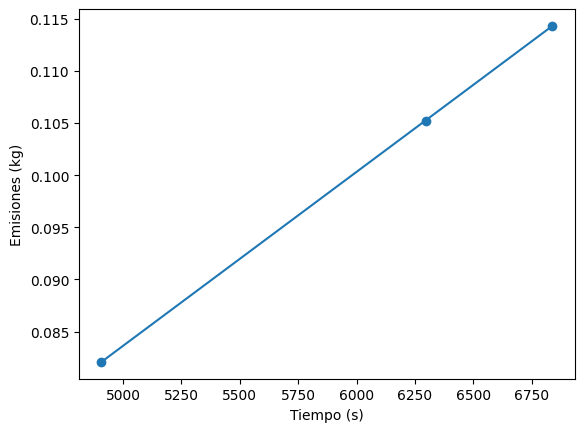

In [ ]:
# Cree una figura y un eje
fig, ax = plt.subplots()

# Dibuje un gráfico de las emisiones en función del tiempo
ax.plot(times, emissions_data, marker='o')

# Etiquete los ejes
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Emisiones (kg)')

# Muestre el gráfico
plt.show()

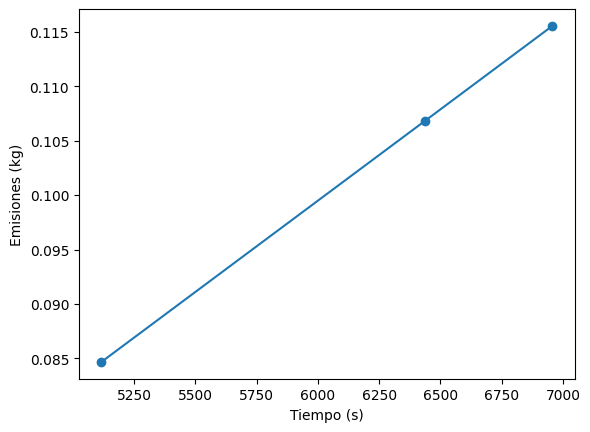

In [ ]:
# Cree una figura y un eje
fig, ax = plt.subplots()

# Dibuje un gráfico de las emisiones en función del tiempo
ax.plot(times, emissions_data, marker='o')

# Etiquete los ejes
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Emisiones (kg)')

# Muestre el gráfico
plt.show()

As in video it is processing by frames, the output of the feature vectors can varied, this depend of the number per frame in each video and the architecture used for the feature extraction, something like this:

- This is for video:
Features shape for key dia314_utt4: (38, 256)

- This is the dimension of the text modality for one video:
Features shape for key dia113_utt1: (768,)


To affornt this, one possible solution is get the average for all the frames en each utterance video

In [ ]:
import numpy as np

#example
def aggregate_video_features(video_features):
    return np.mean(video_features, axis=0)

# Sample video features for one utterance with shape (38, 256)
sample_video_features = np.random.rand(38, 256)

# Aggregate the features
aggregated_features = aggregate_video_features(sample_video_features)

# Now, aggregated_features will have a shape of (256,)
print(sample_video_features.shape)
print(aggregated_features.shape)


(38, 256)
(256,)


In [ ]:
import pickle
import numpy as np
import os

def aggregate_video_features(input_file_path, output_file_path):
    """
    Reads the pkl file, aggregates the feature vectors in each utterance to a single vector,
    and saves the new features in a new pkl file.
    """
    # Load the original features
    with open(input_file_path, 'rb') as f:
        original_features = pickle.load(f)

    # Initialize a dictionary to store the aggregated features
    aggregated_features = {}

    # Loop through each utterance to aggregate features
    for key, value in original_features.items():
        if value is not None and value['features'] is not None:
            # Aggregate the feature vectors to a single feature vector (e.g., by taking the mean)
            aggregated_features[key] = {
                'features': np.mean(value['features'], axis=0),
                'label': value['label']
            }

    # Save the aggregated features
    with open(output_file_path, 'wb') as f:
        pickle.dump(aggregated_features, f)

    print(f"Aggregated features saved to {output_file_path}")


def aggregate_and_save_sets(sets_path):
    """
    Function to aggregate features for multiple sets and save them.
    """
    # Loop through each set and aggregate features
    for set_file in sets_path:
        output_file_path = os.path.join(os.path.dirname(set_file), f"aggregated_{os.path.basename(set_file)}")
        aggregate_video_features(set_file, output_file_path)
        # Check the dimensions of the aggregated features to confirm that they are in the desired format
        with open(output_file_path, 'rb') as f:
            aggregated_data = pickle.load(f)
        aggregated_dimensions = check_aggregated_dimensions(aggregated_data)
        print(f"Final dimensions for {output_file_path}: {aggregated_dimensions}")


def check_aggregated_dimensions(aggregated_data):
    """
    Check the dimensions of the aggregated features to confirm that they are in the desired format.
    """
    dimensions_dict = {}
    for key, value in aggregated_data.items():
        if value and 'features' in value:
            dimensions_dict[key] = value['features'].shape
    return dimensions_dict

# Define your sets_path here, paths to your original feature files
sets_path = [
    "/content/datasets/vision_features/train_video_features.pkl",
    "/content/datasets/vision_features/dev_video_features.pkl",
    "/content/datasets/vision_features/test_video_features.pkl"
]

# Call the function to aggregate and save sets
aggregate_and_save_sets(sets_path)

Aggregated features saved to /content/datasets/vision_features/aggregated_train_video_features.pkl
Final dimensions for /content/datasets/vision_features/aggregated_train_video_features.pkl: {'dia407_utt8': (256,), 'dia349_utt6': (256,), 'dia808_utt0': (256,), 'dia733_utt10': (256,), 'dia44_utt2': (256,), 'dia145_utt16': (256,), 'dia171_utt3': (256,), 'dia918_utt9': (256,), 'dia671_utt2': (256,), 'dia89_utt0': (256,), 'dia6_utt0': (256,), 'dia782_utt6': (256,), 'dia296_utt13': (256,), 'dia181_utt2': (256,), 'dia154_utt4': (256,), 'dia64_utt1': (256,), 'dia58_utt4': (256,), 'dia673_utt13': (256,), 'dia169_utt0': (256,), 'dia943_utt5': (256,), 'dia648_utt3': (256,), 'dia124_utt11': (256,), 'dia895_utt7': (256,), 'dia704_utt2': (256,), 'dia177_utt0': (256,), 'dia442_utt3': (256,), 'dia909_utt7': (256,), 'dia525_utt0': (256,), 'dia260_utt1': (256,), 'dia837_utt2': (256,), 'dia256_utt15': (256,), 'dia237_utt3': (256,), 'dia104_utt0': (256,), 'dia590_utt13': (256,), 'dia727_utt3': (256,), 'd

In [ ]:
def load_and_check_dimensions(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)

    # Check dimensions for each utterance
    dimensions_dict = {}
    for key, value in data.items():
        if value is not None and value['features'] is not None:
            dimensions_dict[key] = value['features'].shape
        else:
            dimensions_dict[key] = 'None or Invalid Data'
    return dimensions_dict

# Check the dimensions for dev_video_features.pkl
dev_video_dimensions = load_and_check_dimensions('/content/datasets/vision_features/aggregated_train_video_features.pkl')
dev_video_dimensions

{'dia407_utt8': (256,),
 'dia349_utt6': (256,),
 'dia808_utt0': (256,),
 'dia733_utt10': (256,),
 'dia44_utt2': (256,),
 'dia145_utt16': (256,),
 'dia171_utt3': (256,),
 'dia918_utt9': (256,),
 'dia671_utt2': (256,),
 'dia89_utt0': (256,),
 'dia6_utt0': (256,),
 'dia782_utt6': (256,),
 'dia296_utt13': (256,),
 'dia181_utt2': (256,),
 'dia154_utt4': (256,),
 'dia64_utt1': (256,),
 'dia58_utt4': (256,),
 'dia673_utt13': (256,),
 'dia169_utt0': (256,),
 'dia943_utt5': (256,),
 'dia648_utt3': (256,),
 'dia124_utt11': (256,),
 'dia895_utt7': (256,),
 'dia704_utt2': (256,),
 'dia177_utt0': (256,),
 'dia442_utt3': (256,),
 'dia909_utt7': (256,),
 'dia525_utt0': (256,),
 'dia260_utt1': (256,),
 'dia837_utt2': (256,),
 'dia256_utt15': (256,),
 'dia237_utt3': (256,),
 'dia104_utt0': (256,),
 'dia590_utt13': (256,),
 'dia727_utt3': (256,),
 'dia782_utt1': (256,),
 'dia445_utt18': (256,),
 'dia872_utt0': (256,),
 'dia346_utt1': (256,),
 'dia190_utt2': (256,),
 'dia535_utt2': (256,),
 'dia1032_utt7

In [ ]:
# Function to correct the labels in the pickle files and save them back
def correct_and_save_labels_v2(file_path):
    # Load the data
    with open(file_path, 'rb') as f:
        data = pickle.load(f)

    # Initialize a dictionary to store the corrected data
    corrected_data = {}

    for key, value in data.items():
        # Convert the labels from object dtype to proper integer dtype
        labels_array = np.array(value['label'].tolist(), dtype=np.int32)

        corrected_data[key] = {
            'features': value['features'],
            'label': labels_array
        }

    # Save the corrected data back to the pickle file
    corrected_file_path = file_path.replace(".pkl", "_corrected.pkl")
    with open(corrected_file_path, 'wb') as f:
        pickle.dump(corrected_data, f)

    return corrected_file_path


files_to_correct = ["/content/datasets/vision_features/aggregated_train_video_features.pkl","/content/datasets/vision_features/aggregated_dev_video_features.pkl","/content/datasets/vision_features/aggregated_test_video_features.pkl"]
# Correct the labels in each pickle file and save the corrected file paths
corrected_files = [correct_and_save_labels_v2(file_path) for file_path in files_to_correct]



[codecarbon INFO @ 13:27:12] Energy consumed for RAM : 0.076850 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 13:27:12] Energy consumed for all GPUs : 0.181610 kWh. Total GPU Power : 29.13936748405212 W
[codecarbon INFO @ 13:27:13] Energy consumed for all CPUs : 0.170857 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:27:13] 0.429318 kWh of electricity used since the beginning.


In [ ]:
# Import necessary libraries for demonstration
from sklearn.metrics import average_precision_score, confusion_matrix, f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pickle

# Function to train and evaluate a simple classifier
def train_and_evaluate_classifier(features_path):
    with open(features_path, 'rb') as f:
        features = pickle.load(f)

    # Prepare data arrays
    X = np.array([x['features'] for x in features.values()])
    y = np.array([x['label'] for x in features.values()])

    # Split the dataset
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a One-vs-Rest logistic regression classifier
    classifier = OneVsRestClassifier(LogisticRegression(max_iter=5000, random_state=42))
    classifier.fit(X_train, y_train)

    # Predictions
    y_pred = classifier.predict(X_val)
    y_pred_single = np.argmax(y_pred, axis=1)
    y_val_single = np.argmax(y_val, axis=1)

    # Evaluation metrics
    f1_macro = f1_score(y_val_single, y_pred_single, average='macro')

    return f1_macro

# Test the classifier on corrected files
corrected_files = [
    "/content/datasets/vision_features/aggregated_train_video_features_corrected.pkl",
    "/content/datasets/vision_features/aggregated_dev_video_features_corrected.pkl",
    "/content/datasets/vision_features/aggregated_test_video_features_corrected.pkl"
]

# Container to store F1 Macro scores for each set
f1_scores = {}

# Evaluate and collect metrics
for idx, set_file in enumerate(corrected_files):
    f1_macro = train_and_evaluate_classifier(set_file)
    set_name = f"Set {idx + 1}"
    f1_scores[set_name] = f1_macro

f1_scores


{'Set 1': 0.21329702745631948,
 'Set 2': 0.1923076923076923,
 'Set 3': 0.21176470588235294}

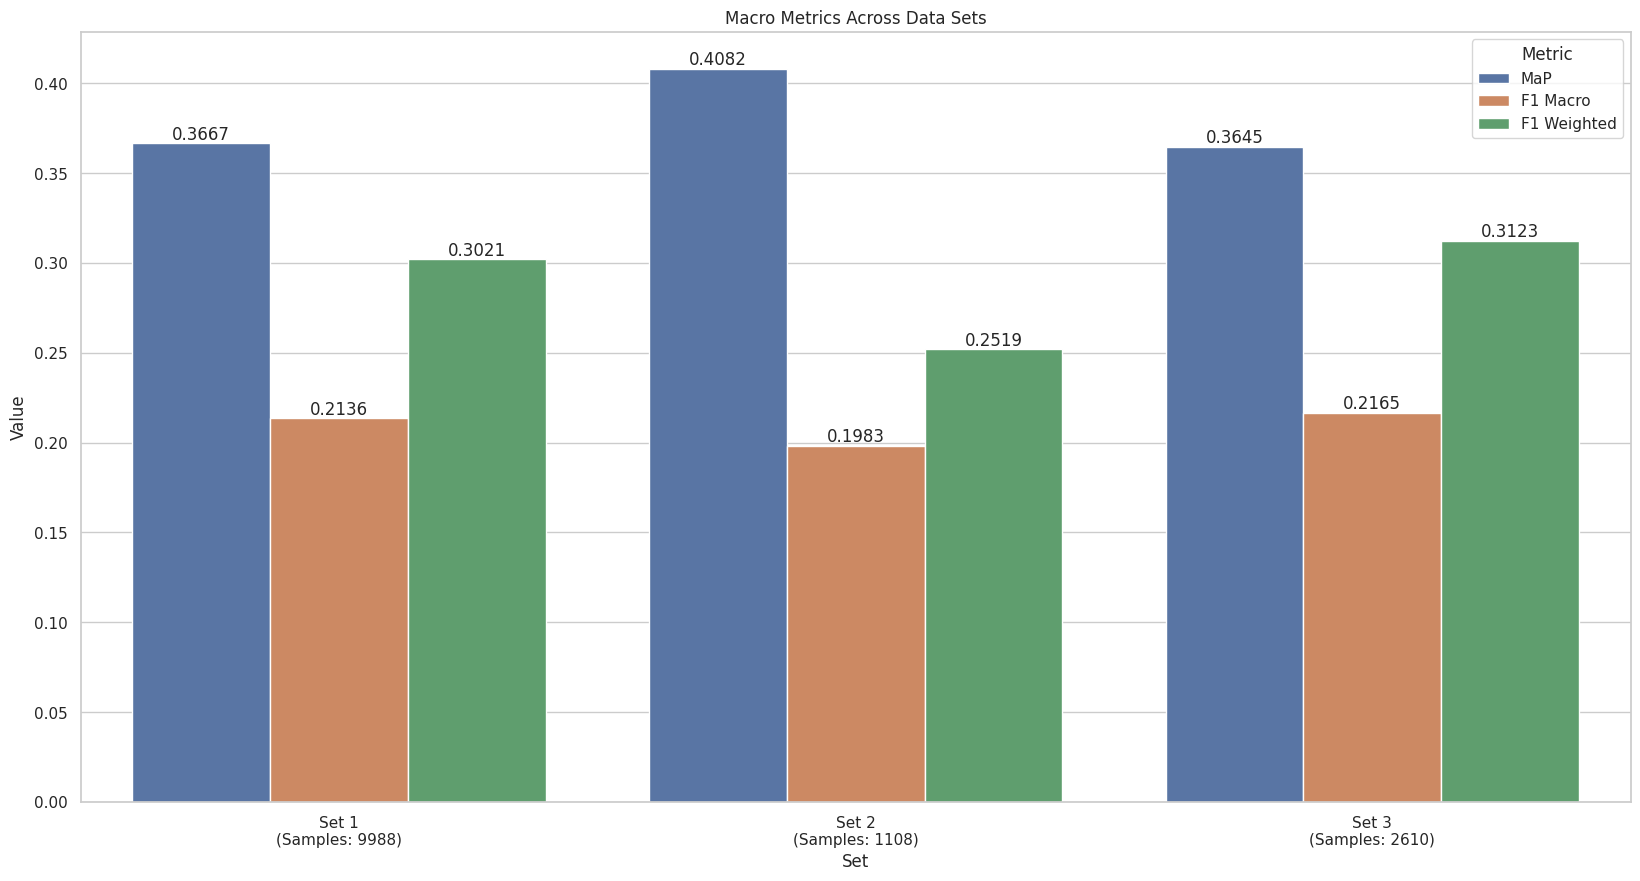

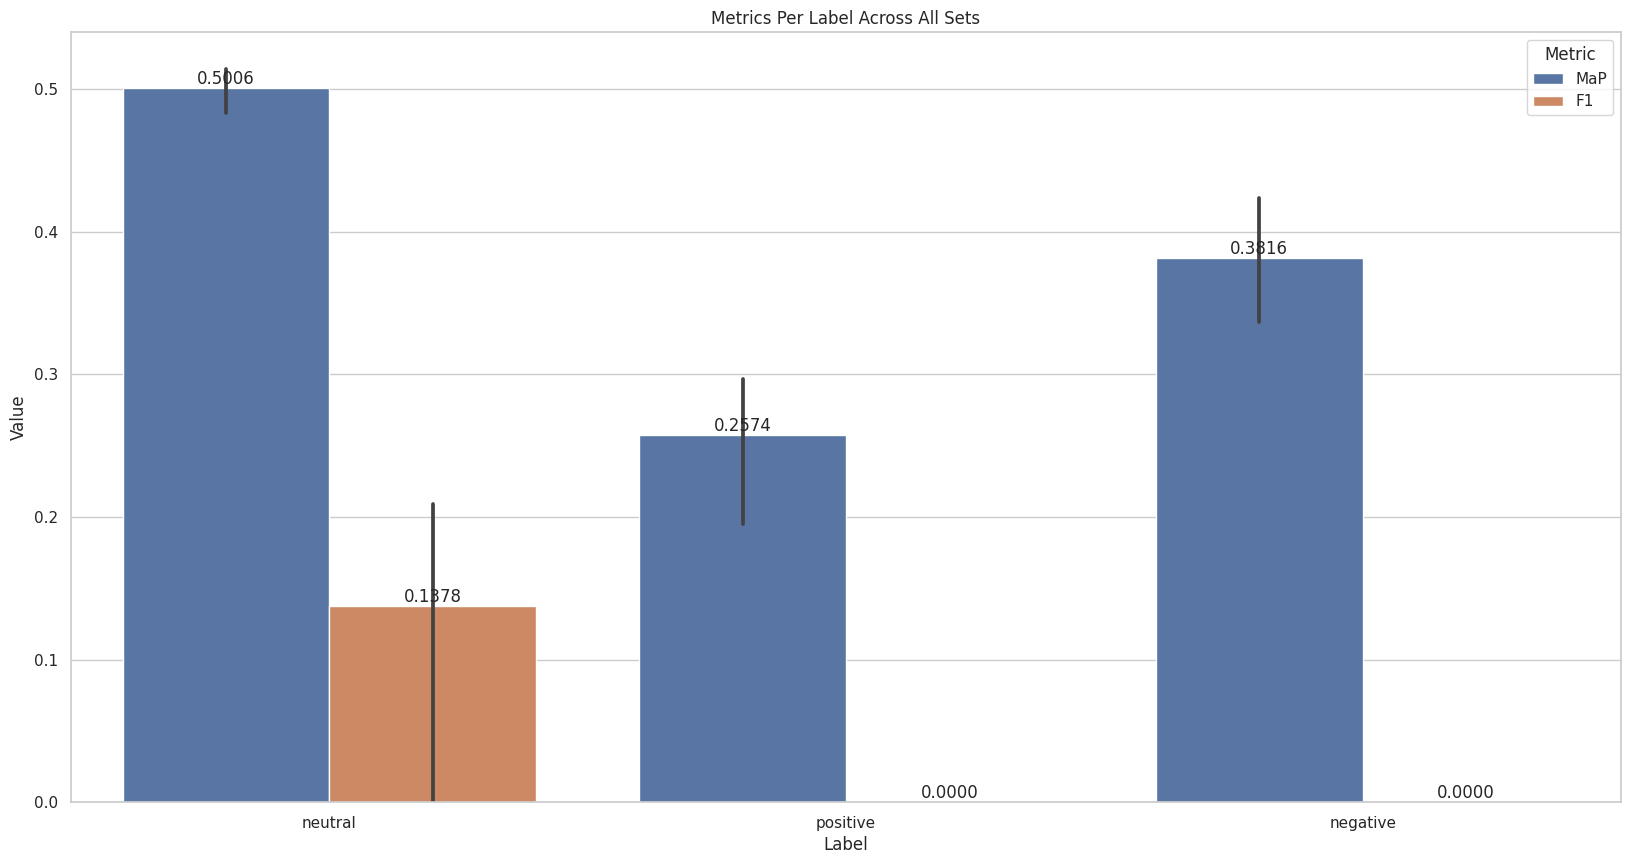

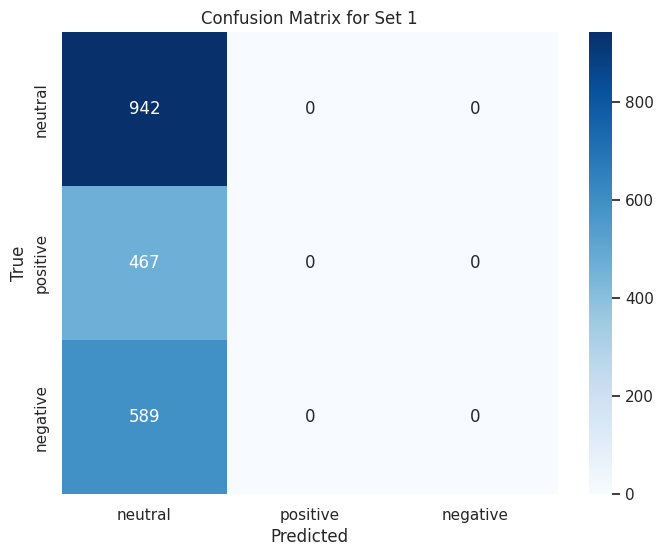

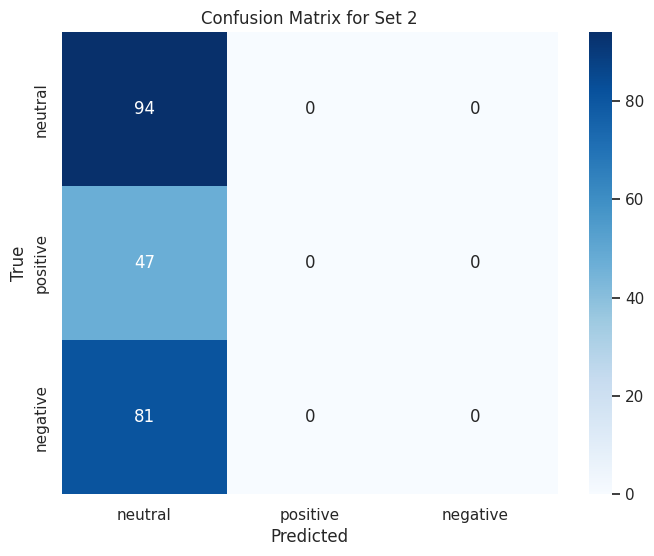

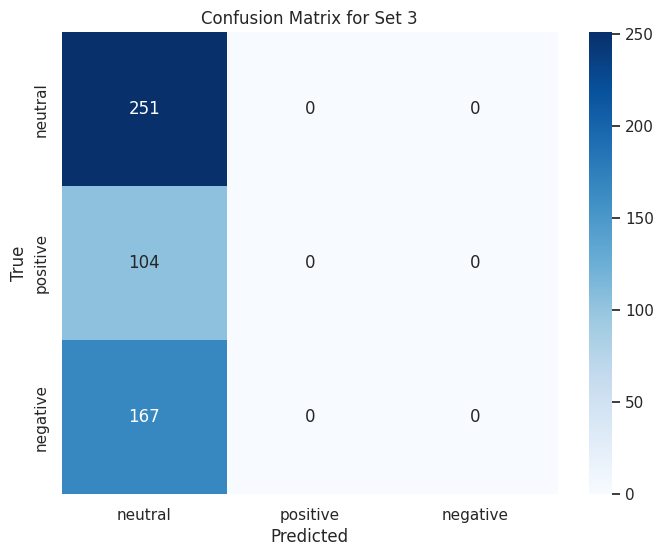

In [ ]:
from sklearn.metrics import average_precision_score, confusion_matrix, f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

def train_and_evaluate_classifier(features_path, class_names, test_size=0.2, max_iter=5000, random_state=42):
    with open(features_path, 'rb') as f:
        features = pickle.load(f)
    X = np.array([x['features'] for x in features.values()])
    y = np.array([x['label'] for x in features.values()])

    # Removed the conversion of y to simple labels; using one-hot encoding as-is
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, stratify=np.argmax(y, axis=1), random_state=random_state)

    classifier = OneVsRestClassifier(LogisticRegression(max_iter=max_iter, random_state=random_state))
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_val)
    y_score = classifier.decision_function(X_val)
    y_pred_single = np.argmax(y_pred, axis=1)
    y_val_single = np.argmax(y_val, axis=1)
    cm = confusion_matrix(y_val_single, y_pred_single)
    map_val = average_precision_score(y_val, y_score, average='macro')
    f1_macro = f1_score(y_val_single, y_pred_single, average='macro')
    f1_weighted = f1_score(y_val_single, y_pred_single, average='weighted')
    map_per_label = average_precision_score(y_val, y_score, average=None)
    f1_per_label = f1_score(y_val, y_pred, average=None)
    return map_val, f1_macro, f1_weighted, map_per_label, f1_per_label, len(X), cm

# Initialize containers
results_macro = []
results_per_label = []
confusion_matrices = {}
# Modified file paths to use corrected files
corrected_files = [
    "/content/datasets/vision_features/aggregated_train_video_features_corrected.pkl",
    "/content/datasets/vision_features/aggregated_dev_video_features_corrected.pkl",
    "/content/datasets/vision_features/aggregated_test_video_features_corrected.pkl"
]
class_names = ['neutral', 'positive', 'negative']

# Evaluate classifier and collect metrics
for idx, set_file in enumerate(corrected_files):
    map_val, f1_macro, f1_weighted, map_per_label, f1_per_label, sample_count, cm = train_and_evaluate_classifier(set_file, class_names)
    set_name = f"Set {idx + 1}"
    results_macro.append({
        'Set': set_name,
        'Sample Count': sample_count,
        'Metric': 'MaP',
        'Value': map_val
    })
    results_macro.append({
        'Set': set_name,
        'Sample Count': sample_count,
        'Metric': 'F1 Macro',
        'Value': f1_macro
    })
    results_macro.append({
        'Set': set_name,
        'Sample Count': sample_count,
        'Metric': 'F1 Weighted',
        'Value': f1_weighted
    })

    for label_idx, label_name in enumerate(class_names):
        results_per_label.append({
            'Set': set_name,
            'Label': label_name,
            'Metric': 'MaP',
            'Value': map_per_label[label_idx]
        })
        results_per_label.append({
            'Set': set_name,
            'Label': label_name,
            'Metric': 'F1',
            'Value': f1_per_label[label_idx]
        })

    confusion_matrices[set_name] = cm

# Plotting macro metrics
df_macro = pd.DataFrame(results_macro)
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.barplot(x='Set', y='Value', hue='Metric', data=df_macro)
plt.title('Macro Metrics Across Data Sets')

# Annotate bars with metric values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.4f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Annotate with sample count and update x-axis labels
new_labels = []
for idx, label in enumerate(df_macro['Set'].unique()):
    sample_count = df_macro[df_macro['Set'] == label]['Sample Count'].iloc[0]
    new_labels.append(f"{label}\n(Samples: {sample_count})")
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

plt.show()

# Plotting per-label metrics
df_per_label = pd.DataFrame(results_per_label)
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='Label', y='Value', hue='Metric', data=df_per_label)
plt.title('Metrics Per Label Across All Sets')

# Annotate bars with metric values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.4f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

# Plot confusion matrices
for set_name, cm in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {set_name}')
    plt.show()

In [ ]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# Read the Pickles
def read_pickle_file(file_path):
    with open(file_path, 'rb') as f:
        features = pickle.load(f)
    X = np.array([x['features'] for x in features.values()])
    y = np.array([x['label'] for x in features.values()])
    y_single = np.argmax(y, axis=1)  # Convert Labels to single integers for multiclass classification
    return X, y_single

# Read train, dev, and test data
X_train, y_train = read_pickle_file("/content/datasets/vision_features/aggregated_train_video_features_corrected.pkl")
X_dev, y_dev = read_pickle_file("/content/datasets/vision_features/aggregated_dev_video_features_corrected.pkl")
X_test, y_test = read_pickle_file("/content/datasets/vision_features/aggregated_test_video_features_corrected.pkl")

# Concatenate train and dev sets
X_train_full = np.concatenate((X_train, X_dev), axis=0)
y_train_full = np.concatenate((y_train, y_dev), axis=0)

# Lazy Predict
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_full, X_test, y_train_full, y_test)
print(models)


  0%|          | 0/29 [00:00<?, ?it/s][codecarbon INFO @ 14:05:43] Energy consumed for RAM : 0.089116 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 14:05:43] Energy consumed for all GPUs : 0.201866 kWh. Total GPU Power : 32.239271195141434 W
[codecarbon INFO @ 14:05:43] Energy consumed for all CPUs : 0.198124 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:05:43] 0.489106 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:05:58] Energy consumed for RAM : 0.089195 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 14:05:58] Energy consumed for all GPUs : 0.202002 kWh. Total GPU Power : 32.591339018200536 W
[codecarbon INFO @ 14:05:58] Energy consumed for all CPUs : 0.198301 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:05:58] 0.489499 kWh of electricity used since the beginning.
  3%|▎         | 1/29 [00:20<09:38, 20.67s/it][codecarbon INFO @ 14:06:13] Energy consumed for RAM : 0.089275 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 14:0

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65280
[LightGBM] [Info] Number of data points in the train set: 11096, number of used features: 256
[LightGBM] [Info] Start training from score -0.762166
[LightGBM] [Info] Start training from score -1.463847
[LightGBM] [Info] Start training from score -1.197326


100%|██████████| 29/29 [05:41<00:00, 11.77s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
GaussianNB                         0.36               0.36    None      0.35   
BernoulliNB                        0.44               0.35    None      0.39   
NearestCentroid                    0.32               0.35    None      0.32   
KNeighborsClassifier               0.39               0.35    None      0.38   
Perceptron                         0.38               0.35    None      0.38   
AdaBoostClassifier                 0.47               0.34    None      0.36   
DecisionTreeClassifier             0.38               0.34    None      0.38   
QuadraticDiscriminantAnalysis      0.38               0.34    None      0.37   
ExtraTreeClassifier                0.37               0.34    None      0.38   
PassiveAggressiveClassifier        0.37               0.34    None      0.38   
RidgeClassifierCV                  0.46 

In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(12 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(models, *['F1 Score'], **{})
chart

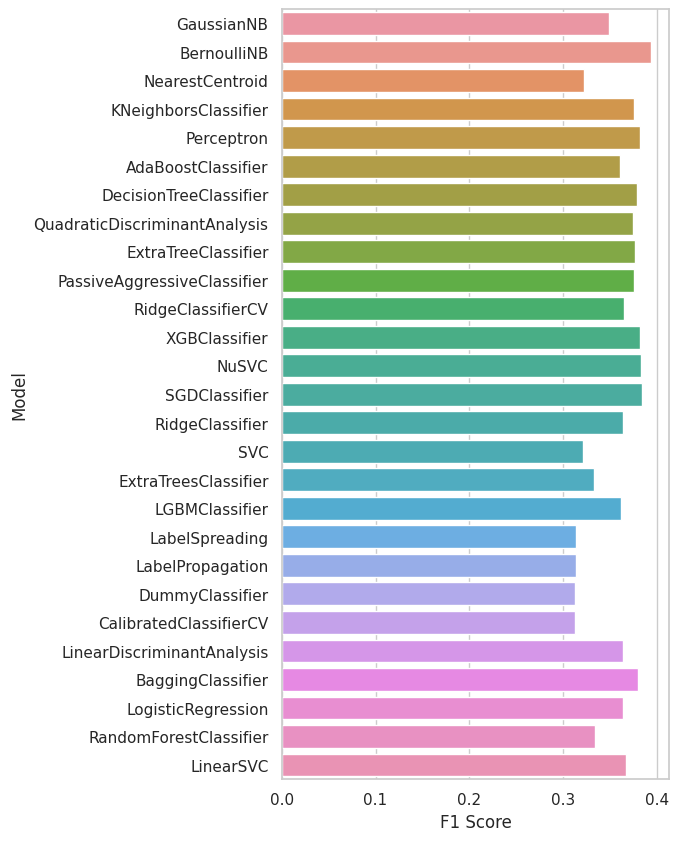

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="F1 Score", data=models)

## Version2

In [ ]:
# Importing necessary modules
import os
import time
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import resnet18
import cv2
from tqdm import tqdm
import pandas as pd
import pickle
from codecarbon import EmissionsTracker

class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        weights = F.softmax(self.fc(x), dim=1)
        weighted_sum = torch.sum(weights * x, dim=1)
        return weighted_sum

class VisionFeatureExtractor:
    def __init__(self, classification_type="Sentiment"):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = resnet18(pretrained=True).to(self.device)
        self.model = nn.Sequential(*(list(self.model.children())[:-1]))  # Removing the classification layer
        self.attention_layer = AttentionLayer(input_dim=512).to(self.device)  # Attention layer
        self.classification_type = classification_type

    def mapping_labels(self, df):
        mapping = {
            'Emotion': {
                'neutral': [1, 0, 0, 0, 0, 0, 0],
                'surprise': [0, 1, 0, 0, 0, 0, 0],
                'fear': [0, 0, 1, 0, 0, 0, 0],
                'sadness': [0, 0, 0, 1, 0, 0, 0],
                'joy': [0, 0, 0, 0, 1, 0, 0],
                'disgust': [0, 0, 0, 0, 0, 1, 0],
                'anger': [0, 0, 0, 0, 0, 0, 1],
            },
            'Sentiment': {
                'neutral': [1, 0, 0],
                'positive': [0, 1, 0],
                'negative': [0, 0, 1]
            }
        }
        label_column = f"{self.classification_type}_encoded"
        df[label_column] = df[self.classification_type].map(mapping[self.classification_type])
        return df

    def extract_and_save_features(self, video_folder_path, video_path_csv, set_name):
        df = pd.read_csv(video_path_csv)
        df['video_id'] = "dia" + df['Dialogue_ID'].astype(str) + '_utt' + df['Utterance_ID'].astype(str) + '.mp4'
        df = self.mapping_labels(df)

        video_feature_dict = {}
        video_files_to_process = [file for file in os.listdir(video_folder_path) if file in set(df['video_id'])]

        for video_file in tqdm(video_files_to_process):
            video_path = os.path.join(video_folder_path, video_file)
            video_features = self.extract_features_from_video(video_path)

            # Check for None features
            if video_features is None:
                print(f"Skipping {video_file} due to None features.")
                continue

            label = np.squeeze(df[df['video_id'] == video_file][f"{self.classification_type}_encoded"].values)

            # Check for None labels
            if label is None:
                print(f"Skipping {video_file} due to None label.")
                continue

            video_feature_dict[video_file.split('.')[0]] = {'features': video_features, 'label': label}
            torch.cuda.empty_cache()

        os.makedirs('./vision_features', exist_ok=True)
        with open(f'./vision_features/{set_name}_video_features.pkl', 'wb') as f:
            pickle.dump(video_feature_dict, f)

    def extract_features_from_video(self, video_path):
        cap = cv2.VideoCapture(video_path)
        frames = []
        aggregated_features = []

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.resize(frame, (224, 224))
            frames.append(frame)

        if len(frames) == 0:
            print(f"No frames extracted from {video_path}. Skipping.")
            return None

        cap.release()

        for frame in frames:
            frame_tensor = torch.tensor(np.array(frame)).float().unsqueeze(0).permute(0, 3, 1, 2).to(self.device)
            with torch.no_grad():
                features = self.model(frame_tensor).squeeze(-1).squeeze(-1)  # [1, 512]
                features = self.attention_layer(features)  # [512]
            aggregated_features.append(features.cpu().numpy())

        # Now safely average the features
        aggregated_features = np.mean(aggregated_features, axis=0)
        return aggregated_features






if __name__ == "__main__":
    print("🚀 Initializing Vision Feature Extraction for Sentiment Classification... 🚀")
    times = []
    emissions_data = []

    feature_extractor = VisionFeatureExtractor(classification_type="Sentiment")

    # Example dataset paths; Replace with actual paths
    dataset_paths = {
        'Train': ('/content/datasets/MELD/train_splits', '/content/datasets/MELD/train_sent_emo.csv'),
        'Test': ('/content/datasets/MELD/output_repeated_splits_test', '/content/datasets/MELD/test_sent_emo.csv'),
        'Dev': ('/content/datasets/MELD/dev_splits_complete', '/content/datasets/MELD/dev_sent_emo.csv')
    }

    for set_name, (video_folder, csv_path) in dataset_paths.items():
        tracker = EmissionsTracker(project_name=f"{set_name}_video_feature_extraction")
        start_time = time.time()
        tracker.start()

        feature_extractor.extract_and_save_features(video_folder, csv_path, set_name)

        current_time = time.time() - start_time
        total_emissions = tracker.stop()
        times.append(current_time)
        emissions_data.append(total_emissions)

        print(f"🔍 Total Emissions for {set_name}: {total_emissions} kg")
        print(f"⌛ Feature Extraction for {set_name} completed in {current_time:.2f} seconds ⌛")



🚀 Initializing Vision Feature Extraction for Sentiment Classification... 🚀


[codecarbon INFO @ 21:18:54] [setup] RAM Tracking...
[codecarbon INFO @ 21:18:54] [setup] GPU Tracking...
[codecarbon INFO @ 21:18:54] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 21:18:54] [setup] CPU Tracking...
[codecarbon WARNING @ 21:18:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 21:18:55] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon INFO @ 21:18:55] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 21:18:55] >>> Tracker's metadata:
[codecarbon INFO @ 21:18:55]   Platform system: Linux-5.15.120+-x86_64-with-glibc2.35
[codecarbon INFO @ 21:18:55]   Python version: 3.10.12
[codecarbon INFO @ 21:18:55]   CodeCarbon version: 2.3.1
[codecarbon INFO @ 21:18:55]   Available RAM : 50.997 GB
[codecarbon INFO @ 21:18:55]   CPU count: 8
[codecarbon INFO @ 21:18:55]   CPU model: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 21:18:55]   GPU

In [ ]:
# Cree una figura y un eje
fig, ax = plt.subplots()

# Dibuje un gráfico de las emisiones en función del tiempo
ax.plot(times, emissions_data, marker='o')

# Etiquete los ejes
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Emisiones (kg)')

# Muestre el gráfico
plt.show()

In [95]:
# Load the feature files
feature_paths = ["/content/datasets/vision_features/Train_video_features.pkl", "/content/datasets/vision_features/Test_video_features.pkl", "/content/datasets/vision_features/Dev_video_features.pkl"]
features_data = {}

# Load each set of features into the features_data dictionary
for path in feature_paths:
    with open(path, 'rb') as f:
        features_data[path] = pickle.load(f)

# Initialize an empty dictionary to hold the filtered features
filtered_features_data = {}

# Loop through each set and filter out entries where features are None
for path, features in features_data.items():
    X = [x['features'] for x in features.values() if x['features'] is not None]
    y = [x['label'] for x in features.values() if x['features'] is not None]

    # Store the filtered X and y in the dictionary
    filtered_features_data[path] = {'X': X, 'y': y}

# Show the length of the filtered features for each set
{path: {'X': len(data['X']), 'y': len(data['y'])} for path, data in filtered_features_data.items()}


{'/content/datasets/vision_features/Train_video_features.pkl': {'X': 9988,
  'y': 9988},
 '/content/datasets/vision_features/Test_video_features.pkl': {'X': 2610,
  'y': 2610},
 '/content/datasets/vision_features/Dev_video_features.pkl': {'X': 1108,
  'y': 1108}}

In [96]:
from sklearn.metrics import average_precision_score, confusion_matrix, f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

def train_and_evaluate_classifier(features_path, class_names, test_size=0.2, max_iter=5000, random_state=42):
    with open(features_path, 'rb') as f:
        features = pickle.load(f)
    X = np.array([x['features'] for x in features.values()])
    y = np.array([x['label'] for x in features.values()])
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, stratify=np.argmax(y, axis=1), random_state=random_state)
    classifier = OneVsRestClassifier(LogisticRegression(max_iter=max_iter, random_state=random_state))
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_val)
    y_score = classifier.decision_function(X_val)
    y_pred_single = np.argmax(y_pred, axis=1)
    y_val_single = np.argmax(y_val, axis=1)
    cm = confusion_matrix(y_val_single, y_pred_single)
    map_val = average_precision_score(y_val, y_score, average='macro')
    f1_macro = f1_score(y_val_single, y_pred_single, average='macro')
    f1_weighted = f1_score(y_val_single, y_pred_single, average='weighted')
    map_per_label = average_precision_score(y_val, y_score, average=None)
    f1_per_label = f1_score(y_val, y_pred, average=None)
    return map_val, f1_macro, f1_weighted, map_per_label, f1_per_label, len(X), cm

# Initialize containers
results_macro = []
results_per_label = []
confusion_matrices = {}
sets_path = ["/content/datasets/vision_features/Train_video_features.pkl", "/content/datasets/vision_features/Test_video_features.pkl", "/content/datasets/vision_features/Dev_video_features.pkl"]
class_names = ['neutral', 'positive', 'negative']

# Evaluate classifier and collect metrics
for idx, set_file in enumerate(sets_path):
    map_val, f1_macro, f1_weighted, map_per_label, f1_per_label, sample_count, cm = train_and_evaluate_classifier(set_file, class_names)
    set_name = f"Set {idx + 1}"
    results_macro.append({
        'Set': set_name,
        'Sample Count': sample_count,
        'Metric': 'MaP',
        'Value': map_val
    })
    results_macro.append({
        'Set': set_name,
        'Sample Count': sample_count,
        'Metric': 'F1 Macro',
        'Value': f1_macro
    })
    results_macro.append({
        'Set': set_name,
        'Sample Count': sample_count,
        'Metric': 'F1 Weighted',
        'Value': f1_weighted
    })

    for label_idx, label_name in enumerate(class_names):
        results_per_label.append({
            'Set': set_name,
            'Label': label_name,
            'Metric': 'MaP',
            'Value': map_per_label[label_idx]
        })
        results_per_label.append({
            'Set': set_name,
            'Label': label_name,
            'Metric': 'F1',
            'Value': f1_per_label[label_idx]
        })

    confusion_matrices[set_name] = cm

# Plotting macro metrics
df_macro = pd.DataFrame(results_macro)
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.barplot(x='Set', y='Value', hue='Metric', data=df_macro)
plt.title('Macro Metrics Across Data Sets')

# Annotate bars with metric values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.4f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Annotate with sample count and update x-axis labels
new_labels = []
for idx, label in enumerate(df_macro['Set'].unique()):
    sample_count = df_macro[df_macro['Set'] == label]['Sample Count'].iloc[0]
    new_labels.append(f"{label}\n(Samples: {sample_count})")
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

plt.show()

# Plotting per-label metrics
df_per_label = pd.DataFrame(results_per_label)
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='Label', y='Value', hue='Metric', data=df_per_label)
plt.title('Metrics Per Label Across All Sets')

# Annotate bars with metric values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.4f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

# Plot confusion matrices
for set_name, cm in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {set_name}')
    plt.show()


AxisError: ignored

## VERSION CROPPING FACE

In [ ]:
!pip install -q mediapipe

In [ ]:
import os
import time
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import resnet18
from tqdm import tqdm
import pandas as pd
import pickle
from codecarbon import EmissionsTracker
import mediapipe as mp


class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        weights = F.softmax(self.fc(x), dim=1)
        weighted_sum = torch.sum(weights * x, dim=1)
        return weighted_sum


class VisionFeatureExtractor:
    def __init__(self, classification_type="Sentiment"):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = resnet18(pretrained=True).to(self.device)
        self.model = nn.Sequential(*(list(self.model.children())[:-1]))  # Remove the classification layer
        self.attention_layer = AttentionLayer(input_dim=512).to(self.device)  # Attention layer
        self.classification_type = classification_type
        self.face_detection = mp.solutions.face_detection.FaceDetection(min_detection_confidence=0.5)

    def crop_face(self, frame):
        results = self.face_detection.process(frame)
        if results.detections:
            for detection in results.detections:
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, _ = frame.shape
                x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
                face = frame[y:y+h, x:x+w]
                return face
        return None

    def mapping_labels(self, df):
        mapping = {
            'Emotion': {
                'neutral': [1, 0, 0, 0, 0, 0, 0],
                'surprise': [0, 1, 0, 0, 0, 0, 0],
                'fear': [0, 0, 1, 0, 0, 0, 0],
                'sadness': [0, 0, 0, 1, 0, 0, 0],
                'joy': [0, 0, 0, 0, 1, 0, 0],
                'disgust': [0, 0, 0, 0, 0, 1, 0],
                'anger': [0, 0, 0, 0, 0, 0, 1],
            },
            'Sentiment': {
                'neutral': [1, 0, 0],
                'positive': [0, 1, 0],
                'negative': [0, 0, 1]
            }
        }
        label_column = f"{self.classification_type}_encoded"
        df[label_column] = df[self.classification_type].map(mapping[self.classification_type])
        return df

    def extract_and_save_features(self, video_folder_path, video_path_csv, set_name):
        df = pd.read_csv(video_path_csv)
        df['video_id'] = "dia" + df['Dialogue_ID'].astype(str) + '_utt' + df['Utterance_ID'].astype(str) + '.mp4'
        df = self.mapping_labels(df)

        video_feature_dict = {}
        video_files_to_process = [file for file in os.listdir(video_folder_path) if file in set(df['video_id'])]
        for video_file in tqdm(video_files_to_process):
            video_path = os.path.join(video_folder_path, video_file)
            video_features = self.extract_features_from_video(video_path)
            label = np.squeeze(df[df['video_id'] == video_file][f"{self.classification_type}_encoded"].values)
            video_feature_dict[video_file.split('.')[0]] = {'features': video_features, 'label': label}

        os.makedirs('./vision_features', exist_ok=True)
        with open(f'./vision_features/{set_name}_video_features.pkl', 'wb') as f:
            pickle.dump(video_feature_dict, f)

    def extract_features_from_video(self, video_path):
        cap = cv2.VideoCapture(video_path)
        frames = []
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            face = self.crop_face(frame)
            if face is not None:
                face = cv2.resize(face, (224, 224))
                frames.append(face)
        cap.release()

        frames_tensor = torch.tensor(np.array(frames)).float().permute(0, 3, 1, 2).to(self.device)
        with torch.no_grad():
            features = self.model(frames_tensor).squeeze(-1).squeeze(-1)  # [num_frames, 512]
            features = self.attention_layer(features)  # [512]

        return features.cpu().numpy()


if __name__ == "__main__":
    print("🚀 Initializing Vision Feature Extraction for Sentiment Classification... 🚀")
    times = []
    emissions_data = []

    feature_extractor = VisionFeatureExtractor(classification_type="Sentiment")

    dataset_paths = {
        'Train': ('/content/datasets/MELD/train_splits', '/content/datasets/MELD/train_sent_emo.csv'),
        'Test': ('/content/datasets/MELD/output_repeated_splits_test', '/content/datasets/MELD/test_sent_emo.csv'),
        'Dev': ('/content/datasets/MELD/dev_sent_emo.csv', '/content/datasets/MELD/dev_sent_emo.csv')
    }

    for set_name, (video_folder, csv_path) in dataset_paths.items():
        tracker = EmissionsTracker(project_name=f"{set_name}_video_feature_extraction")
        start_time = time.time()
        tracker.start()

        feature_extractor.extract_and_save_features(video_folder, csv_path, set_name)

        current_time = time.time() - start_time
        total_emissions = tracker.stop()
        times.append(current_time)
        emissions_data.append(total_emissions)

        print(f"🔍 Total Emissions for {set_name}: {total_emissions} kg")
        print(f"⌛ Feature Extraction for {set_name} completed in {current_time:.2f} seconds ⌛")



[codecarbon INFO @ 03:13:42] [setup] RAM Tracking...
[codecarbon INFO @ 03:13:42] [setup] GPU Tracking...
[codecarbon INFO @ 03:13:42] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 03:13:42] [setup] CPU Tracking...
[codecarbon WARNING @ 03:13:42] No CPU tracking mode found. Falling back on CPU constant mode.


🚀 Initializing Text Feature Extraction for Emotion Classification... 🚀


[codecarbon WARNING @ 03:13:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 03:13:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 03:13:43] >>> Tracker's metadata:
[codecarbon INFO @ 03:13:43]   Platform system: Linux-5.15.120+-x86_64-with-glibc2.35
[codecarbon INFO @ 03:13:43]   Python version: 3.10.12
[codecarbon INFO @ 03:13:43]   CodeCarbon version: 2.3.1
[codecarbon INFO @ 03:13:43]   Available RAM : 50.997 GB
[codecarbon INFO @ 03:13:43]   CPU count: 8
[codecarbon INFO @ 03:13:43]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 03:13:43]   GPU count: 1
[codecarbon INFO @ 03:13:43]   GPU model: 1 x Tesla V100-SXM2-16GB
[codecarbon INFO @ 03:13:43] Energy consumed for RAM : 0.011149 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:13:43] Energy consumed for all GPUs : 0.024394 kWh. Total GPU Power : 41.492539118536776 W
[codecarbon INFO @ 03:1

Head of DataFrame for train set:
   Sr No.                                          Utterance          Speaker  \
0       1  also I was the point person on my companys tr...         Chandler   
1       2                   You mustve had your hands full.  The Interviewer   
2       3                            That I did. That I did.         Chandler   

   Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  Episode  \
0  neutral   neutral            0             0       8       21   
1  neutral   neutral            0             1       8       21   
2  neutral   neutral            0             2       8       21   

      StartTime       EndTime       video_id  
0  00:16:16,059  00:16:21,731  dia0_utt0.mp4  
1  00:16:21,940  00:16:23,442  dia0_utt1.mp4  
2  00:16:23,442  00:16:26,389  dia0_utt2.mp4  
Entering into the extractor


[codecarbon INFO @ 03:13:49] Energy consumed for RAM : 0.003185 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:13:49] Energy consumed for all GPUs : 0.006950 kWh. Total GPU Power : 41.508062132219365 W
[codecarbon INFO @ 03:13:49] Energy consumed for all CPUs : 0.007083 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:13:49] 0.017218 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:13:52] Energy consumed for RAM : 0.006053 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:13:52] Energy consumed for all GPUs : 0.013246 kWh. Total GPU Power : 41.509819154369296 W
[codecarbon INFO @ 03:13:52] Energy consumed for all CPUs : 0.013458 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:13:52] 0.032757 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:13:52] Energy consumed for RAM : 0.010115 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:13:52] Energy consumed for all GPUs : 0.022147 kWh. Total GPU Power : 41.510401029890

======['dia407_utt8.mp4', 'dia349_utt6.mp4', 'dia808_utt0.mp4', 'dia733_utt10.mp4', 'dia44_utt2.mp4', 'dia145_utt16.mp4', 'dia171_utt3.mp4', 'dia918_utt9.mp4', 'dia671_utt2.mp4', 'dia89_utt0.mp4', 'dia6_utt0.mp4', 'dia782_utt6.mp4', 'dia296_utt13.mp4', 'dia181_utt2.mp4', 'dia154_utt4.mp4', 'dia64_utt1.mp4', 'dia58_utt4.mp4', 'dia673_utt13.mp4', 'dia169_utt0.mp4', 'dia943_utt5.mp4', 'dia648_utt3.mp4', 'dia124_utt11.mp4', 'dia895_utt7.mp4', 'dia704_utt2.mp4', 'dia177_utt0.mp4', 'dia442_utt3.mp4', 'dia909_utt7.mp4', 'dia525_utt0.mp4', 'dia260_utt1.mp4', 'dia837_utt2.mp4', 'dia256_utt15.mp4', 'dia237_utt3.mp4', 'dia104_utt0.mp4', 'dia590_utt13.mp4', 'dia727_utt3.mp4', 'dia782_utt1.mp4', 'dia445_utt18.mp4', 'dia872_utt0.mp4', 'dia346_utt1.mp4', 'dia190_utt2.mp4', 'dia535_utt2.mp4', 'dia1032_utt7.mp4', 'dia639_utt4.mp4', 'dia165_utt16.mp4', 'dia739_utt3.mp4', 'dia841_utt9.mp4', 'dia665_utt7.mp4', 'dia463_utt13.mp4', 'dia866_utt10.mp4', 'dia145_utt15.mp4', 'dia689_utt12.mp4', 'dia389_utt9.mp4

  0%|          | 1/9989 [00:00<2:18:34,  1.20it/s]

Failed to process video dia407_utt8.mp4: mat1 and mat2 shapes cannot be multiplied (31x26600 and 5376x256)


  0%|          | 2/9989 [00:01<1:58:27,  1.41it/s]

Failed to process video dia349_utt6.mp4: mat1 and mat2 shapes cannot be multiplied (29x26600 and 5376x256)


[codecarbon INFO @ 03:13:58] Energy consumed for RAM : 0.011229 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:13:58] Energy consumed for all GPUs : 0.024607 kWh. Total GPU Power : 51.08791317450113 W
[codecarbon INFO @ 03:13:58] Energy consumed for all CPUs : 0.024965 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:13:58] 0.060800 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:13:58] Energy consumed for RAM : 0.000080 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:13:58] Energy consumed for all GPUs : 0.000222 kWh. Total GPU Power : 53.24629337201435 W
[codecarbon INFO @ 03:13:58] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:13:58] 0.000479 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:13:59] Energy consumed for RAM : 0.008840 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:13:59] Energy consumed for all GPUs : 0.019429 kWh. Total GPU Power : 56.76105691709907

Failed to process video dia808_utt0.mp4: mat1 and mat2 shapes cannot be multiplied (59x26600 and 5376x256)


  0%|          | 4/9989 [00:03<2:45:03,  1.01it/s]

Failed to process video dia733_utt10.mp4: mat1 and mat2 shapes cannot be multiplied (51x26600 and 5376x256)


  0%|          | 5/9989 [00:04<2:05:11,  1.33it/s][codecarbon INFO @ 03:14:00] Energy consumed for RAM : 0.012183 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:00] Energy consumed for all GPUs : 0.026756 kWh. Total GPU Power : 68.7132067950726 W
[codecarbon INFO @ 03:14:00] Energy consumed for all CPUs : 0.027089 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:00] 0.066029 kWh of electricity used since the beginning.


Failed to process video dia44_utt2.mp4: mat1 and mat2 shapes cannot be multiplied (14x26600 and 5376x256)


[codecarbon INFO @ 03:14:00] Energy consumed for RAM : 0.004539 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:00] Energy consumed for all GPUs : 0.010035 kWh. Total GPU Power : 68.98270222714632 W
[codecarbon INFO @ 03:14:00] Energy consumed for all CPUs : 0.010093 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:00] 0.024667 kWh of electricity used since the beginning.
  0%|          | 6/9989 [00:04<2:01:52,  1.37it/s]

Failed to process video dia145_utt16.mp4: mat1 and mat2 shapes cannot be multiplied (32x26600 and 5376x256)


[codecarbon INFO @ 03:14:03] Energy consumed for RAM : 0.003265 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:03] Energy consumed for all GPUs : 0.007303 kWh. Total GPU Power : 85.41845392408283 W
[codecarbon INFO @ 03:14:03] Energy consumed for all CPUs : 0.007259 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:03] 0.017826 kWh of electricity used since the beginning.
  0%|          | 7/9989 [00:08<5:07:42,  1.85s/it]

Failed to process video dia171_utt3.mp4: mat1 and mat2 shapes cannot be multiplied (193x26600 and 5376x256)


  0%|          | 8/9989 [00:09<4:04:00,  1.47s/it]

Failed to process video dia918_utt9.mp4: mat1 and mat2 shapes cannot be multiplied (29x26600 and 5376x256)


[codecarbon INFO @ 03:14:07] Energy consumed for RAM : 0.006132 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:07] Energy consumed for all GPUs : 0.013700 kWh. Total GPU Power : 110.12890799494363 W
[codecarbon INFO @ 03:14:07] Energy consumed for all CPUs : 0.013633 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:07] 0.033465 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:14:07] Energy consumed for RAM : 0.010194 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:07] Energy consumed for all GPUs : 0.022608 kWh. Total GPU Power : 111.65309078854007 W
[codecarbon INFO @ 03:14:07] Energy consumed for all CPUs : 0.022664 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:07] 0.055466 kWh of electricity used since the beginning.
  0%|          | 9/9989 [00:11<4:39:33,  1.68s/it]

Failed to process video dia671_utt2.mp4: mat1 and mat2 shapes cannot be multiplied (99x26600 and 5376x256)


[codecarbon INFO @ 03:14:09] Energy consumed for RAM : 0.002071 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:09] Energy consumed for all GPUs : 0.004842 kWh. Total GPU Power : 125.08801160021504 W
[codecarbon INFO @ 03:14:09] Energy consumed for all CPUs : 0.004604 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:09] 0.011517 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:14:09] Energy consumed for RAM : 0.014654 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:09] Energy consumed for all GPUs : 0.032352 kWh. Total GPU Power : 125.83491564492414 W
[codecarbon INFO @ 03:14:09] Energy consumed for all CPUs : 0.032579 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:09] 0.079585 kWh of electricity used since the beginning.
  0%|          | 10/9989 [00:15<6:21:04,  2.29s/it]

Failed to process video dia89_utt0.mp4: mat1 and mat2 shapes cannot be multiplied (172x26600 and 5376x256)


  0%|          | 11/9989 [00:16<5:42:25,  2.06s/it][codecarbon INFO @ 03:14:13] Energy consumed for RAM : 0.011308 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:13] Energy consumed for all GPUs : 0.025240 kWh. Total GPU Power : 152.0857793883246 W
[codecarbon INFO @ 03:14:13] Energy consumed for all CPUs : 0.025142 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:13] 0.061691 kWh of electricity used since the beginning.


Failed to process video dia6_utt0.mp4: mat1 and mat2 shapes cannot be multiplied (77x26600 and 5376x256)


[codecarbon INFO @ 03:14:13] Energy consumed for RAM : 0.000159 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:13] Energy consumed for all GPUs : 0.000847 kWh. Total GPU Power : 150.12232007431257 W
[codecarbon INFO @ 03:14:13] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:13] 0.001361 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:14:14] Energy consumed for RAM : 0.008920 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:14] Energy consumed for all GPUs : 0.020045 kWh. Total GPU Power : 147.84404395953558 W
[codecarbon INFO @ 03:14:14] Energy consumed for all CPUs : 0.019830 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:14] 0.048795 kWh of electricity used since the beginning.
  0%|          | 12/9989 [00:18<4:59:51,  1.80s/it]

Failed to process video dia782_utt6.mp4: mat1 and mat2 shapes cannot be multiplied (60x26600 and 5376x256)


  0%|          | 13/9989 [00:18<4:00:12,  1.44s/it]

Failed to process video dia296_utt13.mp4: mat1 and mat2 shapes cannot be multiplied (29x26600 and 5376x256)


[codecarbon INFO @ 03:14:15] Energy consumed for RAM : 0.012263 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:15] Energy consumed for all GPUs : 0.027377 kWh. Total GPU Power : 148.93543416586672 W
[codecarbon INFO @ 03:14:15] Energy consumed for all CPUs : 0.027266 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:15] 0.066906 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:14:15] Energy consumed for RAM : 0.004619 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:15] Energy consumed for all GPUs : 0.010655 kWh. Total GPU Power : 148.83741547244213 W
[codecarbon INFO @ 03:14:15] Energy consumed for all CPUs : 0.010270 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:15] 0.025544 kWh of electricity used since the beginning.
  0%|          | 14/9989 [00:21<5:27:12,  1.97s/it]

Failed to process video dia181_utt2.mp4: mat1 and mat2 shapes cannot be multiplied (161x26600 and 5376x256)


[codecarbon INFO @ 03:14:18] Energy consumed for RAM : 0.003344 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:18] Energy consumed for all GPUs : 0.007962 kWh. Total GPU Power : 158.34924150519916 W
[codecarbon INFO @ 03:14:18] Energy consumed for all CPUs : 0.007436 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:18] 0.018743 kWh of electricity used since the beginning.
  0%|          | 15/9989 [00:23<4:59:33,  1.80s/it]

Failed to process video dia154_utt4.mp4: mat1 and mat2 shapes cannot be multiplied (67x26600 and 5376x256)


  0%|          | 16/9989 [00:23<3:48:23,  1.37s/it]

Failed to process video dia64_utt1.mp4: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[codecarbon INFO @ 03:14:22] Energy consumed for RAM : 0.006212 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:22] Energy consumed for all GPUs : 0.014339 kWh. Total GPU Power : 153.44073355173384 W
[codecarbon INFO @ 03:14:22] Energy consumed for all CPUs : 0.013810 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:22] 0.034361 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:14:22] Energy consumed for RAM : 0.010274 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:22] Energy consumed for all GPUs : 0.023251 kWh. Total GPU Power : 154.2641493095459 W
[codecarbon INFO @ 03:14:22] Energy consumed for all CPUs : 0.022841 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:22] 0.056365 kWh of electricity used since the beginning.
  0%|          | 17/9989 [00:26<5:05:19,  1.84s/it]

Failed to process video dia58_utt4.mp4: mat1 and mat2 shapes cannot be multiplied (139x26600 and 5376x256)


  0%|          | 18/9989 [00:27<4:26:02,  1.60s/it]

Failed to process video dia673_utt13.mp4: mat1 and mat2 shapes cannot be multiplied (48x26600 and 5376x256)


[codecarbon INFO @ 03:14:24] Energy consumed for RAM : 0.002150 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:24] Energy consumed for all GPUs : 0.005508 kWh. Total GPU Power : 159.78138565947893 W
[codecarbon INFO @ 03:14:24] Energy consumed for all CPUs : 0.004781 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:24] 0.012438 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:14:24] Energy consumed for RAM : 0.014734 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:24] Energy consumed for all GPUs : 0.033025 kWh. Total GPU Power : 161.5327108434285 W
[codecarbon INFO @ 03:14:24] Energy consumed for all CPUs : 0.032756 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:24] 0.080514 kWh of electricity used since the beginning.
  0%|          | 19/9989 [00:28<3:45:12,  1.36s/it]

Failed to process video dia169_utt0.mp4: mat1 and mat2 shapes cannot be multiplied (36x26600 and 5376x256)


  0%|          | 20/9989 [00:29<3:27:25,  1.25s/it]

Failed to process video dia943_utt5.mp4: mat1 and mat2 shapes cannot be multiplied (49x26600 and 5376x256)


  0%|          | 21/9989 [00:30<3:29:01,  1.26s/it]

Failed to process video dia648_utt3.mp4: mat1 and mat2 shapes cannot be multiplied (62x26600 and 5376x256)


[codecarbon INFO @ 03:14:28] Energy consumed for RAM : 0.011388 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:28] Energy consumed for all GPUs : 0.025856 kWh. Total GPU Power : 147.85736496399306 W
[codecarbon INFO @ 03:14:28] Energy consumed for all CPUs : 0.025319 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:28] 0.062563 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:14:28] Energy consumed for RAM : 0.000239 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:28] Energy consumed for all GPUs : 0.001465 kWh. Total GPU Power : 148.32086402458842 W
[codecarbon INFO @ 03:14:28] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:28] 0.002235 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:14:29] Energy consumed for RAM : 0.008999 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:29] Energy consumed for all GPUs : 0.020665 kWh. Total GPU Power : 148.97636103157

Failed to process video dia124_utt11.mp4: mat1 and mat2 shapes cannot be multiplied (174x26600 and 5376x256)


  0%|          | 23/9989 [00:36<5:39:37,  2.04s/it]

Failed to process video dia895_utt7.mp4: mat1 and mat2 shapes cannot be multiplied (91x26600 and 5376x256)


[codecarbon INFO @ 03:14:33] Energy consumed for RAM : 0.003424 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:33] Energy consumed for all GPUs : 0.008582 kWh. Total GPU Power : 148.66553054897983 W
[codecarbon INFO @ 03:14:33] Energy consumed for all CPUs : 0.007613 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:33] 0.019619 kWh of electricity used since the beginning.
  0%|          | 24/9989 [00:39<6:25:03,  2.32s/it]

Failed to process video dia704_utt2.mp4: mat1 and mat2 shapes cannot be multiplied (126x26600 and 5376x256)


[codecarbon INFO @ 03:14:37] Energy consumed for RAM : 0.006291 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:37] Energy consumed for all GPUs : 0.014985 kWh. Total GPU Power : 155.07029257902863 W
  0%|          | 25/9989 [00:40<5:16:34,  1.91s/it][codecarbon INFO @ 03:14:37] Energy consumed for all CPUs : 0.013987 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:37] 0.035263 kWh of electricity used since the beginning.


Failed to process video dia177_utt0.mp4: mat1 and mat2 shapes cannot be multiplied (40x26600 and 5376x256)


[codecarbon INFO @ 03:14:37] Energy consumed for RAM : 0.010353 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:37] Energy consumed for all GPUs : 0.023887 kWh. Total GPU Power : 152.6613766985297 W
[codecarbon INFO @ 03:14:37] Energy consumed for all CPUs : 0.023018 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:37] 0.057257 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:14:39] Energy consumed for RAM : 0.002230 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:39] Energy consumed for all GPUs : 0.006130 kWh. Total GPU Power : 149.51742240561805 W
[codecarbon INFO @ 03:14:39] Energy consumed for all CPUs : 0.004958 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:39] 0.013318 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:14:39] Energy consumed for RAM : 0.014813 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:39] Energy consumed for all GPUs : 0.033652 kWh. Total GPU Power : 150.605769771384

Failed to process video dia442_utt3.mp4: mat1 and mat2 shapes cannot be multiplied (138x26600 and 5376x256)


  0%|          | 27/9989 [00:43<4:32:14,  1.64s/it]

Failed to process video dia909_utt7.mp4: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



  0%|          | 28/9989 [00:44<3:34:47,  1.29s/it]

Failed to process video dia525_utt0.mp4: mat1 and mat2 shapes cannot be multiplied (22x26600 and 5376x256)


  0%|          | 29/9989 [00:45<3:30:05,  1.27s/it]

Failed to process video dia260_utt1.mp4: mat1 and mat2 shapes cannot be multiplied (59x26600 and 5376x256)


  0%|          | 30/9989 [00:46<3:28:06,  1.25s/it]

Failed to process video dia837_utt2.mp4: mat1 and mat2 shapes cannot be multiplied (59x26600 and 5376x256)


[codecarbon INFO @ 03:14:43] Energy consumed for RAM : 0.011468 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:43] Energy consumed for all GPUs : 0.026492 kWh. Total GPU Power : 152.74011213931442 W
[codecarbon INFO @ 03:14:43] Energy consumed for all CPUs : 0.025496 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:43] 0.063456 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:14:43] Energy consumed for RAM : 0.000319 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:43] Energy consumed for all GPUs : 0.002103 kWh. Total GPU Power : 153.08046854272942 W
[codecarbon INFO @ 03:14:43] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:43] 0.003129 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:14:44] Energy consumed for RAM : 0.009079 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:44] Energy consumed for all GPUs : 0.021309 kWh. Total GPU Power : 154.59588215638

Failed to process video dia256_utt15.mp4: mat1 and mat2 shapes cannot be multiplied (53x26600 and 5376x256)


[codecarbon INFO @ 03:14:45] Energy consumed for RAM : 0.012422 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:45] Energy consumed for all GPUs : 0.028620 kWh. Total GPU Power : 142.38308430185953 W
[codecarbon INFO @ 03:14:45] Energy consumed for all CPUs : 0.027620 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:45] 0.068662 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:14:45] Energy consumed for RAM : 0.004778 kWh. RAM Power : 19.12397575378418 W
[codecarbon INFO @ 03:14:45] Energy consumed for all GPUs : 0.011906 kWh. Total GPU Power : 142.59363588714024 W
[codecarbon INFO @ 03:14:45] Energy consumed for all CPUs : 0.010624 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:14:45] 0.027308 kWh of electricity used since the beginning.
  0%|          | 31/9989 [00:50<4:28:30,  1.62s/it]


KeyboardInterrupt: ignored

## Alignment of modalities

In [ ]:
videos_with_problem = ["dia125_utt3"]

## Classifier

In [ ]:
import numpy as np
import logging
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, multilabel_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier

# Configure logging
logging.basicConfig(level=logging.INFO)

def load_features(filename):
    data = np.load(filename, allow_pickle=True).item()

    # Determine the maximum shape along each dimension
    max_shape = np.max([item['features'].shape for item in data.values()], axis=0)

    # Pad each feature array to have the max_shape, then flatten it
    padded_features = [
        np.pad(item['features'], ((0, max_shape[0] - item['features'].shape[0]),
                                  (0, max_shape[1] - item['features'].shape[1])))
        .flatten() for item in data.values()
    ]

    # Now, padded_features should be a list of 1D arrays of the same length
    # Stack them into a 2D array
    X = np.vstack(padded_features)
    y = np.array([item['label'] for item in data.values()])

    return X, y

def evaluate_classifiers(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Wrap classifiers with OneVsRestClassifier for multi-label classification
    classifiers = {
        'Random Forest': OneVsRestClassifier(RandomForestClassifier(n_jobs=-1)),
        'SVM': OneVsRestClassifier(SVC()),
        'Logistic Regression': OneVsRestClassifier(LogisticRegression(max_iter=1000, n_jobs=-1)),
        'XGBoost': OneVsRestClassifier(xgb.XGBClassifier(n_jobs=-1))
    }

    for name, clf in classifiers.items():
        start_time = time.time()
        logging.info(f"Training {name}...")
        clf.fit(X_train, y_train)
        logging.info(f"Trained {name} in {time.time() - start_time:.2f} seconds")

        preds = clf.predict(X_test)
        print(f'{name} - Accuracy: {accuracy_score(y_test, preds)*100:.2f}%, '
              f'F1 Score: {f1_score(y_test, preds, average="weighted")*100:.2f}%')

if __name__ == "__main__":
    filename = 'train'  # Adjust the filename to match the output from your feature extraction script
    X, y = load_features('/content/datasets/train_video_features.npy')
    evaluate_classifiers(X, y)


In [ ]:
data = np.load('/content/datasets/train_video_features.npy', allow_pickle=True).item()

# Multimodal System

1. Early Fusion for Intra-Modality in Vision Features:
For each video, you've concatenated features from multiple architectures (ResNet, VGG16, ViT). Now, you can feed these concatenated features into a BLSTM layer to capture the temporal relations between frames.

In [ ]:
import torch
import torch.nn as nn

class EarlyFusionBLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(EarlyFusionBLSTM, self).__init__()
        self.blstm = nn.LSTM(input_dim, hidden_dim, bidirectional=True)

    def forward(self, x):
        out, _ = self.blstm(x)
        return out




2. Model-Specific Layers:
After the BLSTM, you can add one or more fully connected layers specific to the vision modality. Do the same for audio and text features.

In [ ]:
class ModalitySpecificLayers(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ModalitySpecificLayers, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.fc(x)

3.You can concatenate or use a weighted sum of the outputs from the modality-specific layers. Another option is to use attention mechanisms to dynamically weigh the importance of each modality.

In [ ]:
class LateFusionLayer(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LateFusionLayer, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.fc(x)

4. Final Layers for Prediction:
Finally, you can have one or more layers to output the emotion classes.

In [ ]:
class EmotionClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(EmotionClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

Combining All:
You can then combine these components into a single model that takes the vision, audio, and text features as inputs and outputs the emotion class probabilities.

In [ ]:
class MultimodalEmotionClassifier(nn.Module):
    def __init__(self):
        super(MultimodalEmotionClassifier, self).__init__()
        self.early_fusion_blstm = EarlyFusionBLSTM(input_dim=26368, hidden_dim=512)
        self.vision_specific_layer = ModalitySpecificLayers(input_dim=1024, output_dim=256)  # 512 * 2 from BLSTM
        self.audio_specific_layer = ModalitySpecificLayers(input_dim=audio_dim, output_dim=256)
        self.text_specific_layer = ModalitySpecificLayers(input_dim=text_dim, output_dim=256)
        self.late_fusion_layer = LateFusionLayer(input_dim=768, output_dim=256)  # 256 * 3 from specific layers
        self.emotion_classifier = EmotionClassifier(input_dim=256, num_classes=num_emotion_classes)

    def forward(self, vision_input, audio_input, text_input):
        vision_features = self.early_fusion_blstm(vision_input)
        vision_features = self.vision_specific_layer(vision_features)

        audio_features = self.audio_specific_layer(audio_input)
        text_features = self.text_specific_layer(text_input)

        combined_features = torch.cat([vision_features, audio_features, text_features], dim=-1)
        combined_features = self.late_fusion_layer(combined_features)

        emotion_output = self.emotion_classifier(combined_features)
        return emotion_output


# Multimodal classifier

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class MultimodalClassifier(nn.Module):
    def __init__(self, audio_dim, text_dim, num_classes):
        super(MultimodalClassifier, self).__init__()

        self.audio_layer = nn.Linear(audio_dim, 128)
        self.text_layer = nn.Linear(text_dim, 128)

        self.fc_layer = nn.Linear(256, 128)  # 128 from audio + 128 from text
        self.classifier = nn.Linear(128, num_classes)

    def forward(self, audio_features, text_features):
        audio_out = self.audio_layer(audio_features)
        text_out = self.text_layer(text_features)

        combined = torch.cat((audio_out, text_out), dim=1)

        out = self.fc_layer(combined)
        out = self.classifier(out)

        return out

# Dimensions based on your feature extractors
audio_dim = 768  # for example
text_dim = 512  # for example
num_classes = 7  # Number of emotion classes

model = MultimodalClassifier(audio_dim, text_dim, num_classes)

# Sample data
audio_features = torch.randn(32, audio_dim)  # Batch of 32 samples
text_features = torch.randn(32, text_dim)    # Batch of 32 samples
labels = torch.randint(0, num_classes, (32,))  # Random labels

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Forward pass
outputs = model(audio_features, text_features)

# Compute loss and update weights
loss = criterion(outputs, labels)
loss.backward()
optimizer.step()


In [ ]:
import numpy as np

# Set the path to the .npy file
npy_file = "/content/datasets/MELD/dev_splits_complete/dia104_utt11.mp4_features.npy"

# Load the .npy file
data = np.load(npy_file)

# Print the data
print(data.shape)

(27, 26600)
